In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from scipy.stats import chi2_contingency

In [ ]:
# 시각화 시 한글 깨짐 방지 위한 폰트 설치 및 적용

%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 구글 드라이브에서 파일 경로 설정
file_path = '/content/drive/My Drive/crime_data_final.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 결측치 확인 (각 열의 결측치 개수 출력)
print(df.isna().sum())

Unnamed: 0                 0
ID                         0
Case Number                7
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description    1990
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                       0
Community Area           495
FBI Code                   0
X Coordinate               0
Y Coordinate               0
Year                       0
Updated On                 0
Latitude                   0
Longitude                  0
Location                   0
dtype: int64


In [ ]:
import requests

headers = {
    "x-nxopen-api-key": "test_7c722ec2c9a8caa439d1d5e724800530affe86ed59bc55111b1a1bcedb892e20efe8d04e6d233bd35cf2fabdeb93fb0d"
}

character_name = "인델마"
url = f"https://open.api.nexon.com/maplestory/v1/character/dojang?ocid=%EC%9D%B8%EB%8D%B8%EB%A7%88&date=2025-04-11"
response = requests.get(url, headers=headers)

print(response.json())

{'error': {'name': 'OPENAPI00003', 'message': 'Please input valid id'}}


In [ ]:
import requests

headers = {
    "x-nxopen-api-key": "test_7c722ec2c9a8caa439d1d5e724800530affe86ed59bc55111b1a1bcedb892e20efe8d04e6d233bd35cf2fabdeb93fb0d"
}

character_name = "인델마"
url = f"https://open.api.nexon.com/maplestory/v1/id?character_name={character_name}"
response = requests.get(url, headers=headers)

data = response.json()
ocid = data.get("ocid")
print("ocid:", ocid)

ocid: 49aca6986cc3e4e4d6076ac25cbb6dd8


In [ ]:
import requests

headers = {
    "x-nxopen-api-key": "test_7c722ec2c9a8caa439d1d5e724800530affe86ed59bc55111b1a1bcedb892e20efe8d04e6d233bd35cf2fabdeb93fb0d"
}

ocid = "49aca6986cc3e4e4d6076ac25cbb6dd8"
date = "2025-04-11"

url = f"https://open.api.nexon.com/maplestory/v1/character/dojang?ocid={ocid}&date={date}"
response = requests.get(url, headers=headers)

print(response.json())

{'error': {'name': 'OPENAPI00004', 'message': 'Please input valid parameter'}}


In [ ]:
import requests
from datetime import datetime, timedelta

headers = {
    "x-nxopen-api-key": "test_7c722ec2c9a8caa439d1d5e724800530affe86ed59bc55111b1a1bcedb892e20efe8d04e6d233bd35cf2fabdeb93fb0d"
}

ocid = "49aca6986cc3e4e4d6076ac25cbb6dd8"  # 너가 사용하던 ocid

# 최근 7일 중 유효한 날짜 탐색
for i in range(7):
    check_date = (datetime.today() - timedelta(days=i)).strftime("%Y-%m-%d")
    url = f"https://open.api.nexon.com/maplestory/v1/character/stat?ocid={ocid}&date={check_date}"
    response = requests.get(url, headers=headers)
    data = response.json()

    if "error" not in data:
        print(f"[{check_date} 기준 캐릭터 능력치]")
        print(data)
        break
    else:
        print(f"{check_date}에는 데이터가 없습니다. 다음 날짜 확인 중...")

else:
    print("최근 7일간 유효한 능력치 데이터가 없습니다.")

2025-04-11에는 데이터가 없습니다. 다음 날짜 확인 중...
[2025-04-10 기준 캐릭터 능력치]
{'date': '2025-04-10T00:00+09:00', 'character_class': '아델', 'final_stat': [{'stat_name': '최소 스탯공격력', 'stat_value': '9014229'}, {'stat_name': '최대 스탯공격력', 'stat_value': '10015809'}, {'stat_name': '데미지', 'stat_value': '84.00'}, {'stat_name': '보스 몬스터 데미지', 'stat_value': '188.00'}, {'stat_name': '최종 데미지', 'stat_value': '52.10'}, {'stat_name': '방어율 무시', 'stat_value': '81.69'}, {'stat_name': '크리티컬 확률', 'stat_value': '85'}, {'stat_name': '크리티컬 데미지', 'stat_value': '52.00'}, {'stat_name': '상태이상 내성', 'stat_value': '63'}, {'stat_name': '스탠스', 'stat_value': '100'}, {'stat_name': '방어력', 'stat_value': '55855'}, {'stat_name': '이동속도', 'stat_value': '160'}, {'stat_name': '점프력', 'stat_value': '123'}, {'stat_name': '스타포스', 'stat_value': '200'}, {'stat_name': '아케인포스', 'stat_value': '1320'}, {'stat_name': '어센틱포스', 'stat_value': '0'}, {'stat_name': 'STR', 'stat_value': '26905'}, {'stat_name': 'DEX', 'stat_value': '3162'}, {'stat_name': 'INT', 'sta

In [ ]:
# 주요 능력치만 골라 출력
stat_list = data["final_stat"]

def find_stat(name):
    for stat in stat_list:
        if stat["stat_name"] == name:
            return stat["stat_value"]
    return "없음"

print(f"📅 기준일: {data['date'][:10]}")
print(f"🧝 직업: {data['character_class']}")
print(f"🔥 전투력: {find_stat('전투력')}")
print(f"⚔️ 최소 공격력: {find_stat('최소 스탯공격력')}")
print(f"⚔️ 최대 공격력: {find_stat('최대 스탯공격력')}")
print(f"👿 보스 데미지: {find_stat('보스 몬스터 데미지')}%")
print(f"💥 크리티컬 확률: {find_stat('크리티컬 확률')}%")
print(f"⭐ 스타포스: {find_stat('스타포스')}")
print(f"🌈 아케인포스: {find_stat('아케인포스')}")

📅 기준일: 2025-04-10
🧝 직업: 아델
🔥 전투력: 11258038
⚔️ 최소 공격력: 9014229
⚔️ 최대 공격력: 10015809
👿 보스 데미지: 188.00%
💥 크리티컬 확률: 85%
⭐ 스타포스: 200
🌈 아케인포스: 1320


In [ ]:
headers = {
    "x-nxopen-api-key": "test_7c722ec2c9a8caa439d1d5e724800530affe86ed59bc55111b1a1bcedb892e20efe8d04e6d233bd35cf2fabdeb93fb0d"
}

url = f"https://open.api.nexon.com/maplestory/v1/character/list"
response = requests.get(url, headers=headers)

print(response.json())

{'account_list': [{'account_id': 'c586208f6dc1e0ea916d2ddf407d3ac2', 'character_list': [{'ocid': 'c9de74f7e0f9b3ab33448685781c864e', 'character_name': 'lovelhj9797', 'world_name': '베라', 'character_class': '팬텀', 'character_level': 147}, {'ocid': '113da5fce75adf1ab6bd1930664904f9', 'character_name': 'lloovelhj97', 'world_name': '베라', 'character_class': '듀얼블레이더', 'character_level': 110}, {'ocid': 'd760bb0965c12c2f049ee25287a84e98', 'character_name': 'lovvelhj7', 'world_name': '제니스', 'character_class': '아란', 'character_level': 166}, {'ocid': 'bfaeb4ee84cff15d4f60f21e74de592f', 'character_name': '카이저민박집', 'world_name': '베라', 'character_class': '카이저', 'character_level': 111}, {'ocid': '3c5f74a036911da044db04ae47648e06', 'character_name': 'llovvelhj97', 'world_name': '제니스', 'character_class': '스트라이커', 'character_level': 127}, {'ocid': '79f49b4d623bbbf16ffdcb41437bc808', 'character_name': '에반민박집', 'world_name': '베라', 'character_class': '에반', 'character_level': 86}, {'ocid': '35311873f7c2cf2e68

In [ ]:
croa_chars = [char for char in characters if char["world_name"] == "크로아"]

for char in croa_chars:
    print(f"🌟 {char['character_name']} ({char['character_class']}) - Lv.{char['character_level']}")

NameError: name 'characters' is not defined

In [ ]:
import json

# 여기에 API 응답을 저장했다고 가정
response_data = {
    "account_list": [
        {
            "account_id": "c586208f6dc1e0ea916d2ddf407d3ac2",
            "character_list": [
                # (중략) 전체 캐릭터 목록 들어감
                {"character_name": "인델마", "character_class": "아델", "character_level": 259, "world_name": "크로아"},
                {"character_name": "lovelhj9797", "character_class": "팬텀", "character_level": 147, "world_name": "베라"},
                # ... (생략 가능)
            ]
        }
    ]
}

# 👉 여기에서 character_list 꺼내야 함
characters = response_data["account_list"][0]["character_list"]

# 크로아 월드만 필터링
croa_chars = [char for char in characters if char["world_name"] == "크로아"]

# 결과 출력
for char in croa_chars:
    print(f"🌟 {char['character_name']} ({char['character_class']}) - Lv.{char['character_level']}")

🌟 인델마 (아델) - Lv.259


In [ ]:
# 전체 데이터 예시에서 characters 리스트 추출
characters = response_data["account_list"][0]["character_list"]

# 크로아 월드에 있는 캐릭터들만 추출
croa_chars = [char for char in characters if char["world_name"] == "크로아"]

# 결과 출력
for char in croa_chars:
    print(f"🌟 {char['character_name']} ({char['character_class']}) - Lv.{char['character_level']}")

🌟 인델마 (아델) - Lv.259


In [ ]:
account = response_data["account_list"][0]  # 첫 번째 계정
characters = account["character_list"]

for char in characters:
    print(f"{char['character_name']} ({char['world_name']}) - {char['character_class']} Lv.{char['character_level']}")

인델마 (크로아) - 아델 Lv.259
lovelhj9797 (베라) - 팬텀 Lv.147


# 새 섹션

In [ ]:
!pip install pandas plotly streamlit --quiet  # Streamlit은 로컬 실행용 (선택)
import requests
import pandas as pd
import plotly.express as px
from datetime import datetime

In [ ]:
API_KEY = "test_7c722ec2c9a8caa439d1d5e724800530affe86ed59bc55111b1a1bcedb892e20efe8d04e6d233bd35cf2fabdeb93fb0d"
headers = {"x-nxopen-api-key": API_KEY}

date = "2025-04-10"
world = "크로아"

In [ ]:
url = f"https://open.api.nexon.com/maplestory/v1/ranking/dojang?date={date}&world_name={world}&difficulty=0&ranking_type=overall"
response = requests.get(url, headers=headers)

ranking_data = response.json()["ranking"]  # ← 이게 핵심!

In [ ]:
import json
print(json.dumps(ranking_data[0], indent=2, ensure_ascii=False))

{
  "date": "2025-04-10",
  "ranking": 1,
  "dojang_floor": 37,
  "dojang_time_record": 847,
  "character_name": "크나확로1",
  "world_name": "크로아",
  "class_name": "도적",
  "sub_class_name": "나이트로드",
  "character_level": 200
}


In [ ]:
df = pd.DataFrame(ranking_data)

# 필요 컬럼만 추출
df = df[["character_name", "world_name", "class_name", "sub_class_name", "dojang_floor", "character_level"]]

# 보기 좋게 컬럼명 바꾸기 (선택)
df.rename(columns={
    "class_name": "job_group",
    "sub_class_name": "job",
    "dojang_floor": "dojang_floor"
}, inplace=True)

df.head()

character_name world_name job_group         job  dojang_floor  \
0          크나확로1        크로아        도적       나이트로드            37   
1             생켓        크로아        아델                        32   
2         최초의창조주        크로아       마법사  아크메이지(썬,콜)             9   
3        iusong2        크로아        아델                         9   

   character_level  
0              200  
1              200  
2              177  
3              134

In [ ]:
job_summary = df.groupby("job").agg(
    avg_floor=("dojang_floor", "mean"),
    max_floor=("dojang_floor", "max"),
    count=("character_name", "count")
).sort_values(by="avg_floor", ascending=False)

job_summary.head()

avg_floor  max_floor  count
job                                    
나이트로드            37.0         37      1
                 20.5         32      2
아크메이지(썬,콜)        9.0          9      1

<Axes: title={'center': '월드별 캐릭터 수'}, xlabel='world_name'>

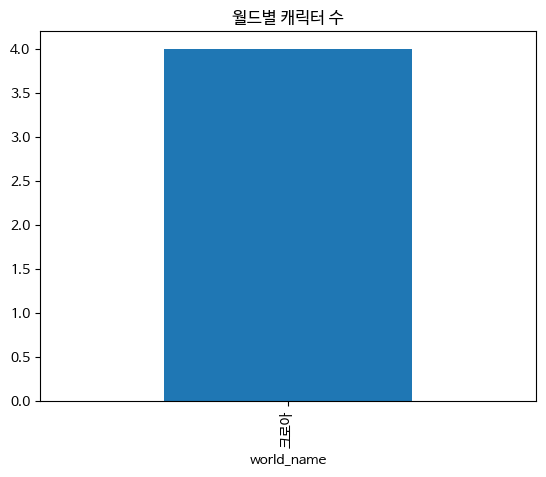

In [ ]:
world_count = df["world_name"].value_counts()
world_count.plot(kind="bar", title="월드별 캐릭터 수")

In [ ]:
import pandas as pd

# DataFrame으로 변환
df = pd.DataFrame(ranking_data)

# 필요한 컬럼만 선택 + 보기 좋은 이름으로 변경
df = df[["character_name", "world_name", "class_name", "sub_class_name", "dojang_floor", "character_level"]]
df.rename(columns={
    "class_name": "job_group",
    "sub_class_name": "job",
}, inplace=True)

df.head()

character_name world_name job_group         job  dojang_floor  \
0          크나확로1        크로아        도적       나이트로드            37   
1             생켓        크로아        아델                        32   
2         최초의창조주        크로아       마법사  아크메이지(썬,콜)             9   
3        iusong2        크로아        아델                         9   

   character_level  
0              200  
1              200  
2              177  
3              134

In [ ]:
job_summary = df.groupby("job").agg(
    avg_floor=("dojang_floor", "mean"),
    max_floor=("dojang_floor", "max"),
    count=("character_name", "count")
).sort_values(by="avg_floor", ascending=False)

job_summary.head(10)

avg_floor  max_floor  count
job                                    
나이트로드            37.0         37      1
                 20.5         32      2
아크메이지(썬,콜)        9.0          9      1

In [ ]:
import plotly.express as px

fig = px.box(df, x="job", y="dojang_floor",
             title="직업별 무릉도장 층수 분포",
             labels={"job": "직업", "dojang_floor": "무릉 층수"},
             points="all")  # raw 데이터 점까지 표시
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [ ]:
world_count = df["world_name"].value_counts().reset_index()
world_count.columns = ["world", "count"]

fig = px.bar(world_count, x="world", y="count", title="월드별 무릉 참여 캐릭터 수")
fig.show()

# 새 섹션

In [ ]:
world_list = [
    "스카니아", "베라", "브로아", "윈디아", "제니스", "크로아",
    "유니온", "엘리시움", "이노시스", "레드", "오로라", "아케인",
    "노바", "리부트", "리부트2"
]

In [ ]:
import requests
import pandas as pd
from time import sleep

API_KEY = "test_7c722ec2c9a8caa439d1d5e724800530affe86ed59bc55111b1a1bcedb892e20efe8d04e6d233bd35cf2fabdeb93fb0d"
headers = {"x-nxopen-api-key": API_KEY}
date = "2025-04-10"

world_list = [
    "스카니아", "베라", "브로아", "윈디아", "제니스", "크로아",
    "유니온", "엘리시움", "이노시스", "레드", "오로라", "아케인",
    "노바", "리부트", "리부트2"
]

all_data = []

for world in world_list:
    print(f"▶ {world} 월드 데이터 수집 중...")
    url = f"https://open.api.nexon.com/maplestory/v1/ranking/dojang?date={date}&world_name={world}&difficulty=0&ranking_type=overall"
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        data = response.json().get("ranking", [])
        for entry in data:
            entry["world_name"] = world  # 혹시 누락되었을 때 대비
            all_data.append(entry)
    else:
        print(f"❌ {world} 월드 요청 실패: {response.status_code}")

    sleep(0.2)  # API 과다 호출 방지

# DataFrame으로 정리
df = pd.DataFrame(all_data)
df.to_csv("maple_dojang_ranking_all_worlds.csv", index=False)
print("✅ 모든 월드 수집 완료!")

▶ 스카니아 월드 데이터 수집 중...
▶ 베라 월드 데이터 수집 중...
▶ 브로아 월드 데이터 수집 중...
▶ 윈디아 월드 데이터 수집 중...
▶ 제니스 월드 데이터 수집 중...
▶ 크로아 월드 데이터 수집 중...
▶ 유니온 월드 데이터 수집 중...
▶ 엘리시움 월드 데이터 수집 중...
▶ 이노시스 월드 데이터 수집 중...
▶ 레드 월드 데이터 수집 중...
▶ 오로라 월드 데이터 수집 중...
▶ 아케인 월드 데이터 수집 중...
▶ 노바 월드 데이터 수집 중...
▶ 리부트 월드 데이터 수집 중...
▶ 리부트2 월드 데이터 수집 중...
✅ 모든 월드 수집 완료!


In [ ]:
print("🧾 현재 컬럼 목록:", df.columns.tolist())
df.head(5)

🧾 현재 컬럼 목록: ['date', 'ranking', 'dojang_floor', 'dojang_time_record', 'character_name', 'world_name', 'class_name', 'sub_class_name', 'character_level']


date  ranking  dojang_floor  dojang_time_record character_name  \
0  2025-04-10        1            29                 289            김미순   
1  2025-04-10        2            19                 130            튀어뻥   
2  2025-04-10        3            19                 268            땡화초   
3  2025-04-10        4             9                 156          도끼적단검   
4  2025-04-10        5             9                 202          규호맛사탕   

  world_name class_name sub_class_name  character_level  
0       스카니아         도적            섀도어              210  
1       스카니아         도적          나이트로드              199  
2       스카니아         은월                             201  
3       스카니아         도적            섀도어              200  
4       스카니아         아란                             146

In [ ]:
df[df["sub_class_name"].isna() | (df["sub_class_name"] == "")].head()

date  ranking  dojang_floor  dojang_time_record character_name  \
2  2025-04-10        3            19                 268            땡화초   
4  2025-04-10        5             9                 202          규호맛사탕   
5  2025-04-10        6             9                 224        BASASAB   
8  2025-04-10        9             4                 485         예지공듀76   
9  2025-04-10       10             3                 128           백아인이   

  world_name class_name sub_class_name  character_level  
2       스카니아         은월                             201  
4       스카니아         아란                             146  
5       스카니아         은월                             197  
8       스카니아         칼리                             137  
9       스카니아         라라                             154

In [ ]:
# 결측치 제외하고 분석에 사용할 컬럼만 추출
df = df[["character_name", "world_name", "class_name", "sub_class_name", "dojang_floor", "character_level"]]
df.rename(columns={"class_name": "job_group", "sub_class_name": "job"}, inplace=True)

# 'job'이 없는 행 제거
df = df.dropna(subset=["job"])
df = df[df["job"] != ""]
df["dojang_floor"] = df["dojang_floor"].astype(int)

<ipython-input-34-d1e4784b5fcd>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# 컬럼명을 이미 바꿨다면, 다음처럼 바로 사용할 수 있습니다
df = df[["character_name", "world_name", "job_group", "job", "dojang_floor", "character_level"]].copy()

# 'job'이 없는 행 제거
df.dropna(subset=["job"], inplace=True)
df = df[df["job"] != ""]

# 타입 정리
df["dojang_floor"] = df["dojang_floor"].astype(int)

# 확인
df.head()

character_name world_name job_group    job  dojang_floor  character_level
0            김미순       스카니아        도적    섀도어            29              210
1            튀어뻥       스카니아        도적  나이트로드            19              199
3          도끼적단검       스카니아        도적    섀도어             9              200
6          Gr0o0       스카니아        궁수  보우마스터             7              132
7           아덴우딩       스카니아        해적    바이퍼             4              177

In [ ]:
#직업별 무릉 층수 평균 및 분포 보기
import plotly.express as px

fig = px.box(df, x="job", y="dojang_floor",
             title="직업별 무릉도장 층수 분포",
             labels={"job": "직업", "dojang_floor": "무릉 층수"},
             points="all")
fig.update_layout(xaxis_tickangle=-45, height=600)
fig.show()

In [ ]:
#직업별 무릉 평균 정렬 표
job_summary = df.groupby("job").agg(
    avg_floor=("dojang_floor", "mean"),
    max_floor=("dojang_floor", "max"),
    count=("character_name", "count")
).sort_values(by="avg_floor", ascending=False)

job_summary.head(10)


avg_floor  max_floor  count
job                               
캡틴         41.00         41      3
소울마스터      39.60         40     20
메카닉        35.00         35      2
스트라이커      35.00         35      2
신궁         35.00         35      2
미하일        35.00         35      2
나이트워커      33.00         33      2
제논         30.00         30      2
패스파인더      30.00         30      3
나이트로드      25.75         37      8

In [ ]:
#월드별 랭커 수 시각화
world_count = df["world_name"].value_counts().reset_index()
world_count.columns = ["world", "character_count"]

fig = px.bar(world_count, x="world", y="character_count", title="월드별 무릉 랭커 수")
fig.show()


In [ ]:
top10 = df.sort_values(by="dojang_floor", ascending=False).head(10)
top10[["character_name", "world_name", "job", "dojang_floor"]]


character_name world_name    job  dojang_floor
39            캡틴설탕        리부트     캡틴            41
25            캡틴설탕       엘리시움     캡틴            41
100           캡틴설탕       리부트2     캡틴            41
12           소마시gn        제니스  소울마스터            40
11           소마Cyg        제니스  소울마스터            40
14           소마시그a        제니스  소울마스터            40
42           소마시gn        리부트  소울마스터            40
46        SoMaCyGg        리부트  소울마스터            40
45        SoMaCyGf        리부트  소울마스터            40
44           소마시그a        리부트  소울마스터            40

# 새 섹션

In [ ]:
import requests
import time
import pandas as pd
from urllib.parse import quote

# API 키
headers = {
    "x-nxopen-api-key": "test_7c722ec2c9a8caa439d1d5e724800530affe86ed59bc55111b1a1bcedb892e20efe8d04e6d233bd35cf2fabdeb93fb0d"
}

# 유저 이름 리스트
character_names = ["도적", "빵구나웡", "밥먹어친구야", "인델마"]

# 결과 저장 리스트
result_data = []

# 날짜
date = "2025-04-10"

for name in character_names:
    # 1. 이름 인코딩해서 ocid 조회
    encoded_name = quote(name)
    ocid_url = f"https://open.api.nexon.com/maplestory/v1/id?character_name={encoded_name}"
    ocid_response = requests.get(ocid_url, headers=headers)

    if ocid_response.status_code == 200:
        ocid = ocid_response.json().get("ocid")

        # 2. ocid로 기본 정보 조회
        info_url = f"https://open.api.nexon.com/maplestory/v1/character/basic?ocid={ocid}&date={date}"
        info_response = requests.get(info_url, headers=headers)

        # 3. ocid로 인기도 조회
        pop_url = f"https://open.api.nexon.com/maplestory/v1/character/popularity?ocid={ocid}&date={date}"
        pop_response = requests.get(pop_url, headers=headers)

        if info_response.status_code == 200 and pop_response.status_code == 200:
            info_data = info_response.json()
            pop_data = pop_response.json()

            # 4. 필요한 정보만 저장
            result_data.append({
                "name": info_data.get("character_name"),
                "level": info_data.get("character_level"),
                "job": info_data.get("character_class"),
                "popularity": pop_data.get("popularity"),
            })

    # 요청 간에 너무 빠르게 보내지 않게 살짝 쉬기
    time.sleep(0.5)

# 5. 데이터프레임으로 만들고 CSV 저장
df = pd.DataFrame(result_data)
df.to_csv("maple_characters.csv", index=False, encoding="utf-8-sig")

df

name  level     job  popularity
0      도적    290  듀얼블레이더        5763
1    빵구나웡    283   나이트워커          12
2  밥먹어친구야    290  듀얼블레이더         315
3     인델마    259      아델          -1

# 새 섹션

In [ ]:
import requests
from urllib.parse import quote

# 🔐 API 키
headers = {
    "x-nxopen-api-key": "test_7c722ec2c9a8caa439d1d5e724800530affe86ed59bc55111b1a1bcedb892e20efe8d04e6d233bd35cf2fabdeb93fb0d"
}

# 📌 조회할 캐릭터 이름과 날짜
character_name = "아델"
date = "2025-04-10"

# 1️⃣ 캐릭터 이름 → ocid 조회
encoded_name = quote(character_name)
ocid_url = f"https://open.api.nexon.com/maplestory/v1/id?character_name={encoded_name}"
ocid_response = requests.get(ocid_url, headers=headers)

if ocid_response.status_code == 200:
    ocid = ocid_response.json().get("ocid")

    # 2️⃣ 기본 정보 조회 (직업, 레벨, 길드 등)
    basic_url = f"https://open.api.nexon.com/maplestory/v1/character/basic?ocid={ocid}&date={date}"
    basic = requests.get(basic_url, headers=headers).json()

    # 3️⃣ 능력치 (전투력 등)
    stat_url = f"https://open.api.nexon.com/maplestory/v1/character/stat?ocid={ocid}&date={date}"
    stat = requests.get(stat_url, headers=headers).json()

    # 4️⃣ 출력
    print(f"📛 캐릭터명: {basic.get('character_name')}")
    print(f"🎯 직업: {basic.get('character_class')}")
    print(f"🏅 레벨: {basic.get('character_level')}")
    print(f"👑 길드: {basic.get('character_guild_name')}")

    # 전투력 추출
    power_stat = next((s for s in stat.get("final_stat", []) if s["stat_name"] == "전투력"), None)
    if power_stat:
        print(f"🔥 전투력: {power_stat['stat_value']}")

else:
    print("캐릭터를 찾을 수 없습니다.")


📛 캐릭터명: 아델
🎯 직업: 아델
🏅 레벨: 291
👑 길드: 리더
🔥 전투력: 1307881436


# 새 섹션

In [ ]:
import requests
from urllib.parse import quote

# 🔐 API 키 설정
headers = {
    "x-nxopen-api-key": "test_7c722ec2c9a8caa439d1d5e724800530affe86ed59bc55111b1a1bcedb892e20efe8d04e6d233bd35cf2fabdeb93fb0d"
}

# 🧑 캐릭터 이름과 유효한 날짜 설정
character_name = "아델"
date = "2024-12-01"  # ← 이 날짜에 유효한 데이터가 존재해야 함
encoded_name = quote(character_name)

# 1️⃣ 이름으로 ocid 조회
ocid_url = f"https://open.api.nexon.com/maplestory/v1/id?character_name={encoded_name}"
ocid_response = requests.get(ocid_url, headers=headers)

if ocid_response.status_code == 200:
    ocid = ocid_response.json().get("ocid")

    # 2️⃣ 유니온 아티팩트 조회
    artifact_url = f"https://open.api.nexon.com/maplestory/v1/character/union-artifact?ocid={ocid}&date={date}"
    artifact_response = requests.get(artifact_url, headers=headers)
    artifact_json = artifact_response.json()

    # 3️⃣ 에러 체크 후 출력
    if artifact_response.status_code == 200 and "error" not in artifact_json:
        print("🧩 유니온 아티팩트 정보")
        print(f"📌 아티팩트 레벨: {artifact_json.get('artifact_level')}")

        effect_list = artifact_json.get("artifact_effect_list", [])
        if effect_list:
            print("✨ 활성화된 효과:")
            for eff in effect_list:
                print(f"- {eff['name']} (+{eff['value']})")
        else:
            print("😅 현재 활성화된 아티팩트 효과가 없습니다.")
    else:
        print("❌ 아티팩트 데이터를 불러올 수 없습니다. 날짜를 확인하거나 캐릭터 상태를 확인하세요.")

else:
    print("❌ 캐릭터를 찾을 수 없습니다.")

❌ 아티팩트 데이터를 불러올 수 없습니다. 날짜를 확인하거나 캐릭터 상태를 확인하세요.


# 새 섹션

In [ ]:
import requests
from datetime import datetime, timedelta
from urllib.parse import quote

# 1️⃣ 설정
character_name = "아델"
date = (datetime.today() - timedelta(days=1)).strftime("%Y-%m-%d")
headers = {
    "x-nxopen-api-key": "test_7c722ec2c9a8caa439d1d5e724800530affe86ed59bc55111b1a1bcedb892e20efe8d04e6d233bd35cf2fabdeb93fb0d"
}
encoded_name = quote(character_name)

# 2️⃣ ocid 조회
ocid_url = f"https://open.api.nexon.com/maplestory/v1/id?character_name={encoded_name}"
ocid = requests.get(ocid_url, headers=headers).json().get("ocid")

# 3️⃣ 기본 정보
basic = requests.get(
    f"https://open.api.nexon.com/maplestory/v1/character/basic?ocid={ocid}&date={date}",
    headers=headers).json()

# 4️⃣ 전투력
stat = requests.get(
    f"https://open.api.nexon.com/maplestory/v1/character/stat?ocid={ocid}&date={date}",
    headers=headers).json()
combat_power = next((s["stat_value"] for s in stat.get("final_stat", []) if s["stat_name"] == "전투력"), "N/A")

# 5️⃣ 무릉도장
dojang = requests.get(
    f"https://open.api.nexon.com/maplestory/v1/character/dojang?ocid={ocid}&date={date}",
    headers=headers).json()
dojang_floor = dojang.get("dojang_best_floor", "N/A")

# ✅ 날짜 슬라이싱 안전 처리
dojang_record_raw = dojang.get("date_dojang_record")
dojang_date = dojang_record_raw[:10] if dojang_record_raw else "기록 없음"


# 6️⃣ 유니온
union = requests.get(
    f"https://open.api.nexon.com/maplestory/v1/character/union?ocid={ocid}&date={date}",
    headers=headers).json()
union_level = union.get("union_level", "N/A")

# 7️⃣ 아티팩트
artifact_url = f"https://open.api.nexon.com/maplestory/v1/character/union-artifact?ocid={ocid}&date={date}"
artifact_res = requests.get(artifact_url, headers=headers).json()
artifact_lv = artifact_res.get("artifact_level", "N/A")
artifact_effects = artifact_res.get("artifact_effect_list", [])

# 8️⃣ 출력
print(f"\n📛 닉네임: {basic.get('character_name')}")
print(f"🎯 직업: {basic.get('character_class')} / Lv.{basic.get('character_level')}")
print(f"👑 길드: {basic.get('character_guild_name')}")
print(f"🔥 전투력: {combat_power}")
print(f"🏆 무릉도장: {dojang_floor}층 ({dojang_date} 기준)")
print(f"🧩 유니온: Lv.{union_level}")
print(f"🎨 아티팩트 레벨: Lv.{artifact_lv}")
for eff in artifact_effects:
    print(f"- {eff['name']} +{eff['value']}")


📛 닉네임: 아델
🎯 직업: 아델 / Lv.291
👑 길드: 리더
🔥 전투력: 1307881436
🏆 무릉도장: 84층 (2023-01-25 기준)
🧩 유니온: Lv.N/A
🎨 아티팩트 레벨: Lv.N/A


In [ ]:
import requests
from datetime import datetime, timedelta
from urllib.parse import quote

# 설정
character_name = "아델"
date = (datetime.today() - timedelta(days=1)).strftime("%Y-%m-%d")
headers = {
    "x-nxopen-api-key": "test_7c722ec2c9a8caa439d1d5e724800530affe86ed59bc55111b1a1bcedb892e20efe8d04e6d233bd35cf2fabdeb93fb0d"
}
encoded_name = quote(character_name)

# ocid 조회
ocid_url = f"https://open.api.nexon.com/maplestory/v1/id?character_name={encoded_name}"
ocid = requests.get(ocid_url, headers=headers).json().get("ocid")

# API 경로 리스트
def api_url(endpoint):
    return f"https://open.api.nexon.com/maplestory/v1{endpoint}?ocid={ocid}&date={date}"

# 요청 함수
def fetch(endpoint):
    try:
        res = requests.get(api_url(endpoint), headers=headers)
        return res.json()
    except:
        return {}

# 데이터 요청
endpoints = {
    "basic": "/character/basic",
    "popularity": "/character/popularity",
    "stat": "/character/stat",
    "hyper": "/character/hyper-stat",
    "propensity": "/character/propensity",
    "ability": "/character/ability",
    "item": "/character/item-equipment",
    "cash": "/character/cashitem-equipment",
    "symbol": "/character/symbol-equipment",
    "set": "/character/set-effect",
    "beauty": "/character/beauty-equipment",
    "android": "/character/android-equipment",
    "pet": "/character/pet-equipment",
    "skill": "/character/skill",
    "link": "/character/link-skill",
    "vmatrix": "/character/vmatrix",
    "hexa": "/character/hexamatrix",
    "hexa_stat": "/character/hexamatrix-stat",
    "dojang": "/character/dojang",
    "list": "/character/list"
}

data = {key: fetch(path) for key, path in endpoints.items()}

# 출력
print(f"\n📛 닉네임: {data['basic'].get('character_name')}")
print(f"🎯 직업: {data['basic'].get('character_class')} / Lv.{data['basic'].get('character_level')}")
print(f"👑 길드: {data['basic'].get('character_guild_name')}")
print(f"🔥 전투력: {next((s['stat_value'] for s in data['stat'].get('final_stat', []) if s['stat_name'] == '전투력'), 'N/A')}")
dojang_floor = data['dojang'].get('dojang_best_floor', 'N/A')
dojang_date = data['dojang'].get('date_dojang_record', '기록 없음')[:10] if data['dojang'].get('date_dojang_record') else "기록 없음"
print(f"🏆 무릉도장: {dojang_floor}층 ({dojang_date} 기준)")
print(f"❤️ 인기도: {data['popularity'].get('popularity', 'N/A')}")

# 어빌리티
print("\n✨ 어빌리티:")
for ab in data['ability'].get('ability_preset_1', {}).get('ability_info', []):
    print(f"- {ab.get('value', '')}")

# 하이퍼스탯
print("\n📊 하이퍼스탯:")
for stat in data['hyper'].get('use_preset_stat', []):
    print(f"- {stat.get('stat_type')} +{stat.get('stat_point')}")

# 성향
print("\n🧠 성향:")
for k, v in data['propensity'].items():
    if "_level" in k:
        print(f"- {k.replace('_level','').capitalize()}: Lv.{v}")

# 장비
print("\n🎒 장비:")
for item in data['item'].get('item_equipment', []):
    print(f"- {item.get('item_name')} ({item.get('item_equipment_part')})")

# 캐시 장비
print("\n🎀 캐시 장비:")
for item in data['cash'].get('cash_item_equipment', []):
    print(f"- {item.get('item_name')} ({item.get('item_equipment_part')})")

# 심볼
print("\n🧿 심볼 장비:")
for symbol in data['symbol'].get('symbol', []):
    print(f"- {symbol.get('symbol_name')} Lv.{symbol.get('symbol_level')} ({symbol.get('symbol_type')})")

# 세트 효과
print("\n🧩 세트 효과:")
for s in data['set'].get('set_effect', []):
    print(f"- {s.get('set_name')} Lv.{s.get('set_level')} ({s.get('set_effect_description')})")

# 외형
print("\n🎨 외형:")
for k, v in data['beauty'].items():
    print(f"- {k}: {v}")

# 안드로이드
print("\n🤖 안드로이드:")
for k, v in data['android'].items():
    print(f"- {k}: {v}")

# 펫 장비
print("\n🐾 펫 장비:")
for pet in data['pet'].get('item_equipment_preset_1', []):
    print(f"- {pet.get('item_name')} ({pet.get('item_equipment_part')})")

# 스킬
print("\n🌀 스킬:")
for skill in data['skill'].get('character_skill_grade', []):
    print(f"- {skill.get('character_skill')} (Lv.{skill.get('skill_level')})")

# 링크 스킬
print("\n🔗 링크 스킬:")
for link in data['link'].get('character_link_skill', []):
    print(f"- {link.get('skill_name')} Lv.{link.get('skill_level')}")

# V매트릭스
print("\n🔮 V매트릭스:")
for node in data['vmatrix'].get('character_v_core_equipment', []):
    print(f"- {node.get('slot_name')} ({node.get('v_core_name')}) Lv.{node.get('v_core_level')}")

# HEXA 코어
print("\n🔷 HEXA 코어:")
for core in data['hexa'].get('character_hexa_core_equipment', []):
    print(f"- {core.get('hexa_core_name')} Lv.{core.get('hexa_core_level')}")

# HEXA 스탯
print("\n📈 HEXA 스탯:")
for stat in data['hexa_stat'].get('character_hexa_stat_core', []):
    print(f"- {stat.get('stat_field')} +{stat.get('stat_value')}")

# 캐릭터 목록
print("\n📃 계정 내 캐릭터 목록:")
for acc in data['list'].get('account_list', []):
    for char in acc.get('character_list', []):
        print(f"- {char.get('character_name')} ({char.get('character_class')}) Lv.{char.get('character_level')} / {char.get('world_name')}")


📛 닉네임: 아델
🎯 직업: 아델 / Lv.291
👑 길드: 리더
🔥 전투력: 1307881436
🏆 무릉도장: 84층 (2023-01-25 기준)
❤️ 인기도: 8465

✨ 어빌리티:
- 
- 
- 

📊 하이퍼스탯:

🧠 성향:
- Charisma: Lv.100
- Sensibility: Lv.100
- Insight: Lv.100
- Willingness: Lv.100
- Handicraft: Lv.100
- Charm: Lv.100

🎒 장비:
- 에테르넬 나이트헬름 (모자)
- 루즈 컨트롤 머신 마크 (얼굴장식)
- 마력이 깃든 안대 (눈장식)
- 커맨더 포스 이어링 (귀고리)
- 에테르넬 나이트아머 (상의)
- 에테르넬 나이트팬츠 (하의)
- 에테르넬 나이트슈즈 (신발)
- 에테르넬 나이트글러브 (장갑)
- 에테르넬 나이트케이프 (망토)
- 노블 브레이슬릿 (브레이슬릿)
- 제네시스 튜너 (튜너)
- 리스트레인트 링 (반지)
- 거대한 공포 (반지)
- 마이스터링 (반지)
- 여명의 가디언 엔젤 링 (반지)
- 고통의 근원 (펜던트)
- 본 투 비 레드 (훈장)
- 몽환의 벨트 (벨트)
- 에테르넬 나이트숄더 (어깨장식)
- 저주받은 적의 마도서 (포켓 아이템)
- 컴플리트 언더컨트롤 (기계 심장)
- 창세의 뱃지 (뱃지)
- 미트라의 분노 : 전사 (엠블렘)
- 데이브레이크 펜던트 (펜던트)

🎀 캐시 장비:

🧿 심볼 장비:
- 아케인심볼 : 모라스 Lv.20 (None)
- 아케인심볼 : 에스페라 Lv.20 (None)
- 아케인심볼 : 아르카나 Lv.20 (None)
- 아케인심볼 : 레헬른 Lv.20 (None)
- 아케인심볼 : 츄츄 아일랜드 Lv.20 (None)
- 아케인심볼 : 소멸의 여로 Lv.20 (None)
- 어센틱심볼 : 세르니움 Lv.11 (None)
- 어센틱심볼 : 아르크스 Lv.11 (None)
- 어센틱심볼 : 오디움 Lv.11 (None)
- 어센틱심볼 : 도원경 Lv.11 (None)
- 어센틱심볼 : 카르시

# 새 섹션

In [ ]:
#캐릭터 식별자(ocid)를 조회합니다.

import requests

# API Key와 헤더 설정
headers = {
    "x-nxopen-api-key": "test_7c722ec2c9a8caa439d1d5e724800530affe86ed59bc55111b1a1bcedb892e20efe8d04e6d233bd35cf2fabdeb93fb0d"
}

# 요청 URL과 파라미터
url = "https://open.api.nexon.com/maplestory/v1/id"
params = {
    "character_name": "진격캐넌"
}

# GET 요청 보내기
response = requests.get(url, headers=headers, params=params)

# 응답 처리
if response.status_code == 200:
    data = response.json()
    print("✅ 캐릭터 ocid:", data.get("ocid"))
else:
    print(f"❌ 요청 실패 (status {response.status_code})")
    print(response.text)

✅ 캐릭터 ocid: 46242ca5c9d329a50d72081dd85550fa


In [ ]:
#계정의 보유 캐릭터 목록을 조회합니다.

import requests

# API Key
headers = {
    "x-nxopen-api-key": "test_7c722ec2c9a8caa439d1d5e724800530affe86ed59bc55111b1a1bcedb892e20efe8d04e6d233bd35cf2fabdeb93fb0d"
}

# ocid는 이전에 조회한 캐릭터 식별자 사용
ocid = "46242ca5c9d329a50d72081dd85550fa"

# 요청 URL
url = "https://open.api.nexon.com/maplestory/v1/character/list"

# 쿼리 파라미터
params = {
    "ocid": ocid
}

# GET 요청
response = requests.get(url, headers=headers, params=params)

# 결과 처리
if response.status_code == 200:
    data = response.json()
    for account in data.get("account_list", []):
        print(f"📛 Account ID: {account['account_id']}")
        for character in account.get("character_list", []):
            print(f"🧙 캐릭터명: {character['character_name']}")
            print(f"🌍 월드: {character['world_name']}")
            print(f"🎯 직업: {character['character_class']}")
            print(f"🎚️ 레벨: {character['character_level']}")
            print(f"🆔 ocid: {character['ocid']}")
            print("-" * 30)
else:
    print(f"❌ 요청 실패 (status {response.status_code})")
    print(response.text)

📛 Account ID: c586208f6dc1e0ea916d2ddf407d3ac2
🧙 캐릭터명: lovelhj9797
🌍 월드: 베라
🎯 직업: 팬텀
🎚️ 레벨: 147
🆔 ocid: c9de74f7e0f9b3ab33448685781c864e
------------------------------
🧙 캐릭터명: lloovelhj97
🌍 월드: 베라
🎯 직업: 듀얼블레이더
🎚️ 레벨: 110
🆔 ocid: 113da5fce75adf1ab6bd1930664904f9
------------------------------
🧙 캐릭터명: lovvelhj7
🌍 월드: 제니스
🎯 직업: 아란
🎚️ 레벨: 166
🆔 ocid: d760bb0965c12c2f049ee25287a84e98
------------------------------
🧙 캐릭터명: 카이저민박집
🌍 월드: 베라
🎯 직업: 카이저
🎚️ 레벨: 111
🆔 ocid: bfaeb4ee84cff15d4f60f21e74de592f
------------------------------
🧙 캐릭터명: llovvelhj97
🌍 월드: 제니스
🎯 직업: 스트라이커
🎚️ 레벨: 127
🆔 ocid: 3c5f74a036911da044db04ae47648e06
------------------------------
🧙 캐릭터명: 에반민박집
🌍 월드: 베라
🎯 직업: 에반
🎚️ 레벨: 86
🆔 ocid: 79f49b4d623bbbf16ffdcb41437bc808
------------------------------
🧙 캐릭터명: 시그너스민박
🌍 월드: 베라
🎯 직업: 스트라이커
🎚️ 레벨: 66
🆔 ocid: 35311873f7c2cf2e684572810f840394
------------------------------
🧙 캐릭터명: 주니어스123
🌍 월드: 제니스
🎯 직업: 루미너스
🎚️ 레벨: 130
🆔 ocid: 513cf5e623828531f3d1c1230a9e16bf
------------------------

진격캐넌 계정 확인 못함. OCID로 단일 캐릭터만 확인가능

In [ ]:
from datetime import datetime
import requests

# 진격캐넌의 OCID
ocid = "46242ca5c9d329a50d72081dd85550fa"

# API 요청
url = "https://open.api.nexon.com/maplestory/v1/character/basic"
headers = {
    "x-nxopen-api-key": "test_7c722ec2c9a8caa439d1d5e724800530affe86ed59bc55111b1a1bcedb892e20efe8d04e6d233bd35cf2fabdeb93fb0d"
}
params = {
    "ocid": ocid  # date 파라미터 제거
}

response = requests.get(url, headers=headers, params=params)

# 결과 출력
if response.status_code == 200:
    data = response.json()
    print("✅ 캐릭터 이름:", data.get("character_name"))
    print("🌍 월드:", data.get("world_name"))
    print("🎯 직업:", data.get("character_class"))
    print("🔢 레벨:", data.get("character_level"))
    print("📸 이미지 URL:", data.get("character_image"))
else:
    print("❌ 오류 발생:", response.status_code)
    print(response.json())

✅ 캐릭터 이름: 진격캐넌
🌍 월드: 루나
🎯 직업: 캐논마스터
🔢 레벨: 294
📸 이미지 URL: https://open.api.nexon.com/static/maplestory/character/look/PHDIHCFCHBEGGCIPBKGMAFJADPCBHLMHCBMODAFALJKMDDCKIKLLDNPMKALEHKOPBBJEHMDHNDPLNPLOPEADGFNAOFCIFLKDEEIPCCNFDALGFIMOCGPJOOEDNPBOPLEMMNOLOKGDIMMKOECFMOHEPLJCFCBCKIICNNIHNJOEFBBCFPMCLBMJBAFEMKIGIGHJPAHBPAOAHGIGOFGGGFNEGNLJHHMFMIHGOANPNFHHDFDCMFBOPBFNBJDBOKGENEHL


date 파라미터 때문에 오류 400이 뜸

-> date 파라미터 없이 요청하면 최신 데이터를 자동으로 반환하는 방법으로 해결

In [ ]:
import requests
from datetime import datetime, timedelta

# 진격캐넌의 OCID
ocid = "46242ca5c9d329a50d72081dd85550fa"  # 진격캐넌의 ocid

# 오늘 날짜 (KST)
today_date = datetime.today().strftime("%Y-%m-%d")

# 어제 날짜 (KST)
yesterday_date = (datetime.today() - timedelta(days=1)).strftime("%Y-%m-%d")

# API 요청 URL
url = "https://open.api.nexon.com/maplestory/v1/character/popularity"

# API Key
headers = {
    "x-nxopen-api-key": "test_7c722ec2c9a8caa439d1d5e724800530affe86ed59bc55111b1a1bcedb892e20efe8d04e6d233bd35cf2fabdeb93fb0d"
}

# 어제 날짜의 요청
params_yesterday = {
    "ocid": ocid,
    "date": yesterday_date
}

# 어제 날짜의 요청
response_yesterday = requests.get(url, headers=headers, params=params_yesterday)
if response_yesterday.status_code == 200:
    data_yesterday = response_yesterday.json()
    print("✅ 어제 날짜:", data_yesterday.get("date"))
    print("인기도 (어제):", data_yesterday.get("popularity"))
else:
    print("❌ 오류 발생 (어제 날짜):", response_yesterday.status_code)
    error_data_yesterday = response_yesterday.json()
    print("에러 메시지:", error_data_yesterday.get("error", "No error message"))

✅ 어제 날짜: 2025-04-13T00:00+09:00
인기도 (어제): 15727


오류 400이 계속 나왔으나 날짜 수정하니 개선됨

In [ ]:
import requests
from datetime import datetime, timedelta

# 진격캐넌의 OCID
ocid = "46242ca5c9d329a50d72081dd85550fa"  # 진격캐넌의 ocid

# 오늘 날짜 (KST)
today_date = datetime.today().strftime("%Y-%m-%d")

# 어제 날짜 (KST)
yesterday_date = (datetime.today() - timedelta(days=1)).strftime("%Y-%m-%d")

# API 요청 URL
url = "https://open.api.nexon.com/maplestory/v1/character/totalstats"  # 엔드포인트 수정 확인

# API Key
headers = {
    "x-nxopen-api-key": "test_7c722ec2c9a8caa439d1d5e724800530affe86ed59bc55111b1a1bcedb892e20efe8d04e6d233bd35cf2fabdeb93fb0d"
}

# 요청 파라미터
params_today = {
    "ocid": ocid,
    "date": today_date  # 오늘 날짜를 기준으로 조회
}

params_yesterday = {
    "ocid": ocid,
    "date": yesterday_date  # 어제 날짜를 기준으로 조회
}

# 오늘 날짜 요청
response_today = requests.get(url, headers=headers, params=params_today)
if response_today.status_code == 200:
    data_today = response_today.json()
    print("✅ 오늘 날짜:", data_today.get("date"))
    print("캐릭터 클래스:", data_today.get("character_class"))
    for stat in data_today.get("final_stat", []):
        print(f"{stat['stat_name']}: {stat['stat_value']}")
    print("남은 AP:", data_today.get("remain_ap"))
else:
    print("❌ 오류 발생 (오늘 날짜):", response_today.status_code)
    error_data_today = response_today.json()
    print("에러 메시지:", error_data_today.get("error", "No error message"))

# 어제 날짜 요청
response_yesterday = requests.get(url, headers=headers, params=params_yesterday)
if response_yesterday.status_code == 200:
    data_yesterday = response_yesterday.json()
    print("✅ 어제 날짜:", data_yesterday.get("date"))
    print("캐릭터 클래스:", data_yesterday.get("character_class"))
    for stat in data_yesterday.get("final_stat", []):
        print(f"{stat['stat_name']}: {stat['stat_value']}")
    print("남은 AP:", data_yesterday.get("remain_ap"))
else:
    print("❌ 오류 발생 (어제 날짜):", response_yesterday.status_code)
    error_data_yesterday = response_yesterday.json()
    print("에러 메시지:", error_data_yesterday.get("error", "No error message"))

❌ 오류 발생 (오늘 날짜): 400
에러 메시지: {'name': 'OPENAPI00004', 'message': 'Please input valid parameter'}
❌ 오류 발생 (어제 날짜): 400
에러 메시지: {'name': 'OPENAPI00004', 'message': 'Please input valid parameter'}


In [ ]:
import requests

ocid = "46242ca5c9d329a50d72081dd85550fa"
headers = {
    "x-nxopen-api-key": "test_7c722ec2c9a8caa439d1d5e724800530affe86ed59bc55111b1a1bcedb892e20efe8d04e6d233bd35cf2fabdeb93fb0d"
}

# 1단계: 캐릭터 기본 정보에서 가능한 날짜 조회
info_url = "https://open.api.nexon.com/maplestory/v1/character/basic"
params = {"ocid": ocid}
res = requests.get(info_url, headers=headers, params=params)

if res.status_code == 200:
    basic_data = res.json()
    most_recent_date = basic_data.get("date")
    print(f"📌 가장 최근 날짜: {most_recent_date}")

    # 2단계: 해당 날짜로 totalstats 조회
    stats_url = "https://open.api.nexon.com/maplestory/v1/character/totalstats"
    stat_res = requests.get(stats_url, headers=headers, params={"ocid": ocid, "date": most_recent_date})

    if stat_res.status_code == 200:
        stats = stat_res.json()
        print("✅ 캐릭터 클래스:", stats.get("character_class"))
        for stat in stats.get("final_stat", []):
            print(f"{stat['stat_name']}: {stat['stat_value']}")
        print("남은 AP:", stats.get("remain_ap"))
    else:
        print("❌ totalstats 오류:", stat_res.status_code, stat_res.text)
else:
    print("❌ 기본 정보 조회 실패:", res.status_code, res.text)

📌 가장 최근 날짜: None
❌ totalstats 오류: 400 {"error":{"name":"OPENAPI00004","message":"Please input valid parameter"}}


In [ ]:
print(res.json())

{'date': None, 'character_name': '진격캐넌', 'world_name': '루나', 'character_gender': '남', 'character_class': '캐논마스터', 'character_class_level': '6', 'character_level': 294, 'character_exp': 35376495972264, 'character_exp_rate': '8.210', 'character_guild_name': '스타', 'character_image': 'https://open.api.nexon.com/static/maplestory/character/look/PHDIHCFCHBEGGCIPBKGMAFJADPCBHLMHCBMODAFALJKMDDCKIKLLDNPMKALEHKOPBBJEHMDHNDPLNPLOPEADGFNAOFCIFLKDEEIPCCNFDALGFIMOCGPJOOEDNPBOPLEMMNOLOKGDIMMKOECFMOHEPLJCFCBCKIICNNIHNJOEFBBCFPMCLBMJBAFEMKIGIGHJPAHBPAOAHGIGOFGGGFNEGNLJHHMFMIHGOANPNFHHDFDCMFBOPBFNBJDBOKGENEHL', 'character_date_create': '2011-07-07T00:00+09:00', 'access_flag': 'true', 'liberation_quest_clear_flag': 'true'}


현재는 "date": None 상태이므로, totalstats API는 사용할 수 없음. 이는 에러가 아니라 정상적인 제한이며, 캐릭터가 특정 조건(최근 활동 등)을 만족해야 API 데이터가 수집되고 "date"가 생성됨..

In [ ]:
# 기본 정보
import requests

ocid = "46242ca5c9d329a50d72081dd85550fa"
headers = {
    "x-nxopen-api-key": "test_7c722ec2c9a8caa439d1d5e724800530affe86ed59bc55111b1a1bcedb892e20efe8d04e6d233bd35cf2fabdeb93fb0d"
}

url = "https://open.api.nexon.com/maplestory/v1/character/basic"

res = requests.get(url, headers=headers, params={"ocid": ocid})
if res.status_code == 200:
    data = res.json()
    print("✅ [기본 정보]")
    print(f"  ▸ 캐릭터명: {data.get('character_name')}")
    print(f"  ▸ 직업: {data.get('character_class')} (레벨 {data.get('character_level')})")
    print(f"  ▸ 서버: {data.get('world_name')}")
    print(f"  ▸ 길드: {data.get('character_guild_name')}")
else:
    print("❌ 호출 실패:", res.status_code)

✅ [기본 정보]
  ▸ 캐릭터명: 진격캐넌
  ▸ 직업: 캐논마스터 (레벨 294)
  ▸ 서버: 루나
  ▸ 길드: 스타


In [ ]:
#장비 정보
import requests

ocid = "46242ca5c9d329a50d72081dd85550fa"
headers = {
    "x-nxopen-api-key": "test_7c722ec2c9a8caa439d1d5e724800530affe86ed59bc55111b1a1bcedb892e20efe8d04e6d233bd35cf2fabdeb93fb0d"
}

url = "https://open.api.nexon.com/maplestory/v1/character/item-equipment"

res = requests.get(url, headers=headers, params={"ocid": ocid})

if res.status_code == 200:
    data = res.json()
    print("✅ [장비 정보]")
    print(f"  ▸ 착용 장비 수: {len(data.get('item_equipment', []))}")
    for item in data.get('item_equipment', []):
        print(f"    - {item.get('item_name')} ({item.get('item_equipment_part')})")
else:
    print("❌ 호출 실패:", res.status_code)

✅ [장비 정보]
  ▸ 착용 장비 수: 24
    - 에테르넬 파이렛햇 (모자)
    - 루즈 컨트롤 머신 마크 (얼굴장식)
    - 마력이 깃든 안대 (눈장식)
    - 커맨더 포스 이어링 (귀고리)
    - 에테르넬 파이렛코트 (상의)
    - 에테르넬 파이렛팬츠 (하의)
    - 에테르넬 파이렛슈즈 (신발)
    - 에테르넬 파이렛글러브 (장갑)
    - 에테르넬 파이렛케이프 (망토)
    - 봄버드 센터파이어 (화약통)
    - 제네시스 시즈건 (핸드캐논)
    - 웨폰퍼프 - S링 (반지)
    - 여명의 가디언 엔젤 링 (반지)
    - 거대한 공포 (반지)
    - 근원의 속삭임 (반지)
    - 고통의 근원 (펜던트)
    - 본 투 비 레드 (훈장)
    - 몽환의 벨트 (벨트)
    - 에테르넬 파이렛숄더 (어깨장식)
    - 저주받은 적의 마도서 (포켓 아이템)
    - 컴플리트 언더컨트롤 (기계 심장)
    - 창세의 뱃지 (뱃지)
    - 미트라의 분노 : 해적 (엠블렘)
    - 데이브레이크 펜던트 (펜던트)


In [ ]:
# 캐시 장비
import requests

# 진격캐넌의 OCID
ocid = "46242ca5c9d329a50d72081dd85550fa"

# API 요청
url = "https://open.api.nexon.com/maplestory/v1/character/cashitem"
headers = {
    "x-nxopen-api-key": "test_7c722ec2c9a8caa439d1d5e724800530affe86ed59bc55111b1a1bcedb892e20efe8d04e6d233bd35cf2fabdeb93fb0d"
}
params = {
    "ocid": ocid  # date 파라미터 제거
}

res = requests.get(url, headers=headers, params=params)
if res.status_code == 200:
    data = res.json()
    print("✅ [캐시 장비]")
    print(f"  ▸ 캐시 장비 수: {len(data.get('cash_item_equipment', []))}")
    for item in data.get('cash_item_equipment', [])[:5]:
        print(f"    - {item.get('cash_item_name')} ({item.get('cash_item_equipment_part')})")
else:
    print("❌ 호출 실패:", res.status_code)
    print(res.json())

❌ 호출 실패: 400
{'error': {'name': 'OPENAPI00004', 'message': 'Please input valid parameter'}}


In [ ]:
# 캐시 장비 (날짜 탐색)
import requests
from datetime import datetime, timedelta

# 진격캐넌의 OCID
ocid = "46242ca5c9d329a50d72081dd85550fa"

# API 요청 기본 설정
url = "https://open.api.nexon.com/maplestory/v1/character/cashitem"
headers = {
    "x-nxopen-api-key": "test_7c722ec2c9a8caa439d1d5e724800530affe86ed59bc55111b1a1bcedb892e20efe8d04e6d233bd35cf2fabdeb93fb0d"
}

# 어제부터 30일 전까지 탐색
start_date = datetime.today() - timedelta(days=1)
days_to_check = 30

for i in range(days_to_check):
    check_date = (start_date - timedelta(days=i)).strftime("%Y-%m-%d")
    params = {
        "ocid": ocid,
        "date": check_date
    }

    print(f"📅 {check_date} 테스트 중...")
    res = requests.get(url, headers=headers, params=params)

    if res.status_code == 200:
        data = res.json()
        cash_items = data.get('cash_item_equipment', [])
        print("✅ [캐시 장비]")
        print(f"  ▸ 캐시 장비 수: {len(cash_items)}")
        for item in cash_items[:5]:
            print(f"    - {item.get('cash_item_name')} ({item.get('cash_item_equipment_part')})")
        break  # 데이터 찾으면 종료
    else:
        print(f"❌ {check_date} 실패: {res.status_code}")
        try:
            error_data = res.json()
            print(f"에러 메시지: {error_data.get('error', 'No error message')}")
        except ValueError:
            print("에러 메시지: 응답 형식이 JSON이 아님")

else:
    print("🚫 30일 내 유효한 캐시 장비 데이터가 없습니다.")

📅 2025-04-13 테스트 중...
❌ 2025-04-13 실패: 400
에러 메시지: {'name': 'OPENAPI00004', 'message': 'Please input valid parameter'}
📅 2025-04-12 테스트 중...
❌ 2025-04-12 실패: 400
에러 메시지: {'name': 'OPENAPI00004', 'message': 'Please input valid parameter'}
📅 2025-04-11 테스트 중...
❌ 2025-04-11 실패: 400
에러 메시지: {'name': 'OPENAPI00004', 'message': 'Please input valid parameter'}
📅 2025-04-10 테스트 중...
❌ 2025-04-10 실패: 400
에러 메시지: {'name': 'OPENAPI00004', 'message': 'Please input valid parameter'}
📅 2025-04-09 테스트 중...
❌ 2025-04-09 실패: 400
에러 메시지: {'name': 'OPENAPI00004', 'message': 'Please input valid parameter'}
📅 2025-04-08 테스트 중...
❌ 2025-04-08 실패: 400
에러 메시지: {'name': 'OPENAPI00004', 'message': 'Please input valid parameter'}
📅 2025-04-07 테스트 중...
❌ 2025-04-07 실패: 400
에러 메시지: {'name': 'OPENAPI00004', 'message': 'Please input valid parameter'}
📅 2025-04-06 테스트 중...
❌ 2025-04-06 실패: 400
에러 메시지: {'name': 'OPENAPI00004', 'message': 'Please input valid parameter'}
📅 2025-04-05 테스트 중...
❌ 2025-04-05 실패: 400
에러 메시

In [ ]:
#어빌리티
import requests

ocid = "46242ca5c9d329a50d72081dd85550fa"
headers = {
    "x-nxopen-api-key": "test_7c722ec2c9a8caa439d1d5e724800530affe86ed59bc55111b1a1bcedb892e20efe8d04e6d233bd35cf2fabdeb93fb0d"
}

url = "https://open.api.nexon.com/maplestory/v1/character/ability"

res = requests.get(url, headers=headers, params={"ocid": ocid})
if res.status_code == 200:
    data = res.json()
    print("✅ [어빌리티]")
    for i, ab in enumerate(data.get('ability_info', []), 1):
        print(f"  ▸ 어빌리티 {i}: {ab.get('ability_no')} - {ab.get('ability_value')}")
else:
    print("❌ 호출 실패:", res.status_code)

✅ [어빌리티]
  ▸ 어빌리티 1: 1 - 보스 몬스터 공격 시 데미지 20% 증가
  ▸ 어빌리티 2: 2 - 상태 이상에 걸린 대상 공격 시 데미지 8% 증가
  ▸ 어빌리티 3: 3 - 공격력 21 증가


In [ ]:
#성향
import requests

ocid = "46242ca5c9d329a50d72081dd85550fa"
headers = {
    "x-nxopen-api-key": "test_7c722ec2c9a8caa439d1d5e724800530affe86ed59bc55111b1a1bcedb892e20efe8d04e6d233bd35cf2fabdeb93fb0d"
}

url = "https://open.api.nexon.com/maplestory/v1/character/propensity"

res = requests.get(url, headers=headers, params={"ocid": ocid})
if res.status_code == 200:
    data = res.json()
    print("✅ [성향]")
    for prop in ["charm_level", "sense_level", "insight_level", "will_level", "handcraft_level", "diligence_level"]:
        print(f"  ▸ {prop.replace('_level', '').capitalize()}: {data.get(prop)}레벨")
else:
    print("❌ 호출 실패:", res.status_code)

✅ [성향]
  ▸ Charm: 100레벨
  ▸ Sense: None레벨
  ▸ Insight: 100레벨
  ▸ Will: None레벨
  ▸ Handcraft: None레벨
  ▸ Diligence: None레벨


In [ ]:
#유니온
import requests

ocid = "46242ca5c9d329a50d72081dd85550fa"
headers = {
    "x-nxopen-api-key": "test_7c722ec2c9a8caa439d1d5e724800530affe86ed59bc55111b1a1bcedb892e20efe8d04e6d233bd35cf2fabdeb93fb0d"
}

url = "https://open.api.nexon.com/maplestory/v1/character/union"

res = requests.get(url, headers=headers, params={"ocid": ocid})
if res.status_code == 200:
    data = res.json()
    print("✅ [유니온]")
    print(f"  ▸ 유니온 등급: {data.get('union_grade')}")
    print(f"  ▸ 유니온 공격력: {data.get('union_attack_power')}")
    print(f"  ▸ 총 유니온 레벨: {data.get('union_level')}")
else:
    print("❌ 호출 실패:", res.status_code)

❌ 호출 실패: 400


현재 제공된 API에서 장비의 세부 정보(스타포스, 추옵, 잠재옵션 등)를 확인할 수 있는 방법은 없는 것으로 보입니다. API 응답에서 제공되는 정보는 기본적으로 아이템 이름(item_name), 아이템 부위(item_equipment_part) 등과 같은 기본적인 정보입니다. 추가적인 상세 정보(예: 스타포스, 추옵, 잠재옵션 등)는 별도의 엔드포인트나 추가적인 요청이 필요한 경우가 많습니다.

따라서, 스타포스나 잠재옵션 등의 정보는 현재 제공된 API로는 직접적으로 확인할 수 없으며, 만약 이러한 정보가 필요하다면 Nexon의 다른 API나 게임 내에서 직접 확인하는 방법을 고려해야 할 수 있습니다.

이 부분에 대한 API가 있는지 확인하려면 Nexon의 공식 API 문서를 확인하거나, 다른 엔드포인트를 사용하는 방법을 찾아야 할 것입니다.

현재로서는 확인 불가입니다.

In [ ]:
#하이퍼스탯 정보
import requests

ocid = "46242ca5c9d329a50d72081dd85550fa"  # 캐릭터 식별자
date = "2023-12-21"  # 조회 기준일 (예: 2023-12-21)
headers = {
    "x-nxopen-api-key": "test_7c722ec2c9a8caa439d1d5e724800530affe86ed59bc55111b1a1bcedb892e20efe8d04e6d233bd35cf2fabdeb93fb0d"  # API Key
}

url = "https://open.api.nexon.com/maplestory/v1/character/hyper-stat"

params = {
    "ocid": ocid,
    "date": date  # 조회 기준일 (KST, YYYY-MM-DD)
}

# 요청 보내기
res = requests.get(url, headers=headers, params=params)

if res.status_code == 200:
    data = res.json()
    print("✅ [하이퍼스탯 정보]")
    print(f"조회 기준일: {data.get('date')}")
    print(f"직업군: {data.get('character_class')}")

    for i in range(1, 4):
        preset = f"hyper_stat_preset_{i}"
        remain_point = f"hyper_stat_preset_{i}_remain_point"

        print(f"  ▸ 하이퍼스탯 프리셋 {i}:")
        for stat in data.get(preset, []):
            print(f"    - {stat.get('stat_type')} - 포인트: {stat.get('stat_point')} / 레벨: {stat.get('stat_level')} / 증가: {stat.get('stat_increase')}")
        print(f"  남은 포인트: {data.get(remain_point)}")
        print("-" * 50)
else:
    print("❌ 호출 실패:", res.status_code)

✅ [하이퍼스탯 정보]
조회 기준일: 2023-12-21T00:00+09:00
직업군: 캐논마스터
  ▸ 하이퍼스탯 프리셋 1:
    - STR - 포인트: 40 / 레벨: 6 / 증가: 힘 180 증가
    - DEX - 포인트: 3 / 레벨: 2 / 증가: 민첩성 60 증가
    - INT - 포인트: None / 레벨: 0 / 증가: None
    - LUK - 포인트: None / 레벨: 0 / 증가: None
    - HP - 포인트: None / 레벨: 0 / 증가: None
    - MP - 포인트: None / 레벨: 0 / 증가: None
    - DF/TF/PP - 포인트: None / 레벨: 0 / 증가: None
    - 크리티컬 확률 - 포인트: None / 레벨: 0 / 증가: None
    - 크리티컬 데미지 - 포인트: 200 / 레벨: 11 / 증가: 크리티컬 데미지 11% 증가
    - 방어율 무시 - 포인트: None / 레벨: 0 / 증가: None
    - 데미지 - 포인트: 265 / 레벨: 12 / 증가: 데미지 36% 증가
    - 보스 몬스터 공격 시 데미지 증가 - 포인트: None / 레벨: 0 / 증가: None
    - 상태 이상 내성 - 포인트: None / 레벨: 0 / 증가: None
    - 공격력/마력 - 포인트: 85 / 레벨: 8 / 증가: 공격력과 마력 24 증가
    - 획득 경험치 - 포인트: 550 / 레벨: 15 / 증가: 획득 경험치 10.0% 증가
    - 아케인포스 - 포인트: None / 레벨: 0 / 증가: None
    - 일반 몬스터 공격 시 데미지 증가 - 포인트: 345 / 레벨: 13 / 증가: 일반 몬스터 공격 시 데미지 47% 증가
  남은 포인트: 12
--------------------------------------------------
  ▸ 하이퍼스탯 프리셋 2:
    - STR - 포인트: 25 / 레벨: 5 / 증가: 힘

In [ ]:
import requests
from datetime import datetime

# 오늘 날짜를 "YYYY-MM-DD" 형식으로 가져오기
today_date = datetime.today().strftime('%Y-%m-%d')

ocid = "46242ca5c9d329a50d72081dd85550fa"  # 캐릭터 식별자
headers = {
    "x-nxopen-api-key": "test_7c722ec2c9a8caa439d1d5e724800530affe86ed59bc55111b1a1bcedb892e20efe8d04e6d233bd35cf2fabdeb93fb0d"  # API Key
}

url = "https://open.api.nexon.com/maplestory/v1/character/hyper-stat"

# 오늘 날짜를 기준으로 하이퍼스탯 정보 조회
params = {
    "ocid": ocid,
    "date": today_date  # 오늘 날짜를 조회 기준일로 설정
}

res = requests.get(url, headers=headers, params=params)

if res.status_code == 200:
    data = res.json()
    print("✅ [하이퍼스탯 정보]")
    print(f"조회 기준일: {data.get('date')}")
    print(f"직업군: {data.get('character_class')}")

    for i in range(1, 4):
        preset = f"hyper_stat_preset_{i}"
        remain_point = f"hyper_stat_preset_{i}_remain_point"

        print(f"  ▸ 하이퍼스탯 프리셋 {i}:")
        for stat in data.get(preset, []):
            print(f"    - {stat.get('stat_type')} - 포인트: {stat.get('stat_point')} / 레벨: {stat.get('stat_level')} / 증가: {stat.get('stat_increase')}")
        print(f"  남은 포인트: {data.get(remain_point)}")
        print("-" * 50)
else:
    print("❌ 하이퍼스탯 정보 호출 실패:", res.status_code)

❌ 하이퍼스탯 정보 호출 실패: 400


뭔가 날짜로 검색해야하는 건 안되는건가...?

In [ ]:
import requests

headers = {
    "x-nxopen-api-key": "test_0d472109d07d1f4804875debf5c6b0e578b39cc79f5372322c1de90e707b4365efe8d04e6d233bd35cf2fabdeb93fb0d"
}

url = f"https://open.api.nexon.com/maplestory/v1/character/cashitem-equipment?ocid=30ae5be8a9f2c9119f6cad798fffc391&date=2025-04-13"
response = requests.get(url, headers=headers)

print(response.json())

{'date': '2025-04-13T00:00+09:00', 'character_gender': '남', 'character_class': '듀얼블레이더', 'character_look_mode': '0', 'preset_no': 1, 'cash_item_equipment_base': [{'cash_item_equipment_part': '모자', 'cash_item_equipment_slot': '모자', 'cash_item_name': '로열티 크라운', 'cash_item_icon': 'https://open.api.nexon.com/static/maplestory/item/icon/KEPCNCLC', 'cash_item_description': None, 'cash_item_option': [{'option_type': 'STR', 'option_value': '30'}, {'option_type': 'DEX', 'option_value': '30'}, {'option_type': 'LUK', 'option_value': '30'}], 'date_expire': None, 'date_option_expire': '2025-08-10T16:00+09:00', 'cash_item_label': '마스터라벨', 'cash_item_coloring_prism': None, 'item_gender': None, 'skills': []}, {'cash_item_equipment_part': '얼굴장식', 'cash_item_equipment_slot': '얼굴장식', 'cash_item_name': '인형 보라', 'cash_item_icon': 'https://open.api.nexon.com/static/maplestory/item/icon/KEPDJBIJ', 'cash_item_description': None, 'cash_item_option': [], 'date_expire': None, 'date_option_expire': None, 'cash_it

# 새 섹션

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 준비
data = {
    '순위': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
             21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
             39, 40, 41, 42, 43, 44, 45, 46],
    '직업': ['비숍', '아델', '나이트로드', '듀얼블레이더', '섀도어', '윈드브레이커', '아크메이지(불,독)',
             '소울마스터', '나이트워커', '바이퍼', '히어로', '아크메이지(썬,콜)', '제로', '은월',
             '엔젤릭버스터', '패스파인더', '아크', '팔라딘', '팬텀', '데몬어벤져', '메르세데스',
             '호영', '보우마스터', '다크나이트', '라라', '에반', '카인', '제논', '배틀메이지',
             '카이저', '아란', '캐논마스터', '데몬슬레이어', '캡틴', '칼리', '미하일', '루미너스',
             '카데나', '신궁', '스트라이커', '플레임위자드', '키네시스', '메카닉', '일리움',
             '블래스터', '와일드헌터'],
    '계열': ['마법사', '전사', '도적', '도적', '도적', '궁수', '마법사', '전사', '도적', '해적',
             '전사', '마법사', '전사', '해적', '해적', '궁수', '해적', '전사', '도적', '전사',
             '궁수', '도적', '궁수', '전사', '마법사', '마법사', '궁수', '하이브리드', '마법사',
             '전사', '전사', '해적', '전사', '해적', '도적', '전사', '마법사', '도적', '궁수',
             '해적', '마법사', '마법사', '해적', '마법사', '전사', '궁수'],
    '주스탯': ['INT', 'STR', 'LUK', 'LUK', 'LUK', 'DEX', 'INT', 'STR', 'LUK', 'STR',
               'STR', 'INT', 'STR', 'STR', 'DEX', 'DEX', 'STR', 'STR', 'LUK', 'HP',
               'DEX', 'LUK', 'DEX', 'STR', 'INT', 'INT', 'DEX', 'STR/DEX/LUK', 'INT',
               'STR', 'STR', 'STR', 'STR', 'DEX', 'LUK', 'STR', 'INT', 'LUK', 'DEX',
               'STR', 'INT', 'INT', 'DEX', 'INT', 'STR', 'DEX'],
    '직업 비율': [7.37, 6.17, 5.49, 5.44, 4.93, 4.00, 3.90, 3.52, 3.31, 3.23,
                  3.06, 3.05, 2.84, 2.38, 2.37, 2.37, 2.24, 2.15, 2.15, 2.15,
                  2.06, 2.01, 1.98, 1.85, 1.60, 1.34, 1.30, 1.15, 1.13, 1.13,
                  1.13, 1.11, 0.98, 0.94, 0.88, 0.88, 0.82, 0.79, 0.79, 0.68,
                  0.66, 0.62, 0.61, 0.58, 0.57, 0.25]
}

# DataFrame 생성
df = pd.DataFrame(data)

In [ ]:
# 표 출력
print("직업별 인기 순위 표:")
display(df)  # 코랩에서 깔끔한 표로 출력

직업별 인기 순위 표:


순위          직업     계열          주스탯  직업 비율
0    1          비숍    마법사          INT   7.37
1    2          아델     전사          STR   6.17
2    3       나이트로드     도적          LUK   5.49
3    4      듀얼블레이더     도적          LUK   5.44
4    5         섀도어     도적          LUK   4.93
5    6      윈드브레이커     궁수          DEX   4.00
6    7  아크메이지(불,독)    마법사          INT   3.90
7    8       소울마스터     전사          STR   3.52
8    9       나이트워커     도적          LUK   3.31
9   10         바이퍼     해적          STR   3.23
10  11         히어로     전사          STR   3.06
11  12  아크메이지(썬,콜)    마법사          INT   3.05
12  13          제로     전사          STR   2.84
13  14          은월     해적          STR   2.38
14  15      엔젤릭버스터     해적          DEX   2.37
15  16       패스파인더     궁수          DEX   2.37
16  17          아크     해적          STR   2.24
17  18         팔라딘     전사          STR   2.15
18  19          팬텀     도적          LUK   2.15
19  20       데몬어벤져     전사           HP   2.15
20  21       메르세데스     궁수          DEX   2.06
21  22          호영     도적          LUK   2.01
22  23       보우마스터     궁수          DEX   1.98
23  24       다크나이트     전사          STR   1.85
24  25          라라    마법사          INT   1.60
25  26          에반    마법사          INT   1.34
26  27          카인     궁수          DEX   1.30
27  28          제논  하이브리드  STR/DEX/LUK   1.15
28  29       배틀메이지    마법사          INT   1.13
29  30         카이저     전사          STR   1.13
30  31          아란     전사          STR   1.13
31  32       캐논마스터     해적          STR   1.11
32  33      데몬슬레이어     전사          STR   0.98
33  34          캡틴     해적          DEX   0.94
34  35          칼리     도적          LUK   0.88
35  36         미하일     전사          STR   0.88
36  37        루미너스    마법사          INT   0.82
37  38         카데나     도적          LUK   0.79
38  39          신궁     궁수          DEX   0.79
39  40       스트라이커     해적          STR   0.68
40  41      플레임위자드    마법사          INT   0.66
41  42        키네시스    마법사          INT   0.62
42  43         메카닉     해적          DEX   0.61
43  44         일리움    마법사          INT   0.58
44  45        블래스터     전사          STR   0.57
45  46       와일드헌터     궁수          DEX   0.25

해당 자료는 매애기에서 한달전에 업데이트한 직업별 비율을 나타내는 표

# 업적 랭킹으로 csv 파일 만들기

In [ ]:
import requests
import time
import pandas as pd

# 설정된 API Key와 조회 날짜
headers = {
    "x-nxopen-api-key": "live_7c722ec2c9a8caa439d1d5e724800530c877ba6c5997cb8474cc2dc7be631088efe8d04e6d233bd35cf2fabdeb93fb0d"
}
target_date = "2024-10-17"

user_list = []

# STEP 1: 랭킹 1~10,000위 → page=1~100
for page in range(1, 101):  # 1~100 page
    url = f"https://open.api.nexon.com/maplestory/v1/ranking/achievement?date={target_date}&page={page}"
    res = requests.get(url, headers=headers)

    if res.status_code != 200:
        print(f"❌ Page {page} 에러: {res.status_code}")
        continue

    data = res.json().get("ranking", [])
    for user in data:
        user_list.append({
            "ranking": user["ranking"],
            "character_name": user["character_name"],
            "world_name": user["world_name"],
            "class_name": user["class_name"],
            "sub_class_name": user["sub_class_name"],
            "trophy_score": user["trophy_score"]
        })

    print(f"✅ Page {page} 완료 | 누적 {len(user_list)}명")
    time.sleep(0.2)  # 초당 5회 제한 대응

# STEP 2: ocid 조회
for idx, user in enumerate(user_list):
    char_name = user["character_name"]
    world = user["world_name"]
    url = f"https://open.api.nexon.com/maplestory/v1/id?character_name={char_name}&world_name={world}"
    res = requests.get(url, headers=headers)

    if res.status_code == 200:
        user["ocid"] = res.json().get("ocid", None)
    else:
        user["ocid"] = None
        print(f"❌ ocid 조회 실패 - {char_name} ({world})")

    if idx % 50 == 0:
        print(f"🔄 {idx}명 진행 중...")
    time.sleep(0.2)  # 호출 제한 대응

# STEP 3: CSV 저장
df = pd.DataFrame(user_list)
df.to_csv("achievement_top20000_with_ocid.csv", index=False)
print("📁 저장 완료: achievement_top20000_with_ocid.csv")

✅ Page 1 완료 | 누적 199명
✅ Page 2 완료 | 누적 400명
✅ Page 3 완료 | 누적 599명
✅ Page 4 완료 | 누적 799명
✅ Page 5 완료 | 누적 1008명
✅ Page 6 완료 | 누적 1203명
✅ Page 7 완료 | 누적 1401명
✅ Page 8 완료 | 누적 1600명
✅ Page 9 완료 | 누적 1794명
✅ Page 10 완료 | 누적 1989명
✅ Page 11 완료 | 누적 2196명
✅ Page 12 완료 | 누적 2389명
✅ Page 13 완료 | 누적 2589명
✅ Page 14 완료 | 누적 2792명
✅ Page 15 완료 | 누적 2999명
✅ Page 16 완료 | 누적 3189명
✅ Page 17 완료 | 누적 3387명
✅ Page 18 완료 | 누적 3589명
✅ Page 19 완료 | 누적 3793명
✅ Page 20 완료 | 누적 3985명
✅ Page 21 완료 | 누적 4189명
✅ Page 22 완료 | 누적 4375명
✅ Page 23 완료 | 누적 4572명
✅ Page 24 완료 | 누적 4778명
✅ Page 25 완료 | 누적 4997명
✅ Page 26 완료 | 누적 5178명
✅ Page 27 완료 | 누적 5388명
✅ Page 28 완료 | 누적 5594명
✅ Page 29 완료 | 누적 5763명
✅ Page 30 완료 | 누적 5973명
✅ Page 31 완료 | 누적 6169명
✅ Page 32 완료 | 누적 6383명
✅ Page 33 완료 | 누적 6558명
✅ Page 34 완료 | 누적 6775명
✅ Page 35 완료 | 누적 6964명
✅ Page 36 완료 | 누적 7182명
✅ Page 37 완료 | 누적 7353명
✅ Page 38 완료 | 누적 7552명
✅ Page 39 완료 | 누적 7760명
✅ Page 40 완료 | 누적 7938명
✅ Page 41 완료 | 누적 8144명
✅ Page 42 완료 | 누적 8322명
✅ Pag

In [ ]:
import pandas as pd
import requests
import time

# ✅ 1. API KEY 설정
API_KEY = "live_7c722ec2c9a8caa439d1d5e724800530c877ba6c5997cb8474cc2dc7be631088efe8d04e6d233bd35cf2fabdeb93fb0d"
headers = {"x-nxopen-api-key": API_KEY}

# ✅ 2. CSV 파일 불러오기
df = pd.read_csv("achievement_top20000_with_ocid.csv")
ocid_list = df["ocid"].dropna().unique()  # None 제거 및 중복 제거

# ✅ 3. 결과 저장용 리스트
results = []

for idx, ocid in enumerate(ocid_list):
    status = {
        "ocid": ocid,
        "access_flag": None,
        "validity_flag": None,
        "status": None,
    }

    # 🎯 /character/basic API - access_flag 조회
    try:
        url_basic = f"https://open.api.nexon.com/maplestory/v1/character/basic?ocid={ocid}&date=2024-10-31"
        res1 = requests.get(url_basic, headers=headers)
        if res1.status_code == 200:
            access_flag = res1.json().get("access_flag", "false")
            status["access_flag"] = access_flag
        else:
            access_flag = "false"
    except Exception as e:
        access_flag = "false"

    # 🎯 /user/union-artifact API - union_artifact_crystal 유무 조회
    try:
        url_union = f"https://open.api.nexon.com/maplestory/v1/user/union-artifact?ocid={ocid}&date=2024-10-31"
        res2 = requests.get(url_union, headers=headers)
        if res2.status_code == 200:
            crystals = res2.json().get("union_artifact_crystal", [])
            validity_flag = "true" if crystals else "false"
            status["validity_flag"] = validity_flag
        else:
            validity_flag = "false"
    except Exception as e:
        validity_flag = "false"

    # ✅ 상태 분류
    if access_flag == "true" and validity_flag == "true":
        status["status"] = "활성"
    elif access_flag == "false" and validity_flag == "true":
        status["status"] = "휴면"
    else:
        status["status"] = "이탈"

    results.append(status)

    # 🔁 진행상황 출력
    if idx % 50 == 0:
        print(f"🔄 {idx}명 처리 중...")

    # ⏱️ API 호출 간 딜레이
    time.sleep(0.002)

# ✅ 4. 결과 저장
result_df = pd.DataFrame(results)
result_df.to_csv("user_retention_status.csv", index=False)
print("✅ 저장 완료: user_retention_status.csv")

🔄 0명 처리 중...
🔄 50명 처리 중...
🔄 100명 처리 중...
🔄 150명 처리 중...
🔄 200명 처리 중...
🔄 250명 처리 중...
🔄 300명 처리 중...
🔄 350명 처리 중...
🔄 400명 처리 중...
🔄 450명 처리 중...
🔄 500명 처리 중...
🔄 550명 처리 중...
🔄 600명 처리 중...
🔄 650명 처리 중...
🔄 700명 처리 중...
🔄 750명 처리 중...
🔄 800명 처리 중...
🔄 850명 처리 중...
🔄 900명 처리 중...
🔄 950명 처리 중...
🔄 1000명 처리 중...
🔄 1050명 처리 중...
🔄 1100명 처리 중...
🔄 1150명 처리 중...
🔄 1200명 처리 중...
🔄 1250명 처리 중...
🔄 1300명 처리 중...
🔄 1350명 처리 중...
🔄 1400명 처리 중...
🔄 1450명 처리 중...
🔄 1500명 처리 중...
🔄 1550명 처리 중...
🔄 1600명 처리 중...
🔄 1650명 처리 중...
🔄 1700명 처리 중...
🔄 1750명 처리 중...
🔄 1800명 처리 중...
🔄 1850명 처리 중...
🔄 1900명 처리 중...
🔄 1950명 처리 중...
🔄 2000명 처리 중...
🔄 2050명 처리 중...
🔄 2100명 처리 중...
🔄 2150명 처리 중...
🔄 2200명 처리 중...
🔄 2250명 처리 중...
🔄 2300명 처리 중...
🔄 2350명 처리 중...
🔄 2400명 처리 중...
🔄 2450명 처리 중...
🔄 2500명 처리 중...
🔄 2550명 처리 중...
🔄 2600명 처리 중...
🔄 2650명 처리 중...
🔄 2700명 처리 중...
🔄 2750명 처리 중...
🔄 2800명 처리 중...
🔄 2850명 처리 중...
🔄 2900명 처리 중...
🔄 2950명 처리 중...
🔄 3000명 처리 중...
🔄 3050명 처리 중...
🔄 3100명 처리 중...
🔄 3150명 처리 중...

In [ ]:
# 원본 CSV: 업적 랭킹 데이터
df_achieve = pd.read_csv("achievement_top20000_with_ocid.csv")
print("🎯 achievement_top20000_with_ocid.csv")
print(df_achieve.head())

# 결과 CSV: 잔존 상태 데이터
df_status = pd.read_csv("user_retention_status.csv")
print("\n📊 user_retention_status.csv")
print(df_status.head())

🎯 achievement_top20000_with_ocid.csv
   ranking character_name world_name class_name sub_class_name  trophy_score  \
0        1            별표시         루나      레지스탕스            메카닉         34900   
1        2             이뽀       엘리시움        마법사             비숍         34350   
2        3             그윽        크로아        마법사     아크메이지(불,독)         33600   
3        4            댈람이         루나        일리움            NaN         33470   
4        5           신상오리       스카니아        기사단           노블레스         33100   

                                                ocid  
0                   d98e634bc81ef1fd3f643728509c4963  
1  eb9c5a1ce65e1a2b00283f3ecf603f72efe8d04e6d233b...  
2                   2d1aab3a769bb437c61914a86979d6dd  
3                   60ef30bb4667577417c1ba4dc3d0c12f  
4                   9b33036f768f2238bdaed496db3d057f  

📊 user_retention_status.csv
                                                ocid access_flag  \
0                   d98e634bc81ef1fd3f643728509c4963   

In [ ]:
# 데이터 불러오기
df_achieve = pd.read_csv("achievement_top20000_with_ocid.csv")
df_status = pd.read_csv("user_retention_status.csv")

# ocid 기준 병합
df_merged = pd.merge(df_achieve, df_status, on="ocid", how="left")

# 결과 확인 및 저장
print(df_merged.head())
df_merged.to_csv("achievement_with_retention.csv", index=False)
print("✅ 병합 완료: achievement_with_retention.csv")

   ranking character_name world_name class_name sub_class_name  trophy_score  \
0        1            별표시         루나      레지스탕스            메카닉         34900   
1        2             이뽀       엘리시움        마법사             비숍         34350   
2        3             그윽        크로아        마법사     아크메이지(불,독)         33600   
3        4            댈람이         루나        일리움            NaN         33470   
4        5           신상오리       스카니아        기사단           노블레스         33100   

                                                ocid access_flag  \
0                   d98e634bc81ef1fd3f643728509c4963        True   
1  eb9c5a1ce65e1a2b00283f3ecf603f72efe8d04e6d233b...        True   
2                   2d1aab3a769bb437c61914a86979d6dd        True   
3                   60ef30bb4667577417c1ba4dc3d0c12f        True   
4                   9b33036f768f2238bdaed496db3d057f         NaN   

  validity_flag status  
0          True     활성  
1          True     활성  
2          True     활성  
3         

In [ ]:
import pandas as pd

# CSV 파일 불러오기
df = pd.read_csv("achievement_with_retention.csv")

# status 값별 개수 및 비율 계산
status_counts = df['status'].value_counts(dropna=False)
status_ratio = df['status'].value_counts(normalize=True, dropna=False) * 100

# 출력
print("📊 status 분포 (개수):")
print(status_counts)
print("\n📈 status 비율 (%):")
print(status_ratio.round(2))

📊 status 분포 (개수):
status
활성     16433
휴면      1897
이탈      1139
NaN      305
Name: count, dtype: int64

📈 status 비율 (%):
status
활성     83.10
휴면      9.59
이탈      5.76
NaN     1.54
Name: proportion, dtype: float64


In [ ]:
import requests

# OCID와 API 키 설정
ocid = "fdb27f6c74b1f56f7389ce31259c54e4" #FALSE, FALSE
api_key = "live_7c722ec2c9a8caa439d1d5e724800530c877ba6c5997cb8474cc2dc7be631088efe8d04e6d233bd35cf2fabdeb93fb0d"

# 요청 URL
url = f"https://open.api.nexon.com/maplestory/v1/character/basic?ocid={ocid}"

# 요청 헤더
headers = {
    "x-nxopen-api-key": api_key
}

# API 요청
response = requests.get(url, headers=headers)

# 응답 처리
if response.status_code == 200:
    data = response.json()
    print("✅ 캐릭터 기본 정보:")
    print(data)
else:
    print(f"❌ 요청 실패: {response.status_code}")
    print(response.text)

✅ 캐릭터 기본 정보:
{'date': None, 'character_name': '평범한여행가', 'world_name': '유니온', 'character_gender': '남', 'character_class': '스트라이커', 'character_class_level': '1', 'character_level': 20, 'character_exp': 1306, 'character_exp_rate': '35.250', 'character_guild_name': None, 'character_image': 'https://open.api.nexon.com/static/maplestory/character/look/KKEHCHBHNEIOCFCOJBNGMAJHODNAJFFAJDAEIMMEJGHDBOMJMEELBPLGHMCPJDADLIJBHLCLPGBBPJHOKKEOFCNILPBOMEJFMNBEBMMPCGEPKHIKPAOJMMFACNNLJHILFEEOONBKNHCPNFHMFIDHDCNKMNKDJJLFEMGFHEDKELKHKNOGIIFNMLIKCDNKODKHEMEMODCFDNDLKIGDLMIOOCDKAFGLIEDCPKJBGALADCINBPGHJKKLKKNADBDMPEGC', 'character_date_create': '2010-02-21T00:00+09:00', 'access_flag': 'false', 'liberation_quest_clear_flag': 'false'}


 요약 정리:

캐릭터 이름은 "평범한여행가", 직업은 스트라이커, 레벨은 20이고

2010년에 생성되었지만,

최근에 게임에 접속한 기록이 없음 (access_flag=False)

소속 길드도 없고, 해방 퀘스트도 미완료 상태.

In [ ]:
import requests

# OCID와 API 키 설정
ocid = "ead9fc0180fd258e45dec5839d8f2efc" # NaN, FALSE
api_key = "live_7c722ec2c9a8caa439d1d5e724800530c877ba6c5997cb8474cc2dc7be631088efe8d04e6d233bd35cf2fabdeb93fb0d"

# 요청 URL
url = f"https://open.api.nexon.com/maplestory/v1/character/basic?ocid={ocid}"

# 요청 헤더
headers = {
    "x-nxopen-api-key": api_key
}

# API 요청
response = requests.get(url, headers=headers)

# 응답 처리
if response.status_code == 200:
    data = response.json()
    print("✅ 캐릭터 기본 정보:")
    print(data)
else:
    print(f"❌ 요청 실패: {response.status_code}")
    print(response.text)

❌ 요청 실패: 400
{"error":{"name":"OPENAPI00003","message":"Please input valid id"}}


In [ ]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv("achievement_with_retention.csv")

# access_flag가 결측치인 행만 필터링
df_missing_access_flag = df[df['access_flag'].isna()]

# 결과 출력
print(df_missing_access_flag)

       ranking character_name world_name class_name sub_class_name  \
4            5           신상오리       스카니아        기사단           노블레스   
36          37         음흉한비제이       엘리시움         카인            NaN   
73          73            냠규리        크로아         아델            NaN   
97          99          진스미스장        크로아         에반            NaN   
124        126            l아영       리부트2         호영            NaN   
...        ...            ...        ...        ...            ...   
19697    19880         뒤통수에강타       리부트2         도적            섀도어   
19701    19946            곰고맹       스카니아        마법사     아크메이지(불,독)   
19721    19946           플로렌스         루나         에반            NaN   
19725    19946           일몽마리         루나         호영            NaN   
19773    19946           메소시티       리부트2         도적            섀도어   

       trophy_score                                               ocid  \
4             33100                   9b33036f768f2238bdaed496db3d057f   
36         

In [ ]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv("achievement_with_retention.csv")

# access_flag가 결측치인 행만 필터링
df_missing_access_flag = df[df['access_flag'].isna()]

# 결과를 CSV 파일로 저장
df_missing_access_flag.to_csv("non_reboot_null_access.csv", index=False, encoding='utf-8-sig')

In [ ]:
import pandas as pd
import requests
import time

#API Key 설정
API_KEY = "live_7c722ec2c9a8caa439d1d5e724800530c877ba6c5997cb8474cc2dc7be631088efe8d04e6d233bd35cf2fabdeb93fb0d"
headers = {"x-nxopen-api-key": API_KEY}

#데이터 불러오기
df = pd.read_csv("non_reboot_null_access.csv")

#조회할 날짜 (기준일)
target_date = "2024-06-13"

#결과 저장용 리스트
results = []

#API 호출
for idx, row in df.iterrows():
    ocid = row["ocid"]
    url = f"https://open.api.nexon.com/maplestory/v1/character/basic?ocid={ocid}&date={target_date}"

    try:
        res = requests.get(url, headers=headers)
        if res.status_code == 200:
            data = res.json()
            results.append({
                "ocid": ocid,
                "access_flag": data.get("access_flag"),
                "character_level": data.get("character_level")
            })
        else:
            results.append({
                "ocid": ocid,
                "access_flag": None,
                "character_level": None
            })
    except Exception as e:
        results.append({
            "ocid": ocid,
            "access_flag": None,
            "character_level": None
        })

#API 요청 제한 방지: 초당 5회 이하
    time.sleep(0.25)

#결과 DataFrame으로 저장
df_result = pd.DataFrame(results)

#저장
df_result.to_csv("access_flag_and_level_result.csv", index=False, encoding='utf-8-sig')

In [ ]:
import pandas as pd
import requests
import time

# API Key 설정
API_KEY = "live_7c722ec2c9a8caa439d1d5e724800530c877ba6c5997cb8474cc2dc7be631088efe8d04e6d233bd35cf2fabdeb93fb0d"
headers = {"x-nxopen-api-key": API_KEY}

# 결측치 ocid만 모아둔 CSV 읽기
df = pd.read_csv("non_reboot_null_access.csv")

# 조회 날짜
target_date = "2024-06-13"

# 결과 리스트
results = []

# API 호출 루프
for idx, row in df.iterrows():
    ocid = row["ocid"]

    if pd.isna(ocid) or ocid.strip() == "":
        continue  # 빈 ocid는 건너뜀

    url = f"https://open.api.nexon.com/maplestory/v1/character/basic?ocid={ocid}&date={target_date}"

    try:
        res = requests.get(url, headers=headers)
        if res.status_code == 200:
            data = res.json()
            results.append({
                "ocid": ocid,
                "access_flag": data.get("access_flag"),
                "character_level": data.get("character_level")
            })
        else:
            # 실패한 경우에도 기록
            results.append({
                "ocid": ocid,
                "access_flag": None,
                "character_level": None
            })
    except Exception as e:
        # 예외 발생 시에도 기록
        results.append({
            "ocid": ocid,
            "access_flag": None,
            "character_level": None
        })

    # 요청 제한 방지
    time.sleep(0.25)

# 결과 저장
df_result = pd.DataFrame(results)
df_result.to_csv("access_flag_and_level_result.csv", index=False, encoding='utf-8-sig')

KeyboardInterrupt: 

In [ ]:
import requests

# [1] 필수 정보 입력
API_KEY = 'live_7c722ec2c9a8caa439d1d5e724800530c877ba6c5997cb8474cc2dc7be631088efe8d04e6d233bd35cf2fabdeb93fb0d'
OCID = '46242ca5c9d329a50d72081dd85550fa'
DATE = '2025-04-10'  # YYYY-MM-DD 형식

# [2] API 요청 설정
url = "https://open.api.nexon.com/maplestory/v1/user/union"
headers = {
    "x-nxopen-api-key": API_KEY
}
params = {
    "ocid": OCID,
    "date": DATE
}

# [3] API 요청 실행
response = requests.get(url, headers=headers, params=params)

# [4] 응답 처리
if response.status_code == 200:
    data = response.json()
    print("✅ 유니온 정보 조회 성공!")
    print(f"날짜: {data['date']}")
    print(f"유니온 레벨: {data['union_level']}")
    print(f"유니온 등급: {data['union_grade']}")
    print(f"아티팩트 레벨: {data['union_artifact_level']}")
    print(f"아티팩트 경험치: {data['union_artifact_exp']}")
    print(f"아티팩트 포인트: {data['union_artifact_point']}")
else:
    print("❌ 오류 발생:", response.status_code)
    print(response.json())

✅ 유니온 정보 조회 성공!
날짜: 2025-04-10T00:00+09:00
유니온 레벨: 9615
유니온 등급: 그랜드 마스터 유니온 4
아티팩트 레벨: 58
아티팩트 경험치: 24785
아티팩트 포인트: 15980


In [ ]:
import requests

# [1] 필수 정보 입력
API_KEY = 'live_7c722ec2c9a8caa439d1d5e724800530c877ba6c5997cb8474cc2dc7be631088efe8d04e6d233bd35cf2fabdeb93fb0d'
OCID = '46242ca5c9d329a50d72081dd85550fa'
DATE = '2024-04-10'  # YYYY-MM-DD 형식

# [2] API 요청 설정
url = "https://open.api.nexon.com/maplestory/v1/user/union"
headers = {
    "x-nxopen-api-key": API_KEY
}
params = {
    "ocid": OCID,
    "date": DATE
}

# [3] API 요청 실행
response = requests.get(url, headers=headers, params=params)

# [4] 응답 처리
if response.status_code == 200:
    data = response.json()
    print("✅ 유니온 정보 조회 성공!")
    print(f"날짜: {data['date']}")
    print(f"유니온 레벨: {data['union_level']}")
    print(f"유니온 등급: {data['union_grade']}")
    print(f"아티팩트 레벨: {data['union_artifact_level']}")
    print(f"아티팩트 경험치: {data['union_artifact_exp']}")
    print(f"아티팩트 포인트: {data['union_artifact_point']}")
else:
    print("❌ 오류 발생:", response.status_code)
    print(response.json())

✅ 유니온 정보 조회 성공!
날짜: 2024-04-10T00:00+09:00
유니온 레벨: 9082
유니온 등급: 그랜드 마스터 유니온 3
아티팩트 레벨: 49
아티팩트 경험치: 12635
아티팩트 포인트: 14620


In [ ]:
import requests

# [1] 필수 정보 입력
API_KEY = 'live_7c722ec2c9a8caa439d1d5e724800530c877ba6c5997cb8474cc2dc7be631088efe8d04e6d233bd35cf2fabdeb93fb0d'
OCID = '46242ca5c9d329a50d72081dd85550fa'
DATE = '2024-01-10'  # YYYY-MM-DD 형식

# [2] API 요청 설정
url = "https://open.api.nexon.com/maplestory/v1/user/union"
headers = {
    "x-nxopen-api-key": API_KEY
}
params = {
    "ocid": OCID,
    "date": DATE
}

# [3] API 요청 실행
response = requests.get(url, headers=headers, params=params)

# [4] 응답 처리
if response.status_code == 200:
    data = response.json()
    print("✅ 유니온 정보 조회 성공!")
    print(f"날짜: {data['date']}")
    print(f"유니온 레벨: {data['union_level']}")
    print(f"유니온 등급: {data['union_grade']}")
    print(f"아티팩트 레벨: {data['union_artifact_level']}")
    print(f"아티팩트 경험치: {data['union_artifact_exp']}")
    print(f"아티팩트 포인트: {data['union_artifact_point']}")
else:
    print("❌ 오류 발생:", response.status_code)
    print(response.json())

✅ 유니온 정보 조회 성공!
날짜: 2024-01-10T00:00+09:00
유니온 레벨: 8968
유니온 등급: 그랜드 마스터 유니온 2
아티팩트 레벨: None
아티팩트 경험치: None
아티팩트 포인트: None


# 새 섹션

In [ ]:
import pandas as pd

# 경고 메시지 억제
pd.set_option('future.no_silent_downcasting', True)

# 1. 데이터 불러오기
df = pd.read_csv("achievement_with_retention.csv")

# 2. event 컬럼 생성 ('이탈': 1, '활성': 0)
df['event'] = df['status'].apply(lambda x: 1 if x == '이탈' else 0)

# 3. duration 임시 생성 (예시: 접속 점수 기반 가상 기간)
# 실제 서비스 기간(가입일 ~ 이탈일)이 있다면 그것을 사용하는 것이 더 좋음
df['duration'] = df['trophy_score'] // 1000  # 예시: 1000점 ≈ 1주일이라 가정

# 4. 사용하지 않을 컬럼 정리
drop_cols = [
    'ranking',            # 순위 정보 → 예측 목적에 적합하지 않음
    'character_name',     # 식별자
    'world_name',         # 요청에 따라 제외
    'class_name',         # 이미 제외
    'sub_class_name',     # 세부 직업 → 희소성 및 요청에 따라 제외
    'ocid',               # 고유 ID
    'status'              # event 생성 후 불필요
]
df_clean = df.drop(columns=drop_cols)

# 5. 결측치 처리 (access_flag, validity_flag)
df_clean['access_flag'] = df_clean['access_flag'].fillna(False)  # 결측치를 False로 채우기
df_clean['validity_flag'] = df_clean['validity_flag'].fillna(False)  # 결측치를 False로 채우기

# 6. 객체 데이터 처리 (경고 방지)
df_clean = df_clean.infer_objects()

# 7. 결과 확인
print(df_clean.head())

   trophy_score  access_flag  validity_flag  event  duration
0         34900         True           True      0        34
1         34350         True           True      0        34
2         33600         True           True      0        33
3         33470         True           True      0        33
4         33100        False          False      1        33


In [ ]:
%%capture
!pip install lifelines

In [ ]:
#Cox 모델 학습
from lifelines import CoxPHFitter

# Cox Proportional Hazards 모델 학습
cph = CoxPHFitter()

# 7. 모델 학습
cph.fit(df_clean, duration_col='duration', event_col='event')

# 8. 모델 결과 출력
cph.print_summary()

/usr/local/lib/python3.11/dist-packages/lifelines/utils/__init__.py:1120: ConvergenceWarning: Column validity_flag have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['event'].astype(bool)
>>> print(df.loc[events, 'validity_flag'].var())
>>> print(df.loc[~events, 'validity_flag'].var())

A very low variance means that the column validity_flag completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/usr/local/lib/python3.11/dist-packages/lifelines/fitters/coxph_fitter.py:1607: ConvergenceWarning: Newton-Raphson convergence completed successfully but norm(delta) is still high, 0.260. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinearity or 

<lifelines.CoxPHFitter: fitted with 19774 total observations, 18635 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 19774
number of events observed = 1139
   partial log-likelihood = -5966.84
         time fit was run = 2025-04-15 14:37:28 UTC

---
                coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                       
trophy_score   -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
access_flag     0.90      2.45      0.38            0.15            1.64                1.16                5.18
validity_flag -23.63      0.00    571.16        -1143.07         1095.82                0.00                 inf

               cmp to      z      p  -log2(p)
covariate                                    
trophy_score     0.00 -32.54 <0.005    769.38
access_flag      0.00   2.34   0.02      5.71
validity_flag    0.00  -0.04   0.97      0.05
---
Concordance = 1.00
Partial AIC = 11939.68
log-likelihood ratio test = 8858.73 on 3 df
-log2(p) of ll-ratio test = inf

해석)

모델 계수:
trophy_score의 계수는 매우 작고, exp(coef) 값이 1에 가까워 실질적인 영향을 미치지 않는 것 같습니다.
access_flag는 양의 계수(0.90)와 함께 exp(coef) = 2.45 값을 보이며, 이는 이 값이 이탈 여부에 긍정적인 영향을 미친다는 것을 나타냅니다.
validity_flag의 계수는 매우 큰 음수 값을 보이지만, 그 표준오차가 매우 크기 때문에 해석이 어렵습니다. 실제로 이 변수는 모델에 매우 큰 영향을 미친다고 보기는 어렵습니다.


모델 성능 지표:
Concordance 값이 1.00입니다. 이는 모델이 데이터를 완벽하게 예측했다고 해석할 수 있습니다. 다만, 데이터에 문제가 있을 수 있으므로 이 값만을 기준으로 성능을 판단하기는 어려울 수 있습니다.
Partial AIC 값이 11939.68로 나타났습니다. AIC 값이 낮을수록 모델의 성능이 좋다는 의미지만, 모델에 문제가 있을 가능성도 염두에 두어야 합니다.

# 새 섹션

In [ ]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv("20241017.csv", encoding="utf-8")  # 필요 시 encoding="cp949"로 변경

# 상위 5개 행 출력
print(df.head())

   ranking character_name world_name class_name sub_class_name  trophy_score  \
0        1            별표시         루나      레지스탕스            메카닉         34900   
1        2             이뽀       엘리시움        마법사             비숍         34350   
2        3             그윽        크로아        마법사     아크메이지(불,독)         33600   
3        4            댈람이         루나        일리움            NaN         33470   
4        5           신상오리       스카니아        기사단           노블레스         33100   

                                                ocid access_flag  \
0                   d98e634bc81ef1fd3f643728509c4963        True   
1  eb9c5a1ce65e1a2b00283f3ecf603f72efe8d04e6d233b...        True   
2                   2d1aab3a769bb437c61914a86979d6dd        True   
3                   60ef30bb4667577417c1ba4dc3d0c12f        True   
4                   9b33036f768f2238bdaed496db3d057f         NaN   

  validity_flag status  
0          True     활성  
1          True     활성  
2          True     활성  
3         

In [ ]:
import pandas as pd
import requests
import time

# CSV 불러오기
df = pd.read_csv("20241017.csv", encoding="utf-8")

# 결과를 저장할 리스트
results = []

# API 키
API_KEY = "live_7c722ec2c9a8caa439d1d5e724800530c877ba6c5997cb8474cc2dc7be631088efe8d04e6d233bd35cf2fabdeb93fb0d"

# API 엔드포인트
BASE_URL = "https://open.api.nexon.com/maplestory/v1/user/union"

# 기준 날짜 (KST 기준, 날짜 형식: YYYY-MM-DD)
DATE = "2024-10-17"

# 상위 5개 행만 테스트
for _, row in df.head(5).iterrows():
    ocid = row["ocid"]
    access_flag = row["access_flag"]
    validity_flag = row["validity_flag"]

    headers = {
        "x-nxopen-api-key": API_KEY
    }
    params = {
        "ocid": ocid,
        "date": DATE
    }

    try:
        response = requests.get(BASE_URL, headers=headers, params=params)
        if response.status_code == 200:
            data = response.json()
            result = {
                "character_name": row["character_name"],
                "ocid": ocid,
                "access_flag": access_flag,
                "validity_flag": validity_flag,
                "union_artifact_level": data.get("union_artifact_level"),
                "union_artifact_exp": data.get("union_artifact_exp")
            }
        else:
            result = {
                "character_name": row["character_name"],
                "ocid": ocid,
                "access_flag": access_flag,
                "validity_flag": validity_flag,
                "union_artifact_level": None,
                "union_artifact_exp": None,
                "error": f"API Error {response.status_code}"
            }
    except Exception as e:
        result = {
            "character_name": row["character_name"],
            "ocid": ocid,
            "access_flag": access_flag,
            "validity_flag": validity_flag,
            "union_artifact_level": None,
            "union_artifact_exp": None,
            "error": str(e)
        }

    results.append(result)
    time.sleep(1.1)  # 초당 1회 호출 권장

# 결과 DataFrame으로 변환
result_df = pd.DataFrame(results)

# 결과 출력
print(result_df.head())


  character_name                                               ocid  \
0            별표시                   d98e634bc81ef1fd3f643728509c4963   
1             이뽀  eb9c5a1ce65e1a2b00283f3ecf603f72efe8d04e6d233b...   
2             그윽                   2d1aab3a769bb437c61914a86979d6dd   
3            댈람이                   60ef30bb4667577417c1ba4dc3d0c12f   
4           신상오리                   9b33036f768f2238bdaed496db3d057f   

  access_flag  validity_flag  union_artifact_level  union_artifact_exp  
0        True           True                  53.0             51935.0  
1        True           True                  53.0             61935.0  
2        True           True                  55.0             13435.0  
3        True           True                  54.0             45535.0  
4         NaN          False                   NaN                 NaN  


In [ ]:
import pandas as pd
import requests
import time

# CSV 불러오기
df = pd.read_csv("20241017.csv", encoding="utf-8")

# 결과 저장 리스트
results = []

# API 키
API_KEY = "live_7c722ec2c9a8caa439d1d5e724800530c877ba6c5997cb8474cc2dc7be631088efe8d04e6d233bd35cf2fabdeb93fb0d"
BASE_URL = "https://open.api.nexon.com/maplestory/v1/user/union"
DATE = "2024-10-17"

# 전체 데이터 순회
for i, row in df.iterrows():
    ocid = row["ocid"]
    access_flag = row["access_flag"]
    validity_flag = row["validity_flag"]

    headers = {
        "x-nxopen-api-key": API_KEY
    }
    params = {
        "ocid": ocid,
        "date": DATE
    }

    try:
        response = requests.get(BASE_URL, headers=headers, params=params)
        if response.status_code == 200:
            data = response.json()
            result = {
                "character_name": row["character_name"],
                "ocid": ocid,
                "access_flag": access_flag,
                "validity_flag": validity_flag,
                "union_artifact_level": data.get("union_artifact_level"),
                "union_artifact_exp": data.get("union_artifact_exp")
            }
        else:
            result = {
                "character_name": row["character_name"],
                "ocid": ocid,
                "access_flag": access_flag,
                "validity_flag": validity_flag,
                "union_artifact_level": None,
                "union_artifact_exp": None,
                "error": f"API Error {response.status_code}"
            }
    except Exception as e:
        result = {
            "character_name": row["character_name"],
            "ocid": ocid,
            "access_flag": access_flag,
            "validity_flag": validity_flag,
            "union_artifact_level": None,
            "union_artifact_exp": None,
            "error": str(e)
        }

    results.append(result)
    print(f"[{i+1}/{len(df)}] 처리 완료: {row['character_name']}")
    time.sleep(0.002)  # 초당 1회 제한 준수

# 결과 DataFrame 생성
result_df = pd.DataFrame(results)

# CSV 저장 (선택)
result_df.to_csv("union_artifact_result_20241017.csv", index=False, encoding="utf-8-sig")

# 결과 확인
print(result_df.head())

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[14788/19774] 처리 완료: Ramen
[14789/19774] 처리 완료: 얼음활
[14790/19774] 처리 완료: 시환시
[14791/19774] 처리 완료: 깨럼
[14792/19774] 처리 완료: 꼬마의밥
[14793/19774] 처리 완료: ol얼굴
[14794/19774] 처리 완료: 빠담
[14795/19774] 처리 완료: 권미랑
[14796/19774] 처리 완료: 긴박
[14797/19774] 처리 완료: 노란꽃수달
[14798/19774] 처리 완료: 기과
[14799/19774] 처리 완료: 틀딱콩
[14800/19774] 처리 완료: 막회
[14801/19774] 처리 완료: 저인파
[14802/19774] 처리 완료: 약한리부트러
[14803/19774] 처리 완료: 멘헤라고스녀
[14804/19774] 처리 완료: 서람
[14805/19774] 처리 완료: 금민우
[14806/19774] 처리 완료: 잇호땅
[14807/19774] 처리 완료: 으누담
[14808/19774] 처리 완료: 짱청
[14809/19774] 처리 완료: 참컨
[14810/19774] 처리 완료: 힐주영
[14811/19774] 처리 완료: 햄덩
[14812/19774] 처리 완료: 설범냥
[14813/19774] 처리 완료: 뽀넥
[14814/19774] 처리 완료: 동동아
[14815/19774] 처리 완료: 맨고
[14816/19774] 처리 완료: 창법
[14817/19774] 처리 완료: Yamu
[14818/19774] 처리 완료: 검성검무
[14819/19774] 처리 완료: 톳밥
[14820/19774] 처리 완료: 새뮤
[14821/19774] 처리 완료: 빛채아
[14822/19774] 처리 완료: 솔플루
[14823/19774] 처리 완료: 압도
[14824/19774] 처리 완료: 튜명
[14825/19774] 처리 완료: Manafest
[14826/1977

In [ ]:
import pandas as pd

# CSV 파일 불러오기
df = pd.read_csv("union_artifact_result_20241017.csv")

# 컬럼별 결측치 개수 확인
missing_counts = df.isnull().sum()

# 결측치가 있는 컬럼만 필터링 (선택사항)
missing_counts = missing_counts[missing_counts > 0]

# 결과 출력
print("📌 결측치가 있는 컬럼 및 개수:\n")
print(missing_counts)

# 전체 결측치 총합
total_missing = df.isnull().sum().sum()
print(f"\n✅ 전체 결측치 개수: {total_missing}")

📌 결측치가 있는 컬럼 및 개수:

ocid                      305
access_flag              1287
validity_flag             305
union_artifact_level     1358
union_artifact_exp       1358
error                   19468
dtype: int64

✅ 전체 결측치 개수: 24081


In [ ]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv("20241017.csv")

# 상위 5개 행 출력
print(df.head())

   ranking character_name world_name class_name sub_class_name  trophy_score  \
0        1            별표시         루나      레지스탕스            메카닉         34900   
1        2             이뽀       엘리시움        마법사             비숍         34350   
2        3             그윽        크로아        마법사     아크메이지(불,독)         33600   
3        4            댈람이         루나        일리움            NaN         33470   
4        5           신상오리       스카니아        기사단           노블레스         33100   

                                                ocid access_flag  \
0                   d98e634bc81ef1fd3f643728509c4963        True   
1  eb9c5a1ce65e1a2b00283f3ecf603f72efe8d04e6d233b...        True   
2                   2d1aab3a769bb437c61914a86979d6dd        True   
3                   60ef30bb4667577417c1ba4dc3d0c12f        True   
4                   9b33036f768f2238bdaed496db3d057f         NaN   

  validity_flag status  
0          True     활성  
1          True     활성  
2          True     활성  
3         

In [ ]:
import requests
import time
import pandas as pd

# API Key 설정
API_KEY = "live_7c722ec2c9a8caa439d1d5e724800530c877ba6c5997cb8474cc2dc7be631088efe8d04e6d233bd35cf2fabdeb93fb0d"
headers = {"x-nxopen-api-key": API_KEY}

# 날짜 입력
target_date = "2024-10-17"

# STEP 1: 기존 CSV 파일 읽기
print("▶ STEP 1: CSV 파일 읽기")
df = pd.read_csv("20241017.csv")
user_list = df.to_dict("records")  # DataFrame을 리스트로 변환
print(f"🔹 {len(user_list)}명의 데이터 로드 완료")

# STEP 2: 추가 정보 조회 (기본 캐릭터 정보 및 유니온 정보)
print("▶ STEP 2: 추가 정보 조회 시작")
results = []

for idx, user in enumerate(user_list):
    ocid = user["ocid"]
    if not ocid:  # ocid가 없는 경우 스킵
        print(f"❌ ocid 없음 - {user['character_name']} ({user['world_name']})")
        continue

    # 기본 캐릭터 정보 조회
    status = {
        "ocid": ocid,
        "character_level": None,
        "character_exp": None,
        "character_date_create": None,
        "popularity": None,
        "character_guild_name": None,
        "union_level": None,
        "union_artifact_level": None,
        "union_artifact_exp": None,
        "union_artifact_point": None,
    }

    try:
        url_basic = f"https://open.api.nexon.com/maplestory/v1/character/basic?ocid={ocid}&date={target_date}"
        res_basic = requests.get(url_basic, headers=headers)
        if res_basic.status_code == 200:
            data = res_basic.json()
            status["character_level"] = data.get("character_level", None)
            status["character_exp"] = data.get("character_exp", None)
            status["character_date_create"] = data.get("character_date_create", None)
            status["popularity"] = data.get("popularity", None)
            status["character_guild_name"] = data.get("character_guild_name", None)
        else:
            print(f"❌ 기본 정보 조회 실패 - {user['character_name']} ({user['world_name']})")
    except Exception as e:
        print(f"❌ 기본 정보 조회 오류 - {user['character_name']} ({user['world_name']}): {e}")

    # 유니온 정보 조회
    try:
        url_union = f"https://open.api.nexon.com/maplestory/v1/user/union?ocid={ocid}&date={target_date}"
        res_union = requests.get(url_union, headers=headers)
        if res_union.status_code == 200:
            data = res_union.json()
            status["union_level"] = data.get("union_level", None)
        else:
            print(f"❌ 유니온 정보 조회 실패 - {user['character_name']} ({user['world_name']})")
    except Exception as e:
        print(f"❌ 유니온 정보 조회 오류 - {user['character_name']} ({user['world_name']}): {e}")

    # 유니온 아티펙트 정보 조회
    try:
        url_artifact = f"https://open.api.nexon.com/maplestory/v1/user/union-artifact?ocid={ocid}&date={target_date}"
        res_artifact = requests.get(url_artifact, headers=headers)
        if res_artifact.status_code == 200:
            data = res_artifact.json()
            status["union_artifact_level"] = data.get("union_artifact_level", None)
            status["union_artifact_exp"] = data.get("union_artifact_exp", None)
            status["union_artifact_point"] = data.get("union_artifact_point", None)
        else:
            print(f"❌ 유니온 아티펙트 정보 조회 실패 - {user['character_name']} ({user['world_name']})")
    except Exception as e:
        print(f"❌ 유니온 아티펙트 정보 조회 오류 - {user['character_name']} ({user['world_name']}): {e}")

    results.append(status)

    if (idx + 1) % (len(user_list) // 10 or 1) == 0:
        print(f"🔹 STEP 2 진행률: {int((idx + 1) / len(user_list) * 100)}% 완료")

    time.sleep(0.2)  # API 호출 제한을 고려한 대기

# STEP 3: 결과 병합 및 저장
print("▶ STEP 3: 결과 병합 및 저장")
df_achieve = pd.DataFrame(user_list)
df_additional = pd.DataFrame(results)
df_merged = pd.merge(df_achieve, df_additional, on="ocid", how="left")

# 요청된 컬럼 순서로 정리
output_columns = [
    "character_name",
    "ocid",
    "world_name",
    "class_name",
    "sub_class_name",
    "character_level",
    "character_exp",
    "character_date_create",
    "popularity",
    "character_guild_name",
    "union_level",
    "union_artifact_level",
    "union_artifact_exp",
    "union_artifact_point",
    "trophy_score",
    "access_flag",
    "validity_flag"
]
df_merged = df_merged[output_columns]

# CSV 파일로 저장
output_filename = f"character_details_2024-10-17.csv"
df_merged.to_csv(output_filename, index=False)
print(f"✅ 완료! 파일 저장됨: {output_filename}")

▶ STEP 1: CSV 파일 읽기
🔹 19774명의 데이터 로드 완료
▶ STEP 2: 추가 정보 조회 시작
❌ 기본 정보 조회 실패 - 리부트제논 (리부트)
❌ 유니온 정보 조회 실패 - 리부트제논 (리부트)
❌ 유니온 아티펙트 정보 조회 실패 - 리부트제논 (리부트)
❌ 기본 정보 조회 실패 - 카카 (루나)
❌ 유니온 정보 조회 실패 - 카카 (루나)
❌ 유니온 아티펙트 정보 조회 실패 - 카카 (루나)
❌ 기본 정보 조회 실패 - 어둠법사창민 (리부트)
❌ 유니온 정보 조회 실패 - 어둠법사창민 (리부트)
❌ 유니온 아티펙트 정보 조회 실패 - 어둠법사창민 (리부트)
❌ 기본 정보 조회 실패 - 페파 (리부트)
❌ 유니온 정보 조회 실패 - 페파 (리부트)
❌ 유니온 아티펙트 정보 조회 실패 - 페파 (리부트)
❌ 기본 정보 조회 실패 - 메용투 (리부트)
❌ 유니온 정보 조회 실패 - 메용투 (리부트)
❌ 유니온 아티펙트 정보 조회 실패 - 메용투 (리부트)
❌ 기본 정보 조회 실패 - 꽃꽃다정 (리부트)
❌ 유니온 정보 조회 실패 - 꽃꽃다정 (리부트)
❌ 유니온 아티펙트 정보 조회 실패 - 꽃꽃다정 (리부트)
❌ 기본 정보 조회 실패 - 말숙 (리부트)
❌ 유니온 정보 조회 실패 - 말숙 (리부트)
❌ 유니온 아티펙트 정보 조회 실패 - 말숙 (리부트)
❌ 기본 정보 조회 실패 - 홀덤포커스 (스카니아)
❌ 유니온 정보 조회 실패 - 홀덤포커스 (스카니아)
❌ 유니온 아티펙트 정보 조회 실패 - 홀덤포커스 (스카니아)
❌ 기본 정보 조회 실패 - Back멍 (리부트)
❌ 유니온 정보 조회 실패 - Back멍 (리부트)
❌ 유니온 아티펙트 정보 조회 실패 - Back멍 (리부트)
❌ 기본 정보 조회 실패 - 지넝쿤 (리부트)
❌ 유니온 정보 조회 실패 - 지넝쿤 (리부트)
❌ 유니온 아티펙트 정보 조회 실패 - 지넝쿤 (리부트)
❌ 기본 정보 조회 실패 - 다람졸졸 (리부트)
❌ 유니온 정보 조회 실패 - 다람졸졸 (리부트)
❌ 유니온 아티펙트 정

KeyboardInterrupt: 

In [ ]:
import requests
import time
import pandas as pd

# API Key 설정
API_KEY = "live_7c722ec2c9a8caa439d1d5e724800530c877ba6c5997cb8474cc2dc7be631088efe8d04e6d233bd35cf2fabdeb93fb0d"
headers = {"x-nxopen-api-key": API_KEY}

# 날짜 입력
target_date = "2024-10-17"

# STEP 1: 기존 CSV 파일 읽기
print("▶ STEP 1: CSV 파일 읽기")
df = pd.read_csv("20241017.csv")
user_list = df.to_dict("records")  # DataFrame을 리스트로 변환
print(f"🔹 {len(user_list)}명의 데이터 로드 완료")

# STEP 2: 추가 정보 조회 (기본 캐릭터 정보 및 유니온 정보)
print("▶ STEP 2: 추가 정보 조회 시작")
results = []

for idx, user in enumerate(user_list):
    ocid = user["ocid"]
    if not ocid:  # ocid가 없는 경우 스킵
        print(f"❌ ocid 없음 - {user['character_name']} ({user['world_name']})")
        continue

    # 기본 캐릭터 정보 조회
    status = {
        "ocid": ocid,
        "character_level": None,
        "character_exp": None,
        "character_date_create": None,
        "popularity": None,
        "character_guild_name": None,
        "union_level": None,
        "union_artifact_level": None,
        "union_artifact_exp": None,
        "union_artifact_point": None,
    }

    try:
        url_basic = f"https://open.api.nexon.com/maplestory/v1/character/basic?ocid={ocid}&date={target_date}"
        res_basic = requests.get(url_basic, headers=headers)
        if res_basic.status_code == 200:
            data = res_basic.json()
            status["character_level"] = data.get("character_level", None)
            status["character_exp"] = data.get("character_exp", None)
            status["character_date_create"] = data.get("character_date_create", None)
            status["popularity"] = data.get("popularity", None)
            status["character_guild_name"] = data.get("character_guild_name", None)
        else:
            print(f"❌ 기본 정보 조회 실패 - {user['character_name']} ({user['world_name']})")
    except Exception as e:
        print(f"❌ 기본 정보 조회 오류 - {user['character_name']} ({user['world_name']}): {e}")

    # 유니온 정보 조회
    try:
        url_union = f"https://open.api.nexon.com/maplestory/v1/user/union?ocid={ocid}&date={target_date}"
        res_union = requests.get(url_union, headers=headers)
        if res_union.status_code == 200:
            data = res_union.json()
            status["union_level"] = data.get("union_level", None)
        else:
            print(f"❌ 유니온 정보 조회 실패 - {user['character_name']} ({user['world_name']})")
    except Exception as e:
        print(f"❌ 유니온 정보 조회 오류 - {user['character_name']} ({user['world_name']}): {e}")

    # 유니온 아티펙트 정보 조회
    try:
        url_artifact = f"https://open.api.nexon.com/maplestory/v1/user/union-artifact?ocid={ocid}&date={target_date}"
        res_artifact = requests.get(url_artifact, headers=headers)
        if res_artifact.status_code == 200:
            data = res_artifact.json()
            status["union_artifact_level"] = data.get("union_artifact_level", None)
            status["union_artifact_exp"] = data.get("union_artifact_exp", None)
            status["union_artifact_point"] = data.get("union_artifact_point", None)
        else:
            print(f"❌ 유니온 아티펙트 정보 조회 실패 - {user['character_name']} ({user['world_name']})")
    except Exception as e:
        print(f"❌ 유니온 아티펙트 정보 조회 오류 - {user['character_name']} ({user['world_name']}): {e}")

    results.append(status)

    if (idx + 1) % (len(user_list) // 10 or 1) == 0:
        print(f"🔹 STEP 2 진행률: {int((idx + 1) / len(user_list) * 100)}% 완료")

    time.sleep(0.2)  # API 호출 제한을 고려한 대기

# STEP 3: 결과 병합 및 저장
print("▶ STEP 3: 결과 병합 및 저장")
df_achieve = pd.DataFrame(user_list)
df_additional = pd.DataFrame(results)
df_merged = pd.merge(df_achieve, df_additional, on="ocid", how="left")

# 요청된 컬럼 순서로 정리
output_columns = [
    "character_name",
    "ocid",
    "world_name",
    "class_name",
    "sub_class_name",
    "character_level",
    "character_exp",
    "character_date_create",
    "popularity",
    "character_guild_name",
    "union_level",
    "union_artifact_level",
    "union_artifact_exp",
    "union_artifact_point",
    "trophy_score",
    "access_flag",
    "validity_flag"
]
df_merged = df_merged[output_columns]

# CSV 파일로 저장
output_filename = f"character_details_2024-10-17.csv"
df_merged.to_csv(output_filename, index=False)
print(f"✅ 완료! 파일 저장됨: {output_filename}")

▶ STEP 1: CSV 파일 읽기
🔹 19774명의 데이터 로드 완료
▶ STEP 2: 추가 정보 조회 시작
❌ 기본 정보 조회 실패 - 리부트제논 (리부트)
❌ 유니온 정보 조회 실패 - 리부트제논 (리부트)
❌ 유니온 아티펙트 정보 조회 실패 - 리부트제논 (리부트)
❌ 기본 정보 조회 실패 - 카카 (루나)
❌ 유니온 정보 조회 실패 - 카카 (루나)
❌ 유니온 아티펙트 정보 조회 실패 - 카카 (루나)
❌ 기본 정보 조회 실패 - 어둠법사창민 (리부트)
❌ 유니온 정보 조회 실패 - 어둠법사창민 (리부트)
❌ 유니온 아티펙트 정보 조회 실패 - 어둠법사창민 (리부트)
❌ 기본 정보 조회 실패 - 페파 (리부트)
❌ 유니온 정보 조회 실패 - 페파 (리부트)
❌ 유니온 아티펙트 정보 조회 실패 - 페파 (리부트)
❌ 기본 정보 조회 실패 - 메용투 (리부트)
❌ 유니온 정보 조회 실패 - 메용투 (리부트)
❌ 유니온 아티펙트 정보 조회 실패 - 메용투 (리부트)
❌ 기본 정보 조회 실패 - 꽃꽃다정 (리부트)
❌ 유니온 정보 조회 실패 - 꽃꽃다정 (리부트)
❌ 유니온 아티펙트 정보 조회 실패 - 꽃꽃다정 (리부트)
❌ 기본 정보 조회 실패 - 말숙 (리부트)
❌ 유니온 정보 조회 실패 - 말숙 (리부트)
❌ 유니온 아티펙트 정보 조회 실패 - 말숙 (리부트)
❌ 기본 정보 조회 실패 - 홀덤포커스 (스카니아)
❌ 유니온 정보 조회 실패 - 홀덤포커스 (스카니아)
❌ 유니온 아티펙트 정보 조회 실패 - 홀덤포커스 (스카니아)
❌ 기본 정보 조회 실패 - Back멍 (리부트)
❌ 유니온 정보 조회 실패 - Back멍 (리부트)
❌ 유니온 아티펙트 정보 조회 실패 - Back멍 (리부트)
❌ 기본 정보 조회 실패 - 지넝쿤 (리부트)
❌ 유니온 정보 조회 실패 - 지넝쿤 (리부트)
❌ 유니온 아티펙트 정보 조회 실패 - 지넝쿤 (리부트)
❌ 기본 정보 조회 실패 - 다람졸졸 (리부트)
❌ 유니온 정보 조회 실패 - 다람졸졸 (리부트)
❌ 유니온 아티펙트 정

# 특정 날짜의 ocid 별 컬럼 구하기

In [ ]:
import requests
import time
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed

# API Key 및 헤더 설정
API_KEY = "live_7c722ec2c9a8caa439d1d5e724800530c877ba6c5997cb8474cc2dc7be631088efe8d04e6d233bd35cf2fabdeb93fb0d"
headers = {"x-nxopen-api-key": API_KEY}

# 📅 날짜 설정
target_date = "2024-10-17"

# STEP 1: 업적 랭킹 조회 (순차적으로 진행)
print("▶ STEP 1: 업적 랭킹 조회")
user_list = []
for page in range(1, 101):  # 1~100페이지 (최대 20000명)
    url = f"https://open.api.nexon.com/maplestory/v1/ranking/achievement?date={target_date}&page={page}"
    res = requests.get(url, headers=headers)
    if res.status_code != 200:
        print(f"❌ Page {page} 실패: {res.status_code}")
        continue
    for u in res.json().get("ranking", []):
        user_list.append({
            "character_name": u["character_name"],
            "world_name": u["world_name"],
            "class_name": u["class_name"],
            "sub_class_name": u["sub_class_name"],
            "trophy_score": u["trophy_score"]
        })
    if page % 10 == 0:
        print(f"🔹 STEP 1 진행률: {page}%")
print(f"총 {len(user_list)}명의 사용자 정보 획득.")

# requests.Session 생성 (연결 재사용)
session = requests.Session()
session.headers.update(headers)

# STEP 2: ocid 조회 (동시 처리)
print("▶ STEP 2: ocid 조회 (동시 처리)")

def fetch_ocid(user):
    name = user["character_name"]
    world = user["world_name"]
    url = f"https://open.api.nexon.com/maplestory/v1/id?character_name={name}&world_name={world}"
    try:
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            user["ocid"] = res.json().get("ocid")
        else:
            user["ocid"] = None
            print(f"❌ ocid 조회 오류: {name} ({world}) - 상태 코드 {res.status_code}")
    except Exception as e:
        print(f"❌ ocid 조회 예외: {name} ({world}) - {e}")
        user["ocid"] = None
    return user

with ThreadPoolExecutor(max_workers=20) as executor:
    futures_ocid = {executor.submit(fetch_ocid, user): user for user in user_list}
    for future in as_completed(futures_ocid):
        _ = future.result()  # ocid 값이 각 user 딕셔너리에 업데이트됨
print("ocid 조회 완료.")

# STEP 3: ocid 기반으로 캐릭터 상세 정보 조회 (동시 처리)
print("▶ STEP 3: 세부 정보 조회 (동시 처리)")

def fetch_details(user):
    ocid = user.get("ocid")
    if not ocid:
        return None

    result = {
        "character_name": user["character_name"],
        "ocid": ocid,
        "world_name": user["world_name"],
        "class_name": user["class_name"],
        "sub_class_name": user["sub_class_name"],
        "trophy_score": user["trophy_score"],
        "character_level": None,
        "character_exp": None,
        "character_date_create": None,
        "popularity": None,
        "character_guild_name": None,
        "union_level": None,
        "union_artifact_level": None,
        "union_artifact_exp": None,
        "union_artifact_point": None,
        "access_flag": "false",
        "validity_flag": "false"
    }

    # 1. 기본 정보 (엔드포인트: /character/basic)
    try:
        url_basic = f"https://open.api.nexon.com/maplestory/v1/character/basic?ocid={ocid}&date={target_date}"
        res_basic = session.get(url_basic, timeout=10)
        if res_basic.status_code == 200:
            j = res_basic.json()
            result["character_level"] = j.get("character_level")
            result["character_exp"] = j.get("character_exp")
            result["character_date_create"] = j.get("character_date_create")
            result["character_guild_name"] = j.get("character_guild_name")
            result["access_flag"] = j.get("access_flag", "false")
    except Exception as e:
        print(f"기본 정보 요청 예외 ({ocid}): {e}")

    # 2. 인기도 정보 (엔드포인트: /character/popularity)
    try:
        url_pop = f"https://open.api.nexon.com/maplestory/v1/character/popularity?ocid={ocid}&date={target_date}"
        res_pop = session.get(url_pop, timeout=10)
        if res_pop.status_code == 200:
            result["popularity"] = res_pop.json().get("popularity")
    except Exception as e:
        print(f"인기도 요청 예외 ({ocid}): {e}")

    # 3. 유니온 정보 (엔드포인트: /user/union)
    try:
        url_union = f"https://open.api.nexon.com/maplestory/v1/user/union?ocid={ocid}&date={target_date}"
        res_union = session.get(url_union, timeout=10)
        if res_union.status_code == 200:
            union_info = res_union.json()
            result["union_level"] = union_info.get("union_level")
            result["union_artifact_level"] = union_info.get("union_artifact_level")
            result["union_artifact_exp"] = union_info.get("union_artifact_exp")
            result["union_artifact_point"] = union_info.get("union_artifact_point")
    except Exception as e:
        print(f"유니온 정보 요청 예외 ({ocid}): {e}")

    # 4. validity_flag 정보 (엔드포인트: /user/union-artifact)
    try:
        url_union_artifact = f"https://open.api.nexon.com/maplestory/v1/user/union-artifact?ocid={ocid}&date={target_date}"
        res_union_artifact = session.get(url_union_artifact, timeout=10)
        if res_union_artifact.status_code == 200:
            union_artifact_info = res_union_artifact.json()
            for crystal in union_artifact_info.get("union_artifact_crystal", []):
                if crystal.get("validity_flag") == "0":
                    result["validity_flag"] = "true"
                    break
    except Exception as e:
        print(f"유니온 아티펙트 요청 예외 ({ocid}): {e}")

    return result

detailed_info = []
with ThreadPoolExecutor(max_workers=20) as executor:
    futures_details = {executor.submit(fetch_details, user): user for user in user_list if user.get("ocid")}
    for future in as_completed(futures_details):
        res = future.result()
        if res is not None:
            detailed_info.append(res)
        time.sleep(0.002)  # 옵션: 너무 많은 동시에 호출하는 것을 피하기 위해 약간의 딜레이 추가

# STEP 4: CSV 파일 저장 (인코딩: utf-8-sig로 저장하여 한글 깨짐 방지)
df_out = pd.DataFrame(detailed_info)
output_filename = f"achievement_fullinfo_{target_date}.csv"
df_out.to_csv(output_filename, index=False, encoding="utf-8-sig")
print(f"✅ 완료! 저장된 파일: {output_filename}")

▶ STEP 1: 업적 랭킹 조회
🔹 STEP 1 진행률: 10%
🔹 STEP 1 진행률: 20%
🔹 STEP 1 진행률: 30%
🔹 STEP 1 진행률: 40%
🔹 STEP 1 진행률: 50%
🔹 STEP 1 진행률: 60%
🔹 STEP 1 진행률: 70%
🔹 STEP 1 진행률: 80%
🔹 STEP 1 진행률: 90%
🔹 STEP 1 진행률: 100%
총 19774명의 사용자 정보 획득.
▶ STEP 2: ocid 조회 (동시 처리)
❌ ocid 조회 오류: 리부트제논 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 카카 (루나) - 상태 코드 400
❌ ocid 조회 오류: 어둠법사창민 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 페파 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 메용투 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 꽃꽃다정 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 말숙 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 홀덤포커스 (스카니아) - 상태 코드 400
❌ ocid 조회 오류: Back멍 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 지넝쿤 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 다람졸졸 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 배메oiziou (리부트) - 상태 코드 400
❌ ocid 조회 오류: 바퍼당 (리부트2) - 상태 코드 400
❌ ocid 조회 오류: 귀쇼비 (스카니아) - 상태 코드 400
❌ ocid 조회 오류: 자시3 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 뢰띠영 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 천하 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 러버덕 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 딘딘 (스카니아) - 상태 코드 400
❌ ocid 조회 오류: 거공수래 (엘리시움) - 상태 코드 400
❌ ocid 조회 오류: 오더기

ocid 조회 완료.
▶ STEP 3: 세부 정보 조회 (동시 처리)


✅ 완료! 저장된 파일: achievement_fullinfo_2024-10-17.csv


In [ ]:
import requests
import time
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed

# API Key 및 헤더 설정
API_KEY = "live_7c722ec2c9a8caa439d1d5e724800530c877ba6c5997cb8474cc2dc7be631088efe8d04e6d233bd35cf2fabdeb93fb0d"
headers = {"x-nxopen-api-key": API_KEY}

# 📅 날짜 설정
target_date = "2024-11-07"

# STEP 1: 업적 랭킹 조회 (순차적으로 진행)
print("▶ STEP 1: 업적 랭킹 조회")
user_list = []
for page in range(1, 101):  # 1~100페이지 (최대 20000명)
    url = f"https://open.api.nexon.com/maplestory/v1/ranking/achievement?date={target_date}&page={page}"
    res = requests.get(url, headers=headers)
    if res.status_code != 200:
        print(f"❌ Page {page} 실패: {res.status_code}")
        continue
    for u in res.json().get("ranking", []):
        user_list.append({
            "character_name": u["character_name"],
            "world_name": u["world_name"],
            "class_name": u["class_name"],
            "sub_class_name": u["sub_class_name"],
            "trophy_score": u["trophy_score"]
        })
    if page % 10 == 0:
        print(f"🔹 STEP 1 진행률: {page}%")
print(f"총 {len(user_list)}명의 사용자 정보 획득.")

# requests.Session 생성 (연결 재사용)
session = requests.Session()
session.headers.update(headers)

# STEP 2: ocid 조회 (동시 처리)
print("▶ STEP 2: ocid 조회 (동시 처리)")

def fetch_ocid(user):
    name = user["character_name"]
    world = user["world_name"]
    url = f"https://open.api.nexon.com/maplestory/v1/id?character_name={name}&world_name={world}"
    try:
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            user["ocid"] = res.json().get("ocid")
        else:
            user["ocid"] = None
            print(f"❌ ocid 조회 오류: {name} ({world}) - 상태 코드 {res.status_code}")
    except Exception as e:
        print(f"❌ ocid 조회 예외: {name} ({world}) - {e}")
        user["ocid"] = None
    return user

with ThreadPoolExecutor(max_workers=20) as executor:
    futures_ocid = {executor.submit(fetch_ocid, user): user for user in user_list}
    for future in as_completed(futures_ocid):
        _ = future.result()  # ocid 값이 각 user 딕셔너리에 업데이트됨
print("ocid 조회 완료.")

# STEP 3: ocid 기반으로 캐릭터 상세 정보 조회 (동시 처리)
print("▶ STEP 3: 세부 정보 조회 (동시 처리)")

def fetch_details(user):
    ocid = user.get("ocid")
    if not ocid:
        return None

    result = {
        "character_name": user["character_name"],
        "ocid": ocid,
        "world_name": user["world_name"],
        "class_name": user["class_name"],
        "sub_class_name": user["sub_class_name"],
        "trophy_score": user["trophy_score"],
        "character_level": None,
        "character_exp": None,
        "character_date_create": None,
        "popularity": None,
        "character_guild_name": None,
        "union_level": None,
        "union_artifact_level": None,
        "union_artifact_exp": None,
        "union_artifact_point": None,
        "access_flag": "false",
        "validity_flag": "false"
    }

    # 1. 기본 정보 (엔드포인트: /character/basic)
    try:
        url_basic = f"https://open.api.nexon.com/maplestory/v1/character/basic?ocid={ocid}&date={target_date}"
        res_basic = session.get(url_basic, timeout=10)
        if res_basic.status_code == 200:
            j = res_basic.json()
            result["character_level"] = j.get("character_level")
            result["character_exp"] = j.get("character_exp")
            result["character_date_create"] = j.get("character_date_create")
            result["character_guild_name"] = j.get("character_guild_name")
            result["access_flag"] = j.get("access_flag", "false")
    except Exception as e:
        print(f"기본 정보 요청 예외 ({ocid}): {e}")

    # 2. 인기도 정보 (엔드포인트: /character/popularity)
    try:
        url_pop = f"https://open.api.nexon.com/maplestory/v1/character/popularity?ocid={ocid}&date={target_date}"
        res_pop = session.get(url_pop, timeout=10)
        if res_pop.status_code == 200:
            result["popularity"] = res_pop.json().get("popularity")
    except Exception as e:
        print(f"인기도 요청 예외 ({ocid}): {e}")

    # 3. 유니온 정보 (엔드포인트: /user/union)
    try:
        url_union = f"https://open.api.nexon.com/maplestory/v1/user/union?ocid={ocid}&date={target_date}"
        res_union = session.get(url_union, timeout=10)
        if res_union.status_code == 200:
            union_info = res_union.json()
            result["union_level"] = union_info.get("union_level")
            result["union_artifact_level"] = union_info.get("union_artifact_level")
            result["union_artifact_exp"] = union_info.get("union_artifact_exp")
            result["union_artifact_point"] = union_info.get("union_artifact_point")
    except Exception as e:
        print(f"유니온 정보 요청 예외 ({ocid}): {e}")

    # 4. validity_flag 정보 (엔드포인트: /user/union-artifact)
    try:
        url_union_artifact = f"https://open.api.nexon.com/maplestory/v1/user/union-artifact?ocid={ocid}&date={target_date}"
        res_union_artifact = session.get(url_union_artifact, timeout=10)
        if res_union_artifact.status_code == 200:
            union_artifact_info = res_union_artifact.json()
            for crystal in union_artifact_info.get("union_artifact_crystal", []):
                if crystal.get("validity_flag") == "0":
                    result["validity_flag"] = "true"
                    break
    except Exception as e:
        print(f"유니온 아티펙트 요청 예외 ({ocid}): {e}")

    return result

detailed_info = []
with ThreadPoolExecutor(max_workers=20) as executor:
    futures_details = {executor.submit(fetch_details, user): user for user in user_list if user.get("ocid")}
    for future in as_completed(futures_details):
        res = future.result()
        if res is not None:
            detailed_info.append(res)
        time.sleep(0.002)  # 옵션: 너무 많은 동시에 호출하는 것을 피하기 위해 약간의 딜레이 추가

# STEP 4: CSV 파일 저장 (인코딩: utf-8-sig로 저장하여 한글 깨짐 방지)
df_out = pd.DataFrame(detailed_info)
output_filename = f"achievement_fullinfo_{target_date}.csv"
df_out.to_csv(output_filename, index=False, encoding="utf-8-sig")
print(f"✅ 완료! 저장된 파일: {output_filename}")

▶ STEP 1: 업적 랭킹 조회
🔹 STEP 1 진행률: 10%
🔹 STEP 1 진행률: 20%
🔹 STEP 1 진행률: 30%
🔹 STEP 1 진행률: 40%
🔹 STEP 1 진행률: 50%
🔹 STEP 1 진행률: 60%
🔹 STEP 1 진행률: 70%
🔹 STEP 1 진행률: 80%
🔹 STEP 1 진행률: 90%
🔹 STEP 1 진행률: 100%
총 19782명의 사용자 정보 획득.
▶ STEP 2: ocid 조회 (동시 처리)
❌ ocid 조회 오류: 리부트제논 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 카카 (루나) - 상태 코드 400
❌ ocid 조회 오류: 어둠법사창민 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 페파 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 꽃꽃다정 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 보주당 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 말숙 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 홀덤포커스 (스카니아) - 상태 코드 400
❌ ocid 조회 오류: 지넝쿤 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 바퍼당 (리부트2) - 상태 코드 400
❌ ocid 조회 오류: 천하 (리부트) - 상태 코드 400
❌ ocid 조회 오류: Back멍 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 귀쇼비 (스카니아) - 상태 코드 400
❌ ocid 조회 오류: 배메oiziou (리부트) - 상태 코드 400
❌ ocid 조회 오류: 다람졸졸 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 뢰띠영 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 썬승아 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 휘리릭 (스카니아) - 상태 코드 400
❌ ocid 조회 오류: 딘딘 (스카니아) - 상태 코드 400
❌ ocid 조회 오류: 러버덕 (리부트) - 상태 코드 400
❌ ocid 조회 오류: hotj

ocid 조회 완료.
▶ STEP 3: 세부 정보 조회 (동시 처리)
유니온 아티펙트 요청 예외 (ca0f72db7a3b49217cfec8149dabb808): HTTPSConnectionPool(host='open.api.nexon.com', port=443): Read timed out. (read timeout=10)
기본 정보 요청 예외 (a9f4dc107d052c76f5f372ec3be8bbce): HTTPSConnectionPool(host='open.api.nexon.com', port=443): Read timed out. (read timeout=10)
유니온 아티펙트 요청 예외 (b44dc4533d53e29292f70d3c1ab9e73e): HTTPSConnectionPool(host='open.api.nexon.com', port=443): Read timed out. (read timeout=10)
인기도 요청 예외 (355c1daffefd21ffb70bd3fc1a5c0bc2): HTTPSConnectionPool(host='open.api.nexon.com', port=443): Read timed out. (read timeout=10)
인기도 요청 예외 (55160c818f7c50ab86df0344ad75bf25): HTTPSConnectionPool(host='open.api.nexon.com', port=443): Read timed out. (read timeout=10)
유니온 아티펙트 요청 예외 (302341e9a3f7634fd2c9209d6cfadd70): HTTPSConnectionPool(host='open.api.nexon.com', port=443): Read timed out. (read timeout=10)
유니온 아티펙트 요청 예외 (fe65cf5144fbc77a1bcfe02302a6fe3a): HTTPSConnectionPool(host='open.api.nexon.com', port=443): Read ti

✅ 완료! 저장된 파일: achievement_fullinfo_2024-11-07.csv


In [ ]:
import requests
import time
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed

# API Key 및 헤더 설정
API_KEY = "live_7c722ec2c9a8caa439d1d5e724800530c877ba6c5997cb8474cc2dc7be631088efe8d04e6d233bd35cf2fabdeb93fb0d"
headers = {"x-nxopen-api-key": API_KEY}

# 📅 날짜 설정
target_date = "2024-11-28"

# STEP 1: 업적 랭킹 조회 (순차적으로 진행)
print("▶ STEP 1: 업적 랭킹 조회")
user_list = []
for page in range(1, 101):  # 1~100페이지 (최대 20000명)
    url = f"https://open.api.nexon.com/maplestory/v1/ranking/achievement?date={target_date}&page={page}"
    res = requests.get(url, headers=headers)
    if res.status_code != 200:
        print(f"❌ Page {page} 실패: {res.status_code}")
        continue
    for u in res.json().get("ranking", []):
        user_list.append({
            "character_name": u["character_name"],
            "world_name": u["world_name"],
            "class_name": u["class_name"],
            "sub_class_name": u["sub_class_name"],
            "trophy_score": u["trophy_score"]
        })
    if page % 10 == 0:
        print(f"🔹 STEP 1 진행률: {page}%")
print(f"총 {len(user_list)}명의 사용자 정보 획득.")

# requests.Session 생성 (연결 재사용)
session = requests.Session()
session.headers.update(headers)

# STEP 2: ocid 조회 (동시 처리)
print("▶ STEP 2: ocid 조회 (동시 처리)")

def fetch_ocid(user):
    name = user["character_name"]
    world = user["world_name"]
    url = f"https://open.api.nexon.com/maplestory/v1/id?character_name={name}&world_name={world}"
    try:
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            user["ocid"] = res.json().get("ocid")
        else:
            user["ocid"] = None
            print(f"❌ ocid 조회 오류: {name} ({world}) - 상태 코드 {res.status_code}")
    except Exception as e:
        print(f"❌ ocid 조회 예외: {name} ({world}) - {e}")
        user["ocid"] = None
    return user

with ThreadPoolExecutor(max_workers=20) as executor:
    futures_ocid = {executor.submit(fetch_ocid, user): user for user in user_list}
    for future in as_completed(futures_ocid):
        _ = future.result()  # ocid 값이 각 user 딕셔너리에 업데이트됨
print("ocid 조회 완료.")

# STEP 3: ocid 기반으로 캐릭터 상세 정보 조회 (동시 처리)
print("▶ STEP 3: 세부 정보 조회 (동시 처리)")

def fetch_details(user):
    ocid = user.get("ocid")
    if not ocid:
        return None

    result = {
        "character_name": user["character_name"],
        "ocid": ocid,
        "world_name": user["world_name"],
        "class_name": user["class_name"],
        "sub_class_name": user["sub_class_name"],
        "trophy_score": user["trophy_score"],
        "character_level": None,
        "character_exp": None,
        "character_date_create": None,
        "popularity": None,
        "character_guild_name": None,
        "union_level": None,
        "union_artifact_level": None,
        "union_artifact_exp": None,
        "union_artifact_point": None,
        "access_flag": "false",
        "validity_flag": "false"
    }

    # 1. 기본 정보 (엔드포인트: /character/basic)
    try:
        url_basic = f"https://open.api.nexon.com/maplestory/v1/character/basic?ocid={ocid}&date={target_date}"
        res_basic = session.get(url_basic, timeout=10)
        if res_basic.status_code == 200:
            j = res_basic.json()
            result["character_level"] = j.get("character_level")
            result["character_exp"] = j.get("character_exp")
            result["character_date_create"] = j.get("character_date_create")
            result["character_guild_name"] = j.get("character_guild_name")
            result["access_flag"] = j.get("access_flag", "false")
    except Exception as e:
        print(f"기본 정보 요청 예외 ({ocid}): {e}")

    # 2. 인기도 정보 (엔드포인트: /character/popularity)
    try:
        url_pop = f"https://open.api.nexon.com/maplestory/v1/character/popularity?ocid={ocid}&date={target_date}"
        res_pop = session.get(url_pop, timeout=10)
        if res_pop.status_code == 200:
            result["popularity"] = res_pop.json().get("popularity")
    except Exception as e:
        print(f"인기도 요청 예외 ({ocid}): {e}")

    # 3. 유니온 정보 (엔드포인트: /user/union)
    try:
        url_union = f"https://open.api.nexon.com/maplestory/v1/user/union?ocid={ocid}&date={target_date}"
        res_union = session.get(url_union, timeout=10)
        if res_union.status_code == 200:
            union_info = res_union.json()
            result["union_level"] = union_info.get("union_level")
            result["union_artifact_level"] = union_info.get("union_artifact_level")
            result["union_artifact_exp"] = union_info.get("union_artifact_exp")
            result["union_artifact_point"] = union_info.get("union_artifact_point")
    except Exception as e:
        print(f"유니온 정보 요청 예외 ({ocid}): {e}")

    # 4. validity_flag 정보 (엔드포인트: /user/union-artifact)
    try:
        url_union_artifact = f"https://open.api.nexon.com/maplestory/v1/user/union-artifact?ocid={ocid}&date={target_date}"
        res_union_artifact = session.get(url_union_artifact, timeout=10)
        if res_union_artifact.status_code == 200:
            union_artifact_info = res_union_artifact.json()
            for crystal in union_artifact_info.get("union_artifact_crystal", []):
                if crystal.get("validity_flag") == "0":
                    result["validity_flag"] = "true"
                    break
    except Exception as e:
        print(f"유니온 아티펙트 요청 예외 ({ocid}): {e}")

    return result

detailed_info = []
with ThreadPoolExecutor(max_workers=20) as executor:
    futures_details = {executor.submit(fetch_details, user): user for user in user_list if user.get("ocid")}
    for future in as_completed(futures_details):
        res = future.result()
        if res is not None:
            detailed_info.append(res)
        time.sleep(0.002)  # 옵션: 너무 많은 동시에 호출하는 것을 피하기 위해 약간의 딜레이 추가

# STEP 4: CSV 파일 저장 (인코딩: utf-8-sig로 저장하여 한글 깨짐 방지)
df_out = pd.DataFrame(detailed_info)
output_filename = f"achievement_fullinfo_{target_date}.csv"
df_out.to_csv(output_filename, index=False, encoding="utf-8-sig")
print(f"✅ 완료! 저장된 파일: {output_filename}")

▶ STEP 1: 업적 랭킹 조회
🔹 STEP 1 진행률: 10%
🔹 STEP 1 진행률: 20%
🔹 STEP 1 진행률: 30%
🔹 STEP 1 진행률: 40%
🔹 STEP 1 진행률: 50%
🔹 STEP 1 진행률: 60%
🔹 STEP 1 진행률: 70%
🔹 STEP 1 진행률: 80%
🔹 STEP 1 진행률: 90%
🔹 STEP 1 진행률: 100%
총 19801명의 사용자 정보 획득.
▶ STEP 2: ocid 조회 (동시 처리)
❌ ocid 조회 오류: 리부트제논 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 카카 (루나) - 상태 코드 400
❌ ocid 조회 오류: 어둠법사창민 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 힐채은 (크로아) - 상태 코드 502
❌ ocid 조회 오류: 꽃꽃다정 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 페파 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 홀덤포커스 (스카니아) - 상태 코드 400
❌ ocid 조회 오류: 바퍼당 (리부트2) - 상태 코드 400
❌ ocid 조회 오류: 말숙 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 지넝쿤 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 귀쇼비 (스카니아) - 상태 코드 400
❌ ocid 조회 오류: 뢰띠영 (리부트) - 상태 코드 400
❌ ocid 조회 오류: Back멍 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 다람졸졸 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 배메oiziou (리부트) - 상태 코드 400
❌ ocid 조회 오류: 썬승아 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 러버덕 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 거공수래 (엘리시움) - 상태 코드 400
❌ ocid 조회 오류: 휘리릭 (스카니아) - 상태 코드 400
❌ ocid 조회 오류: 딘딘 (스카니아) - 상태 코드 400
❌ ocid 조회 오류: 친

❌ ocid 조회 오류: Sanmoo (리부트) - 상태 코드 400
ocid 조회 완료.
▶ STEP 3: 세부 정보 조회 (동시 처리)


✅ 완료! 저장된 파일: achievement_fullinfo_2024-11-28.csv


In [ ]:
import requests
import time
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed

# API Key 및 헤더 설정
API_KEY = "live_7c722ec2c9a8caa439d1d5e724800530c877ba6c5997cb8474cc2dc7be631088efe8d04e6d233bd35cf2fabdeb93fb0d"
headers = {"x-nxopen-api-key": API_KEY}

# 📅 날짜 설정
target_date = "2024-12-19"

# STEP 1: 업적 랭킹 조회 (순차적으로 진행)
print("▶ STEP 1: 업적 랭킹 조회")
user_list = []
for page in range(1, 101):  # 1~100페이지 (최대 20000명)
    url = f"https://open.api.nexon.com/maplestory/v1/ranking/achievement?date={target_date}&page={page}"
    res = requests.get(url, headers=headers)
    if res.status_code != 200:
        print(f"❌ Page {page} 실패: {res.status_code}")
        continue
    for u in res.json().get("ranking", []):
        user_list.append({
            "character_name": u["character_name"],
            "world_name": u["world_name"],
            "class_name": u["class_name"],
            "sub_class_name": u["sub_class_name"],
            "trophy_score": u["trophy_score"]
        })
    if page % 10 == 0:
        print(f"🔹 STEP 1 진행률: {page}%")
print(f"총 {len(user_list)}명의 사용자 정보 획득.")

# requests.Session 생성 (연결 재사용)
session = requests.Session()
session.headers.update(headers)

# STEP 2: ocid 조회 (동시 처리)
print("▶ STEP 2: ocid 조회 (동시 처리)")

def fetch_ocid(user):
    name = user["character_name"]
    world = user["world_name"]
    url = f"https://open.api.nexon.com/maplestory/v1/id?character_name={name}&world_name={world}"
    try:
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            user["ocid"] = res.json().get("ocid")
        else:
            user["ocid"] = None
            print(f"❌ ocid 조회 오류: {name} ({world}) - 상태 코드 {res.status_code}")
    except Exception as e:
        print(f"❌ ocid 조회 예외: {name} ({world}) - {e}")
        user["ocid"] = None
    return user

with ThreadPoolExecutor(max_workers=20) as executor:
    futures_ocid = {executor.submit(fetch_ocid, user): user for user in user_list}
    for future in as_completed(futures_ocid):
        _ = future.result()  # ocid 값이 각 user 딕셔너리에 업데이트됨
print("ocid 조회 완료.")

# STEP 3: ocid 기반으로 캐릭터 상세 정보 조회 (동시 처리)
print("▶ STEP 3: 세부 정보 조회 (동시 처리)")

def fetch_details(user):
    ocid = user.get("ocid")
    if not ocid:
        return None

    result = {
        "character_name": user["character_name"],
        "ocid": ocid,
        "world_name": user["world_name"],
        "class_name": user["class_name"],
        "sub_class_name": user["sub_class_name"],
        "trophy_score": user["trophy_score"],
        "character_level": None,
        "character_exp": None,
        "character_date_create": None,
        "popularity": None,
        "character_guild_name": None,
        "union_level": None,
        "union_artifact_level": None,
        "union_artifact_exp": None,
        "union_artifact_point": None,
        "access_flag": "false",
        "validity_flag": "false"
    }

    # 1. 기본 정보 (엔드포인트: /character/basic)
    try:
        url_basic = f"https://open.api.nexon.com/maplestory/v1/character/basic?ocid={ocid}&date={target_date}"
        res_basic = session.get(url_basic, timeout=10)
        if res_basic.status_code == 200:
            j = res_basic.json()
            result["character_level"] = j.get("character_level")
            result["character_exp"] = j.get("character_exp")
            result["character_date_create"] = j.get("character_date_create")
            result["character_guild_name"] = j.get("character_guild_name")
            result["access_flag"] = j.get("access_flag", "false")
    except Exception as e:
        print(f"기본 정보 요청 예외 ({ocid}): {e}")

    # 2. 인기도 정보 (엔드포인트: /character/popularity)
    try:
        url_pop = f"https://open.api.nexon.com/maplestory/v1/character/popularity?ocid={ocid}&date={target_date}"
        res_pop = session.get(url_pop, timeout=10)
        if res_pop.status_code == 200:
            result["popularity"] = res_pop.json().get("popularity")
    except Exception as e:
        print(f"인기도 요청 예외 ({ocid}): {e}")

    # 3. 유니온 정보 (엔드포인트: /user/union)
    try:
        url_union = f"https://open.api.nexon.com/maplestory/v1/user/union?ocid={ocid}&date={target_date}"
        res_union = session.get(url_union, timeout=10)
        if res_union.status_code == 200:
            union_info = res_union.json()
            result["union_level"] = union_info.get("union_level")
            result["union_artifact_level"] = union_info.get("union_artifact_level")
            result["union_artifact_exp"] = union_info.get("union_artifact_exp")
            result["union_artifact_point"] = union_info.get("union_artifact_point")
    except Exception as e:
        print(f"유니온 정보 요청 예외 ({ocid}): {e}")

    # 4. validity_flag 정보 (엔드포인트: /user/union-artifact)
    try:
        url_union_artifact = f"https://open.api.nexon.com/maplestory/v1/user/union-artifact?ocid={ocid}&date={target_date}"
        res_union_artifact = session.get(url_union_artifact, timeout=10)
        if res_union_artifact.status_code == 200:
            union_artifact_info = res_union_artifact.json()
            for crystal in union_artifact_info.get("union_artifact_crystal", []):
                if crystal.get("validity_flag") == "0":
                    result["validity_flag"] = "true"
                    break
    except Exception as e:
        print(f"유니온 아티펙트 요청 예외 ({ocid}): {e}")

    return result

detailed_info = []
with ThreadPoolExecutor(max_workers=20) as executor:
    futures_details = {executor.submit(fetch_details, user): user for user in user_list if user.get("ocid")}
    for future in as_completed(futures_details):
        res = future.result()
        if res is not None:
            detailed_info.append(res)
        time.sleep(0.002)  # 옵션: 너무 많은 동시에 호출하는 것을 피하기 위해 약간의 딜레이 추가

# STEP 4: CSV 파일 저장 (인코딩: utf-8-sig로 저장하여 한글 깨짐 방지)
df_out = pd.DataFrame(detailed_info)
output_filename = f"achievement_fullinfo_{target_date}.csv"
df_out.to_csv(output_filename, index=False, encoding="utf-8-sig")
print(f"✅ 완료! 저장된 파일: {output_filename}")

▶ STEP 1: 업적 랭킹 조회
🔹 STEP 1 진행률: 10%
🔹 STEP 1 진행률: 20%
🔹 STEP 1 진행률: 30%
🔹 STEP 1 진행률: 40%
🔹 STEP 1 진행률: 50%
🔹 STEP 1 진행률: 60%
🔹 STEP 1 진행률: 70%
🔹 STEP 1 진행률: 80%
🔹 STEP 1 진행률: 90%
🔹 STEP 1 진행률: 100%
총 19861명의 사용자 정보 획득.
▶ STEP 2: ocid 조회 (동시 처리)
❌ ocid 조회 오류: RTS올 (에오스) - 상태 코드 400
❌ ocid 조회 오류: 리부트제논 (에오스) - 상태 코드 400
❌ ocid 조회 오류: 카카 (루나) - 상태 코드 400
❌ ocid 조회 오류: 어둠법사창민 (에오스) - 상태 코드 400
❌ ocid 조회 오류: 꽃꽃다정 (에오스) - 상태 코드 400
❌ ocid 조회 오류: 홀덤포커스 (스카니아) - 상태 코드 400
❌ ocid 조회 오류: 말숙 (에오스) - 상태 코드 400
❌ ocid 조회 오류: 바퍼당 (핼리오스) - 상태 코드 400
❌ ocid 조회 오류: 페파 (에오스) - 상태 코드 400
❌ ocid 조회 오류: 지넝쿤 (에오스) - 상태 코드 400
❌ ocid 조회 오류: 귀쇼비 (스카니아) - 상태 코드 400
❌ ocid 조회 오류: 뢰띠영 (에오스) - 상태 코드 400
❌ ocid 조회 오류: 배메oiziou (에오스) - 상태 코드 400
❌ ocid 조회 오류: Back멍 (에오스) - 상태 코드 400
❌ ocid 조회 오류: 다람졸졸 (에오스) - 상태 코드 400
❌ ocid 조회 오류: 거공수래 (엘리시움) - 상태 코드 400
❌ ocid 조회 오류: 러버덕 (에오스) - 상태 코드 400
❌ ocid 조회 오류: 휘리릭 (스카니아) - 상태 코드 400
❌ ocid 조회 오류: 딘딘 (스카니아) - 상태 코드 400
❌ ocid 조회 오류: hotjjung (에오스) - 상태 코드 400
❌ ocid 조회

ocid 조회 완료.
▶ STEP 3: 세부 정보 조회 (동시 처리)


✅ 완료! 저장된 파일: achievement_fullinfo_2024-12-19.csv


In [ ]:
import requests
import time
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed

# API Key 및 헤더 설정
API_KEY = "live_7c722ec2c9a8caa439d1d5e724800530c877ba6c5997cb8474cc2dc7be631088efe8d04e6d233bd35cf2fabdeb93fb0d"
headers = {"x-nxopen-api-key": API_KEY}

# 📅 날짜 설정
target_date = "2024-12-05"

# STEP 1: 업적 랭킹 조회 (순차적으로 진행)
print("▶ STEP 1: 업적 랭킹 조회")
user_list = []
for page in range(1, 101):  # 1~100페이지 (최대 20000명)
    url = f"https://open.api.nexon.com/maplestory/v1/ranking/achievement?date={target_date}&page={page}"
    res = requests.get(url, headers=headers)
    if res.status_code != 200:
        print(f"❌ Page {page} 실패: {res.status_code}")
        continue
    for u in res.json().get("ranking", []):
        user_list.append({
            "character_name": u["character_name"],
            "world_name": u["world_name"],
            "class_name": u["class_name"],
            "sub_class_name": u["sub_class_name"],
            "trophy_score": u["trophy_score"]
        })
    if page % 10 == 0:
        print(f"🔹 STEP 1 진행률: {page}%")
print(f"총 {len(user_list)}명의 사용자 정보 획득.")

# requests.Session 생성 (연결 재사용)
session = requests.Session()
session.headers.update(headers)

# STEP 2: ocid 조회 (동시 처리)
print("▶ STEP 2: ocid 조회 (동시 처리)")

def fetch_ocid(user):
    name = user["character_name"]
    world = user["world_name"]
    url = f"https://open.api.nexon.com/maplestory/v1/id?character_name={name}&world_name={world}"
    try:
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            user["ocid"] = res.json().get("ocid")
        else:
            user["ocid"] = None
            print(f"❌ ocid 조회 오류: {name} ({world}) - 상태 코드 {res.status_code}")
    except Exception as e:
        print(f"❌ ocid 조회 예외: {name} ({world}) - {e}")
        user["ocid"] = None
    return user

with ThreadPoolExecutor(max_workers=20) as executor:
    futures_ocid = {executor.submit(fetch_ocid, user): user for user in user_list}
    for future in as_completed(futures_ocid):
        _ = future.result()  # ocid 값이 각 user 딕셔너리에 업데이트됨
print("ocid 조회 완료.")

# STEP 3: ocid 기반으로 캐릭터 상세 정보 조회 (동시 처리)
print("▶ STEP 3: 세부 정보 조회 (동시 처리)")

def fetch_details(user):
    ocid = user.get("ocid")
    if not ocid:
        return None

    result = {
        "character_name": user["character_name"],
        "ocid": ocid,
        "world_name": user["world_name"],
        "class_name": user["class_name"],
        "sub_class_name": user["sub_class_name"],
        "trophy_score": user["trophy_score"],
        "character_level": None,
        "character_exp": None,
        "character_date_create": None,
        "popularity": None,
        "character_guild_name": None,
        "union_level": None,
        "union_artifact_level": None,
        "union_artifact_exp": None,
        "union_artifact_point": None,
        "access_flag": "false",
        "validity_flag": "false"
    }

    # 1. 기본 정보 (엔드포인트: /character/basic)
    try:
        url_basic = f"https://open.api.nexon.com/maplestory/v1/character/basic?ocid={ocid}&date={target_date}"
        res_basic = session.get(url_basic, timeout=10)
        if res_basic.status_code == 200:
            j = res_basic.json()
            result["character_level"] = j.get("character_level")
            result["character_exp"] = j.get("character_exp")
            result["character_date_create"] = j.get("character_date_create")
            result["character_guild_name"] = j.get("character_guild_name")
            result["access_flag"] = j.get("access_flag", "false")
    except Exception as e:
        print(f"기본 정보 요청 예외 ({ocid}): {e}")

    # 2. 인기도 정보 (엔드포인트: /character/popularity)
    try:
        url_pop = f"https://open.api.nexon.com/maplestory/v1/character/popularity?ocid={ocid}&date={target_date}"
        res_pop = session.get(url_pop, timeout=10)
        if res_pop.status_code == 200:
            result["popularity"] = res_pop.json().get("popularity")
    except Exception as e:
        print(f"인기도 요청 예외 ({ocid}): {e}")

    # 3. 유니온 정보 (엔드포인트: /user/union)
    try:
        url_union = f"https://open.api.nexon.com/maplestory/v1/user/union?ocid={ocid}&date={target_date}"
        res_union = session.get(url_union, timeout=10)
        if res_union.status_code == 200:
            union_info = res_union.json()
            result["union_level"] = union_info.get("union_level")
            result["union_artifact_level"] = union_info.get("union_artifact_level")
            result["union_artifact_exp"] = union_info.get("union_artifact_exp")
            result["union_artifact_point"] = union_info.get("union_artifact_point")
    except Exception as e:
        print(f"유니온 정보 요청 예외 ({ocid}): {e}")

    # 4. validity_flag 정보 (엔드포인트: /user/union-artifact)
    try:
        url_union_artifact = f"https://open.api.nexon.com/maplestory/v1/user/union-artifact?ocid={ocid}&date={target_date}"
        res_union_artifact = session.get(url_union_artifact, timeout=10)
        if res_union_artifact.status_code == 200:
            union_artifact_info = res_union_artifact.json()
            for crystal in union_artifact_info.get("union_artifact_crystal", []):
                if crystal.get("validity_flag") == "0":
                    result["validity_flag"] = "true"
                    break
    except Exception as e:
        print(f"유니온 아티펙트 요청 예외 ({ocid}): {e}")

    return result

detailed_info = []
with ThreadPoolExecutor(max_workers=20) as executor:
    futures_details = {executor.submit(fetch_details, user): user for user in user_list if user.get("ocid")}
    for future in as_completed(futures_details):
        res = future.result()
        if res is not None:
            detailed_info.append(res)
        time.sleep(0.002)  # 옵션: 너무 많은 동시에 호출하는 것을 피하기 위해 약간의 딜레이 추가

# STEP 4: CSV 파일 저장 (인코딩: utf-8-sig로 저장하여 한글 깨짐 방지)
df_out = pd.DataFrame(detailed_info)
output_filename = f"achievement_fullinfo_{target_date}.csv"
df_out.to_csv(output_filename, index=False, encoding="utf-8-sig")
print(f"✅ 완료! 저장된 파일: {output_filename}")

▶ STEP 1: 업적 랭킹 조회
🔹 STEP 1 진행률: 10%
🔹 STEP 1 진행률: 20%
🔹 STEP 1 진행률: 30%
🔹 STEP 1 진행률: 40%
🔹 STEP 1 진행률: 50%
🔹 STEP 1 진행률: 60%
🔹 STEP 1 진행률: 70%
🔹 STEP 1 진행률: 80%
🔹 STEP 1 진행률: 90%
🔹 STEP 1 진행률: 100%
총 19824명의 사용자 정보 획득.
▶ STEP 2: ocid 조회 (동시 처리)
❌ ocid 조회 오류: RTS올 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 리부트제논 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 카카 (루나) - 상태 코드 400
❌ ocid 조회 오류: 어둠법사창민 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 바퍼당 (리부트2) - 상태 코드 400
❌ ocid 조회 오류: 꽃꽃다정 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 홀덤포커스 (스카니아) - 상태 코드 400
❌ ocid 조회 오류: 페파 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 말숙 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 지넝쿤 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 귀쇼비 (스카니아) - 상태 코드 400
❌ ocid 조회 오류: 뢰띠영 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 배메oiziou (리부트) - 상태 코드 400
❌ ocid 조회 오류: Back멍 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 다람졸졸 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 썬승아 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 러버덕 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 딘딘 (스카니아) - 상태 코드 400
❌ ocid 조회 오류: 거공수래 (엘리시움) - 상태 코드 400
❌ ocid 조회 오류: 휘리릭 (스카니아) - 상태 코드 400
❌ ocid 조회 오류: 

❌ ocid 조회 오류: Sanmoo (리부트) - 상태 코드 400
❌ ocid 조회 오류: 괴도섀화이 (리부트2) - 상태 코드 400
ocid 조회 완료.
▶ STEP 3: 세부 정보 조회 (동시 처리)


✅ 완료! 저장된 파일: achievement_fullinfo_2024-12-05.csv


In [ ]:
import requests
import time
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed

# API Key 및 헤더 설정
API_KEY = "live_7c722ec2c9a8caa439d1d5e724800530c877ba6c5997cb8474cc2dc7be631088efe8d04e6d233bd35cf2fabdeb93fb0d"
headers = {"x-nxopen-api-key": API_KEY}

# 📅 날짜 설정
target_date = "2024-11-14"

# STEP 1: 업적 랭킹 조회 (순차적으로 진행)
print("▶ STEP 1: 업적 랭킹 조회")
user_list = []
for page in range(1, 101):  # 1~100페이지 (최대 20000명)
    url = f"https://open.api.nexon.com/maplestory/v1/ranking/achievement?date={target_date}&page={page}"
    res = requests.get(url, headers=headers)
    if res.status_code != 200:
        print(f"❌ Page {page} 실패: {res.status_code}")
        continue
    for u in res.json().get("ranking", []):
        user_list.append({
            "character_name": u["character_name"],
            "world_name": u["world_name"],
            "class_name": u["class_name"],
            "sub_class_name": u["sub_class_name"],
            "trophy_score": u["trophy_score"]
        })
    if page % 10 == 0:
        print(f"🔹 STEP 1 진행률: {page}%")
print(f"총 {len(user_list)}명의 사용자 정보 획득.")

# requests.Session 생성 (연결 재사용)
session = requests.Session()
session.headers.update(headers)

# STEP 2: ocid 조회 (동시 처리)
print("▶ STEP 2: ocid 조회 (동시 처리)")

def fetch_ocid(user):
    name = user["character_name"]
    world = user["world_name"]
    url = f"https://open.api.nexon.com/maplestory/v1/id?character_name={name}&world_name={world}"
    try:
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            user["ocid"] = res.json().get("ocid")
        else:
            user["ocid"] = None
            print(f"❌ ocid 조회 오류: {name} ({world}) - 상태 코드 {res.status_code}")
    except Exception as e:
        print(f"❌ ocid 조회 예외: {name} ({world}) - {e}")
        user["ocid"] = None
    return user

with ThreadPoolExecutor(max_workers=20) as executor:
    futures_ocid = {executor.submit(fetch_ocid, user): user for user in user_list}
    for future in as_completed(futures_ocid):
        _ = future.result()  # ocid 값이 각 user 딕셔너리에 업데이트됨
print("ocid 조회 완료.")

# STEP 3: ocid 기반으로 캐릭터 상세 정보 조회 (동시 처리)
print("▶ STEP 3: 세부 정보 조회 (동시 처리)")

def fetch_details(user):
    ocid = user.get("ocid")
    if not ocid:
        return None

    result = {
        "character_name": user["character_name"],
        "ocid": ocid,
        "world_name": user["world_name"],
        "class_name": user["class_name"],
        "sub_class_name": user["sub_class_name"],
        "trophy_score": user["trophy_score"],
        "character_level": None,
        "character_exp": None,
        "character_date_create": None,
        "popularity": None,
        "character_guild_name": None,
        "union_level": None,
        "union_artifact_level": None,
        "union_artifact_exp": None,
        "union_artifact_point": None,
        "access_flag": "false",
        "validity_flag": "false"
    }

    # 1. 기본 정보 (엔드포인트: /character/basic)
    try:
        url_basic = f"https://open.api.nexon.com/maplestory/v1/character/basic?ocid={ocid}&date={target_date}"
        res_basic = session.get(url_basic, timeout=10)
        if res_basic.status_code == 200:
            j = res_basic.json()
            result["character_level"] = j.get("character_level")
            result["character_exp"] = j.get("character_exp")
            result["character_date_create"] = j.get("character_date_create")
            result["character_guild_name"] = j.get("character_guild_name")
            result["access_flag"] = j.get("access_flag", "false")
    except Exception as e:
        print(f"기본 정보 요청 예외 ({ocid}): {e}")

    # 2. 인기도 정보 (엔드포인트: /character/popularity)
    try:
        url_pop = f"https://open.api.nexon.com/maplestory/v1/character/popularity?ocid={ocid}&date={target_date}"
        res_pop = session.get(url_pop, timeout=10)
        if res_pop.status_code == 200:
            result["popularity"] = res_pop.json().get("popularity")
    except Exception as e:
        print(f"인기도 요청 예외 ({ocid}): {e}")

    # 3. 유니온 정보 (엔드포인트: /user/union)
    try:
        url_union = f"https://open.api.nexon.com/maplestory/v1/user/union?ocid={ocid}&date={target_date}"
        res_union = session.get(url_union, timeout=10)
        if res_union.status_code == 200:
            union_info = res_union.json()
            result["union_level"] = union_info.get("union_level")
            result["union_artifact_level"] = union_info.get("union_artifact_level")
            result["union_artifact_exp"] = union_info.get("union_artifact_exp")
            result["union_artifact_point"] = union_info.get("union_artifact_point")
    except Exception as e:
        print(f"유니온 정보 요청 예외 ({ocid}): {e}")

    # 4. validity_flag 정보 (엔드포인트: /user/union-artifact)
    try:
        url_union_artifact = f"https://open.api.nexon.com/maplestory/v1/user/union-artifact?ocid={ocid}&date={target_date}"
        res_union_artifact = session.get(url_union_artifact, timeout=10)
        if res_union_artifact.status_code == 200:
            union_artifact_info = res_union_artifact.json()
            for crystal in union_artifact_info.get("union_artifact_crystal", []):
                if crystal.get("validity_flag") == "0":
                    result["validity_flag"] = "true"
                    break
    except Exception as e:
        print(f"유니온 아티펙트 요청 예외 ({ocid}): {e}")

    return result

detailed_info = []
with ThreadPoolExecutor(max_workers=20) as executor:
    futures_details = {executor.submit(fetch_details, user): user for user in user_list if user.get("ocid")}
    for future in as_completed(futures_details):
        res = future.result()
        if res is not None:
            detailed_info.append(res)
        time.sleep(0.002)  # 옵션: 너무 많은 동시에 호출하는 것을 피하기 위해 약간의 딜레이 추가

# STEP 4: CSV 파일 저장 (인코딩: utf-8-sig로 저장하여 한글 깨짐 방지)
df_out = pd.DataFrame(detailed_info)
output_filename = f"achievement_fullinfo_{target_date}.csv"
df_out.to_csv(output_filename, index=False, encoding="utf-8-sig")
print(f"✅ 완료! 저장된 파일: {output_filename}")

▶ STEP 1: 업적 랭킹 조회
🔹 STEP 1 진행률: 10%
🔹 STEP 1 진행률: 20%
🔹 STEP 1 진행률: 30%
🔹 STEP 1 진행률: 40%
🔹 STEP 1 진행률: 50%
🔹 STEP 1 진행률: 60%
🔹 STEP 1 진행률: 70%
🔹 STEP 1 진행률: 80%
🔹 STEP 1 진행률: 90%
🔹 STEP 1 진행률: 100%
총 19840명의 사용자 정보 획득.
▶ STEP 2: ocid 조회 (동시 처리)
❌ ocid 조회 오류: 리부트제논 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 카카 (루나) - 상태 코드 400
❌ ocid 조회 오류: 어둠법사창민 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 페파 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 홀덤포커스 (스카니아) - 상태 코드 400
❌ ocid 조회 오류: 꽃꽃다정 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 보주당 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 바퍼당 (리부트2) - 상태 코드 400
❌ ocid 조회 오류: 말숙 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 천하 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 지넝쿤 (리부트) - 상태 코드 400
❌ ocid 조회 오류: Back멍 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 귀쇼비 (스카니아) - 상태 코드 400
❌ ocid 조회 오류: 뢰띠영 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 배메oiziou (리부트) - 상태 코드 400
❌ ocid 조회 오류: 다람졸졸 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 썬승아 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 휘리릭 (스카니아) - 상태 코드 400
❌ ocid 조회 오류: 거공수래 (엘리시움) - 상태 코드 400
❌ ocid 조회 오류: 딘딘 (스카니아) - 상태 코드 400
❌ ocid 조회 오류: 러버

ocid 조회 완료.
▶ STEP 3: 세부 정보 조회 (동시 처리)


✅ 완료! 저장된 파일: achievement_fullinfo_2024-11-14.csv


In [ ]:
import requests
import time
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed

# API Key 및 헤더 설정
API_KEY = "live_7c722ec2c9a8caa439d1d5e724800530c877ba6c5997cb8474cc2dc7be631088efe8d04e6d233bd35cf2fabdeb93fb0d"
headers = {"x-nxopen-api-key": API_KEY}

# 📅 날짜 설정
target_date = "2024-10-24"

# STEP 1: 업적 랭킹 조회 (순차적으로 진행)
print("▶ STEP 1: 업적 랭킹 조회")
user_list = []
for page in range(1, 101):  # 1~100페이지 (최대 20000명)
    url = f"https://open.api.nexon.com/maplestory/v1/ranking/achievement?date={target_date}&page={page}"
    res = requests.get(url, headers=headers)
    if res.status_code != 200:
        print(f"❌ Page {page} 실패: {res.status_code}")
        continue
    for u in res.json().get("ranking", []):
        user_list.append({
            "character_name": u["character_name"],
            "world_name": u["world_name"],
            "class_name": u["class_name"],
            "sub_class_name": u["sub_class_name"],
            "trophy_score": u["trophy_score"]
        })
    if page % 10 == 0:
        print(f"🔹 STEP 1 진행률: {page}%")
print(f"총 {len(user_list)}명의 사용자 정보 획득.")

# requests.Session 생성 (연결 재사용)
session = requests.Session()
session.headers.update(headers)

# STEP 2: ocid 조회 (동시 처리)
print("▶ STEP 2: ocid 조회 (동시 처리)")

def fetch_ocid(user):
    name = user["character_name"]
    world = user["world_name"]
    url = f"https://open.api.nexon.com/maplestory/v1/id?character_name={name}&world_name={world}"
    try:
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            user["ocid"] = res.json().get("ocid")
        else:
            user["ocid"] = None
            print(f"❌ ocid 조회 오류: {name} ({world}) - 상태 코드 {res.status_code}")
    except Exception as e:
        print(f"❌ ocid 조회 예외: {name} ({world}) - {e}")
        user["ocid"] = None
    return user

with ThreadPoolExecutor(max_workers=20) as executor:
    futures_ocid = {executor.submit(fetch_ocid, user): user for user in user_list}
    for future in as_completed(futures_ocid):
        _ = future.result()  # ocid 값이 각 user 딕셔너리에 업데이트됨
print("ocid 조회 완료.")

# STEP 3: ocid 기반으로 캐릭터 상세 정보 조회 (동시 처리)
print("▶ STEP 3: 세부 정보 조회 (동시 처리)")

def fetch_details(user):
    ocid = user.get("ocid")
    if not ocid:
        return None

    result = {
        "character_name": user["character_name"],
        "ocid": ocid,
        "world_name": user["world_name"],
        "class_name": user["class_name"],
        "sub_class_name": user["sub_class_name"],
        "trophy_score": user["trophy_score"],
        "character_level": None,
        "character_exp": None,
        "character_date_create": None,
        "popularity": None,
        "character_guild_name": None,
        "union_level": None,
        "union_artifact_level": None,
        "union_artifact_exp": None,
        "union_artifact_point": None,
        "access_flag": "false",
        "validity_flag": "false"
    }

    # 1. 기본 정보 (엔드포인트: /character/basic)
    try:
        url_basic = f"https://open.api.nexon.com/maplestory/v1/character/basic?ocid={ocid}&date={target_date}"
        res_basic = session.get(url_basic, timeout=10)
        if res_basic.status_code == 200:
            j = res_basic.json()
            result["character_level"] = j.get("character_level")
            result["character_exp"] = j.get("character_exp")
            result["character_date_create"] = j.get("character_date_create")
            result["character_guild_name"] = j.get("character_guild_name")
            result["access_flag"] = j.get("access_flag", "false")
    except Exception as e:
        print(f"기본 정보 요청 예외 ({ocid}): {e}")

    # 2. 인기도 정보 (엔드포인트: /character/popularity)
    try:
        url_pop = f"https://open.api.nexon.com/maplestory/v1/character/popularity?ocid={ocid}&date={target_date}"
        res_pop = session.get(url_pop, timeout=10)
        if res_pop.status_code == 200:
            result["popularity"] = res_pop.json().get("popularity")
    except Exception as e:
        print(f"인기도 요청 예외 ({ocid}): {e}")

    # 3. 유니온 정보 (엔드포인트: /user/union)
    try:
        url_union = f"https://open.api.nexon.com/maplestory/v1/user/union?ocid={ocid}&date={target_date}"
        res_union = session.get(url_union, timeout=10)
        if res_union.status_code == 200:
            union_info = res_union.json()
            result["union_level"] = union_info.get("union_level")
            result["union_artifact_level"] = union_info.get("union_artifact_level")
            result["union_artifact_exp"] = union_info.get("union_artifact_exp")
            result["union_artifact_point"] = union_info.get("union_artifact_point")
    except Exception as e:
        print(f"유니온 정보 요청 예외 ({ocid}): {e}")

    # 4. validity_flag 정보 (엔드포인트: /user/union-artifact)
    try:
        url_union_artifact = f"https://open.api.nexon.com/maplestory/v1/user/union-artifact?ocid={ocid}&date={target_date}"
        res_union_artifact = session.get(url_union_artifact, timeout=10)
        if res_union_artifact.status_code == 200:
            union_artifact_info = res_union_artifact.json()
            for crystal in union_artifact_info.get("union_artifact_crystal", []):
                if crystal.get("validity_flag") == "0":
                    result["validity_flag"] = "true"
                    break
    except Exception as e:
        print(f"유니온 아티펙트 요청 예외 ({ocid}): {e}")

    return result

detailed_info = []
with ThreadPoolExecutor(max_workers=20) as executor:
    futures_details = {executor.submit(fetch_details, user): user for user in user_list if user.get("ocid")}
    for future in as_completed(futures_details):
        res = future.result()
        if res is not None:
            detailed_info.append(res)
        time.sleep(0.002)  # 옵션: 너무 많은 동시에 호출하는 것을 피하기 위해 약간의 딜레이 추가

# STEP 4: CSV 파일 저장 (인코딩: utf-8-sig로 저장하여 한글 깨짐 방지)
df_out = pd.DataFrame(detailed_info)
output_filename = f"achievement_fullinfo_{target_date}.csv"
df_out.to_csv(output_filename, index=False, encoding="utf-8-sig")
print(f"✅ 완료! 저장된 파일: {output_filename}")

▶ STEP 1: 업적 랭킹 조회
🔹 STEP 1 진행률: 10%
🔹 STEP 1 진행률: 20%
🔹 STEP 1 진행률: 30%
🔹 STEP 1 진행률: 40%
🔹 STEP 1 진행률: 50%
🔹 STEP 1 진행률: 60%
🔹 STEP 1 진행률: 70%
🔹 STEP 1 진행률: 80%
🔹 STEP 1 진행률: 90%
🔹 STEP 1 진행률: 100%
총 19780명의 사용자 정보 획득.
▶ STEP 2: ocid 조회 (동시 처리)
❌ ocid 조회 오류: 리부트제논 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 카카 (루나) - 상태 코드 400
❌ ocid 조회 오류: 어둠법사창민 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 페파 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 꽃꽃다정 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 보주당 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 홀덤포커스 (스카니아) - 상태 코드 400
❌ ocid 조회 오류: 말숙 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 바퍼당 (리부트2) - 상태 코드 400
❌ ocid 조회 오류: 다람졸졸 (리부트) - 상태 코드 400
❌ ocid 조회 오류: Back멍 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 지넝쿤 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 배메oiziou (리부트) - 상태 코드 400
❌ ocid 조회 오류: 귀쇼비 (스카니아) - 상태 코드 400
❌ ocid 조회 오류: 천하 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 자시3 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 뢰띠영 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 러버덕 (리부트) - 상태 코드 400
❌ ocid 조회 오류: 휘리릭 (스카니아) - 상태 코드 400
❌ ocid 조회 오류: 딘딘 (스카니아) - 상태 코드 400
❌ ocid 조회 오류: 친치쿠 

ocid 조회 완료.
▶ STEP 3: 세부 정보 조회 (동시 처리)


✅ 완료! 저장된 파일: achievement_fullinfo_2024-10-24.csv


# 새 섹션

In [ ]:
from google.colab import drive
import os

# 1. Google Drive 마운트
drive.mount('/content/drive')

# 2. 특정 디렉토리 내 파일 확인 (예: 내 드라이브 루트)
drive_path = '/content/drive/MyDrive'  # 또는 원하는 하위 폴더 경로

# 3. 파일 및 폴더 목록 출력
file_list = os.listdir(drive_path)
for file in file_list:
    print(file)

Mounted at /content/drive
Colab Notebooks
데이터톤_메이플


In [ ]:
import os

# 데이터톤_메이플 폴더 경로 지정
maple_path = '/content/drive/MyDrive/데이터톤_메이플'

# 파일 및 폴더 목록 확인
file_list = os.listdir(maple_path)
for file in file_list:
    print(file)

achievement_fullinfo_2024-12-12.csv
achievement_fullinfo_2024-10-17.csv
achievement_fullinfo_2024-11-07.csv
achievement_fullinfo_2024-11-28.csv
achievement_fullinfo_2024-12-19.csv
achievement_fullinfo_2024-12-05.csv
achievement_fullinfo_2024-11-14.csv
achievement_fullinfo_2024-10-24.csv
achievement_fullinfo_2024-10-31.csv
achievement_fullinfo_2024-11-21.csv


In [ ]:
import pandas as pd
import os

# 폴더 경로
folder_path = '/content/drive/MyDrive/데이터톤_메이플'

# 폴더 내 파일 목록
file_list = os.listdir(folder_path)

# CSV 파일만 골라서
csv_files = [f for f in file_list if f.endswith('.csv')]

# 각 CSV 파일에서 5행씩 읽어서 출력
for file_name in sorted(csv_files):
    file_path = os.path.join(folder_path, file_name)
    print(f'\n=== {file_name} ===')
    try:
        df = pd.read_csv(file_path)
        print(df.head(5))
    except Exception as e:
        print(f'Error reading {file_name}: {e}')


=== achievement_fullinfo_2024-10-17.csv ===
  character_name                                               ocid  \
0           신상오리                   9b33036f768f2238bdaed496db3d057f   
1             그윽                   2d1aab3a769bb437c61914a86979d6dd   
2           멜리블룸                   928cc27e2fb4ab66ec1dba451bcd36c7   
3             솔리                   99025dcf016e3dfaf760f46e1801488f   
4           하시시야  7861a6fa49f0edd188b135d40fc86c85efe8d04e6d233b...   

  world_name class_name sub_class_name  trophy_score  character_level  \
0       스카니아        기사단           노블레스         33100              NaN   
1        크로아        마법사     아크메이지(불,독)         33600            291.0   
2        크로아        기사단         윈드브레이커         32000            290.0   
3       스카니아         궁수          보우마스터         32520            288.0   
4       엘리시움         도적         듀얼블레이더         32640            289.0   

   character_exp   character_date_create  popularity character_guild_name  \
0           

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os
from datetime import datetime
from google.colab import drive

# 폴더 경로
folder_path = '/content/drive/MyDrive/데이터톤_메이플'

# CSV 파일 목록 가져오기
file_list = os.listdir(folder_path)
csv_files = [f for f in file_list if f.endswith('.csv')]
csv_files.sort()  # 날짜 순으로 정렬

# 이전 주 데이터를 저장할 딕셔너리
prev_exp_dict = {}

# 각 CSV 파일을 순회하며 처리
for i, file_name in enumerate(csv_files):
    file_path = os.path.join(folder_path, file_name)
    print(f'\n=== Processing {file_name} ===')

    # CSV 파일 읽기
    df = pd.read_csv(file_path)

    # exp_diff 컬럼 초기화
    df['exp_diff'] = pd.NA

    # 첫 번째 파일이 아니면 exp_diff 계산
    if i > 0:  # 첫 번째 파일(2024-10-17)은 이전 데이터가 없으므로 건너뜀
        for idx, row in df.iterrows():
            ocid = row['ocid']
            current_exp = row['union_artifact_exp']  # 수정: artifact_exp → union_artifact_exp

            # 이전 주 데이터에서 해당 ocid의 union_artifact_exp 찾기
            if ocid in prev_exp_dict:
                prev_exp = prev_exp_dict[ocid]
                df.at[idx, 'exp_diff'] = current_exp - prev_exp

    # 현재 주 데이터를 prev_exp_dict에 저장 (다음 주 계산을 위해)
    for idx, row in df.iterrows():
        prev_exp_dict[row['ocid']] = row['union_artifact_exp']  # 수정: artifact_exp → union_artifact_exp

    # 수정된 데이터프레임을 새로운 CSV로 저장
    output_path = os.path.join(folder_path, f'updated_{file_name}')
    df.to_csv(output_path, index=False)
    print(f'Saved to {output_path}')

    # 확인용 출력 (상위 5행)
    print(df[['ocid', 'union_artifact_exp', 'exp_diff']].head(5))


=== Processing achievement_fullinfo_2024-10-17.csv ===
Saved to /content/drive/MyDrive/데이터톤_메이플/updated_achievement_fullinfo_2024-10-17.csv
                                                ocid  union_artifact_exp  \
0                   9b33036f768f2238bdaed496db3d057f                 NaN   
1                   2d1aab3a769bb437c61914a86979d6dd             13435.0   
2                   928cc27e2fb4ab66ec1dba451bcd36c7             43135.0   
3                   99025dcf016e3dfaf760f46e1801488f             47635.0   
4  7861a6fa49f0edd188b135d40fc86c85efe8d04e6d233b...             13835.0   

  exp_diff  
0     <NA>  
1     <NA>  
2     <NA>  
3     <NA>  
4     <NA>  

=== Processing achievement_fullinfo_2024-10-24.csv ===
Saved to /content/drive/MyDrive/데이터톤_메이플/updated_achievement_fullinfo_2024-10-24.csv
                                                ocid  union_artifact_exp  \
0                   2d1aab3a769bb437c61914a86979d6dd             26435.0   
1  7861a6fa49f0edd188b135d40fc8

In [ ]:
import os

# MyDrive의 최상위 폴더 목록 확인
mydrive_path = '/content/drive/MyDrive'
folders = os.listdir(mydrive_path)
for f in folders:
    print(f)

Colab Notebooks
데이터톤_메이플


In [ ]:
maple_path = '/content/drive/MyDrive/데이터톤_메이플'
folders = os.listdir(maple_path)
for f in folders:
    print(f)

achievement_fullinfo_2024-12-12.csv
achievement_fullinfo_2024-10-17.csv
achievement_fullinfo_2024-11-07.csv
achievement_fullinfo_2024-11-28.csv
achievement_fullinfo_2024-12-19.csv
achievement_fullinfo_2024-12-05.csv
achievement_fullinfo_2024-11-14.csv
achievement_fullinfo_2024-10-24.csv
achievement_fullinfo_2024-10-31.csv
achievement_fullinfo_2024-11-21.csv
updated_achievement_fullinfo_2024-10-17.csv
updated_achievement_fullinfo_2024-10-24.csv
updated_achievement_fullinfo_2024-10-31.csv
updated_achievement_fullinfo_2024-11-07.csv
updated_achievement_fullinfo_2024-11-14.csv
updated_achievement_fullinfo_2024-11-21.csv
updated_achievement_fullinfo_2024-11-28.csv
updated_achievement_fullinfo_2024-12-05.csv
updated_achievement_fullinfo_2024-12-12.csv
updated_achievement_fullinfo_2024-12-19.csv


In [ ]:
import pandas as pd
import os

# 폴더 경로
folder_path = '/content/drive/MyDrive/데이터톤_메이플'

# 확인할 파일 목록
file_list = [
    "achievement_fullinfo_2024-12-12.csv",
    "achievement_fullinfo_2024-10-17.csv",
    "achievement_fullinfo_2024-11-07.csv",
    "achievement_fullinfo_2024-11-28.csv",
    "achievement_fullinfo_2024-12-19.csv",
    "achievement_fullinfo_2024-12-05.csv",
    "achievement_fullinfo_2024-11-14.csv",
    "achievement_fullinfo_2024-10-24.csv",
    "achievement_fullinfo_2024-10-31.csv",
    "achievement_fullinfo_2024-11-21.csv"
]

# 각 파일의 head 출력
for filename in file_list:
    filepath = os.path.join(folder_path, filename)
    print(f"\n📄 {filename} - head()")
    try:
        df = pd.read_csv(filepath)
        print(df.head())
    except Exception as e:
        print(f"❌ Error reading {filename}: {e}")


📄 achievement_fullinfo_2024-12-12.csv - head()
  character_name                                               ocid  \
0             이뽀  eb9c5a1ce65e1a2b00283f3ecf603f72efe8d04e6d233b...   
1             쥬히  16a6acf12ecc3b290aba034d1161e515efe8d04e6d233b...   
2             솔리                   99025dcf016e3dfaf760f46e1801488f   
3             쿵냐                   4fc5898b181617dcadd64ecee8055b02   
4           하시시야  7861a6fa49f0edd188b135d40fc86c85efe8d04e6d233b...   

  world_name class_name sub_class_name  trophy_score  character_level  \
0       엘리시움        마법사             비숍         35110            290.0   
1       엘리시움        기사단            미하일         33010            293.0   
2       스카니아         궁수          보우마스터         33600            290.0   
3        크로아        마법사     아크메이지(불,독)         33230            283.0   
4       엘리시움         도적         듀얼블레이더         33780            289.0   

   character_exp   character_date_create  popularity character_guild_name  \
0   1.561

In [ ]:
import pandas as pd

# 폴더 경로
folder_path = '/content/drive/MyDrive/데이터톤_메이플'  # 파일들이 위치한 폴더 경로

# 확인할 파일 목록
file_list = [
    "achievement_fullinfo_2024-12-12.csv",
    "achievement_fullinfo_2024-10-17.csv",
    "achievement_fullinfo_2024-11-07.csv",
    "achievement_fullinfo_2024-11-28.csv",
    "achievement_fullinfo_2024-12-19.csv",
    "achievement_fullinfo_2024-12-05.csv",
    "achievement_fullinfo_2024-11-14.csv",
    "achievement_fullinfo_2024-10-24.csv",
    "achievement_fullinfo_2024-10-31.csv",
    "achievement_fullinfo_2024-11-21.csv"
]

# 시작 날짜 (2024-10-17)
start_date = pd.to_datetime("2024-10-17")

# 결과를 저장할 빈 DataFrame 생성
all_files_data = []

# 모든 파일 처리
for file_name in file_list:
    file_path = f"{folder_path}/{file_name}"

    # 각 파일 읽기
    df = pd.read_csv(file_path)

    # 'union_artifact_exp'가 날짜 형식인지 확인하고 변환
    df['union_artifact_exp'] = pd.to_datetime(df['union_artifact_exp'], errors='coerce')

    # 1. Duration 계산: 시작날부터 union_artifact_exp가 멈춘 날짜까지 걸린 날짜 계산
    df['union_artifact_exp_prev'] = df['union_artifact_exp'].shift(1)

    # union_artifact_exp가 멈춘 날짜를 찾은 후, 그 날짜까지 걸린 날짜 차이 계산
    df['Duration'] = df.apply(
        lambda x: (x['union_artifact_exp'] - start_date).days if pd.notna(x['union_artifact_exp']) else 0, axis=1
    )

    # 2. 이탈률 계산: access_flag=False 이면서 union_artifact_exp 변화 없음인 경우 1, 아니면 0
    df['이탈률'] = ((df['access_flag'] == False) & (df['union_artifact_exp'] == df['union_artifact_exp_prev'])).astype(int)

    # 처리된 데이터를 리스트에 추가
    all_files_data.append(df)

# 모든 파일 데이터를 하나로 합치기 (모든 파일을 하나의 DataFrame으로 합침)
final_df = pd.concat(all_files_data, ignore_index=True)

# 결과를 CSV 파일로 구글 코랩에 저장
output_path = '/content/processed_achievement_data_all_files.csv'
final_df.to_csv(output_path, index=False)

# 결과 확인
print(f"모든 파일이 처리되어 구글 코랩에 저장되었습니다: {output_path}")

모든 파일이 처리되어 구글 코랩에 저장되었습니다: /content/processed_achievement_data_all_files.csv


In [ ]:
import pandas as pd

# 코랩 상의 파일 경로
file_path = '/content/___________2024-10-17____.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

# event == 1 인 행의 수
event_1_count = (df['event'] == 1).sum()

# 전체 행 수
total_count = len(df)

# 비율 계산
event_1_ratio = (event_1_count / total_count) * 100

# 출력
print(f"event == 1 인 비율: {event_1_ratio:.2f}% ({event_1_count} / {total_count})")

event == 1 인 비율: 13.42% (2423 / 18054)


# 새 섹션

In [ ]:
from google.colab import drive

# 구글 드라이브 마운트
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

folder_path = '/content/drive/MyDrive/데이터톤_메이플/원본'
file_names = os.listdir(folder_path)

print("📂 폴더 내 파일 목록:")
for f in file_names:
    print(f)

📂 폴더 내 파일 목록:
achievement_fullinfo_2024-12-12.csv
achievement_fullinfo_2024-10-17.csv
achievement_fullinfo_2024-11-07.csv
achievement_fullinfo_2024-11-28.csv
achievement_fullinfo_2024-12-19.csv
achievement_fullinfo_2024-12-05.csv
achievement_fullinfo_2024-11-14.csv
achievement_fullinfo_2024-10-24.csv
achievement_fullinfo_2024-10-31.csv
achievement_fullinfo_2024-11-21.csv


In [ ]:
import pandas as pd
import os

# 폴더 경로
folder_path = '/content/drive/MyDrive/데이터톤_메이플/원본'

# 확인할 파일 목록
file_list = [
    "achievement_fullinfo_2024-12-12.csv",
    "achievement_fullinfo_2024-10-17.csv",
    "achievement_fullinfo_2024-11-07.csv",
    "achievement_fullinfo_2024-11-28.csv",
    "achievement_fullinfo_2024-12-19.csv",
    "achievement_fullinfo_2024-12-05.csv",
    "achievement_fullinfo_2024-11-14.csv",
    "achievement_fullinfo_2024-10-24.csv",
    "achievement_fullinfo_2024-10-31.csv",
    "achievement_fullinfo_2024-11-21.csv"
]

# 각 파일의 head 출력
for filename in file_list:
    filepath = os.path.join(folder_path, filename)
    print(f"\n📄 {filename} - head()")
    try:
        df = pd.read_csv(filepath)
        print(df.head())
    except Exception as e:
        print(f"❌ Error reading {filename}: {e}")


📄 achievement_fullinfo_2024-12-12.csv - head()
  character_name                                               ocid  \
0             이뽀  eb9c5a1ce65e1a2b00283f3ecf603f72efe8d04e6d233b...   
1             쥬히  16a6acf12ecc3b290aba034d1161e515efe8d04e6d233b...   
2             솔리                   99025dcf016e3dfaf760f46e1801488f   
3             쿵냐                   4fc5898b181617dcadd64ecee8055b02   
4           하시시야  7861a6fa49f0edd188b135d40fc86c85efe8d04e6d233b...   

  world_name class_name sub_class_name  trophy_score  character_level  \
0       엘리시움        마법사             비숍         35110            290.0   
1       엘리시움        기사단            미하일         33010            293.0   
2       스카니아         궁수          보우마스터         33600            290.0   
3        크로아        마법사     아크메이지(불,독)         33230            283.0   
4       엘리시움         도적         듀얼블레이더         33780            289.0   

   character_exp   character_date_create  popularity character_guild_name  \
0   1.561

In [ ]:
import pandas as pd
import os

# 📁 0. 드라이브 경로 지정
base_path = '/content/drive/MyDrive/데이터톤_메이플/원본'

# 1. 파일 경로
file_names = [
    "achievement_fullinfo_2024-10-17.csv",
    "achievement_fullinfo_2024-10-24.csv",
    "achievement_fullinfo_2024-10-31.csv",
    "achievement_fullinfo_2024-11-07.csv",
    "achievement_fullinfo_2024-11-14.csv",
    "achievement_fullinfo_2024-11-21.csv",
    "achievement_fullinfo_2024-11-28.csv",
    "achievement_fullinfo_2024-12-05.csv",
    "achievement_fullinfo_2024-12-12.csv",
    "achievement_fullinfo_2024-12-19.csv"
]
file_paths = [os.path.join(base_path, fname) for fname in file_names]

# 2. 각 주차별 union_artifact_exp 병합
dfs = []
for path in file_paths:
    if not os.path.exists(path):
        print(f"❌ 파일 없음: {path}")
        continue
    date_str = os.path.basename(path).replace("achievement_fullinfo_", "").replace(".csv", "")
    df = pd.read_csv(path)
    df["snapshot_date"] = pd.to_datetime(date_str)
    df["union_artifact_exp"] = df["union_artifact_exp"].fillna(0)
    dfs.append(df[["character_name", "ocid", "snapshot_date", "union_artifact_exp"]])

artifact_history = pd.concat(dfs, ignore_index=True).sort_values(by=["ocid", "snapshot_date"])

# 3. 활동 변화 계산 (EXP 기준)
artifact_history["exp_change"] = artifact_history.groupby("ocid")["union_artifact_exp"].diff().fillna(1)
artifact_history["is_active"] = artifact_history["exp_change"] != 0

# 4. 마지막 활동일 추출
last_active = artifact_history[artifact_history["is_active"]].groupby("ocid")["snapshot_date"].max().reset_index()
last_active.columns = ["ocid", "last_active_date"]

# 5. 시작일 및 최종 스냅샷일
first_date = artifact_history.groupby("ocid")["snapshot_date"].min().reset_index()
first_date.columns = ["ocid", "start_date"]
last_snapshot_date = artifact_history["snapshot_date"].max()

# 6. duration / event 계산
df_status = last_active.merge(first_date, on="ocid")
df_status["duration"] = (df_status["last_active_date"] - df_status["start_date"]).dt.days
df_status["event"] = (df_status["last_active_date"] < last_snapshot_date).astype(int)

# 7. 생성일 붙이기
create_df = pd.read_csv(os.path.join(base_path, "achievement_fullinfo_2024-10-17.csv"))[["ocid", "character_name", "character_date_create"]]
create_df["character_date_create"] = pd.to_datetime(create_df["character_date_create"]).dt.tz_localize(None)
df_status = df_status.merge(create_df, on="ocid", how="left")

# 8. 기준일 필터링 및 duration/event 다시 계산
baseline_date = pd.to_datetime("2024-10-17")
survival_df = df_status[df_status["character_date_create"] <= baseline_date].copy()
survival_df["start_date"] = baseline_date
survival_df["duration"] = (survival_df["last_active_date"] - baseline_date).dt.days
survival_df["event"] = (survival_df["last_active_date"] < last_snapshot_date).astype(int)

# 9. 기준일 피처 병합
features_df = pd.read_csv(os.path.join(base_path, "achievement_fullinfo_2024-10-17.csv"))
final_df = survival_df.merge(features_df, on="ocid", how="left")

# 10. 저장
final_df.to_csv("survival_ready_exp_based_2024-10-17.csv", index=False)
print("✅ 완료: survival_ready_exp_based_2024-10-17.csv 저장됨")

✅ 완료: survival_ready_exp_based_2024-10-17.csv 저장됨


# 새 섹션

In [ ]:
import pandas as pd

df = pd.read_csv("survival_ready_2024-10-17.csv")

# 결측치 개수 출력
print(df.isna().sum())

# 총 행 개수 출력
print(f"총 행 개수: {len(df)}")

ocid                          0
last_active_date              0
start_date                    0
duration                      0
event                         0
character_name_x              0
character_date_create_x       0
character_name_y              0
world_name                    0
class_name                    0
sub_class_name             5890
trophy_score                  0
character_level               0
character_exp                 0
character_date_create_y       0
popularity                    0
character_guild_name        856
union_level                   1
union_artifact_level          1
union_artifact_exp            1
union_artifact_point          1
access_flag                   0
validity_flag                 0
dtype: int64
총 행 개수: 18054


In [ ]:
# 결측치가 있는 행 필터링
missing_rows = df[df[['union_level', 'union_artifact_level', 'union_artifact_exp', 'union_artifact_point']].isna().any(axis=1)]

# 결과 출력
print(missing_rows)

                                                    ocid last_active_date  \
11562  a3f99fd01ba801ac00abde0ab62e2102efe8d04e6d233b...       2024-10-17   

       start_date  duration  event character_name_x character_date_create_x  \
11562  2024-10-17         0      1              양파철              2016-06-30   

      character_name_y world_name class_name  ... character_exp  \
11562              양파철       엘리시움         도적  ...  9.762378e+09   

       character_date_create_y  popularity  character_guild_name union_level  \
11562   2016-06-30T00:00+09:00         8.0                 하늘바라기         NaN   

       union_artifact_level union_artifact_exp  union_artifact_point  \
11562                   NaN                NaN                   NaN   

       access_flag  validity_flag  
11562        False          False  

[1 rows x 23 columns]


In [ ]:
# 전체 데이터 개수
total_count = len(df)

# trophy_score가 2만점 이상인 데이터 개수
count_above_20000 = len(df[df['trophy_score'] >= 20000])

# trophy_score가 2만점 이상이 아닌 데이터 개수
count_below_20000 = total_count - count_above_20000

# trophy_score가 2만점 이상인 데이터 비율
percentage_above_20000 = (count_above_20000 / total_count) * 100

# 결과 출력
print(f"전체 데이터 개수: {total_count}")
print(f"trophy_score가 2만점 이상인 데이터 개수: {count_above_20000}")
print(f"trophy_score가 2만점 이상이 아닌 데이터 개수: {count_below_20000}")
print(f"trophy_score가 2만점 이상인 데이터 비율: {percentage_above_20000:.2f}%")

전체 데이터 개수: 18054
trophy_score가 2만점 이상인 데이터 개수: 10385
trophy_score가 2만점 이상이 아닌 데이터 개수: 7669
trophy_score가 2만점 이상인 데이터 비율: 57.52%


In [ ]:
import pandas as pd

# CSV 파일 불러오기
df = pd.read_csv("survival_ready_2024-10-17.csv")

# 1. trophy_score가 2만점 이상(골드 이상)인 데이터만 남기기
df = df[df['trophy_score'] >= 20000]

# 2. sub_class_name이 결측치인 경우 class_name 값으로 보완
df['sub_class_name'] = df['sub_class_name'].fillna(df['class_name'])

# 3. character_guild_name은 결측치 그대로 두기 (지시대로 아무 처리 X)

# 4. union 관련 4개 컬럼 중 하나라도 결측치인 행은 삭제
df = df.dropna(subset=['union_level', 'union_artifact_level', 'union_artifact_exp', 'union_artifact_point'])

# 결과를 새로운 CSV 파일로 저장
df.to_csv("survival_ready_filtered_2024-10-17.csv", index=False)

print("전처리 완료: survival_ready_filtered_2024-10-17.csv 파일로 저장됨")

전처리 완료: survival_ready_filtered_2024-10-17.csv 파일로 저장됨


In [ ]:
import pandas as pd

# 파일 불러오기
df = pd.read_csv("survival_ready_filtered_2024-10-17.csv")

# 1. 컬럼별 결측치 개수 출력
print("컬럼별 결측치 개수:")
print(df.isna().sum())

# 2. 전체 행 개수 출력
print(f"\n전체 데이터 행 개수: {len(df)}")

컬럼별 결측치 개수:
ocid                         0
last_active_date             0
start_date                   0
duration                     0
event                        0
character_name_x             0
character_date_create_x      0
character_name_y             0
world_name                   0
class_name                   0
sub_class_name               0
trophy_score                 0
character_level              0
character_exp                0
character_date_create_y      0
popularity                   0
character_guild_name       440
union_level                  0
union_artifact_level         0
union_artifact_exp           0
union_artifact_point         0
access_flag                  0
validity_flag                0
dtype: int64

전체 데이터 행 개수: 10384


In [ ]:
import pandas as pd

# 파일 불러오기
df = pd.read_csv("survival_ready_filtered_2024-10-17.csv")

# 1. character_guild_name 결측치를 "미가입"으로 채우기
df['character_guild_name'] = df['character_guild_name'].fillna('미가입')

# 2. character_name_x → character_name으로 이름 변경, character_name_y는 제거
df = df.rename(columns={'character_name_x': 'character_name'})
df = df.drop(columns=['character_name_y'])

# 3. character_date_create_x → character_date_create로 이름 변경, character_date_create_y는 제거
df = df.rename(columns={'character_date_create_x': 'character_date_create'})
df = df.drop(columns=['character_date_create_y'])

# 처리 결과 저장 (선택)
df.to_csv("survival_ready_cleaned_2024-10-17.csv", index=False)

print("정제 완료: survival_ready_cleaned_2024-10-17.csv 파일로 저장됨")

정제 완료: survival_ready_cleaned_2024-10-17.csv 파일로 저장됨


In [ ]:
import pandas as pd

# 파일 불러오기
df = pd.read_csv("survival_ready_cleaned_2024-10-17.csv")

# 1. 컬럼별 결측치 개수 출력
print("컬럼별 결측치 개수:")
print(df.isna().sum())

# 2. 전체 행 개수 출력
print(f"\n전체 데이터 행 개수: {len(df)}")

컬럼별 결측치 개수:
ocid                     0
last_active_date         0
start_date               0
duration                 0
event                    0
character_name           0
character_date_create    0
world_name               0
class_name               0
sub_class_name           0
trophy_score             0
character_level          0
character_exp            0
popularity               0
character_guild_name     0
union_level              0
union_artifact_level     0
union_artifact_exp       0
union_artifact_point     0
access_flag              0
validity_flag            0
dtype: int64

전체 데이터 행 개수: 10384


In [ ]:
# 시각화 시 한글 깨짐 방지 위한 폰트 설치 및 적용
import matplotlib.pyplot as plt

# 폰트 설치 및 적용
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
%%capture
!pip install lifelines

==============현재 파일로 시각화==============

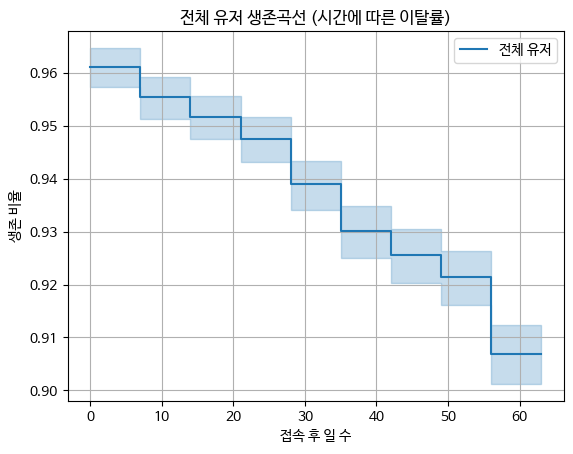

In [ ]:
kmf = KaplanMeierFitter()

# 생존 분석 수행
kmf.fit(durations=df['duration'], event_observed=df['event'], label='전체 유저')

# 시각화
kmf.plot()
plt.title("전체 유저 생존곡선 (시간에 따른 이탈률)")
plt.xlabel("접속 후 일 수")
plt.ylabel("생존 비율")
plt.grid(True)
plt.show()

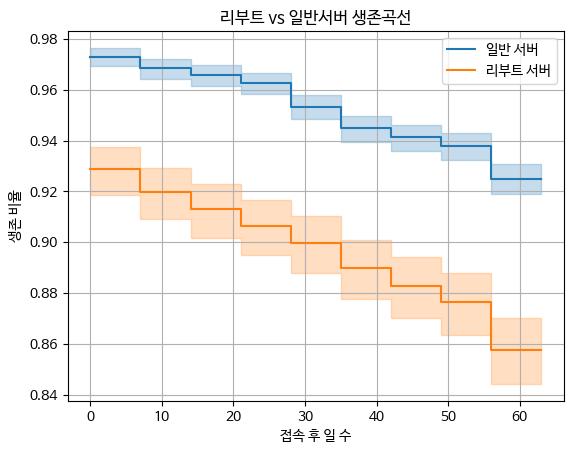

In [ ]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Kaplan-Meier Fitter 모델 초기화
kmf = KaplanMeierFitter()

# 리부트 여부 컬럼 추가
df['is_reboot'] = df['world_name'].isin(['리부트', '리부트2'])

# 일반 서버 먼저 설정
kmf.fit(durations=df[~df['is_reboot']]['duration'],
        event_observed=df[~df['is_reboot']]['event'],
        label='일반 서버')
ax = kmf.plot(color='#1F77B4')  # 파란색으로 설정

# 리부트 서버
kmf.fit(durations=df[df['is_reboot']]['duration'],
        event_observed=df[df['is_reboot']]['event'],
        label='리부트 서버')
kmf.plot(ax=ax, color='#FF7F0E')  # 주황색으로 설정

# 그래프 제목과 레이블 설정
plt.title("리부트 vs 일반서버 생존곡선")
plt.xlabel("접속 후 일 수")
plt.ylabel("생존 비율")
plt.grid(True)
plt.show()

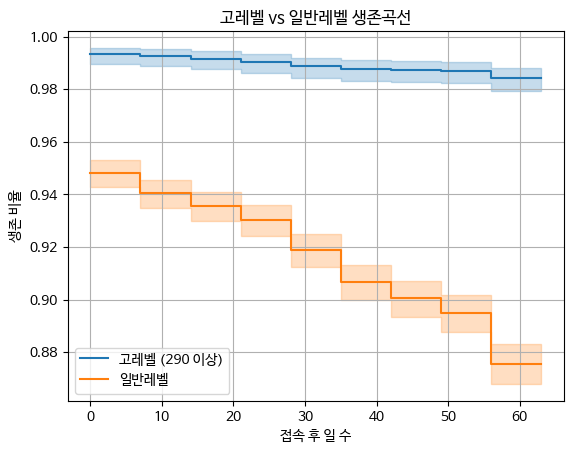

In [ ]:
df['is_high_level'] = df['character_level'] >= 290

kmf.fit(df[df['is_high_level']]['duration'], df[df['is_high_level']]['event'], label='고레벨 (290 이상)')
ax = kmf.plot()

kmf.fit(df[~df['is_high_level']]['duration'], df[~df['is_high_level']]['event'], label='일반레벨')
kmf.plot(ax=ax)

plt.title("고레벨 vs 일반레벨 생존곡선")
plt.xlabel("접속 후 일 수")
plt.ylabel("생존 비율")
plt.grid(True)
plt.show()

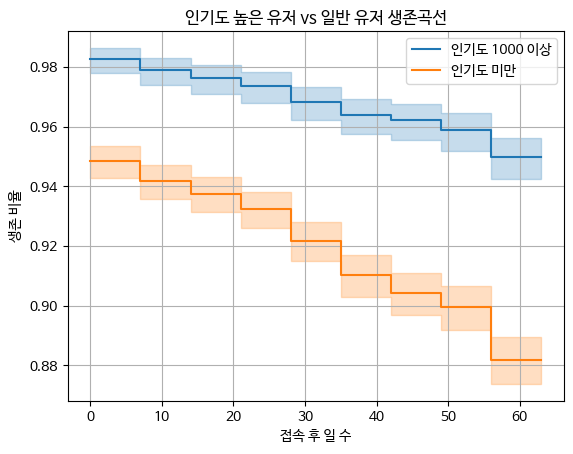

In [ ]:
df['is_high_popularity'] = df['popularity'] >= 1000

kmf.fit(df[df['is_high_popularity']]['duration'], df[df['is_high_popularity']]['event'], label='인기도 1000 이상')
ax = kmf.plot()

kmf.fit(df[~df['is_high_popularity']]['duration'], df[~df['is_high_popularity']]['event'], label='인기도 미만')
kmf.plot(ax=ax)

plt.title("인기도 높은 유저 vs 일반 유저 생존곡선")
plt.xlabel("접속 후 일 수")
plt.ylabel("생존 비율")
plt.grid(True)
plt.show()

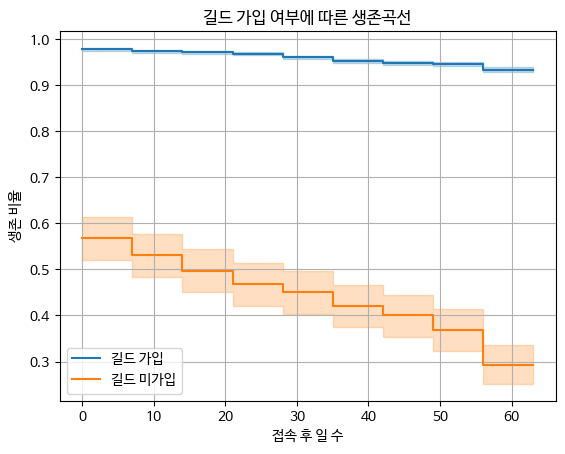

In [ ]:
df['is_guild'] = df['character_guild_name'] != '미가입'

kmf.fit(df[df['is_guild']]['duration'], df[df['is_guild']]['event'], label='길드 가입')
ax = kmf.plot()

kmf.fit(df[~df['is_guild']]['duration'], df[~df['is_guild']]['event'], label='길드 미가입')
kmf.plot(ax=ax)

plt.title("길드 가입 여부에 따른 생존곡선")
plt.xlabel("접속 후 일 수")
plt.ylabel("생존 비율")
plt.grid(True)
plt.show()

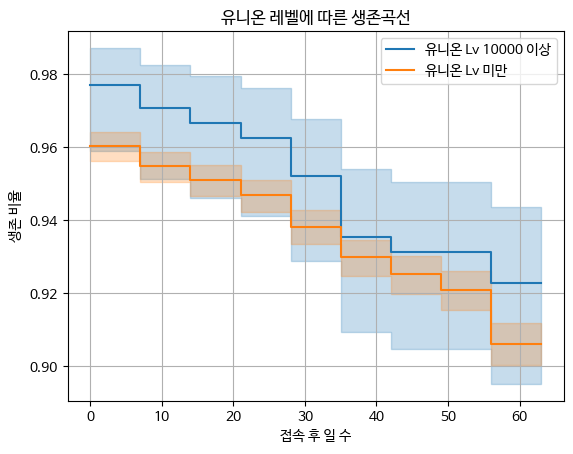

In [ ]:
df['is_high_union_level'] = df['union_level'] >= 10000

kmf.fit(df[df['is_high_union_level']]['duration'], df[df['is_high_union_level']]['event'], label='유니온 Lv 10000 이상')
ax = kmf.plot()

kmf.fit(df[~df['is_high_union_level']]['duration'], df[~df['is_high_union_level']]['event'], label='유니온 Lv 미만')
kmf.plot(ax=ax)

plt.title("유니온 레벨에 따른 생존곡선")
plt.xlabel("접속 후 일 수")
plt.ylabel("생존 비율")
plt.grid(True)
plt.show()

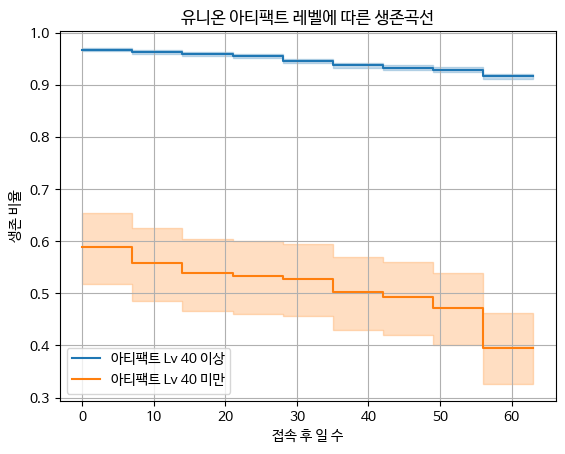

In [ ]:
df['is_high_artifact'] = df['union_artifact_level'] >= 40

kmf.fit(df[df['is_high_artifact']]['duration'], df[df['is_high_artifact']]['event'], label='아티팩트 Lv 40 이상')
ax = kmf.plot()

kmf.fit(df[~df['is_high_artifact']]['duration'], df[~df['is_high_artifact']]['event'], label='아티팩트 Lv 40 미만')
kmf.plot(ax=ax)

plt.title("유니온 아티팩트 레벨에 따른 생존곡선")
plt.xlabel("접속 후 일 수")
plt.ylabel("생존 비율")
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

df = pd.read_csv("survival_ready_cleaned_2024-10-17.csv")

# 일반 vs 리부트
print(" 일반서버 vs 리부트서버 유저 수")
server_counts = df['world_name'].apply(lambda x: '리부트' if x in ['리부트', '리부트2'] else '일반').value_counts().to_dict()
for k, v in server_counts.items():
    print(f"{k}: {v}")
print("\n")

# 레벨
print(" 290레벨 이상 vs 미만 유저 수")
level_counts = (df['character_level'] >= 290).replace({True: '290이상', False: '290미만'}).value_counts().to_dict()
for k, v in level_counts.items():
    print(f"{k}: {v}")
print("\n")

# 인기도
print(" 인기도 1000 이상 vs 미만 유저 수")
popularity_counts = (df['popularity'] >= 1000).replace({True: '1000이상', False: '1000미만'}).value_counts().to_dict()
for k, v in popularity_counts.items():
    print(f"{k}: {v}")
print("\n")

# 길드
print(" 길드 가입 vs 미가입 유저 수")
guild_counts = df['character_guild_name'].value_counts().to_dict()
guild_joined = sum([v for k, v in guild_counts.items() if k != '미가입'])
guild_not_joined = guild_counts.get('미가입', 0)
print(f"가입: {guild_joined}")
print(f"미가입: {guild_not_joined}")
print("\n")

# 유니온 레벨
print(" 유니온 레벨 10000 이상 vs 미만 유저 수")
union_counts = (df['union_level'] >= 10000).replace({True: '10000이상', False: '10000미만'}).value_counts().to_dict()
for k, v in union_counts.items():
    print(f"{k}: {v}")
print("\n")

# 유니온 아티팩트 레벨
print(" 유니온 아티팩트 레벨 40 이상 vs 미만 유저 수")
artifact_counts = (df['union_artifact_level'] >= 40).replace({True: '40이상', False: '40미만'}).value_counts().to_dict()
for k, v in artifact_counts.items():
    print(f"{k}: {v}")

 일반서버 vs 리부트서버 유저 수
일반: 7594
리부트: 2790


 290레벨 이상 vs 미만 유저 수
290미만: 7390
290이상: 2994


 인기도 1000 이상 vs 미만 유저 수
1000미만: 6549
1000이상: 3835


 길드 가입 vs 미가입 유저 수
가입: 9944
미가입: 440


 유니온 레벨 10000 이상 vs 미만 유저 수
10000미만: 9904
10000이상: 480


 유니온 아티팩트 레벨 40 이상 vs 미만 유저 수
40이상: 10189
40미만: 195


In [ ]:
sub_class_names = df['sub_class_name'].unique()
print(sub_class_names)

# sub_class_name 컬럼의 고유값 개수 확인
sub_class_name_count = len(df['sub_class_name'].unique())
print(sub_class_name_count)

['듀얼블레이더' '비숍' '데몬어벤져' '엔젤릭버스터' '캐논마스터' '아크' '아크메이지(썬,콜)' '나이트로드' '아델'
 '에반' '섀도어' '패스파인더' '제논' '라라' '배틀메이지' '키네시스' '은월' '메르세데스' '히어로'
 '아크메이지(불,독)' '카이저' '블래스터' '카데나' '초보자' '윈드브레이커' '캡틴' '제로' '카인' '팔라딘' '일리움'
 '팬텀' '호영' '다크나이트' '소울마스터' '보우마스터' '아란' '칼리' '나이트워커' '메카닉' '미하일' '데몬슬레이어'
 '와일드헌터' '바이퍼' '발키리' '신궁' '플레임위자드' '스트라이커' '루미너스' '시티즌']
49


In [ ]:
# 각 sub_class_name에 대해 데이터 개수 확인
sub_class_name_counts = df['sub_class_name'].value_counts()
print(sub_class_name_counts)

sub_class_name
비숍            1101
나이트로드          659
아델             614
듀얼블레이더         566
아크메이지(불,독)     499
팬텀             444
아크메이지(썬,콜)     343
패스파인더          302
윈드브레이커         291
섀도어            285
아크             285
제로             280
은월             277
아란             258
메르세데스          249
팔라딘            248
히어로            239
에반             237
엔젤릭버스터         227
호영             212
데몬어벤져          202
다크나이트          196
소울마스터          177
캐논마스터          170
제논             161
보우마스터          134
배틀메이지          123
바이퍼            121
카이저            119
루미너스           113
나이트워커          112
데몬슬레이어         111
카데나            110
플레임위자드         105
키네시스           104
메카닉            100
카인              87
블래스터            82
와일드헌터           75
미하일             69
신궁              65
라라              60
일리움             57
캡틴              52
스트라이커           37
칼리              19
초보자              5
발키리              1
시티즌              1
Name: count, dtype: int64


초보자 - 모험가 전직x

시티즌 - 레지스탕스 전직x

발키리 - 캡틴 전 상태

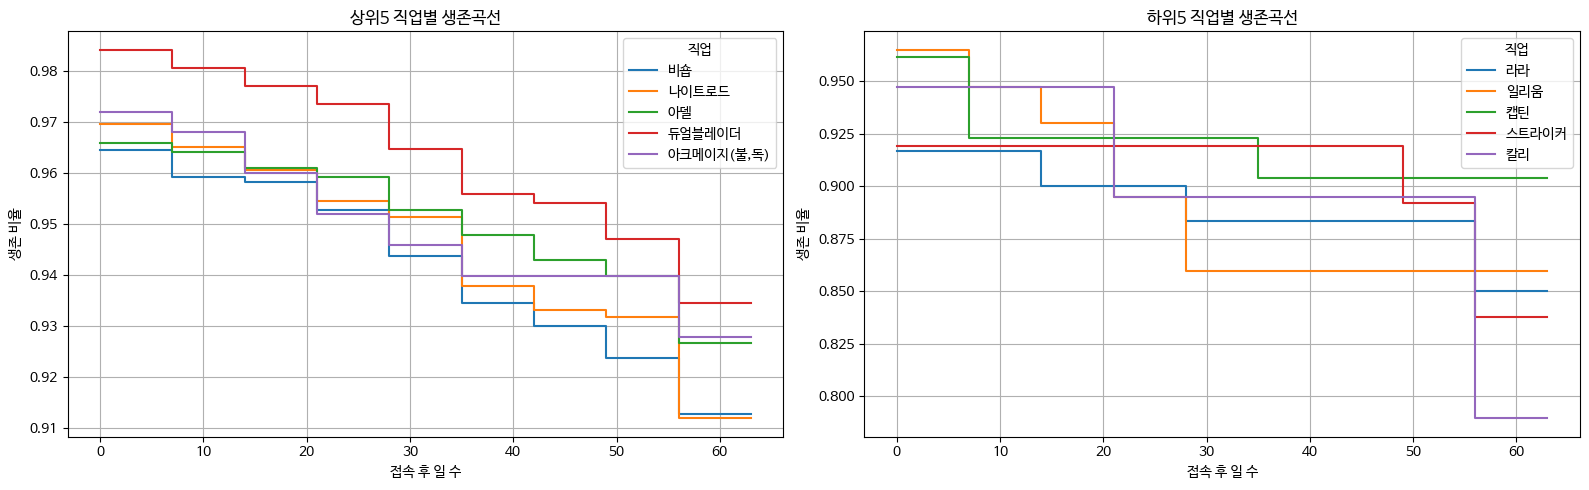

In [ ]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# 상위 5 직업과 하위 5 직업
selected_classes_top = ['비숍', '나이트로드', '아델', '듀얼블레이더', '아크메이지(불,독)']
selected_classes_bottom = ['라라', '일리움', '캡틴', '스트라이커', '칼리']

# 상위 5 직업 데이터 필터링
filtered_df_top = df[df['sub_class_name'].isin(selected_classes_top)]

# 하위 5 직업 데이터 필터링
filtered_df_bottom = df[df['sub_class_name'].isin(selected_classes_bottom)]

# Kaplan-Meier Fitter 모델 초기화
kmf = KaplanMeierFitter()

# 두 개의 subplot을 설정 (1행 2열)
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# 상위 5 직업 생존곡선
for sub_class in selected_classes_top:
    sub_class_df = filtered_df_top[filtered_df_top['sub_class_name'] == sub_class]
    kmf.fit(sub_class_df['duration'], event_observed=sub_class_df['event'], label=sub_class)
    kmf.plot(ax=axs[0], ci_show=False)

# 하위 5 직업 생존곡선
for sub_class in selected_classes_bottom:
    sub_class_df = filtered_df_bottom[filtered_df_bottom['sub_class_name'] == sub_class]
    kmf.fit(sub_class_df['duration'], event_observed=sub_class_df['event'], label=sub_class)
    kmf.plot(ax=axs[1], ci_show=False)

# 그래프 제목과 레이블 설정
axs[0].set_title("상위5 직업별 생존곡선")
axs[0].set_xlabel("접속 후 일 수")
axs[0].set_ylabel("생존 비율")
axs[0].grid(True)

axs[1].set_title("하위5 직업별 생존곡선")
axs[1].set_xlabel("접속 후 일 수")
axs[1].set_ylabel("생존 비율")
axs[1].grid(True)

# 범례 설정
axs[0].legend(title="직업")
axs[1].legend(title="직업")

plt.tight_layout()  # 그래프 간 간격 조정
plt.show()

===============Log-rank 검정===============

Log-rank 검정은 두 그룹 간 생존곡선 차이를 비교하는 검정이다.

1. 그룹화 기준: "world_name" 컬럼을 기준으로 리부트 서버와 일반 서버를 구분

2. 생존 시간: "duration" 컬럼을 사용

3. 이벤트 여부: "event" 컬럼을 사용하여 1은 사건 발생(예: 사망), 0은 사건 미발생(예: 생존)을 나타냄

정보)

test_statistic은 로그-랭크 검정에서 계산된 통계량임. 값이 클수록 두 그룹 간의 차이가 큼

귀무가설: 리부트 서버와 일반 서버 간에 생존에 차이가 없다.

대립가설: 리부트 서버와 일반 서버 간에 생존에 차이가 있다.

In [ ]:
from lifelines.statistics import logrank_test

# 리부트 서버와 일반 서버 데이터 구분
reboot_df = df[df['world_name'].isin(['리부트', '리부트2'])]
general_df = df[~df['world_name'].isin(['리부트', '리부트2'])]

# Log-rank 검정
results = logrank_test(
    reboot_df['duration'], general_df['duration'],
    event_observed_A=reboot_df['event'], event_observed_B=general_df['event']
)

# 검정 결과 출력
print(results)

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         113.50 <0.005     85.62


Log-rank 검정 결과:

test_statistic: 113.50

p-value: < 0.005

-log2(p): 85.62

p-value가 0.005 미만이므로 리부트 서버와 일반 서버 간의 생존에 대한 차이가 통계적으로 유의미함.



+나머지 가설들도 Log-rank 검정를 하면서 추론&통계를 진행하면 될 듯

===============Cox PH 모델===============

Cox Proportional Hazards (CoxPH) 모델:

생존 시간 데이터를 분석하여 특정 변수가 이탈 위험(hazard)에 미치는 영향을 추정하는 회귀 모델로, 위험비(hazard ratio)를 통해 변수의 효과를 정량화합니다.

여기서는 exp(coef)이 위험비를 나타냄

위험비(exp(coef)) < 1: 변수 값이 증가할수록 이탈 위험이 감소

예: character_level의 exp(coef)=0.77은 레벨이 높을수록 이탈 위험이 23% 줄어듦.

위험비(exp(coef)) > 1: 변수 값이 증가할수록 이탈 위험이 증가.

예: union_level의 exp(coef)=1.04는 유니온 레벨이 높을수록 이탈 위험이 4% 증가.

In [ ]:
import pandas as pd

# 상관관계 계산
corr_matrix = df_cleaned.corr(numeric_only=True)

# 소수점 둘째 자리까지 보기 좋게 출력
print(corr_matrix.round(2))

                      duration  event  character_level  popularity  \
duration                  1.00  -0.88             0.45        0.05   
event                    -0.88   1.00            -0.44       -0.06   
character_level           0.45  -0.44             1.00        0.09   
popularity                0.05  -0.06             0.09        1.00   
union_level               0.25  -0.21             0.49        0.06   
union_artifact_exp        0.15  -0.15             0.13        0.04   
union_artifact_point      0.25  -0.23             0.26        0.03   
trophy_score              0.04  -0.04             0.04        0.14   

                      union_level  union_artifact_exp  union_artifact_point  \
duration                     0.25                0.15                  0.25   
event                       -0.21               -0.15                 -0.23   
character_level              0.49                0.13                  0.26   
popularity                   0.06                0.04

event와 가장 상관 높은 변수들

변수명 | 상관계수 (event)

duration | -0.88

character_level | -0.44

union_artifact_level | -0.34

union_level | -0.21

union_artifact_point | -0.23

-> event 발생 여부는 주로 duration, character_level, union_*** 관련 변수들과 음의 상관관계를 가진다.

duration과 가장 상관 높은 변수들

변수명 | 상관계수 (duration)

event | -0.88

character_level | 0.45

union_artifact_level | 0.38

union_level | 0.25

union_artifact_point | 0.25

→ duration은 전반적으로 캐릭터 레벨이나 유니온 관련 수치가 높을수록 길어진다는 의미.

즉, Cox PH에 넣기 좋은 컬럼

character_level

union_level

union_artifact_level

union_artifact_exp

union_artifact_point

In [ ]:
from lifelines import CoxPHFitter

# 사용할 컬럼 정의
columns_to_use = [
    'duration', 'event',
    'character_level',
    'union_level', 'union_artifact_level',
    'union_artifact_exp', 'union_artifact_point'
]

# 해당 컬럼들만 추출 후 결측치 제거
df_for_cox = df_cleaned[columns_to_use].dropna()

# Cox 모델 학습
cph = CoxPHFitter()
cph.fit(df_for_cox, duration_col='duration', event_col='event')

# 결과 출력
cph.print_summary()

/usr/local/lib/python3.11/dist-packages/lifelines/fitters/coxph_fitter.py:1789: RuntimeWarning: overflow encountered in exp
  scores = weights * exp(dot(X, beta))
/usr/local/lib/python3.11/dist-packages/lifelines/fitters/coxph_fitter.py:1802: RuntimeWarning: overflow encountered in multiply
  phi_x_i = phi_i * X_at_t
/usr/local/lib/python3.11/dist-packages/lifelines/fitters/coxph_fitter.py:1530: LinAlgWarning: Ill-conditioned matrix (rcond=0): result may not be accurate.
  inv_h_dot_g_T = spsolve(-h, g, assume_a="pos", check_finite=False)


ConvergenceError: delta contains nan value(s). Convergence halted. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model

->  모델이 수렴하지 못했다는 에러

원인
1. 값의 크기가 너무 큼 (특히 character_exp, union_artifact_exp 같은 지수 수준 숫자)
2. 상관관계가 너무 높은 변수들 존재 → 다중공선성 문제
3. 스케일 차이 → exp(Xβ) 계산할 때 overflow 발생

In [ ]:
# 상관 관계가 높은 변수들 제거
df_for_cox_clean = df_for_cox.drop(columns=['union_artifact_exp', 'union_artifact_level', 'union_artifact_point'])

# Cox 모델 학습
cph.fit(df_for_cox_clean, duration_col='duration', event_col='event')
cph.print_summary()

/usr/local/lib/python3.11/dist-packages/lifelines/fitters/coxph_fitter.py:1614: ConvergenceWarning: Newton-Raphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model
  warnings.warn(


<lifelines.CoxPHFitter: fitted with 10384 total observations, 9418 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 10384
number of events observed = 966
   partial log-likelihood = -30794.38
         time fit was run = 2025-04-18 05:13:24 UTC

---
                 coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                        
character_level 11.44  92714.50      0.18           11.08           11.80            64734.29            1.33e+05
union_level      1.62      5.03      0.05            1.51            1.72                4.54                5.57

                 cmp to     z      p  -log2(p)
covariate                                     
character_level    0.00 62.40 <0.005       inf
union_level        0.00 30.89 <0.005    693.65
---
Concordance = 0.19
Partial AIC = 61592.75
log-likelihood ratio test = -43814.26 on 2 df
-log2(p) of ll-ratio test = -0.00

# 이상치 확인

In [ ]:
import pandas as pd

df = pd.read_csv("survival_ready_cleaned_2024-10-17.csv")

# 데이터의 첫 몇 행을 확인하여 구조를 파악
df.head()

ocid last_active_date  start_date  duration  \
0  0005a591a9ce49e650602f24476f7f3f       2024-12-19  2024-10-17        63   
1  00084af5dae7fb3394733e7a90103138       2024-12-19  2024-10-17        63   
2  000aa3a50ead6ba81a089a4ae77f2b7c       2024-10-17  2024-10-17         0   
3  000ca4b4fdc64d039fdc6c4b676360a3       2024-12-19  2024-10-17        63   
4  001337207be9f3d561c30b4b6ef5955e       2024-12-19  2024-10-17        63   

   event character_name character_date_create world_name class_name  \
0      0             의경            2016-03-26       스카니아         도적   
1      0            악몽마            2013-11-12        크로아        마법사   
2      1            띠꾸롱            2015-07-18         베라      레지스탕스   
3      0             깜스            2019-01-21        리부트     엔젤릭버스터   
4      0            좌회전            2018-05-06         베라         해적   

  sub_class_name  ...  character_level  character_exp  popularity  \
0         듀얼블레이더  ...            291.0   2.507843e+13      3016.0   
1             비숍  ...            290.0   7.010723e+13      1480.0   
2          데몬어벤져  ...            103.0   2.400785e+06         1.0   
3         엔젤릭버스터  ...            290.0   1.575985e+13       249.0   
4          캐논마스터  ...            286.0   8.936847e+13      2782.0   

   character_guild_name union_level  union_artifact_level  union_artifact_exp  \
0                    칠요      9544.0                  52.0             48135.0   
1                    물감      9623.0                  55.0              1635.0   
2                   미가입       103.0                   1.0                 0.0   
3                  페브리즈      9539.0                  51.0             50380.0   
4                    바람      9304.0                  50.0             31035.0   

   union_artifact_point  access_flag  validity_flag  
0               17600.0         True           True  
1               18500.0         True           True  
2                   0.0        False          False  
3               16730.0         True           True  
4               17000.0         True           True  

[5 rows x 21 columns]

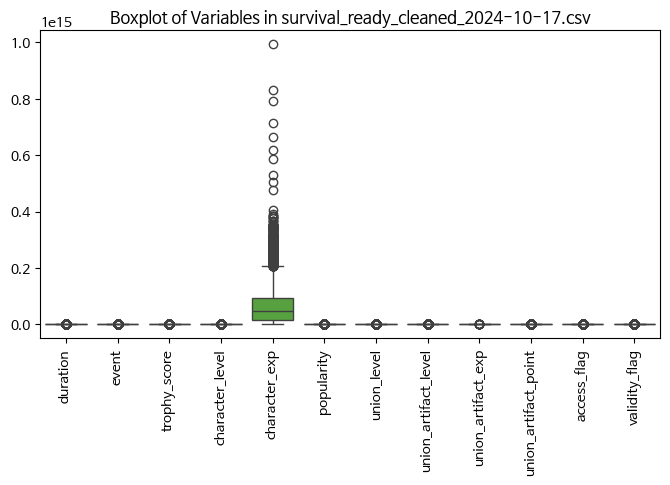

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일 읽기
df = pd.read_csv("survival_ready_cleaned_2024-10-17.csv")

# 'TRUE', 'FALSE'를 1, 0으로 대체
df['access_flag'] = df['access_flag'].astype(int)
df['validity_flag'] = df['validity_flag'].astype(int)

# 제외할 컬럼 리스트
exclude_columns = ['character_name', 'world_name', 'class_name', 'sub_class_name', 'character_guild_name']

# 제외할 컬럼을 제거한 데이터프레임
df_cleaned = df.drop(columns=exclude_columns)

# 숫자형 데이터만 선택
df_numeric = df_cleaned.select_dtypes(include=['float64', 'int64'])

# IQR 방법을 사용하여 이상치 확인
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# 이상치가 있는 행을 표시
outliers = (df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))

# 이상치 분포 시각화 (Boxplot)
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_numeric)
plt.xticks(rotation=90)
plt.title("Boxplot of Variables in survival_ready_cleaned_2024-10-17.csv")
plt.show()

낮은 분산 컬럼: Index([], dtype='object')
높은 상관관계 쌍: duration  event       True
event     duration    True
dtype: bool


<lifelines.CoxPHFitter: fitted with 10384 total observations, 9418 right-censored observations>
             duration col = 'duration'
                event col = 'event'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 10384
number of events observed = 966
   partial log-likelihood = -8492.46
         time fit was run = 2025-04-18 05:25:54 UTC

---
                      coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                             
character_level      -0.27      0.77      0.01           -0.29           -0.24                0.75                0.78
popularity           -0.08      0.93      0.03           -0.13           -0.03                0.88                0.98
union_level           0.04      1.04      0.02            0.01            0.07                1.01                1.07
union_artifact_exp   -0.20      0.82      0.02           -0.25           -0.15                0.78                0.86
union_artifact_point -0.20      0.82      0.02           -0.24           -0.16                0.78                0.85
trophy_score         -0.08      0.93      0.02           -0.12           -0.03                0.89                0.97

                      cmp to      z      p  -log2(p)
covariate                                           
character_level         0.00 -23.19 <0.005    392.76
popularity              0.00  -2.91 <0.005      8.13
union_level             0.00   2.29   0.02      5.49
union_artifact_exp      0.00  -8.56 <0.005     56.32
union_artifact_point    0.00  -9.98 <0.005     75.45
trophy_score            0.00  -3.24 <0.005      9.73
---
Concordance = 0.81
Partial AIC = 16996.92
log-likelihood ratio test = 789.57 on 6 df
-log2(p) of ll-ratio test = 553.29

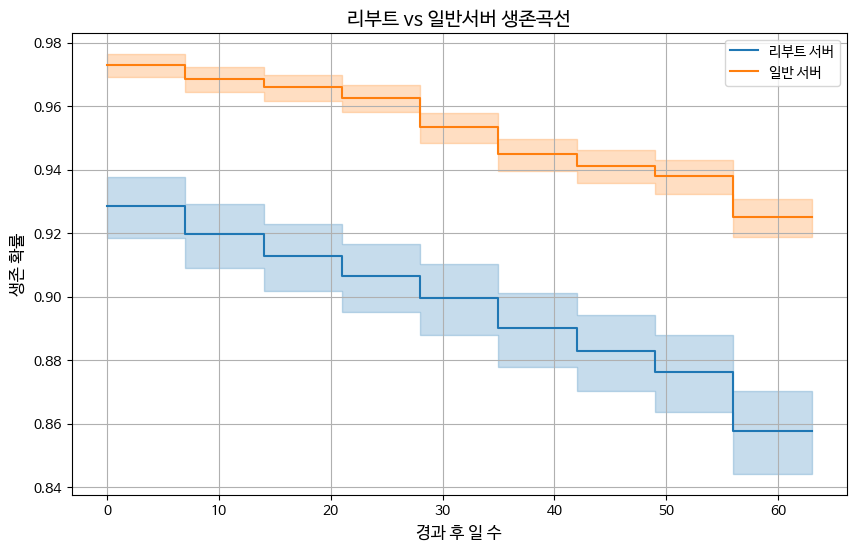

In [ ]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter, KaplanMeierFitter
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 데이터 로드
df = pd.read_csv("survival_ready_cleaned_2024-10-17.csv")

# 1. 데이터 전처리
# True/False를 1/0으로 변환
df['access_flag'] = df['access_flag'].astype(int)
df['validity_flag'] = df['validity_flag'].astype(int)

# 제외할 컬럼
exclude_columns = ['character_name', 'world_name', 'class_name', 'sub_class_name',
                   'character_guild_name', 'ocid', 'character_date_create', 'last_active_date', 'start_date']

# 분석에 사용할 컬럼 선택 (도메인 지식 기반으로 조정 가능)
selected_columns = ['duration', 'event', 'character_level', 'popularity', 'union_level',
                    'union_artifact_level', 'union_artifact_exp', 'union_artifact_point',
                    'trophy_score']

# 데이터프레임 정리
df_cleaned = df[selected_columns]

# 낮은 분산 컬럼 확인
variances = df_cleaned.var()
low_variance_cols = variances[variances < 0.01].index
print(f"낮은 분산 컬럼: {low_variance_cols}")
df_cleaned = df_cleaned.drop(columns=low_variance_cols, errors='ignore')

# 상관관계 확인
corr_matrix = df_cleaned.corr()
high_corr = (corr_matrix.abs() > 0.8) & (corr_matrix != 1.0)
print("높은 상관관계 쌍:", high_corr.stack()[high_corr.stack()])

# 높은 상관관계 컬럼 중 하나 제외 (예: union_artifact_exp 유지, union_artifact_level 제거)
df_cleaned = df_cleaned.drop(columns=['union_artifact_level'], errors='ignore')

# 스케일링 (duration과 event 제외)
scaler = StandardScaler()
scale_cols = [col for col in df_cleaned.columns if col not in ['duration', 'event']]
df_cleaned[scale_cols] = scaler.fit_transform(df_cleaned[scale_cols])

# 결측값 제거
df_cleaned = df_cleaned.dropna()

# 2. CoxPH 모델 학습
try:
    cph = CoxPHFitter(penalizer=0.1)  # 패널티 추가
    cph.fit(df_cleaned, duration_col='duration', event_col='event')
    cph.print_summary()
except Exception as e:
    print(f"CoxPH 모델 학습 실패: {e}")

# 3. Kaplan-Meier 생존 곡선 그리기
plt.figure(figsize=(10, 6))
kmf = KaplanMeierFitter()

# 리부트 서버 (world_name에 '리부트' 포함)
reboot_data = df[df['world_name'].str.contains('리부트', case=False, na=False)]
kmf.fit(reboot_data['duration'], reboot_data['event'], label='리부트 서버')
kmf.plot(ci_show=True, color='#1F77B4')  # 파란색

# 일반 서버
normal_data = df[~df['world_name'].str.contains('리부트', case=False, na=False)]
kmf.fit(normal_data['duration'], normal_data['event'], label='일반 서버')
kmf.plot(ci_show=True, color='#FF7F0E')  # 주황색

# 그래프 설정
plt.title('리부트 vs 일반서버 생존곡선', fontsize=14)
plt.xlabel('경과 후 일 수', fontsize=12)
plt.ylabel('생존 확률', fontsize=12)
plt.grid(True)
plt.show()

해석)

모델 성능 지표: Concordance: 0.81

  모델의 예측력이 높음 (0.5는 무작위, 1.0은 완벽한 예측).
  0.81은 이탈 위험 순위를 잘 예측함을 나타냄.

Partial AIC: 16,996.92

  모델 복잡성과 적합도를 비교하는 지표. 다른 모델과 비교 시 사용 가능.

로그 우도 비율 검정 (log-likelihood ratio test): 789.57 (6 df), -log2(p)=553.29

  모델이 설명 변수 없이 단순 기준선(baseline) 모델보다 훨씬 나은 적합도를 가짐.
  매우 낮은 p-value로 모델의 유의미성 확인.

CoxPH 모델 결과:

모델은 잘 적합되었으며, character_level, union_artifact_exp, union_artifact_point가 이탈 위험을 줄이는 주요 요인.

높은 Concordance(0.81)와 유의미한 통계량으로 모델 신뢰도 높음.

In [ ]:
import requests
import pandas as pd
import time

# API 키 및 설정
api_key = "live_7c722ec2c9a8caa439d1d5e724800530c877ba6c5997cb8474cc2dc7be631088efe8d04e6d233bd35cf2fabdeb93fb0d"
ocid = "083c24137ac6507e573cd3cdc7a28e54"
dates = ['2024-10-17', '2024-11-17', '2024-11-27']
base_url = "https://open.api.nexon.com/maplestory/v1/"

# 결과를 저장할 리스트
results = []

# API 호출 함수
def fetch_character_info(ocid, date):
    headers = {"x-nxopen-api-key": api_key}
    try:
        # 캐릭터 기본 정보 조회
        url_basic = f"{base_url}character/basic?ocid={ocid}&date={date}"
        response_basic = requests.get(url_basic, headers=headers)
        response_basic.raise_for_status()
        data_basic = response_basic.json()

        # 유니온 정보 조회
        url_union = f"{base_url}user/union?ocid={ocid}&date={date}"
        response_union = requests.get(url_union, headers=headers)
        response_union.raise_for_status()
        data_union = response_union.json()

        # 인기도 정보 조회
        url_popularity = f"{base_url}character/popularity?ocid={ocid}&date={date}"
        response_popularity = requests.get(url_popularity, headers=headers)
        response_popularity.raise_for_status()
        data_popularity = response_popularity.json()

        # 결과 데이터 구성
        result = {
            'snapshot_date': date,
            'ocid': ocid,
            'character_name': data_basic.get('character_name', ''),
            'world_name': data_basic.get('world_name', ''),
            'class_name': data_basic.get('character_class', ''),
            'sub_class_name': data_basic.get('character_class', ''),  # API에서 세부 직업 구분 없음
            'character_level': data_basic.get('character_level', 0),
            'character_exp': data_basic.get('character_exp', 0),
            'character_date_create': data_basic.get('character_date_create', ''),
            'popularity': data_popularity.get('popularity', 0),
            'character_guild_name': data_basic.get('character_guild_name', ''),
            'union_level': data_union.get('union_level', 0),
            'union_artifact_level': data_union.get('union_artifact_level', 0),
            'union_artifact_exp': data_union.get('union_artifact_exp', 0),
            'union_artifact_point': data_union.get('union_artifact_point', 0),
            'access_flag': True,  # API 접근 성공 시 True
            'validity_flag': True if data_basic.get('character_level', 0) > 0 else False
        }
        return result
    except requests.exceptions.RequestException as e:
        print(f"❌ {date} 데이터 조회 실패: {e}")
        return {
            'snapshot_date': date,
            'ocid': ocid,
            'character_name': '',
            'world_name': '',
            'class_name': '',
            'sub_class_name': '',
            'character_level': 0,
            'character_exp': 0,
            'character_date_create': '',
            'popularity': 0,
            'character_guild_name': '',
            'union_level': 0,
            'union_artifact_level': 0,
            'union_artifact_exp': 0,
            'union_artifact_point': 0,
            'access_flag': False,
            'validity_flag': False
        }

# 각 날짜별 데이터 조회
for date in dates:
    print(f"🔄 {date} 데이터 조회 중...")
    result = fetch_character_info(ocid, date)
    results.append(result)
    time.sleep(1)  # API 요청 제한 준수

# 데이터프레임 생성
df = pd.DataFrame(results)

# 컬럼 순서 지정
output_columns = [
    'snapshot_date', 'ocid', 'character_name', 'world_name', 'class_name', 'sub_class_name',
    'character_level', 'character_exp', 'character_date_create', 'popularity',
    'character_guild_name', 'union_level', 'union_artifact_level', 'union_artifact_exp',
    'union_artifact_point', 'access_flag', 'validity_flag'
]
df = df[output_columns]

# 결과 출력
print("\n📋 조회 결과:")
print(df)

🔄 2024-10-17 데이터 조회 중...
🔄 2024-11-17 데이터 조회 중...
🔄 2024-11-27 데이터 조회 중...

📋 조회 결과:
  snapshot_date                              ocid character_name world_name  \
0    2024-10-17  083c24137ac6507e573cd3cdc7a28e54             액셀       스카니아   
1    2024-11-17  083c24137ac6507e573cd3cdc7a28e54             액셀       스카니아   
2    2024-11-27  083c24137ac6507e573cd3cdc7a28e54             액셀       스카니아   

  class_name sub_class_name  character_level    character_exp  \
0         제로             제로              291  228835608750500   
1         제로             제로              292   48590702632744   
2         제로             제로              292   72255218225822   

    character_date_create  popularity character_guild_name  union_level  \
0  2013-07-18T00:00+09:00       11140                   칠요         9540   
1  2013-07-18T00:00+09:00       11142                   칠요         9548   
2  2013-07-18T00:00+09:00       11142                   칠요         9553   

   union_artifact_level  union_artif

In [ ]:
#캐릭터 식별자(ocid)를 조회합니다.

import requests

# API Key와 헤더 설정
headers = {
    "x-nxopen-api-key": "live_7c722ec2c9a8caa439d1d5e724800530c877ba6c5997cb8474cc2dc7be631088efe8d04e6d233bd35cf2fabdeb93fb0d"}

# 요청 URL과 파라미터
url = "https://open.api.nexon.com/maplestory/v1/id"
params = {
    "character_name": "신상오리"
}

# GET 요청 보내기
response = requests.get(url, headers=headers, params=params)

# 응답 처리
if response.status_code == 200:
    data = response.json()
    print("✅ 캐릭터 ocid:", data.get("ocid"))
else:
    print(f"❌ 요청 실패 (status {response.status_code})")
    print(response.text)

✅ 캐릭터 ocid: 9b33036f768f2238bdaed496db3d057f


In [ ]:
#캐릭터 식별자(ocid)를 조회합니다.

import requests

# API Key와 헤더 설정
headers = {
    "x-nxopen-api-key": "live_7c722ec2c9a8caa439d1d5e724800530c877ba6c5997cb8474cc2dc7be631088efe8d04e6d233bd35cf2fabdeb93fb0d"}

# 요청 URL과 파라미터
url = "https://open.api.nexon.com/maplestory/v1/id"
params = {
    "character_name": "연서"
}

# GET 요청 보내기
response = requests.get(url, headers=headers, params=params)

# 응답 처리
if response.status_code == 200:
    data = response.json()
    print("✅ 캐릭터 ocid:", data.get("ocid"))
else:
    print(f"❌ 요청 실패 (status {response.status_code})")
    print(response.text)

✅ 캐릭터 ocid: d9a922057e2c0a03384c6d30d9e00ee6


# 새 섹션

In [ ]:
# 1. 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# MyDrive 경로 설정
mydrive_path = '/content/drive/MyDrive'

# 파일 및 폴더 목록 출력
for root, dirs, files in os.walk(mydrive_path):
    print(f"\n📁 현재 폴더: {root}")
    for name in files:
        print(f" - 파일: {name}")
    for name in dirs:
        print(f" - 하위 폴더: {name}")


📁 현재 폴더: /content/drive/MyDrive
 - 하위 폴더: Colab Notebooks
 - 하위 폴더: 데이터톤_메이플

📁 현재 폴더: /content/drive/MyDrive/Colab Notebooks
 - 파일: Untitled0.ipynb

📁 현재 폴더: /content/drive/MyDrive/데이터톤_메이플
 - 하위 폴더: 원본
 - 하위 폴더: 원본+exp_diff

📁 현재 폴더: /content/drive/MyDrive/데이터톤_메이플/원본
 - 파일: achievement_fullinfo_2024-12-12.csv
 - 파일: achievement_fullinfo_2024-10-17.csv
 - 파일: achievement_fullinfo_2024-11-07.csv
 - 파일: achievement_fullinfo_2024-11-28.csv
 - 파일: achievement_fullinfo_2024-12-19.csv
 - 파일: achievement_fullinfo_2024-12-05.csv
 - 파일: achievement_fullinfo_2024-11-14.csv
 - 파일: achievement_fullinfo_2024-10-24.csv
 - 파일: achievement_fullinfo_2024-10-31.csv
 - 파일: achievement_fullinfo_2024-11-21.csv

📁 현재 폴더: /content/drive/MyDrive/데이터톤_메이플/원본+exp_diff
 - 파일: updated_achievement_fullinfo_2024-10-17.csv
 - 파일: updated_achievement_fullinfo_2024-10-24.csv
 - 파일: updated_achievement_fullinfo_2024-10-31.csv
 - 파일: updated_achievement_fullinfo_202

In [ ]:
import pandas as pd
import os

# 📁 파일 경로 설정
folder_path = '/content/drive/MyDrive/데이터톤_메이플/원본'

# 📄 파일 리스트 (정렬된 상태로 보기 좋게 출력)
file_list = sorted([
    f for f in os.listdir(folder_path)
    if f.endswith('.csv')
])

# 각 파일의 상위 5개 행 출력
for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    print(f"\n📄 파일명: {file_name}")
    df = pd.read_csv(file_path)
    print(df.head())  # 상위 5행 출력


📄 파일명: achievement_fullinfo_2024-10-17.csv
  character_name                                               ocid  \
0           신상오리                   9b33036f768f2238bdaed496db3d057f   
1             그윽                   2d1aab3a769bb437c61914a86979d6dd   
2           멜리블룸                   928cc27e2fb4ab66ec1dba451bcd36c7   
3             솔리                   99025dcf016e3dfaf760f46e1801488f   
4           하시시야  7861a6fa49f0edd188b135d40fc86c85efe8d04e6d233b...   

  world_name class_name sub_class_name  trophy_score  character_level  \
0       스카니아        기사단           노블레스         33100              NaN   
1        크로아        마법사     아크메이지(불,독)         33600            291.0   
2        크로아        기사단         윈드브레이커         32000            290.0   
3       스카니아         궁수          보우마스터         32520            288.0   
4       엘리시움         도적         듀얼블레이더         32640            289.0   

   character_exp   character_date_create  popularity character_guild_name  \
0            

In [ ]:
import pandas as pd
import os

# 📁 원본 CSV가 있는 구글 드라이브 경로
folder_path = '/content/drive/MyDrive/데이터톤_메이플/원본'

# 파일 리스트 정렬
file_list = sorted([
    f for f in os.listdir(folder_path)
    if f.endswith('.csv')
])

# 날짜 추출 함수
def extract_date(filename):
    return filename.replace("achievement_fullinfo_", "").replace(".csv", "")

# 병합 시작
df_merged = None

for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    date_str = extract_date(file_name)

    # CSV 로딩
    df = pd.read_csv(file_path)

    # ✅ 1. trophy_score ≥ 20000 필터링
    df = df[df['trophy_score'] >= 20000]

    # ✅ 2. sub_class_name 결측치 → class_name 값으로 대체
    df['sub_class_name'] = df['sub_class_name'].fillna(df['class_name'])

    # ✅ 3. character_guild_name 결측치 → '미가입'으로 대체
    df['character_guild_name'] = df['character_guild_name'].fillna('미가입')

    # ✅ 날짜 prefix 추가 및 ocid 유지
    df = df.add_prefix(f"{date_str}_")
    df = df.rename(columns={f"{date_str}_ocid": "ocid"})  # ocid는 기준 키

    # 병합
    if df_merged is None:
        df_merged = df
    else:
        df_merged = pd.merge(df_merged, df, on="ocid", how="inner")

# ✅ Google Colab 경로에 결과 저장
output_path = '/content/merged_filtered_data.csv'
df_merged.to_csv(output_path, index=False)

print("✅ 전처리 및 병합 완료! Colab에 저장된 경로:")
print(output_path)

✅ 전처리 및 병합 완료! Colab에 저장된 경로:
/content/merged_filtered_data.csv


In [ ]:
import pandas as pd

# Colab 경로의 병합된 파일 불러오기
file_path = '/content/merged_filtered_data.csv'

# CSV 읽기
df = pd.read_csv(file_path)

# 상위 5개 행 확인
df.head()

2024-10-17_character_name  \
0                        그윽   
1                      멜리블룸   
2                        솔리   
3                      하시시야   
4                        쿵냐   

                                                ocid 2024-10-17_world_name  \
0                   2d1aab3a769bb437c61914a86979d6dd                   크로아   
1                   928cc27e2fb4ab66ec1dba451bcd36c7                   크로아   
2                   99025dcf016e3dfaf760f46e1801488f                  스카니아   
3  7861a6fa49f0edd188b135d40fc86c85efe8d04e6d233b...                  엘리시움   
4                   4fc5898b181617dcadd64ecee8055b02                   크로아   

  2024-10-17_class_name 2024-10-17_sub_class_name  2024-10-17_trophy_score  \
0                   마법사                아크메이지(불,독)                    33600   
1                   기사단                    윈드브레이커                    32000   
2                    궁수                     보우마스터                    32520   
3                    도적                    듀얼블레이더                    32640   
4                   마법사                아크메이지(불,독)                    32070   

   2024-10-17_character_level  2024-10-17_character_exp  \
0                       291.0              5.752663e+13   
1                       290.0              1.001741e+14   
2                       288.0              8.120635e+13   
3                       289.0              4.609502e+13   
4                       283.0              2.759802e+13   

  2024-10-17_character_date_create  2024-10-17_popularity  ...  \
0           2007-07-24T00:00+09:00                 5161.0  ...   
1           2017-07-02T00:00+09:00                  544.0  ...   
2           2007-06-03T00:00+09:00                 3337.0  ...   
3           2020-05-15T00:00+09:00                 7932.0  ...   
4           2016-05-21T00:00+09:00                  259.0  ...   

  2024-12-19_character_exp  2024-12-19_character_date_create  \
0             1.344571e+14            2007-07-24T00:00+09:00   
1             2.344303e+14            2017-07-02T00:00+09:00   
2             7.577912e+13            2007-06-03T00:00+09:00   
3             6.214762e+12            2020-05-15T00:00+09:00   
4             3.862356e+13            2016-05-21T00:00+09:00   

   2024-12-19_popularity  2024-12-19_character_guild_name  \
0                 5186.0                               라이   
1                  544.0                               마린   
2                 3426.0                               솔리   
3                 7934.0                           몬스터컬렉션   
4                  259.0                               고기   

   2024-12-19_union_level 2024-12-19_union_artifact_level  \
0                 10088.0                            56.0   
1                 10159.0                            53.0   
2                  9631.0                            55.0   
3                 10605.0                            55.0   
4                 10191.0                            56.0   

   2024-12-19_union_artifact_exp 2024-12-19_union_artifact_point  \
0                        12735.0                         18800.0   
1                        62535.0                         17900.0   
2                          535.0                         18500.0   
3                        22535.0                         10500.0   
4                        25835.0                         18800.0   

  2024-12-19_access_flag 2024-12-19_validity_flag  
0                   True                     True  
1                   True                     True  
2                   True                     True  
3                   True                     True  
4                   True                     True  

[5 rows x 161 columns]

In [ ]:
import pandas as pd

# 1. 데이터 불러오기
df = pd.read_csv("merged_filtered_data.csv")

# 2. 날짜 추출 (날짜 접두사만)
dates = sorted(set([col.split('_')[0] for col in df.columns if '_' in col and col.split('_')[0][:4].isdigit()]))

# 3. start~stop 기간 리스트 생성
date_ranges = [(dates[i], dates[i+1]) for i in range(len(dates) - 1)]

# 4. 변환 작업
long_df_list = []

for start, stop in date_ranges:
    # 이 기간의 컬럼만 선택
    period_cols = [col for col in df.columns if col.startswith(start)]
    rename_dict = {col: col.replace(f"{start}_", "") for col in period_cols}

    temp = df[["ocid"] + period_cols].copy()
    temp = temp.rename(columns=rename_dict)
    temp["start"] = start
    temp["stop"] = stop

    # 컬럼 순서 정리
    cols = ["ocid", "start", "stop"] + list(rename_dict.values())
    temp = temp[cols]

    long_df_list.append(temp)

# 5. 각 기간별로 분리된 DF를 아래로 이어붙이기 (즉 ocid당 10행씩)
final_df = pd.concat(long_df_list, ignore_index=True)

# 6. 정렬: ocid별로 모이고, start 기준 정렬되도록
final_df = final_df.sort_values(by=["ocid", "start"]).reset_index(drop=True)

# 7. 저장
final_df.to_csv("ocid_split_by_period.csv", index=False)

In [ ]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv("ocid_split_by_period.csv")

# 상위 5개 행 출력
print(df.head())

                               ocid       start        stop character_name  \
0  0005a591a9ce49e650602f24476f7f3f  2024-10-17  2024-10-24             의경   
1  0005a591a9ce49e650602f24476f7f3f  2024-10-24  2024-10-31             의경   
2  0005a591a9ce49e650602f24476f7f3f  2024-10-31  2024-11-07             의경   
3  0005a591a9ce49e650602f24476f7f3f  2024-11-07  2024-11-14             의경   
4  0005a591a9ce49e650602f24476f7f3f  2024-11-14  2024-11-21             의경   

  world_name class_name sub_class_name  trophy_score  character_level  \
0       스카니아         도적         듀얼블레이더         23500            291.0   
1       스카니아         도적         듀얼블레이더         23660            291.0   
2       스카니아         도적         듀얼블레이더         23660            291.0   
3       스카니아         도적         듀얼블레이더         23660            291.0   
4       스카니아         도적         듀얼블레이더         23690            291.0   

   character_exp   character_date_create  popularity character_guild_name  \
0   2.507843e+1

In [ ]:
import pandas as pd

# 1. 데이터 로드
ocid_df = pd.read_csv("ocid_split_by_period.csv")

# 2. 최종 스냅샷 날짜 설정 (예시로 2024-12-19 사용)
last_snapshot_date = pd.to_datetime("2024-12-19")

# 3. duration / event 계산
ocid_df["start"] = pd.to_datetime(ocid_df["start"])
ocid_df["stop"] = pd.to_datetime(ocid_df["stop"])

# duration: start와 stop 날짜 차이 계산
ocid_df["duration"] = (ocid_df["stop"] - ocid_df["start"]).dt.days

# event: stop 날짜가 마지막 스냅샷 날짜보다 이전이면 1, 아니면 0
ocid_df["event"] = (ocid_df["stop"] < last_snapshot_date).astype(int)

# 4. 결과 저장
ocid_df.to_csv("ocid_split_by_period_with_duration_event.csv", index=False, encoding="utf-8-sig")

# 결과 확인
print(ocid_df.head())

                               ocid      start       stop character_name  \
0  0005a591a9ce49e650602f24476f7f3f 2024-10-17 2024-10-24             의경   
1  0005a591a9ce49e650602f24476f7f3f 2024-10-24 2024-10-31             의경   
2  0005a591a9ce49e650602f24476f7f3f 2024-10-31 2024-11-07             의경   
3  0005a591a9ce49e650602f24476f7f3f 2024-11-07 2024-11-14             의경   
4  0005a591a9ce49e650602f24476f7f3f 2024-11-14 2024-11-21             의경   

  world_name class_name sub_class_name  trophy_score  character_level  \
0       스카니아         도적         듀얼블레이더         23500            291.0   
1       스카니아         도적         듀얼블레이더         23660            291.0   
2       스카니아         도적         듀얼블레이더         23660            291.0   
3       스카니아         도적         듀얼블레이더         23660            291.0   
4       스카니아         도적         듀얼블레이더         23690            291.0   

   character_exp  ... popularity  character_guild_name union_level  \
0   2.507843e+13  ...     3016.0  

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 11.4 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=4ba13c40695c66ec29ecc5476cfbc4ce3e599bd0f4f075cfe10e649339c5da6a
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


In [ ]:
# 시각화 시 한글 깨짐 방지 위한 폰트 설치 및 적용

%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

# 데이터셋 준비(캐릭터 레벨 기반)

In [ ]:
import requests
import time
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed

# API Key 및 헤더 설정
API_KEY = "live_92588ca4bd40b6c5c83dd9fd2e583202aeebe05b749dbe30476628a2392bd9c8efe8d04e6d233bd35cf2fabdeb93fb0d"
headers = {"x-nxopen-api-key": API_KEY}
session = requests.Session()
session.headers.update(headers)

# 날짜 설정
target_date = "2024-10-17"

# STEP 1: 종합 랭킹 병렬 조회
print("\u25b6 STEP 1: 종합 랭킹 조회 (병렬)")

def fetch_ranking_page(page):
    url = f"https://open.api.nexon.com/maplestory/v1/ranking/overall?date={target_date}&page={page}"
    try:
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            return [
                {"character_name": u["character_name"], "world_name": u["world_name"],"ranking": u.get("ranking")}
                for u in res.json().get("ranking", [])
            ]
        else:
            print(f"❌ Page {page} 단일: {res.status_code}")
    except Exception as e:
        print(f"❌ Page {page} 예외: {e}")
    return []

user_list = []
with ThreadPoolExecutor(max_workers=50) as executor:
    futures = [executor.submit(fetch_ranking_page, page) for page in range(1, 2001)]  # 600,000명까지만 조회
    for i, future in enumerate(as_completed(futures), 1):
        user_list.extend(future.result())
        if i % 100 == 0:
            print(f"🔹 STEP 1 진행률: {i} 페이지 완료")

print(f"총 {len(user_list)}명의 사용자 정보 획득.")

# 빠르게 테스트하기 위해 상위 100명만 선택
#user_list = user_list[:100]

# STEP 2: ocid 조회
print("\u25b6 STEP 2: ocid 조회 (동시 처리)")

def fetch_ocid(user):
    name = user["character_name"]
    world = user["world_name"]
    url = f"https://open.api.nexon.com/maplestory/v1/id?character_name={name}&world_name={world}"
    try:
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            user["ocid"] = res.json().get("ocid")
        else:
            user["ocid"] = None
            print(f"❌ ocid 오류: {name} ({world}) - 상태 코드 {res.status_code}")
    except Exception as e:
        print(f"❌ ocid 예외: {name} ({world}) - {e}")
        user["ocid"] = None
    return user

with ThreadPoolExecutor(max_workers=50) as executor:
    futures = [executor.submit(fetch_ocid, user) for user in user_list]
    for future in as_completed(futures):
        _ = future.result()

print("ocid 조회 완료.")

# STEP 3: 상세 정보 조회
print("\u25b6 STEP 3: 세부 정보 조회 (동시 처리)")

def fetch_details(user):
    ocid = user.get("ocid")
    if not ocid:
        return None

    result = {
        "ocid": ocid,                        # 추가
        "ranking": user.get("ranking"),     # 추가
        "character_name": user["character_name"],
        "world_name": user["world_name"],
        "character_gender": None,
        "character_class": None,
        "character_class_level": None,
        "character_level": None,
        "character_exp": None,
        "character_exp_rate": None,
        "character_guild_name": None,
        "character_date_create": None,
        "access_flag": "false",
        "liberation_quest_clear_flag": "false",
        "popularity": None,
        "arcane_sum": None,
        "authentic_sum": None,
        "set_absorlab_count": 0,
        "set_lubatiss_count": 0,
        "set_arcane_count": 0,
        "set_eternal_count": 0,
        "dojang_best_floor": None,
        "union_level": None,
        "union_artifact_level": None,
        "union_artifact_exp": None,
        "union_artifact_point": None
    }

    try:
        url = f"https://open.api.nexon.com/maplestory/v1/character/basic?ocid={ocid}&date={target_date}"
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            j = res.json()
            result["character_gender"] = j.get("character_gender")
            result["character_class"] = j.get("character_class")
            result["character_class_level"] = j.get("character_class_level")
            result["character_level"] = j.get("character_level")
            result["character_exp"] = j.get("character_exp")
            result["character_exp_rate"] = j.get("character_exp_rate")
            result["character_guild_name"] = j.get("character_guild_name")
            result["character_date_create"] = j.get("character_date_create")
            result["access_flag"] = j.get("access_flag", "false")
            result["liberation_quest_clear_flag"] = j.get("liberation_quest_clear_flag", "false")
    except Exception as e:
        print(f"❌ 기본 정보 실패 ({ocid}): {e}")

    try:
        url = f"https://open.api.nexon.com/maplestory/v1/character/popularity?ocid={ocid}&date={target_date}"
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            result["popularity"] = res.json().get("popularity")
    except Exception as e:
        print(f"❌ 인기도 실패 ({ocid}): {e}")

    try:
        url = f"https://open.api.nexon.com/maplestory/v1/character/symbol-equipment?ocid={ocid}&date={target_date}"
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            symbols = res.json().get("symbol", [])
            result["arcane_sum"] = sum(s.get("symbol_level", 0) for s in symbols if "아케인" in s.get("symbol_name", ""))
            result["authentic_sum"] = sum(s.get("symbol_level", 0) for s in symbols if "어센틱" in s.get("symbol_name", ""))
    except Exception as e:
        print(f"❌ 심볼 실패 ({ocid}): {e}")

    try:
        url = f"https://open.api.nexon.com/maplestory/v1/character/set-effect?ocid={ocid}&date={target_date}"
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            sets = res.json().get("set_effect", [])
            for s in sets:
                name = s.get("set_name", "")
                count = s.get("total_set_count", 0)
                if "앱솔랩스" in name:
                    result["set_absorlab_count"] += count
                elif "루타비스" in name:
                    result["set_lubatiss_count"] += count
                elif "아케인셰이드" in name:
                    result["set_arcane_count"] += count
                elif "에테르넬" in name:
                    result["set_eternal_count"] += count
    except Exception as e:
        print(f"❌ 세트 효과 실패 ({ocid}): {e}")

    try:
        url = f"https://open.api.nexon.com/maplestory/v1/character/dojang?ocid={ocid}&date={target_date}"
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            result["dojang_best_floor"] = res.json().get("dojang_best_floor")
    except Exception as e:
        print(f"❌ 도장 실패 ({ocid}): {e}")

    try:
        url = f"https://open.api.nexon.com/maplestory/v1/user/union?ocid={ocid}&date={target_date}"
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            j = res.json()
            result["union_level"] = j.get("union_level")
            result["union_artifact_level"] = j.get("union_artifact_level")
            result["union_artifact_exp"] = j.get("union_artifact_exp")
            result["union_artifact_point"] = j.get("union_artifact_point")
    except Exception as e:
        print(f"❌ 유니온 실패 ({ocid}): {e}")

    return result

# STEP 3 실행
detailed_info = []
with ThreadPoolExecutor(max_workers=50) as executor:
    futures = [executor.submit(fetch_details, user) for user in user_list if user.get("ocid")]
    for future in as_completed(futures):
        res = future.result()
        if res is not None:
            detailed_info.append(res)

# STEP 4: CSV 저장
print("\u25b6 STEP 4: CSV 저장")
df_out = pd.DataFrame(detailed_info)
output_filename = f"achievement_fullinfo_{target_date}.csv"
df_out.to_csv(output_filename, index=False, encoding="utf-8-sig")
print(f"✅ 완료! 저장된 파일: {output_filename}")

In [ ]:
import requests

# API Key 및 세션 설정 (넥슨 오픈 API 키 넣어주세요)
API_KEY = "live_7c722ec2c9a8caa439d1d5e724800530c877ba6c5997cb8474cc2dc7be631088efe8d04e6d233bd35cf2fabdeb93fb0d"
headers = {"x-nxopen-api-key": API_KEY}
session = requests.Session()
session.headers.update(headers)

# 확인할 날짜
target_date = "2024-10-17"

# 유효 날짜 확인용 함수
def check_valid_date(date):
    url = f"https://open.api.nexon.com/maplestory/v1/ranking/overall?date={date}&page=1"
    res = session.get(url)
    if res.status_code == 200:
        actual_date = res.json().get("date", date)
        if actual_date != date:
            print(f"⚠ 경고: 요청한 날짜({date})에 대한 데이터가 없어 대체 날짜({actual_date})의 데이터가 반환되었습니다.")
        else:
            print(f"✅ 요청한 날짜({date})의 데이터가 정상적으로 조회되었습니다.")
    else:
        print(f"❌ 오류: 날짜({date})에 대한 랭킹 정보를 가져오지 못했습니다. 상태 코드: {res.status_code}")

# 실제로 함수 호출!
check_valid_date(target_date)

✅ 요청한 날짜(2024-10-17)의 데이터가 정상적으로 조회되었습니다.


In [ ]:
import requests
import time
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed
import sys

# 🔐 API Key 및 세션 설정
API_KEY = "live_92588ca4bd40b6c5c83dd9fd2e583202aeebe05b749dbe30476628a2392bd9c8efe8d04e6d233bd35cf2fabdeb93fb0d"
headers = {"x-nxopen-api-key": API_KEY}
session = requests.Session()
session.headers.update(headers)

# 🎯 날짜 설정
target_date = "2024-10-17"

# ✅ 날짜 유효성 확인 함수
def check_valid_date(date):
    url = f"https://open.api.nexon.com/maplestory/v1/ranking/overall?date={date}&page=1"
    res = session.get(url)
    if res.status_code == 200:
        actual_date = res.json().get("date", date)
        if actual_date != date:
            print(f"⚠ 경고: 요청한 날짜({date})의 데이터가 없어 대체 날짜({actual_date})의 데이터가 반환되었습니다.")
            print("❌ 정확한 날짜 데이터만 수집하기 위해 프로그램을 종료합니다.")
            sys.exit(1)
        else:
            print(f"✅ 요청한 날짜({date})의 데이터가 정상적으로 조회되었습니다.")
    else:
        print(f"❌ API 오류: 상태 코드 {res.status_code}")
        sys.exit(1)

# 🔍 날짜 확인 실행
check_valid_date(target_date)

# STEP 1: 종합 랭킹 병렬 조회
print("\u25b6 STEP 1: 종합 랭킹 조회 (병렬)")

def fetch_ranking_page(page):
    url = f"https://open.api.nexon.com/maplestory/v1/ranking/overall?date={target_date}&page={page}"
    try:
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            return [
                {"character_name": u["character_name"], "world_name": u["world_name"],"ranking": u.get("ranking")}
                for u in res.json().get("ranking", [])
            ]
        else:
            print(f"❌ Page {page} 단일: {res.status_code}")
    except Exception as e:
        print(f"❌ Page {page} 예외: {e}")
    return []

user_list = []
with ThreadPoolExecutor(max_workers=50) as executor:
    futures = [executor.submit(fetch_ranking_page, page) for page in range(1, 2001)]  # ✅ 2000페이지로 제한
    for i, future in enumerate(as_completed(futures), 1):
        user_list.extend(future.result())
        if i % 100 == 0:
            print(f"🔹 STEP 1 진행률: {i} 페이지 완료")

print(f"총 {len(user_list)}명의 사용자 정보 획득.")

# STEP 2: ocid 조회
print("\u25b6 STEP 2: ocid 조회 (동시 처리)")

def fetch_ocid(user):
    name = user["character_name"]
    world = user["world_name"]
    url = f"https://open.api.nexon.com/maplestory/v1/id?character_name={name}&world_name={world}"
    try:
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            user["ocid"] = res.json().get("ocid")
        else:
            user["ocid"] = None
            print(f"❌ ocid 오류: {name} ({world}) - 상태 코드 {res.status_code}")
    except Exception as e:
        print(f"❌ ocid 예외: {name} ({world}) - {e}")
        user["ocid"] = None
    return user

with ThreadPoolExecutor(max_workers=50) as executor:
    futures = [executor.submit(fetch_ocid, user) for user in user_list]
    for future in as_completed(futures):
        _ = future.result()

print("ocid 조회 완료.")

# STEP 3: 상세 정보 조회
print("\u25b6 STEP 3: 세부 정보 조회 (동시 처리)")

def fetch_details(user):
    ocid = user.get("ocid")
    if not ocid:
        return None

    result = {
        "ocid": ocid,
        "ranking": user.get("ranking"),
        "character_name": user["character_name"],
        "world_name": user["world_name"],
        "character_gender": None,
        "character_class": None,
        "character_class_level": None,
        "character_level": None,
        "character_exp": None,
        "character_exp_rate": None,
        "character_guild_name": None,
        "character_date_create": None,
        "access_flag": "false",
        "liberation_quest_clear_flag": "false",
        "popularity": None,
        "arcane_sum": None,
        "authentic_sum": None,
        "set_absorlab_count": 0,
        "set_lubatiss_count": 0,
        "set_arcane_count": 0,
        "set_eternal_count": 0,
        "dojang_best_floor": None,
        "union_level": None,
        "union_artifact_level": None,
        "union_artifact_exp": None,
        "union_artifact_point": None
    }

    try:
        url = f"https://open.api.nexon.com/maplestory/v1/character/basic?ocid={ocid}&date={target_date}"
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            j = res.json()
            result["character_gender"] = j.get("character_gender")
            result["character_class"] = j.get("character_class")
            result["character_class_level"] = j.get("character_class_level")
            result["character_level"] = j.get("character_level")
            result["character_exp"] = j.get("character_exp")
            result["character_exp_rate"] = j.get("character_exp_rate")
            result["character_guild_name"] = j.get("character_guild_name")
            result["character_date_create"] = j.get("character_date_create")
            result["access_flag"] = j.get("access_flag", "false")
            result["liberation_quest_clear_flag"] = j.get("liberation_quest_clear_flag", "false")
    except Exception as e:
        print(f"❌ 기본 정보 실패 ({ocid}): {e}")

    try:
        url = f"https://open.api.nexon.com/maplestory/v1/character/popularity?ocid={ocid}&date={target_date}"
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            result["popularity"] = res.json().get("popularity")
    except Exception as e:
        print(f"❌ 인기도 실패 ({ocid}): {e}")

    try:
        url = f"https://open.api.nexon.com/maplestory/v1/character/symbol-equipment?ocid={ocid}&date={target_date}"
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            symbols = res.json().get("symbol", [])
            result["arcane_sum"] = sum(s.get("symbol_level", 0) for s in symbols if "아케인" in s.get("symbol_name", ""))
            result["authentic_sum"] = sum(s.get("symbol_level", 0) for s in symbols if "어센틱" in s.get("symbol_name", ""))
    except Exception as e:
        print(f"❌ 심볼 실패 ({ocid}): {e}")

    try:
        url = f"https://open.api.nexon.com/maplestory/v1/character/set-effect?ocid={ocid}&date={target_date}"
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            sets = res.json().get("set_effect", [])
            for s in sets:
                name = s.get("set_name", "")
                count = s.get("total_set_count", 0)
                if "앱솔랩스" in name:
                    result["set_absorlab_count"] += count
                elif "루타비스" in name:
                    result["set_lubatiss_count"] += count
                elif "아케인셰이드" in name:
                    result["set_arcane_count"] += count
                elif "에테르넬" in name:
                    result["set_eternal_count"] += count
    except Exception as e:
        print(f"❌ 세트 효과 실패 ({ocid}): {e}")

    try:
        url = f"https://open.api.nexon.com/maplestory/v1/character/dojang?ocid={ocid}&date={target_date}"
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            result["dojang_best_floor"] = res.json().get("dojang_best_floor")
    except Exception as e:
        print(f"❌ 도장 실패 ({ocid}): {e}")

    try:
        url = f"https://open.api.nexon.com/maplestory/v1/user/union?ocid={ocid}&date={target_date}"
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            j = res.json()
            result["union_level"] = j.get("union_level")
            result["union_artifact_level"] = j.get("union_artifact_level")
            result["union_artifact_exp"] = j.get("union_artifact_exp")
            result["union_artifact_point"] = j.get("union_artifact_point")
    except Exception as e:
        print(f"❌ 유니온 실패 ({ocid}): {e}")

    return result

# STEP 3 실행
detailed_info = []
with ThreadPoolExecutor(max_workers=50) as executor:
    futures = [executor.submit(fetch_details, user) for user in user_list if user.get("ocid")]
    for future in as_completed(futures):
        res = future.result()
        if res is not None:
            detailed_info.append(res)

# STEP 4: CSV 저장
print("\u25b6 STEP 4: CSV 저장")
df_out = pd.DataFrame(detailed_info)
output_filename = f"achievement_fullinfo_{target_date}.csv"
df_out.to_csv(output_filename, index=False, encoding="utf-8-sig")
print(f"✅ 완료! 저장된 파일: {output_filename}")

In [ ]:
import requests
import time
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed

# API Key 및 헤더 설정
API_KEY = "live_7c722ec2c9a8caa439d1d5e724800530c877ba6c5997cb8474cc2dc7be631088efe8d04e6d233bd35cf2fabdeb93fb0d"
headers = {"x-nxopen-api-key": API_KEY}
session = requests.Session()
session.headers.update(headers)

# 날짜 설정
target_date = "2024-12-19"

# STEP 1: 종합 랭킹 병렬 조회
print("\u25b6 STEP 1: 종합 랭킹 조회 (병렬)")

def fetch_ranking_page(page):
    url = f"https://open.api.nexon.com/maplestory/v1/ranking/overall?date={target_date}&page={page}"
    try:
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            return [
                {"character_name": u["character_name"], "world_name": u["world_name"],"ranking": u.get("ranking")}
                for u in res.json().get("ranking", [])
            ]
        else:
            print(f"❌ Page {page} 단일: {res.status_code}")
    except Exception as e:
        print(f"❌ Page {page} 예외: {e}")
    return []

user_list = []
with ThreadPoolExecutor(max_workers=50) as executor:
    futures = [executor.submit(fetch_ranking_page, page) for page in range(1, 2001)]  # 600,000명까지만 조회
    for i, future in enumerate(as_completed(futures), 1):
        user_list.extend(future.result())
        if i % 100 == 0:
            print(f"🔹 STEP 1 진행률: {i} 페이지 완료")

print(f"총 {len(user_list)}명의 사용자 정보 획득.")

# 빠르게 테스트하기 위해 상위 100명만 선택
#user_list = user_list[:100]

# STEP 2: ocid 조회
print("\u25b6 STEP 2: ocid 조회 (동시 처리)")

def fetch_ocid(user):
    name = user["character_name"]
    world = user["world_name"]
    url = f"https://open.api.nexon.com/maplestory/v1/id?character_name={name}&world_name={world}"
    try:
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            user["ocid"] = res.json().get("ocid")
        else:
            user["ocid"] = None
            print(f"❌ ocid 오류: {name} ({world}) - 상태 코드 {res.status_code}")
    except Exception as e:
        print(f"❌ ocid 예외: {name} ({world}) - {e}")
        user["ocid"] = None
    return user

with ThreadPoolExecutor(max_workers=50) as executor:
    futures = [executor.submit(fetch_ocid, user) for user in user_list]
    for future in as_completed(futures):
        _ = future.result()

print("ocid 조회 완료.")

# STEP 3: 상세 정보 조회
print("\u25b6 STEP 3: 세부 정보 조회 (동시 처리)")

def fetch_details(user):
    ocid = user.get("ocid")
    if not ocid:
        return None

    result = {
        "ocid": ocid,                        # 추가
        "ranking": user.get("ranking"),     # 추가
        "character_name": user["character_name"],
        "world_name": user["world_name"],
        "character_gender": None,
        "character_class": None,
        "character_class_level": None,
        "character_level": None,
        "character_exp": None,
        "character_exp_rate": None,
        "character_guild_name": None,
        "character_date_create": None,
        "access_flag": "false",
        "liberation_quest_clear_flag": "false",
        "popularity": None,
        "arcane_sum": None,
        "authentic_sum": None,
        "set_absorlab_count": 0,
        "set_lubatiss_count": 0,
        "set_arcane_count": 0,
        "set_eternal_count": 0,
        "dojang_best_floor": None,
        "union_level": None,
        "union_artifact_level": None,
        "union_artifact_exp": None,
        "union_artifact_point": None
    }

    try:
        url = f"https://open.api.nexon.com/maplestory/v1/character/basic?ocid={ocid}&date={target_date}"
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            j = res.json()
            result["character_gender"] = j.get("character_gender")
            result["character_class"] = j.get("character_class")
            result["character_class_level"] = j.get("character_class_level")
            result["character_level"] = j.get("character_level")
            result["character_exp"] = j.get("character_exp")
            result["character_exp_rate"] = j.get("character_exp_rate")
            result["character_guild_name"] = j.get("character_guild_name")
            result["character_date_create"] = j.get("character_date_create")
            result["access_flag"] = j.get("access_flag", "false")
            result["liberation_quest_clear_flag"] = j.get("liberation_quest_clear_flag", "false")
    except Exception as e:
        print(f"❌ 기본 정보 실패 ({ocid}): {e}")

    try:
        url = f"https://open.api.nexon.com/maplestory/v1/character/popularity?ocid={ocid}&date={target_date}"
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            result["popularity"] = res.json().get("popularity")
    except Exception as e:
        print(f"❌ 인기도 실패 ({ocid}): {e}")

    try:
        url = f"https://open.api.nexon.com/maplestory/v1/character/symbol-equipment?ocid={ocid}&date={target_date}"
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            symbols = res.json().get("symbol", [])
            result["arcane_sum"] = sum(s.get("symbol_level", 0) for s in symbols if "아케인" in s.get("symbol_name", ""))
            result["authentic_sum"] = sum(s.get("symbol_level", 0) for s in symbols if "어센틱" in s.get("symbol_name", ""))
    except Exception as e:
        print(f"❌ 심볼 실패 ({ocid}): {e}")

    try:
        url = f"https://open.api.nexon.com/maplestory/v1/character/set-effect?ocid={ocid}&date={target_date}"
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            sets = res.json().get("set_effect", [])
            for s in sets:
                name = s.get("set_name", "")
                count = s.get("total_set_count", 0)
                if "앱솔랩스" in name:
                    result["set_absorlab_count"] += count
                elif "루타비스" in name:
                    result["set_lubatiss_count"] += count
                elif "아케인셰이드" in name:
                    result["set_arcane_count"] += count
                elif "에테르넬" in name:
                    result["set_eternal_count"] += count
    except Exception as e:
        print(f"❌ 세트 효과 실패 ({ocid}): {e}")

    try:
        url = f"https://open.api.nexon.com/maplestory/v1/character/dojang?ocid={ocid}&date={target_date}"
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            result["dojang_best_floor"] = res.json().get("dojang_best_floor")
    except Exception as e:
        print(f"❌ 도장 실패 ({ocid}): {e}")

    try:
        url = f"https://open.api.nexon.com/maplestory/v1/user/union?ocid={ocid}&date={target_date}"
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            j = res.json()
            result["union_level"] = j.get("union_level")
            result["union_artifact_level"] = j.get("union_artifact_level")
            result["union_artifact_exp"] = j.get("union_artifact_exp")
            result["union_artifact_point"] = j.get("union_artifact_point")
    except Exception as e:
        print(f"❌ 유니온 실패 ({ocid}): {e}")

    return result

# STEP 3 실행
detailed_info = []
with ThreadPoolExecutor(max_workers=50) as executor:
    futures = [executor.submit(fetch_details, user) for user in user_list if user.get("ocid")]
    for future in as_completed(futures):
        res = future.result()
        if res is not None:
            detailed_info.append(res)

# STEP 4: CSV 저장
print("\u25b6 STEP 4: CSV 저장")
df_out = pd.DataFrame(detailed_info)
output_filename = f"achievement_fullinfo_{target_date}.csv"
df_out.to_csv(output_filename, index=False, encoding="utf-8-sig")
print(f"✅ 완료! 저장된 파일: {output_filename}")

▶ STEP 1: 종합 랭킹 조회 (병렬)
🔹 STEP 1 진행률: 100 페이지 완료
🔹 STEP 1 진행률: 200 페이지 완료
🔹 STEP 1 진행률: 300 페이지 완료
🔹 STEP 1 진행률: 400 페이지 완료
🔹 STEP 1 진행률: 500 페이지 완료
🔹 STEP 1 진행률: 600 페이지 완료
🔹 STEP 1 진행률: 700 페이지 완료
🔹 STEP 1 진행률: 800 페이지 완료
🔹 STEP 1 진행률: 900 페이지 완료
🔹 STEP 1 진행률: 1000 페이지 완료
🔹 STEP 1 진행률: 1100 페이지 완료
🔹 STEP 1 진행률: 1200 페이지 완료
🔹 STEP 1 진행률: 1300 페이지 완료
🔹 STEP 1 진행률: 1400 페이지 완료
🔹 STEP 1 진행률: 1500 페이지 완료
🔹 STEP 1 진행률: 1600 페이지 완료
🔹 STEP 1 진행률: 1700 페이지 완료
🔹 STEP 1 진행률: 1800 페이지 완료
🔹 STEP 1 진행률: 1900 페이지 완료


🔹 STEP 1 진행률: 2000 페이지 완료
총 400000명의 사용자 정보 획득.
▶ STEP 2: ocid 조회 (동시 처리)


❌ ocid 오류: 돌아오지않기 (루나) - 상태 코드 400


❌ ocid 오류: 왕의군세 (베라) - 상태 코드 400
❌ ocid 오류: 닉판우정 (크로아) - 상태 코드 400


❌ ocid 오류: 앙떵 (엘리시움) - 상태 코드 400
❌ ocid 오류: qkrwldusa (크로아) - 상태 코드 400
❌ ocid 오류: 최워냉 (크로아) - 상태 코드 400


❌ ocid 오류: 당신아버지 (스카니아) - 상태 코드 400


❌ ocid 오류: 똑돈 (베라) - 상태 코드 400


❌ ocid 오류: 끌려 (엘리시움) - 상태 코드 400
❌ ocid 오류: 걍쟈깡 (크로아) - 상태 코드 400
❌ ocid 오류: AragaKiwi (스카니아) - 상태 코드 400


❌ ocid 오류: 임예빈 (루나) - 상태 코드 400
❌ ocid 오류: 전계방출 (크로아) - 상태 코드 400


❌ ocid 오류: 걍조 (스카니아) - 상태 코드 400
❌ ocid 오류: sure (크로아) - 상태 코드 400


❌ ocid 오류: 친치쿠 (루나) - 상태 코드 400


❌ ocid 오류: 냥이궁 (스카니아) - 상태 코드 400


❌ ocid 오류: 정슈붕 (루나) - 상태 코드 400
❌ ocid 오류: 대장군우투리 (크로아) - 상태 코드 400
❌ ocid 오류: 천망 (루나) - 상태 코드 400
❌ ocid 오류: 솜델b (엘리시움) - 상태 코드 400
❌ ocid 오류: 유루세사숙혜 (크로아) - 상태 코드 400
❌ ocid 오류: 낭만캐슈깅봉 (엘리시움) - 상태 코드 400
❌ ocid 오류: MinStarry (스카니아) - 상태 코드 400
❌ ocid 오류: 우영우윈브 (크로아) - 상태 코드 400
❌ ocid 오류: 달려라뿡빵02 (크로아) - 상태 코드 400
❌ ocid 오류: 명확 (엘리시움) - 상태 코드 400


❌ ocid 오류: 빈병소비 (루나) - 상태 코드 400
❌ ocid 오류: 악마of파멸 (크로아) - 상태 코드 400


❌ ocid 오류: YEEZYY (루나) - 상태 코드 400
❌ ocid 오류: 캉남2 (스카니아) - 상태 코드 400
❌ ocid 오류: 귀쇼비 (스카니아) - 상태 코드 400
❌ ocid 오류: 브로냐랜드 (크로아) - 상태 코드 400
❌ ocid 오류: 가면라이더 (베라) - 상태 코드 400


❌ ocid 오류: 맹끈이 (베라) - 상태 코드 400
❌ ocid 오류: 거리의악마들 (베라) - 상태 코드 400


❌ ocid 오류: hosical (루나) - 상태 코드 400
❌ ocid 오류: 딘딘 (스카니아) - 상태 코드 400


❌ ocid 오류: 홍이홍이미야 (유니온) - 상태 코드 400
❌ ocid 오류: 유녀코코나 (엘리시움) - 상태 코드 400


❌ ocid 오류: 고광제 (루나) - 상태 코드 400
❌ ocid 오류: 그라벳 (스카니아) - 상태 코드 400
❌ ocid 오류: 구시눈 (루나) - 상태 코드 400


❌ ocid 오류: 휘리릭 (스카니아) - 상태 코드 400
❌ ocid 오류: 천보 (루나) - 상태 코드 400


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
❌ ocid 오류: 믄노랑 (오로라) - 상태 코드 400
❌ ocid 오류: 수빈맘마통 (루나) - 상태 코드 400
❌ ocid 오류: 용땃 (엘리시움) - 상태 코드 400
❌ ocid 오류: 예롬곤듀 (스카니아) - 상태 코드 400
❌ ocid 오류: 주형찬 (베라) - 상태 코드 400
❌ ocid 오류: 꼼탕은비숍 (크로아) - 상태 코드 400
❌ ocid 오류: 메론섀 (루나) - 상태 코드 400
❌ ocid 오류: 고아입양 (스카니아) - 상태 코드 400
❌ ocid 오류: 짧은다리땅땅 (스카니아) - 상태 코드 400
❌ ocid 오류: 와니듀브을 (루나) - 상태 코드 400
❌ ocid 오류: 대전광고협 (스카니아) - 상태 코드 400
❌ ocid 오류: 퐁드리임원 (스카니아) - 상태 코드 400
❌ ocid 오류: 미역일 (스카니아) - 상태 코드 400
❌ ocid 오류: 류노키 (스카니아) - 상태 코드 400
❌ ocid 오류: nu본캐 (크로아) - 상태 코드 400
❌ ocid 오류: 벗즛 (크로아) - 상태 코드 400
❌ ocid 오류: 슈처루키 (크로아) - 상태 코드 400
❌ ocid 오류: 띨걸 (루나) - 상태 코드 400
❌ ocid 오류: 힐않해 (엘리시움) - 상태 코드 400
❌ ocid 오류: 쥬뚜 (루나) - 상태 코드 400
❌ ocid 오류: 스테미나워 (루나) - 상태 코드 400
❌ ocid 오류: 민짱OwO (오로라) - 상태 코드 400
❌ ocid 오류: 예리한사람 (스카니아) - 상태 코드 400
❌ ocid 오류: 키사사게 (엘리시움) - 상태 코드 400
❌ ocid 오류: 메두사씨 (엘리시움) - 상태 코드 400
❌ ocid 오류: 뱀꼬기맛 (스카니아) - 상태 코드 400
❌ ocid 오류: 20240632 (루나) - 상태 코드 400
❌ ocid 오류: 민푼젤공주 (루나) - 상태 코드 400
❌ ocid 

❌ ocid 오류: 란데인 (엘리시움) - 상태 코드 400
❌ ocid 오류: 헥결 (베라) - 상태 코드 400
ocid 조회 완료.
▶ STEP 3: 세부 정보 조회 (동시 처리)


❌ 유니온 실패 (c8503e97507a99c4614c85ce3b2b4776): HTTPSConnectionPool(host='open.api.nexon.com', port=443): Read timed out. (read timeout=10)
❌ 기본 정보 실패 (25bc4d27e20d41126e48c07338f0b8f0efe8d04e6d233bd35cf2fabdeb93fb0d): HTTPSConnectionPool(host='open.api.nexon.com', port=443): Read timed out. (read timeout=10)
❌ 세트 효과 실패 (20ab81020cdf7264b43e553156e52e77efe8d04e6d233bd35cf2fabdeb93fb0d): HTTPSConnectionPool(host='open.api.nexon.com', port=443): Read timed out. (read timeout=10)
❌ 유니온 실패 (74fda71b3df3c4106ce3a661f04a45b2): HTTPSConnectionPool(host='open.api.nexon.com', port=443): Read timed out. (read timeout=10)
❌ 세트 효과 실패 (0a14eef91b37f497f5593efcb185f0d8): HTTPSConnectionPool(host='open.api.nexon.com', port=443): Read timed out. (read timeout=10)
❌ 유니온 실패 (4d1c212e9ca1051080e099d96eff8f27efe8d04e6d233bd35cf2fabdeb93fb0d): HTTPSConnectionPool(host='open.api.nexon.com', port=443): Read timed out. (read timeout=10)
❌ 유니온 실패 (a20a61276f0b1f24e501caf9c5c80be9): HTTPSConnectionPool(host='open.

▶ STEP 4: CSV 저장
✅ 완료! 저장된 파일: achievement_fullinfo_2024-12-19.csv


In [ ]:
import requests
import time
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed

# API Key 및 헤더 설정
API_KEY = "live_7c722ec2c9a8caa439d1d5e724800530c877ba6c5997cb8474cc2dc7be631088efe8d04e6d233bd35cf2fabdeb93fb0d"
headers = {"x-nxopen-api-key": API_KEY}
session = requests.Session()
session.headers.update(headers)

# 날짜 설정
target_date = "2024-12-12"

# STEP 1: 종합 랭킹 병렬 조회
print("\u25b6 STEP 1: 종합 랭킹 조회 (병렬)")

def fetch_ranking_page(page):
    url = f"https://open.api.nexon.com/maplestory/v1/ranking/overall?date={target_date}&page={page}"
    try:
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            return [
                {"character_name": u["character_name"], "world_name": u["world_name"],"ranking": u.get("ranking")}
                for u in res.json().get("ranking", [])
            ]
        else:
            print(f"❌ Page {page} 단일: {res.status_code}")
    except Exception as e:
        print(f"❌ Page {page} 예외: {e}")
    return []

user_list = []
with ThreadPoolExecutor(max_workers=50) as executor:
    futures = [executor.submit(fetch_ranking_page, page) for page in range(1, 2001)]  # 600,000명까지만 조회
    for i, future in enumerate(as_completed(futures), 1):
        user_list.extend(future.result())
        if i % 100 == 0:
            print(f"🔹 STEP 1 진행률: {i} 페이지 완료")

print(f"총 {len(user_list)}명의 사용자 정보 획득.")

# 빠르게 테스트하기 위해 상위 100명만 선택
#user_list = user_list[:100]

# STEP 2: ocid 조회
print("\u25b6 STEP 2: ocid 조회 (동시 처리)")

def fetch_ocid(user):
    name = user["character_name"]
    world = user["world_name"]
    url = f"https://open.api.nexon.com/maplestory/v1/id?character_name={name}&world_name={world}"
    try:
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            user["ocid"] = res.json().get("ocid")
        else:
            user["ocid"] = None
            print(f"❌ ocid 오류: {name} ({world}) - 상태 코드 {res.status_code}")
    except Exception as e:
        print(f"❌ ocid 예외: {name} ({world}) - {e}")
        user["ocid"] = None
    return user

with ThreadPoolExecutor(max_workers=50) as executor:
    futures = [executor.submit(fetch_ocid, user) for user in user_list]
    for future in as_completed(futures):
        _ = future.result()

print("ocid 조회 완료.")

# STEP 3: 상세 정보 조회
print("\u25b6 STEP 3: 세부 정보 조회 (동시 처리)")

def fetch_details(user):
    ocid = user.get("ocid")
    if not ocid:
        return None

    result = {
        "ocid": ocid,                        # 추가
        "ranking": user.get("ranking"),     # 추가
        "character_name": user["character_name"],
        "world_name": user["world_name"],
        "character_gender": None,
        "character_class": None,
        "character_class_level": None,
        "character_level": None,
        "character_exp": None,
        "character_exp_rate": None,
        "character_guild_name": None,
        "character_date_create": None,
        "access_flag": "false",
        "liberation_quest_clear_flag": "false",
        "popularity": None,
        "arcane_sum": None,
        "authentic_sum": None,
        "set_absorlab_count": 0,
        "set_lubatiss_count": 0,
        "set_arcane_count": 0,
        "set_eternal_count": 0,
        "dojang_best_floor": None,
        "union_level": None,
        "union_artifact_level": None,
        "union_artifact_exp": None,
        "union_artifact_point": None
    }

    try:
        url = f"https://open.api.nexon.com/maplestory/v1/character/basic?ocid={ocid}&date={target_date}"
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            j = res.json()
            result["character_gender"] = j.get("character_gender")
            result["character_class"] = j.get("character_class")
            result["character_class_level"] = j.get("character_class_level")
            result["character_level"] = j.get("character_level")
            result["character_exp"] = j.get("character_exp")
            result["character_exp_rate"] = j.get("character_exp_rate")
            result["character_guild_name"] = j.get("character_guild_name")
            result["character_date_create"] = j.get("character_date_create")
            result["access_flag"] = j.get("access_flag", "false")
            result["liberation_quest_clear_flag"] = j.get("liberation_quest_clear_flag", "false")
    except Exception as e:
        print(f"❌ 기본 정보 실패 ({ocid}): {e}")

    try:
        url = f"https://open.api.nexon.com/maplestory/v1/character/popularity?ocid={ocid}&date={target_date}"
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            result["popularity"] = res.json().get("popularity")
    except Exception as e:
        print(f"❌ 인기도 실패 ({ocid}): {e}")

    try:
        url = f"https://open.api.nexon.com/maplestory/v1/character/symbol-equipment?ocid={ocid}&date={target_date}"
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            symbols = res.json().get("symbol", [])
            result["arcane_sum"] = sum(s.get("symbol_level", 0) for s in symbols if "아케인" in s.get("symbol_name", ""))
            result["authentic_sum"] = sum(s.get("symbol_level", 0) for s in symbols if "어센틱" in s.get("symbol_name", ""))
    except Exception as e:
        print(f"❌ 심볼 실패 ({ocid}): {e}")

    try:
        url = f"https://open.api.nexon.com/maplestory/v1/character/set-effect?ocid={ocid}&date={target_date}"
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            sets = res.json().get("set_effect", [])
            for s in sets:
                name = s.get("set_name", "")
                count = s.get("total_set_count", 0)
                if "앱솔랩스" in name:
                    result["set_absorlab_count"] += count
                elif "루타비스" in name:
                    result["set_lubatiss_count"] += count
                elif "아케인셰이드" in name:
                    result["set_arcane_count"] += count
                elif "에테르넬" in name:
                    result["set_eternal_count"] += count
    except Exception as e:
        print(f"❌ 세트 효과 실패 ({ocid}): {e}")

    try:
        url = f"https://open.api.nexon.com/maplestory/v1/character/dojang?ocid={ocid}&date={target_date}"
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            result["dojang_best_floor"] = res.json().get("dojang_best_floor")
    except Exception as e:
        print(f"❌ 도장 실패 ({ocid}): {e}")

    try:
        url = f"https://open.api.nexon.com/maplestory/v1/user/union?ocid={ocid}&date={target_date}"
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            j = res.json()
            result["union_level"] = j.get("union_level")
            result["union_artifact_level"] = j.get("union_artifact_level")
            result["union_artifact_exp"] = j.get("union_artifact_exp")
            result["union_artifact_point"] = j.get("union_artifact_point")
    except Exception as e:
        print(f"❌ 유니온 실패 ({ocid}): {e}")

    return result

# STEP 3 실행
detailed_info = []
with ThreadPoolExecutor(max_workers=50) as executor:
    futures = [executor.submit(fetch_details, user) for user in user_list if user.get("ocid")]
    for future in as_completed(futures):
        res = future.result()
        if res is not None:
            detailed_info.append(res)

# STEP 4: CSV 저장
print("\u25b6 STEP 4: CSV 저장")
df_out = pd.DataFrame(detailed_info)
output_filename = f"achievement_fullinfo_{target_date}.csv"
df_out.to_csv(output_filename, index=False, encoding="utf-8-sig")
print(f"✅ 완료! 저장된 파일: {output_filename}")

▶ STEP 1: 종합 랭킹 조회 (병렬)
🔹 STEP 1 진행률: 100 페이지 완료
🔹 STEP 1 진행률: 200 페이지 완료
🔹 STEP 1 진행률: 300 페이지 완료
🔹 STEP 1 진행률: 400 페이지 완료
🔹 STEP 1 진행률: 500 페이지 완료
🔹 STEP 1 진행률: 600 페이지 완료
🔹 STEP 1 진행률: 700 페이지 완료
🔹 STEP 1 진행률: 800 페이지 완료
🔹 STEP 1 진행률: 900 페이지 완료
🔹 STEP 1 진행률: 1000 페이지 완료
🔹 STEP 1 진행률: 1100 페이지 완료
🔹 STEP 1 진행률: 1200 페이지 완료
🔹 STEP 1 진행률: 1300 페이지 완료
🔹 STEP 1 진행률: 1400 페이지 완료
🔹 STEP 1 진행률: 1500 페이지 완료
🔹 STEP 1 진행률: 1600 페이지 완료
🔹 STEP 1 진행률: 1700 페이지 완료
🔹 STEP 1 진행률: 1800 페이지 완료
🔹 STEP 1 진행률: 1900 페이지 완료


🔹 STEP 1 진행률: 2000 페이지 완료
총 400000명의 사용자 정보 획득.
▶ STEP 2: ocid 조회 (동시 처리)


❌ ocid 오류: 최워냉 (크로아) - 상태 코드 400
❌ ocid 예외: 김준걸 (루나) - HTTPSConnectionPool(host='open.api.nexon.com', port=443): Max retries exceeded with url: /maplestory/v1/id?character_name=%EA%B9%80%EC%A4%80%EA%B1%B8&world_name=%EB%A3%A8%EB%82%98 (Caused by SSLError(SSLError(1, '[SSL: DECRYPTION_FAILED_OR_BAD_RECORD_MAC] decryption failed or bad record mac (_ssl.c:2590)')))


❌ ocid 오류: qkrwldusa (크로아) - 상태 코드 400


❌ ocid 오류: 홍이홍이미야 (유니온) - 상태 코드 400
❌ ocid 오류: 범츄신궁 (베라) - 상태 코드 400


❌ ocid 오류: 쪼리파더 (베라) - 상태 코드 400
❌ ocid 오류: 다쓸 (엘리시움) - 상태 코드 400
❌ ocid 오류: 핫도규 (스카니아) - 상태 코드 400


❌ ocid 오류: 썰탈 (스카니아) - 상태 코드 400


❌ ocid 오류: x지존x불독x (스카니아) - 상태 코드 400
❌ ocid 오류: 감사Bishop (스카니아) - 상태 코드 400
❌ ocid 오류: 피지 (베라) - 상태 코드 400
❌ ocid 오류: 용마산협곡론 (엘리시움) - 상태 코드 400
❌ ocid 오류: 또나워구나 (엘리시움) - 상태 코드 400


❌ ocid 오류: 르채 (루나) - 상태 코드 400
❌ ocid 오류: 똑돈 (베라) - 상태 코드 400


❌ ocid 오류: 당신아버지 (스카니아) - 상태 코드 400
❌ ocid 오류: 구시눈 (루나) - 상태 코드 400


❌ ocid 오류: 끌려 (엘리시움) - 상태 코드 400


❌ ocid 오류: 끅뺘 (스카니아) - 상태 코드 400
❌ ocid 오류: 언청님 (엘리시움) - 상태 코드 400
❌ ocid 오류: 김태썽 (오로라) - 상태 코드 400
❌ ocid 오류: 달려라뿡빵02 (크로아) - 상태 코드 400
❌ ocid 오류: 휘리릭 (스카니아) - 상태 코드 400
❌ ocid 오류: 명확 (엘리시움) - 상태 코드 400
❌ ocid 오류: 낭만캐슈깅봉 (엘리시움) - 상태 코드 400
❌ ocid 오류: 겸지매니아 (오로라) - 상태 코드 400


❌ ocid 오류: 고광제 (루나) - 상태 코드 400
❌ ocid 오류: 그라벳 (스카니아) - 상태 코드 400


❌ ocid 오류: 돌아오지않기 (루나) - 상태 코드 400
❌ ocid 오류: 왕의군세 (베라) - 상태 코드 400
❌ ocid 오류: 닉판우정 (크로아) - 상태 코드 400


❌ ocid 오류: 뚜밍슨 (크로아) - 상태 코드 400
❌ ocid 오류: 심볼셔틀한댜 (엘리시움) - 상태 코드 400
❌ ocid 오류: 쏘니꺼 (크로아) - 상태 코드 400
❌ ocid 오류: 터프 (스카니아) - 상태 코드 400
❌ ocid 오류: 유성나서스 (오로라) - 상태 코드 400


❌ ocid 오류: 도동보 (스카니아) - 상태 코드 400


❌ ocid 오류: 스물두번의길 (루나) - 상태 코드 400
❌ ocid 오류: 윈드차련 (스카니아) - 상태 코드 400
❌ ocid 오류: 엽토 (엘리시움) - 상태 코드 400
❌ ocid 오류: 걍쟈깡 (크로아) - 상태 코드 400
❌ ocid 오류: 동네아홉바퀴 (루나) - 상태 코드 400
❌ ocid 오류: 박벙버 (스카니아) - 상태 코드 400
❌ ocid 오류: AragaKiwi (스카니아) - 상태 코드 400
❌ ocid 오류: SoIokiII (베라) - 상태 코드 400
❌ ocid 오류: 임예빈 (루나) - 상태 코드 400
❌ ocid 오류: 귀쇼비 (스카니아) - 상태 코드 400
❌ ocid 오류: 쁘니빵 (루나) - 상태 코드 400
❌ ocid 오류: 브로냐랜드 (크로아) - 상태 코드 400
❌ ocid 오류: 가면라이더 (베라) - 상태 코드 400
❌ ocid 오류: 앙떵 (엘리시움) - 상태 코드 400
❌ ocid 오류: 뎐묘 (엘리시움) - 상태 코드 400
❌ ocid 오류: 부처님 (스카니아) - 상태 코드 400
❌ ocid 오류: 고늑앓이 (루나) - 상태 코드 400
❌ ocid 오류: 마인 (크로아) - 상태 코드 400
❌ ocid 오류: 배그평딜500 (루나) - 상태 코드 400
❌ ocid 오류: 물초봄 (크로아) - 상태 코드 400
❌ ocid 오류: 가오좀빼라 (베라) - 상태 코드 400
❌ ocid 오류: 회복물리 (베라) - 상태 코드 400
❌ ocid 오류: 강남래빗 (루나) - 상태 코드 400
❌ ocid 오류: 봄촉이 (엘리시움) - 상태 코드 400
❌ ocid 오류: 이석민상 (스카니아) - 상태 코드 400
❌ ocid 오류: 오로라종신앙 (오로라) - 상태 코드 400
❌ ocid 오류: 딸깍기사 (베라) - 상태 코드 400
❌ ocid 오류: 도깨비 (크로아) - 상태 코드 400
❌ ocid 오류: 뉴라라랜드 (스카니아) - 상태 코드 400
❌ ocid 오류:

❌ ocid 오류: 휘바먹는개 (엘리시움) - 상태 코드 400
❌ ocid 오류: 복실복실현이 (루나) - 상태 코드 400
❌ ocid 오류: O깐돌O (베라) - 상태 코드 400


❌ ocid 오류: 바연술사 (크로아) - 상태 코드 400
❌ ocid 오류: 오임경 (크로아) - 상태 코드 400
❌ ocid 오류: 섹시짱모 (루나) - 상태 코드 400
❌ ocid 오류: 낑꽁땅콩 (스카니아) - 상태 코드 400
❌ ocid 오류: 마가을워커 (스카니아) - 상태 코드 400
❌ ocid 오류: 악로운 (엘리시움) - 상태 코드 400
❌ ocid 오류: 미드캐스 (베라) - 상태 코드 400
❌ ocid 오류: KR츄츄 (엘리시움) - 상태 코드 400
❌ ocid 오류: 박지가때려 (스카니아) - 상태 코드 400
❌ ocid 오류: 기여운호인이 (엘리시움) - 상태 코드 400
❌ ocid 오류: 참새존 (크로아) - 상태 코드 400
❌ ocid 오류: 순하딧 (크로아) - 상태 코드 400
❌ ocid 오류: 산산기아 (베라) - 상태 코드 400
❌ ocid 오류: 아주하얗다 (스카니아) - 상태 코드 400
❌ ocid 오류: 앙마방 (오로라) - 상태 코드 400
❌ ocid 오류: 두산사장 (루나) - 상태 코드 400
❌ ocid 오류: 처미남 (크로아) - 상태 코드 400
❌ ocid 오류: KJHa (스카니아) - 상태 코드 400
❌ ocid 오류: OpscoreSF (스카니아) - 상태 코드 400
❌ ocid 오류: 반디하우스 (스카니아) - 상태 코드 400
❌ ocid 오류: 현수막철거반 (루나) - 상태 코드 400
❌ ocid 오류: 93박쥐 (오로라) - 상태 코드 400
❌ ocid 오류: 메두사씨 (엘리시움) - 상태 코드 400
❌ ocid 오류: 수화닛 (루나) - 상태 코드 400
❌ ocid 오류: 조금쎈배추 (크로아) - 상태 코드 400
❌ ocid 오류: 꽁몰더 (크로아) - 상태 코드 400
❌ ocid 오류: Tezadar (루나) - 상태 코드 400
❌ ocid 오류: 지하하하 (제니스) - 상태 코드 400
❌ ocid 오류: 퐁드리임원 (스카니아) - 상태 코드 400

KeyboardInterrupt: 

In [ ]:
import requests
import time
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed

# API Key 및 헤더 설정
API_KEY = "live_7c722ec2c9a8caa439d1d5e724800530c877ba6c5997cb8474cc2dc7be631088efe8d04e6d233bd35cf2fabdeb93fb0d"
headers = {"x-nxopen-api-key": API_KEY}
session = requests.Session()
session.headers.update(headers)

# 날짜 설정
target_date = "2024-11-28"

# STEP 1: 종합 랭킹 병렬 조회
print("\u25b6 STEP 1: 종합 랭킹 조회 (병렬)")

def fetch_ranking_page(page):
    url = f"https://open.api.nexon.com/maplestory/v1/ranking/overall?date={target_date}&page={page}"
    try:
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            return [
                {"character_name": u["character_name"], "world_name": u["world_name"],"ranking": u.get("ranking")}
                for u in res.json().get("ranking", [])
            ]
        else:
            print(f"❌ Page {page} 단일: {res.status_code}")
    except Exception as e:
        print(f"❌ Page {page} 예외: {e}")
    return []

user_list = []
with ThreadPoolExecutor(max_workers=50) as executor:
    futures = [executor.submit(fetch_ranking_page, page) for page in range(1, 2001)]  # 600,000명까지만 조회
    for i, future in enumerate(as_completed(futures), 1):
        user_list.extend(future.result())
        if i % 100 == 0:
            print(f"🔹 STEP 1 진행률: {i} 페이지 완료")

print(f"총 {len(user_list)}명의 사용자 정보 획득.")

# 빠르게 테스트하기 위해 상위 100명만 선택
#user_list = user_list[:100]

# STEP 2: ocid 조회
print("\u25b6 STEP 2: ocid 조회 (동시 처리)")

def fetch_ocid(user):
    name = user["character_name"]
    world = user["world_name"]
    url = f"https://open.api.nexon.com/maplestory/v1/id?character_name={name}&world_name={world}"
    try:
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            user["ocid"] = res.json().get("ocid")
        else:
            user["ocid"] = None
            print(f"❌ ocid 오류: {name} ({world}) - 상태 코드 {res.status_code}")
    except Exception as e:
        print(f"❌ ocid 예외: {name} ({world}) - {e}")
        user["ocid"] = None
    return user

with ThreadPoolExecutor(max_workers=50) as executor:
    futures = [executor.submit(fetch_ocid, user) for user in user_list]
    for future in as_completed(futures):
        _ = future.result()

print("ocid 조회 완료.")

# STEP 3: 상세 정보 조회
print("\u25b6 STEP 3: 세부 정보 조회 (동시 처리)")

def fetch_details(user):
    ocid = user.get("ocid")
    if not ocid:
        return None

    result = {
        "ocid": ocid,                        # 추가
        "ranking": user.get("ranking"),     # 추가
        "character_name": user["character_name"],
        "world_name": user["world_name"],
        "character_gender": None,
        "character_class": None,
        "character_class_level": None,
        "character_level": None,
        "character_exp": None,
        "character_exp_rate": None,
        "character_guild_name": None,
        "character_date_create": None,
        "access_flag": "false",
        "liberation_quest_clear_flag": "false",
        "popularity": None,
        "arcane_sum": None,
        "authentic_sum": None,
        "set_absorlab_count": 0,
        "set_lubatiss_count": 0,
        "set_arcane_count": 0,
        "set_eternal_count": 0,
        "dojang_best_floor": None,
        "union_level": None,
        "union_artifact_level": None,
        "union_artifact_exp": None,
        "union_artifact_point": None
    }

    try:
        url = f"https://open.api.nexon.com/maplestory/v1/character/basic?ocid={ocid}&date={target_date}"
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            j = res.json()
            result["character_gender"] = j.get("character_gender")
            result["character_class"] = j.get("character_class")
            result["character_class_level"] = j.get("character_class_level")
            result["character_level"] = j.get("character_level")
            result["character_exp"] = j.get("character_exp")
            result["character_exp_rate"] = j.get("character_exp_rate")
            result["character_guild_name"] = j.get("character_guild_name")
            result["character_date_create"] = j.get("character_date_create")
            result["access_flag"] = j.get("access_flag", "false")
            result["liberation_quest_clear_flag"] = j.get("liberation_quest_clear_flag", "false")
    except Exception as e:
        print(f"❌ 기본 정보 실패 ({ocid}): {e}")

    try:
        url = f"https://open.api.nexon.com/maplestory/v1/character/popularity?ocid={ocid}&date={target_date}"
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            result["popularity"] = res.json().get("popularity")
    except Exception as e:
        print(f"❌ 인기도 실패 ({ocid}): {e}")

    try:
        url = f"https://open.api.nexon.com/maplestory/v1/character/symbol-equipment?ocid={ocid}&date={target_date}"
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            symbols = res.json().get("symbol", [])
            result["arcane_sum"] = sum(s.get("symbol_level", 0) for s in symbols if "아케인" in s.get("symbol_name", ""))
            result["authentic_sum"] = sum(s.get("symbol_level", 0) for s in symbols if "어센틱" in s.get("symbol_name", ""))
    except Exception as e:
        print(f"❌ 심볼 실패 ({ocid}): {e}")

    try:
        url = f"https://open.api.nexon.com/maplestory/v1/character/set-effect?ocid={ocid}&date={target_date}"
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            sets = res.json().get("set_effect", [])
            for s in sets:
                name = s.get("set_name", "")
                count = s.get("total_set_count", 0)
                if "앱솔랩스" in name:
                    result["set_absorlab_count"] += count
                elif "루타비스" in name:
                    result["set_lubatiss_count"] += count
                elif "아케인셰이드" in name:
                    result["set_arcane_count"] += count
                elif "에테르넬" in name:
                    result["set_eternal_count"] += count
    except Exception as e:
        print(f"❌ 세트 효과 실패 ({ocid}): {e}")

    try:
        url = f"https://open.api.nexon.com/maplestory/v1/character/dojang?ocid={ocid}&date={target_date}"
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            result["dojang_best_floor"] = res.json().get("dojang_best_floor")
    except Exception as e:
        print(f"❌ 도장 실패 ({ocid}): {e}")

    try:
        url = f"https://open.api.nexon.com/maplestory/v1/user/union?ocid={ocid}&date={target_date}"
        res = session.get(url, timeout=10)
        if res.status_code == 200:
            j = res.json()
            result["union_level"] = j.get("union_level")
            result["union_artifact_level"] = j.get("union_artifact_level")
            result["union_artifact_exp"] = j.get("union_artifact_exp")
            result["union_artifact_point"] = j.get("union_artifact_point")
    except Exception as e:
        print(f"❌ 유니온 실패 ({ocid}): {e}")

    return result

# STEP 3 실행
detailed_info = []
with ThreadPoolExecutor(max_workers=50) as executor:
    futures = [executor.submit(fetch_details, user) for user in user_list if user.get("ocid")]
    for future in as_completed(futures):
        res = future.result()
        if res is not None:
            detailed_info.append(res)

# STEP 4: CSV 저장
print("\u25b6 STEP 4: CSV 저장")
df_out = pd.DataFrame(detailed_info)
output_filename = f"achievement_fullinfo_{target_date}.csv"
df_out.to_csv(output_filename, index=False, encoding="utf-8-sig")
print(f"✅ 완료! 저장된 파일: {output_filename}")

▶ STEP 1: 종합 랭킹 조회 (병렬)
🔹 STEP 1 진행률: 100 페이지 완료


🔹 STEP 1 진행률: 200 페이지 완료


🔹 STEP 1 진행률: 300 페이지 완료


🔹 STEP 1 진행률: 400 페이지 완료


🔹 STEP 1 진행률: 500 페이지 완료


🔹 STEP 1 진행률: 600 페이지 완료


🔹 STEP 1 진행률: 700 페이지 완료


🔹 STEP 1 진행률: 800 페이지 완료


🔹 STEP 1 진행률: 900 페이지 완료


🔹 STEP 1 진행률: 1000 페이지 완료


🔹 STEP 1 진행률: 1100 페이지 완료


🔹 STEP 1 진행률: 1200 페이지 완료


🔹 STEP 1 진행률: 1300 페이지 완료


🔹 STEP 1 진행률: 1400 페이지 완료


🔹 STEP 1 진행률: 1500 페이지 완료


🔹 STEP 1 진행률: 1600 페이지 완료


🔹 STEP 1 진행률: 1700 페이지 완료


🔹 STEP 1 진행률: 1800 페이지 완료


🔹 STEP 1 진행률: 1900 페이지 완료


🔹 STEP 1 진행률: 2000 페이지 완료
총 400000명의 사용자 정보 획득.
▶ STEP 2: ocid 조회 (동시 처리)


❌ ocid 오류: 불가 (루나) - 상태 코드 400


❌ ocid 오류: 궁도 (스카니아) - 상태 코드 400


❌ ocid 오류: 소설류 (오로라) - 상태 코드 400


❌ ocid 오류: BaraCuss (루나) - 상태 코드 400
❌ ocid 오류: 강함v (엘리시움) - 상태 코드 400


❌ ocid 오류: 맹끈이 (베라) - 상태 코드 400
❌ ocid 오류: 거리의악마들 (베라) - 상태 코드 400
❌ ocid 오류: 현재메린이 (스카니아) - 상태 코드 400


❌ ocid 오류: 소레고 (스카니아) - 상태 코드 400


❌ ocid 오류: 그라벳 (스카니아) - 상태 코드 400
❌ ocid 오류: 고광제 (루나) - 상태 코드 400


❌ ocid 오류: 똑돈 (베라) - 상태 코드 400


❌ ocid 오류: 귀쇼비 (스카니아) - 상태 코드 400
❌ ocid 오류: 멍냥숍숍 (스카니아) - 상태 코드 400
❌ ocid 오류: 물초봄 (크로아) - 상태 코드 400
❌ ocid 오류: 배그평딜500 (루나) - 상태 코드 400


❌ ocid 오류: 브로냐랜드 (크로아) - 상태 코드 400
❌ ocid 오류: 가면라이더 (베라) - 상태 코드 400


❌ ocid 오류: 최워냉 (크로아) - 상태 코드 400
❌ ocid 오류: 쁘니빵 (루나) - 상태 코드 400


❌ ocid 오류: 페이커 (루나) - 상태 코드 400


❌ ocid 오류: 테사다 (오로라) - 상태 코드 400
❌ ocid 오류: 우택 (루나) - 상태 코드 400


❌ ocid 오류: 종호쿵 (루나) - 상태 코드 400


❌ ocid 오류: 독주 (크로아) - 상태 코드 400


❌ ocid 오류: 치커리마싯슴 (오로라) - 상태 코드 400
❌ ocid 오류: 조라타 (루나) - 상태 코드 400


❌ ocid 오류: atrangers (엘리시움) - 상태 코드 400


❌ ocid 오류: 동동동우 (루나) - 상태 코드 400
❌ ocid 오류: 딘딘 (스카니아) - 상태 코드 400
❌ ocid 오류: 곰돌ol희철 (루나) - 상태 코드 400
❌ ocid 오류: 댕댕설야 (스카니아) - 상태 코드 400
❌ ocid 오류: Mentalist (크로아) - 상태 코드 400
❌ ocid 오류: 왕의군세 (베라) - 상태 코드 400
❌ ocid 오류: 돌아오지않기 (루나) - 상태 코드 400


❌ ocid 오류: 노약 (베라) - 상태 코드 400
❌ ocid 오류: 워니지 (크로아) - 상태 코드 400
❌ ocid 오류: 섭민 (스카니아) - 상태 코드 400


❌ ocid 오류: 윤석열검사님 (루나) - 상태 코드 400
❌ ocid 오류: 콩숲 (루나) - 상태 코드 400
❌ ocid 오류: 나의영혼 (크로아) - 상태 코드 400
❌ ocid 오류: 프레이욤 (스카니아) - 상태 코드 400


❌ ocid 오류: 한빛킹 (루나) - 상태 코드 400


❌ ocid 오류: 홀덤포커스 (스카니아) - 상태 코드 400


❌ ocid 오류: 카카 (루나) - 상태 코드 400
❌ ocid 오류: 봇치더항성 (루나) - 상태 코드 400
❌ ocid 오류: 감팡검 (크로아) - 상태 코드 400
❌ ocid 오류: 퍼플색매화 (루나) - 상태 코드 400


❌ ocid 오류: 승환이의패파 (루나) - 상태 코드 400
❌ ocid 오류: 빈병소비 (루나) - 상태 코드 400


❌ ocid 오류: SoIokiII (베라) - 상태 코드 400


❌ ocid 오류: 다갈s (크로아) - 상태 코드 400


❌ ocid 오류: MinStarry (스카니아) - 상태 코드 400
❌ ocid 오류: 고또먹 (루나) - 상태 코드 400


❌ ocid 오류: 미악 (엘리시움) - 상태 코드 400
❌ ocid 오류: 랍꽁 (루나) - 상태 코드 400


❌ ocid 오류: 9여단장 (오로라) - 상태 코드 400
❌ ocid 오류: 피해망상기 (크로아) - 상태 코드 400
❌ ocid 오류: 사기주작기만 (스카니아) - 상태 코드 400


❌ ocid 오류: 균찐 (엘리시움) - 상태 코드 400
❌ ocid 오류: 낙동교대 (유니온) - 상태 코드 400


❌ ocid 오류: 달려라뿡빵02 (크로아) - 상태 코드 400


❌ ocid 오류: 유루세사숙혜 (크로아) - 상태 코드 400
❌ ocid 오류: 유성나서스 (오로라) - 상태 코드 400
❌ ocid 오류: 감사Bishop (스카니아) - 상태 코드 400


❌ ocid 오류: octopuss (스카니아) - 상태 코드 400
❌ ocid 오류: 강남래빗 (루나) - 상태 코드 400


❌ ocid 오류: 심볼셔틀한댜 (엘리시움) - 상태 코드 400
❌ ocid 오류: 뚜밍슨 (크로아) - 상태 코드 400
❌ ocid 오류: 나사 (스카니아) - 상태 코드 400
❌ ocid 오류: 드가별 (오로라) - 상태 코드 400


❌ ocid 오류: 코하루님 (크로아) - 상태 코드 400
❌ ocid 오류: 무테키솔마 (루나) - 상태 코드 400


❌ ocid 오류: 뎐묘 (엘리시움) - 상태 코드 400


❌ ocid 오류: 부처님 (스카니아) - 상태 코드 400


❌ ocid 오류: 앙떵 (엘리시움) - 상태 코드 400
❌ ocid 오류: 가오좀빼라 (베라) - 상태 코드 400


❌ ocid 오류: 정슈붕 (루나) - 상태 코드 400
❌ ocid 오류: 천사가된앙마 (베라) - 상태 코드 400
❌ ocid 오류: 동네아홉바퀴 (루나) - 상태 코드 400
❌ ocid 오류: 캔터기 (베라) - 상태 코드 400
❌ ocid 오류: 친치쿠 (루나) - 상태 코드 400
❌ ocid 오류: 전계방출 (크로아) - 상태 코드 400
❌ ocid 오류: 팥야채 (엘리시움) - 상태 코드 400
❌ ocid 오류: 중독된콜라 (스카니아) - 상태 코드 400
❌ ocid 오류: 텅비었구나 (베라) - 상태 코드 400
❌ ocid 오류: 겨우시리 (스카니아) - 상태 코드 400
❌ ocid 오류: 또앤준 (루나) - 상태 코드 400
❌ ocid 오류: 텔포캐싫어욧 (제니스) - 상태 코드 400
❌ ocid 오류: 낙평잉 (스카니아) - 상태 코드 400
❌ ocid 오류: 엔젤릭키워봄 (엘리시움) - 상태 코드 400


❌ ocid 오류: 냥이궁 (스카니아) - 상태 코드 400❌ ocid 오류: 대장군우투리 (크로아) - 상태 코드 400



❌ ocid 오류: 따떵 (엘리시움) - 상태 코드 400


❌ ocid 오류: 휘리릭 (스카니아) - 상태 코드 400
❌ ocid 오류: 걍조 (스카니아) - 상태 코드 400


❌ ocid 오류: sure (크로아) - 상태 코드 400


❌ ocid 오류: 엽토 (엘리시움) - 상태 코드 400
❌ ocid 오류: 찰리 (베라) - 상태 코드 400
❌ ocid 오류: Poten (베라) - 상태 코드 400


❌ ocid 오류: 블랙잭 (크로아) - 상태 코드 400
❌ ocid 오류: 비비안 (엘리시움) - 상태 코드 400


❌ ocid 오류: 갑자기회사로 (엘리시움) - 상태 코드 400
❌ ocid 오류: 그저핵연갈두 (엘리시움) - 상태 코드 400
❌ ocid 오류: 몽키는추루미 (루나) - 상태 코드 400


❌ ocid 오류: 유녀코코나 (엘리시움) - 상태 코드 400
❌ ocid 오류: 뉴라라랜드 (스카니아) - 상태 코드 400
❌ ocid 오류: 호날두기모리 (엘리시움) - 상태 코드 400
❌ ocid 오류: wanzday (스카니아) - 상태 코드 400


❌ ocid 오류: 송승재24 (루나) - 상태 코드 400
❌ ocid 오류: 순지닝 (베라) - 상태 코드 400


❌ ocid 오류: 찌프로 (크로아) - 상태 코드 400
❌ ocid 오류: 사이클롭스봇 (스카니아) - 상태 코드 400
❌ ocid 오류: hosical (루나) - 상태 코드 400


❌ ocid 오류: 앤쵸델 (베라) - 상태 코드 400
❌ ocid 오류: 솜델b (엘리시움) - 상태 코드 400
❌ ocid 오류: 천망 (루나) - 상태 코드 400


❌ ocid 오류: 우영우윈브 (크로아) - 상태 코드 400
❌ ocid 오류: 악수 (베라) - 상태 코드 400
❌ ocid 오류: AragaKiwi (스카니아) - 상태 코드 400


❌ ocid 오류: 김태썽 (오로라) - 상태 코드 400
❌ ocid 오류: 임예빈 (루나) - 상태 코드 400


❌ ocid 오류: qkrwldusa (크로아) - 상태 코드 400
❌ ocid 오류: 쇈구 (베라) - 상태 코드 400
❌ ocid 오류: 24표도 (베라) - 상태 코드 400
❌ ocid 오류: 뜨망이 (크로아) - 상태 코드 400
❌ ocid 오류: 얼라도아이고 (루나) - 상태 코드 400
❌ ocid 오류: 최강제로S2 (크로아) - 상태 코드 400
❌ ocid 오류: zozo (크로아) - 상태 코드 400
❌ ocid 오류: 박벙버 (스카니아) - 상태 코드 400
❌ ocid 오류: 걍쟈깡 (크로아) - 상태 코드 400


❌ ocid 오류: 메르다고야 (스카니아) - 상태 코드 400
❌ ocid 오류: 이석민상 (스카니아) - 상태 코드 400


❌ ocid 오류: x지존x불독x (스카니아) - 상태 코드 400
❌ ocid 오류: 핸나 (스카니아) - 상태 코드 400
❌ ocid 오류: 쪼리파더 (베라) - 상태 코드 400
❌ ocid 오류: 썰탈 (스카니아) - 상태 코드 400
❌ ocid 오류: 다쓸 (엘리시움) - 상태 코드 400


❌ ocid 오류: 일몽마리 (루나) - 상태 코드 400
❌ ocid 오류: 고늑앓이 (루나) - 상태 코드 400
❌ ocid 오류: 섹츄 (루나) - 상태 코드 400
❌ ocid 오류: 마인 (크로아) - 상태 코드 400
❌ ocid 오류: 돌돌엔 (스카니아) - 상태 코드 400
❌ ocid 오류: 박리타 (루나) - 상태 코드 400
❌ ocid 오류: 천보 (루나) - 상태 코드 400


❌ ocid 오류: 미야미야홍이 (유니온) - 상태 코드 400


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
❌ ocid 오류: 곰구마케이크 (베라) - 상태 코드 400
❌ ocid 오류: 바연술사 (크로아) - 상태 코드 400
❌ ocid 오류: 이타몽이오 (오로라) - 상태 코드 400
❌ ocid 오류: 미인향초 (엘리시움) - 상태 코드 400
❌ ocid 오류: 차돌박근혜 (루나) - 상태 코드 400
❌ ocid 오류: 순살반반치 (루나) - 상태 코드 400
❌ ocid 오류: 보스용김치 (스카니아) - 상태 코드 400
❌ ocid 오류: 쿠셀린 (루나) - 상태 코드 400
❌ ocid 오류: 윈드뿡빵띠 (엘리시움) - 상태 코드 400
❌ ocid 오류: 쏩덕 (베라) - 상태 코드 400
❌ ocid 오류: JONNA윤제혁 (엘리시움) - 상태 코드 400
❌ ocid 오류: 0001333 (스카니아) - 상태 코드 400
❌ ocid 오류: 뿌랑율 (루나) - 상태 코드 400
❌ ocid 오류: 마눌롸 (스카니아) - 상태 코드 400
❌ ocid 오류: G멤버십 (엘리시움) - 상태 코드 400
❌ ocid 오류: 인피윤 (엘리시움) - 상태 코드 400❌ ocid 오류: 물었징 (크로아) - 상태 코드 400

❌ ocid 오류: 별힛쿤 (엘리시움) - 상태 코드 400
❌ ocid 오류: 영진바오 (베라) - 상태 코드 400
❌ ocid 오류: 벽청님 (스카니아) - 상태 코드 400
❌ ocid 오류: 남궁세가미니 (베라) - 상태 코드 400
❌ ocid 오류: doooooooooll (베라) - 상태 코드 400
❌ ocid 오류: 숍사르 (크로아) - 상태 코드 400
❌ ocid 오류: 허비 (크로아) - 상태 코드 400
❌ ocid 오류: flimat (엘리시움) - 상태 코드 400
❌ ocid 오류: 퍼플엔젤 (베라) - 상태 코드 400
❌ ocid 오류: 오단검이당 (스카니아) - 상태 코드 400
❌ ocid 오류: 바지속대퇴근 (스카니아) - 상태

❌ ocid 오류: 차세대왕만두 (엘리시움) - 상태 코드 400
❌ ocid 오류: 헤네다람쥐 (베라) - 상태 코드 400
❌ ocid 오류: 좟같노 (스카니아) - 상태 코드 400


ocid 조회 완료.
▶ STEP 3: 세부 정보 조회 (동시 처리)


▶ STEP 4: CSV 저장
✅ 완료! 저장된 파일: achievement_fullinfo_2024-11-28.csv


# 데이터 가공 준비

In [ ]:
from google.colab import drive
import os

# 구글 드라이브 마운트
drive.mount('/content/drive')

# 특정 폴더 경로 지정 (예: 내 드라이브 루트 폴더)
folder_path = '/content/drive/MyDrive'

# 해당 경로 내 파일/폴더 리스트 출력
file_list = os.listdir(folder_path)
print("파일 및 폴더 목록:")
for file in file_list:
    print(file)

Mounted at /content/drive
파일 및 폴더 목록:
Colab Notebooks
데이터톤_메이플


In [ ]:
# 데이터톤_메이플 폴더로 경로 변경
maple_path = os.path.join(folder_path, '데이터톤_메이플')

# 해당 폴더 내 파일/폴더 리스트 출력
maple_files = os.listdir(maple_path)
print("\n'데이터톤_메이플' 폴더 내 파일 및 폴더 목록:")
for file in maple_files:
    print(file)


'데이터톤_메이플' 폴더 내 파일 및 폴더 목록:
원본+exp_diff
원본
캐릭터 레벨 기준


In [ ]:
# '캐릭터 레벨 기준' 폴더로 경로 변경
level_path = os.path.join(maple_path, '캐릭터 레벨 기준')

# 해당 폴더 내 파일/폴더 리스트 출력
level_files = os.listdir(level_path)
print("\n'캐릭터 레벨 기준' 폴더 내 파일 및 폴더 목록:")
for file in level_files:
    print(file)


'캐릭터 레벨 기준' 폴더 내 파일 및 폴더 목록:
character_level_2024-12-19.csv
character_level_2024-12-05.csv
character_level_2024-12-12.csv
character_level_2024-11-28.csv
character_level_2024-10-17.csv
character_level_2024-10-24.csv
character_level_2024-10-31.csv
character_level_2024-11-07.csv
character_level_2024-11-14.csv


In [ ]:
import pandas as pd

# CSV 파일 경로 지정
csv_path = os.path.join(level_path, 'character_level_2024-12-19.csv')

# CSV 파일 읽기
df = pd.read_csv(csv_path)

# 결측치 개수 출력
print("결측치 개수:")
print(df.isna().sum())

결측치 개수:
ocid                               0
ranking                            0
character_name                     0
world_name                         0
character_gender               12411
character_class                12411
character_class_level          12411
character_level                12411
character_exp                  12411
character_exp_rate             12411
character_guild_name           87793
character_date_create          33962
access_flag                    12402
liberation_quest_clear_flag    12402
popularity                     12405
arcane_sum                         2
authentic_sum                      2
set_absorlab_count                 0
set_lubatiss_count                 0
set_arcane_count                   0
set_eternal_count                  0
dojang_best_floor              12397
union_level                    12416
union_artifact_level           16394
union_artifact_exp             16394
union_artifact_point           16394
dtype: int64


In [ ]:
# 전체 행 수 출력
print("전체 행 수:", len(df))

전체 행 수: 392180


In [ ]:
# 'character_level'이 270 이상인 행의 개수 출력
count_270_or_more = (df['character_level'] >= 270).sum()
print("character_level이 270 이상인 행의 개수:", count_270_or_more)

character_level이 270 이상인 행의 개수: 349977


In [ ]:
# character_level이 270 이상인 행만 필터링
df_270 = df[df['character_level'] >= 270]

# 필터링된 데이터프레임의 결측치 개수 출력
print("character_level이 270 이상인 행에서의 결측치 개수:")
print(df_270.isna().sum())

character_level이 270 이상인 행에서의 결측치 개수:
ocid                               0
ranking                            0
character_name                     0
world_name                         0
character_gender                   0
character_class                    0
character_class_level              0
character_level                    0
character_exp                      0
character_exp_rate                 0
character_guild_name           64181
character_date_create          18047
access_flag                        0
liberation_quest_clear_flag        0
popularity                         2
arcane_sum                         2
authentic_sum                      2
set_absorlab_count                 0
set_lubatiss_count                 0
set_arcane_count                   0
set_eternal_count                  0
dojang_best_floor                  6
union_level                       16
union_artifact_level            3202
union_artifact_exp              3202
union_artifact_point            3202


In [ ]:
# arcane_sum 또는 authentic_sum 컬럼에 결측치가 있는 행 확인
missing_rows = df_270[df_270[['arcane_sum', 'authentic_sum']].isna().any(axis=1)]

# 결측치 있는 행 출력
print("arcane_sum 또는 authentic_sum에 결측치가 있는 행:")
print(missing_rows)

arcane_sum 또는 authentic_sum에 결측치가 있는 행:
                                    ocid  ranking character_name world_name  \
144935  caef886308f250a43aa53043da552c76   148887         자기주도적임         베라   
144959  b9887055250f2b280b0ba00b49cfcad3   148890            엄수우        크로아   

       character_gender character_class  character_class_level  \
144935                남          듀얼블레이더                    6.0   
144959                여             히어로                    6.0   

        character_level  character_exp  character_exp_rate  ... authentic_sum  \
144935            278.0   9.750853e+12              64.392  ...           NaN   
144959            278.0   9.826824e+12              64.894  ...           NaN   

       set_absorlab_count set_lubatiss_count set_arcane_count  \
144935                  5                  4                0   
144959                  5                  2                1   

        set_eternal_count  dojang_best_floor  union_level  \
144935                

In [ ]:
# 세 조건을 모두 만족하는 행 필터링
filtered_rows = df_270[
    (df_270['union_artifact_level'] == 1.0) &
    (df_270['union_artifact_exp'] == 0.0) &
    (df_270['union_artifact_point'] == 0.0)
]

# 결과 출력
print("조건을 모두 만족하는 행:")
print(filtered_rows)

조건을 모두 만족하는 행:
                                                     ocid  ranking  \
6842                     224aae87f9ed0565643a2adebca115a9     1962   
7327                     33260ab6023ee7fe6ac0ec17bf50ae7a    10666   
12067   08249f1d64950654c2925ef6e1580657efe8d04e6d233b...    10093   
14424                    ca9a764fe3747d134dfce2c4211626cb    15888   
17459                    5583e348a3044e020ba661bc689624d7    20383   
...                                                   ...      ...   
366678                   9382a0806b68ddf047c0411edfd384ba   367812   
366683                   6c8b87bf57317d151ed85de3d68dd58f   367813   
366812  da171c59d5f7bf20287e1cb1b545acabefe8d04e6d233b...   367951   
366815                   238f9753da93e7401aa7ef40d1934277   367950   
371957                   efaa301f1c1452a0e22c1760bf3440f0   374799   

       character_name world_name character_gender character_class  \
6842            조선제일검       스카니아                남             카이저   
7327  

In [ ]:
# 조건을 만족하는 행의 개수 출력
print("조건을 모두 만족하는 행의 개수:", len(filtered_rows))

조건을 모두 만족하는 행의 개수: 6159


In [ ]:
import requests
import urllib.parse

# 닉네임
character_name = "인델마"
encoded_name = urllib.parse.quote(character_name)

# 넥슨 API 키
api_key = "live_7c722ec2c9a8caa439d1d5e724800530dfae682e967c62fa7604148902d3c23fefe8d04e6d233bd35cf2fabdeb93fb0d"

# API 요청 URL
url = f"https://open.api.nexon.com/maplestory/v1/id?character_name={encoded_name}"

# 헤더에 API 키 포함
headers = {
    "x-nxopen-api-key": api_key
}

# 요청 보내기
response = requests.get(url, headers=headers)

# 응답 확인
if response.status_code == 200:
    data = response.json()
    ocid = data.get("ocid", None)
    print("OCID:", ocid)
else:
    print("요청 실패:", response.status_code)
    print("응답 내용:", response.text)

OCID: 49aca6986cc3e4e4d6076ac25cbb6dd8


In [ ]:
import requests

# API 키 및 OCID
api_key = "live_7c722ec2c9a8caa439d1d5e724800530dfae682e967c62fa7604148902d3c23fefe8d04e6d233bd35cf2fabdeb93fb0d"
ocid = "49aca6986cc3e4e4d6076ac25cbb6dd8"
date = "2024-12-19"  # 원하는 조회일자 (KST 기준)

# API 요청 URL
url = f"https://open.api.nexon.com/maplestory/v1/user/union-artifact?ocid={ocid}&date={date}"

# 헤더 설정
headers = {
    "x-nxopen-api-key": api_key
}

# 요청 보내기
response = requests.get(url, headers=headers)

# 응답 처리
if response.status_code == 200:
    data = response.json()
    union_artifact_level = data.get("union_artifact_level", "없음")
    union_artifact_exp = data.get("union_artifact_exp", "없음")
    union_artifact_point = data.get("union_artifact_point", "없음")

    print("Union Artifact Level:", union_artifact_level)
    print("Union Artifact EXP:", union_artifact_exp)
    print("Union Artifact Point:", union_artifact_point)
else:
    print("요청 실패:", response.status_code)
    print("응답 내용:", response.text)

Union Artifact Level: 없음
Union Artifact EXP: 없음
Union Artifact Point: 없음


# 데이터 가공

In [ ]:
from google.colab import drive
import os

# 구글 드라이브 마운트
drive.mount('/content/drive')

# 확인할 폴더 경로
folder_path = '/content/drive/MyDrive/데이터톤_메이플/캐릭터 레벨 기준'

# 파일 및 폴더 목록 출력
file_list = os.listdir(folder_path)
print("'캐릭터 레벨 기준' 폴더 내 파일 및 폴더 목록:")
for file in file_list:
    print(file)

Mounted at /content/drive
'캐릭터 레벨 기준' 폴더 내 파일 및 폴더 목록:
character_level_2024-12-19.csv
character_level_2024-12-05.csv
character_level_2024-12-12.csv
character_level_2024-11-28.csv
character_level_2024-10-17.csv
character_level_2024-10-24.csv
character_level_2024-10-31.csv
character_level_2024-11-07.csv
character_level_2024-11-14.csv
character_level_2024-11-21.csv


In [ ]:
import pandas as pd
import os

# 폴더 경로
folder_path = '/content/drive/MyDrive/데이터톤_메이플/캐릭터 레벨 기준'

# 해당 폴더 내 모든 CSV 파일 처리
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)

        print(f"\n📂 {file_name} 의 head():")
        print(df.head())


📂 character_level_2024-12-19.csv 의 head():
                                                ocid  ranking character_name  \
0                   ba9675da42b25d4e71694f4fe5f69462     1632          섀도어나얼   
1                   84531071525b55b8a2711d557cff9771     1743           꼬맹아지   
2  abb542cb1141c1d706e13c8cb2ec2a9cefe8d04e6d233b...     1791         민초맛뉴치케   
3                   cd6a747446c7a3d09dde8f157ff8bf9e     2606            구카롱   
4                   64580fd1e21e2bc29400a11570923cfa     1694             꾸다   

  world_name character_gender character_class  character_class_level  \
0       스카니아                남             섀도어                    6.0   
1         루나                여              팬텀                    6.0   
2       엘리시움                남      아크메이지(불,독)                    6.0   
3         베라                여              라라                    6.0   
4       엘리시움                남              아크                    6.0   

   character_level  character_exp  charact

In [ ]:
import pandas as pd
import os
from google.colab import drive
from datetime import datetime

# Google Drive 마운트
drive.mount('/content/drive')

# 폴더 경로 (파일이 있는 Google Drive 경로)
folder_path = '/content/drive/MyDrive/데이터톤_메이플/캐릭터 레벨 기준'

# 파일 목록과 날짜
file_dates = [
    '2024-10-17', '2024-10-24', '2024-10-31', '2024-11-07', '2024-11-14',
    '2024-11-21', '2024-11-28', '2024-12-05', '2024-12-12', '2024-12-19'
]
file_paths = [f'{folder_path}/character_level_{date}.csv' for date in file_dates]

# 1. 데이터 로드 및 character_level >= 270 필터링
dataframes = []
for file, date in zip(file_paths, file_dates):
    if os.path.exists(file):
        df = pd.read_csv(file)
        # character_level이 270 이상인 데이터만 필터링 (NaN 제외)
        df = df[df['character_level'] >= 270]
        df['date'] = date  # 날짜 열 추가
        dataframes.append(df)
    else:
        print(f"파일 {file}이 존재하지 않습니다.")

# 데이터프레임이 비어 있는지 확인
if not dataframes:
    raise ValueError("로드된 데이터프레임이 없습니다. 파일 경로와 파일 존재 여부를 확인하세요.")

# 데이터프레임 병합
all_data = pd.concat(dataframes, ignore_index=True)

# 2. 2024-10-17 데이터에 있는 ocid만 대상으로 필터링
base_date = '2024-10-17'
base_ocids = set(all_data[all_data['date'] == base_date]['ocid'].dropna())
if not base_ocids:
    raise ValueError("2024-10-17 데이터에 유효한 ocid가 없습니다.")
filtered_data = all_data[all_data['ocid'].isin(base_ocids)]

# 3. 데이터 정리: ocid 기준으로 주간 데이터 연속적으로 구성
result = []
for ocid in base_ocids:
    user_data = filtered_data[filtered_data['ocid'] == ocid].sort_values('date')
    user_dates = user_data['date'].tolist()

    # 날짜 쌍을 만들어 start, end 구성
    for i in range(len(user_dates) - 1):
        start_date = user_dates[i]
        end_date = user_dates[i + 1]
        start_row = user_data[user_data['date'] == start_date].iloc[0]

        # 결과 행 구성
        row = {
            'ocid': ocid,
            'start': start_date,
            'end': end_date,
            'ranking': start_row['ranking'],
            'character_name': start_row['character_name'],
            'world_name': start_row['world_name'],
            'character_gender': start_row['character_gender'],
            'character_class': start_row['character_class'],
            'character_level': start_row['character_level'],
            'character_exp': start_row['character_exp'],
            'character_exp_rate': start_row['character_exp_rate'],
            'authentic_sum': start_row['authentic_sum'],
            'set_absorlab_count': start_row['set_absorlab_count'],
            'set_lubatiss_count': start_row['set_lubatiss_count'],
            'set_arcane_count': start_row['set_arcane_count'],
            'set_eternal_count': start_row['set_eternal_count'],
            'dojang_best_floor': start_row['dojang_best_floor'],
            'union_level': start_row['union_level'],
            'union_artifact_level': start_row['union_artifact_level'],
            'union_artifact_exp': start_row['union_artifact_exp'],
            'union_artifact_point': start_row['union_artifact_point']
        }
        result.append(row)

# 결과 데이터프레임 생성
result_df = pd.DataFrame(result)

# 4. 결과를 CSV로 저장 (Google Colab 로컬 환경)
output_path = '/content/processed_character_data.csv'
result_df.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f"결과가 {output_path}에 저장되었습니다.")

# 결과의 처음 5행 출력
print(result_df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-4-ae848ad88603>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = date  # 날짜 열 추가


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import os
from google.colab import drive
from datetime import datetime
import time

# Google Drive 마운트
drive.mount('/content/drive')

# 폴더 경로
folder_path = '/content/drive/MyDrive/데이터톤_메이플/캐릭터 레벨 기준'

# 날짜 및 파일 경로
file_dates = [
    '2024-10-17', '2024-10-24', '2024-10-31', '2024-11-07', '2024-11-14',
    '2024-11-21', '2024-11-28', '2024-12-05', '2024-12-12', '2024-12-19'
]
file_paths = [f'{folder_path}/character_level_{date}.csv' for date in file_dates]

# 1. 데이터 로드 및 필터링
dataframes = []
for file, date in zip(file_paths, file_dates):
    if os.path.exists(file):
        df = pd.read_csv(file)
        df = df[df['character_level'] >= 270]
        df = df.copy()  # SettingWithCopyWarning 방지
        df['date'] = date
        dataframes.append(df)
    else:
        print(f"파일 {file}이 존재하지 않습니다.")

if not dataframes:
    raise ValueError("데이터프레임이 없습니다. 경로를 확인하세요.")

# 병합
all_data = pd.concat(dataframes, ignore_index=True)

# 기준 날짜 ocid 수집
base_date = '2024-10-17'
base_ocids = set(all_data[all_data['date'] == base_date]['ocid'].dropna())
if not base_ocids:
    raise ValueError("기준 날짜에 유효한 ocid가 없습니다.")

# base_ocid만 필터링
filtered_data = all_data[all_data['ocid'].isin(base_ocids)]

# 그룹화 후 처리 시작
grouped = filtered_data.groupby('ocid')
result = []

print("데이터 처리 시작...")
start_time = time.time()

for idx, (ocid, user_data) in enumerate(grouped):
    if ocid not in base_ocids:
        continue

    user_data = user_data.sort_values('date')
    user_dates = user_data['date'].tolist()

    for i in range(len(user_dates) - 1):
        start_date = user_dates[i]
        end_date = user_dates[i + 1]
        start_row = user_data[user_data['date'] == start_date].iloc[0]

        row = {
            'ocid': ocid,
            'start': start_date,
            'end': end_date,
            'ranking': start_row['ranking'],
            'character_name': start_row['character_name'],
            'world_name': start_row['world_name'],
            'character_gender': start_row['character_gender'],
            'character_class': start_row['character_class'],
            'character_level': start_row['character_level'],
            'character_exp': start_row['character_exp'],
            'character_exp_rate': start_row['character_exp_rate'],
            'authentic_sum': start_row['authentic_sum'],
            'set_absorlab_count': start_row['set_absorlab_count'],
            'set_lubatiss_count': start_row['set_lubatiss_count'],
            'set_arcane_count': start_row['set_arcane_count'],
            'set_eternal_count': start_row['set_eternal_count'],
            'dojang_best_floor': start_row['dojang_best_floor'],
            'union_level': start_row['union_level'],
            'union_artifact_level': start_row['union_artifact_level'],
            'union_artifact_exp': start_row['union_artifact_exp'],
            'union_artifact_point': start_row['union_artifact_point']
        }
        result.append(row)

    if idx % 500 == 0:
        elapsed = round(time.time() - start_time)
        print(f"{idx}번째 OCID 처리 중... 경과 시간: {elapsed}초")

# 결과 저장
result_df = pd.DataFrame(result)
output_path = '/content/processed_character_data.csv'
result_df.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f"결과 저장 완료: {output_path}")

# 확인용 출력
print(result_df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
데이터 처리 시작...
0번째 OCID 처리 중... 경과 시간: 12초
500번째 OCID 처리 중... 경과 시간: 15초
1000번째 OCID 처리 중... 경과 시간: 17초
1500번째 OCID 처리 중... 경과 시간: 19초
2000번째 OCID 처리 중... 경과 시간: 22초
2500번째 OCID 처리 중... 경과 시간: 25초
3000번째 OCID 처리 중... 경과 시간: 27초
3500번째 OCID 처리 중... 경과 시간: 30초
4000번째 OCID 처리 중... 경과 시간: 32초
4500번째 OCID 처리 중... 경과 시간: 35초
5000번째 OCID 처리 중... 경과 시간: 38초
5500번째 OCID 처리 중... 경과 시간: 41초
6000번째 OCID 처리 중... 경과 시간: 43초
6500번째 OCID 처리 중... 경과 시간: 45초
7000번째 OCID 처리 중... 경과 시간: 48초
7500번째 OCID 처리 중... 경과 시간: 51초
8000번째 OCID 처리 중... 경과 시간: 54초
8500번째 OCID 처리 중... 경과 시간: 57초
9000번째 OCID 처리 중... 경과 시간: 59초
9500번째 OCID 처리 중... 경과 시간: 61초
10000번째 OCID 처리 중... 경과 시간: 64초
10500번째 OCID 처리 중... 경과 시간: 67초
11000번째 OCID 처리 중... 경과 시간: 70초
11500번째 OCID 처리 중... 경과 시간: 72초
12000번째 OCID 처리 중... 경과 시간: 74초
12500번째 OCID 처리 중... 경과 시간: 77초
13000번째 OCID 처리 중... 경과 시간: 79초
13500번째 OCID 처리 중.

In [ ]:
import pandas as pd
import os
from google.colab import drive
from datetime import datetime
import time

# Google Drive 마운트
drive.mount('/content/drive')

# 폴더 경로
folder_path = '/content/drive/MyDrive/데이터톤_메이플/캐릭터 레벨 기준'

# 날짜 및 파일 경로
file_dates = [
    '2024-10-17', '2024-10-24', '2024-10-31', '2024-11-07', '2024-11-14',
    '2024-11-21', '2024-11-28', '2024-12-05', '2024-12-12', '2024-12-19'
]
file_paths = [f'{folder_path}/character_level_{date}.csv' for date in file_dates]

# 1. 데이터 로드 및 필터링
dataframes = []
for file, date in zip(file_paths, file_dates):
    if os.path.exists(file):
        df = pd.read_csv(file)
        df = df[df['character_level'] >= 270]
        df = df.copy()  # SettingWithCopyWarning 방지
        df['date'] = date
        dataframes.append(df)
    else:
        print(f"파일 {file}이 존재하지 않습니다.")

if not dataframes:
    raise ValueError("데이터프레임이 없습니다. 경로를 확인하세요.")

# 병합
all_data = pd.concat(dataframes, ignore_index=True)

# 기준 날짜 ocid 수집
base_date = '2024-10-17'
base_ocids = set(all_data[all_data['date'] == base_date]['ocid'].dropna())
if not base_ocids:
    raise ValueError("기준 날짜에 유효한 ocid가 없습니다.")

# base_ocid만 필터링
filtered_data = all_data[all_data['ocid'].isin(base_ocids)]

# 그룹화 후 처리 시작
grouped = filtered_data.groupby('ocid')
result = []

print("데이터 처리 시작...")
start_time = time.time()

for idx, (ocid, user_data) in enumerate(grouped):
    if ocid not in base_ocids:
        continue

    user_data = user_data.sort_values('date')
    user_dates = user_data['date'].tolist()

    for i in range(len(user_dates) - 1):
        start_date = user_dates[i]
        end_date = user_dates[i + 1]
        start_row = user_data[user_data['date'] == start_date].iloc[0]

        row = {
            'ocid': ocid,
            'start': start_date,
            'end': end_date,
            'ranking': start_row['ranking'],
            'character_name': start_row['character_name'],
            'world_name': start_row['world_name'],
            'character_gender': start_row['character_gender'],
            'character_class': start_row['character_class'],
            'character_class_level': start_row.get('character_class_level', pd.NA),
            'character_level': start_row['character_level'],
            'character_exp': start_row['character_exp'],
            'character_exp_rate': start_row['character_exp_rate'],
            'character_guild_name': start_row.get('character_guild_name', pd.NA),
            'character_date_create': start_row.get('character_date_create', pd.NA),
            'access_flag': start_row.get('access_flag', pd.NA),
            'liberation_quest_clear_flag': start_row.get('liberation_quest_clear_flag', pd.NA),
            'popularity': start_row.get('popularity', pd.NA),
            'arcane_sum': start_row.get('arcane_sum', pd.NA),
            'authentic_sum': start_row['authentic_sum'],
            'set_absorlab_count': start_row['set_absorlab_count'],
            'set_lubatiss_count': start_row['set_lubatiss_count'],
            'set_arcane_count': start_row['set_arcane_count'],
            'set_eternal_count': start_row['set_eternal_count'],
            'dojang_best_floor': start_row['dojang_best_floor'],
            'union_level': start_row['union_level'],
            'union_artifact_level': start_row['union_artifact_level'],
            'union_artifact_exp': start_row['union_artifact_exp'],
            'union_artifact_point': start_row['union_artifact_point']
        }
        result.append(row)

    if idx % 500 == 0:
        elapsed = round(time.time() - start_time)
        print(f"{idx}번째 OCID 처리 중... 경과 시간: {elapsed}초")

# 결과 저장
result_df = pd.DataFrame(result)
output_path = '/content/processed_character_data.csv'
result_df.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f"결과 저장 완료: {output_path}")

# 확인용 출력
print(result_df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
데이터 처리 시작...
0번째 OCID 처리 중... 경과 시간: 10초
500번째 OCID 처리 중... 경과 시간: 12초
1000번째 OCID 처리 중... 경과 시간: 15초
1500번째 OCID 처리 중... 경과 시간: 18초
2000번째 OCID 처리 중... 경과 시간: 21초
2500번째 OCID 처리 중... 경과 시간: 23초
3000번째 OCID 처리 중... 경과 시간: 26초
3500번째 OCID 처리 중... 경과 시간: 28초
4000번째 OCID 처리 중... 경과 시간: 31초
4500번째 OCID 처리 중... 경과 시간: 34초
5000번째 OCID 처리 중... 경과 시간: 36초
5500번째 OCID 처리 중... 경과 시간: 39초
6000번째 OCID 처리 중... 경과 시간: 41초
6500번째 OCID 처리 중... 경과 시간: 44초
7000번째 OCID 처리 중... 경과 시간: 47초
7500번째 OCID 처리 중... 경과 시간: 49초
8000번째 OCID 처리 중... 경과 시간: 52초
8500번째 OCID 처리 중... 경과 시간: 54초
9000번째 OCID 처리 중... 경과 시간: 57초
9500번째 OCID 처리 중... 경과 시간: 60초
10000번째 OCID 처리 중... 경과 시간: 63초
10500번째 OCID 처리 중... 경과 시간: 65초
11000번째 OCID 처리 중... 경과 시간: 67초
11500번째 OCID 처리 중... 경과 시간: 70초
12000번째 OCID 처리 중... 경과 시간: 73초
12500번째 OCID 처리 중... 경과 시간: 76초
13000번째 OCID 처리 중... 경과 시간: 78초
13500번째 OCID 처리 중.

In [ ]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('processed_character_data.csv')

# 날짜 컬럼이 두 개라면 시작 날짜 기준으로 필터링 (ex: 2024-10-17부터 2024-12-19까지)
start_date = "2024-10-17"
end_date = "2024-12-19"

# 시작 날짜 컬럼 이름 추정: 'start_date' 혹은 두 번째 열일 가능성
# 열 이름 확인
print(df.columns.tolist())  # 먼저 실행해서 실제 열 이름 확인

# 여기선 예시로 두 번째 열이 시작 날짜라고 가정함
start_date_col = df.columns[1]

# 날짜 형식 변환
df[start_date_col] = pd.to_datetime(df[start_date_col])

# 해당 기간에 포함되는 데이터만 필터링
mask = (df[start_date_col] >= pd.to_datetime(start_date)) & (df[start_date_col] <= pd.to_datetime(end_date))
filtered_df = df[mask]

# ocid별로 개수 세기
ocid_counts = filtered_df['ocid'].value_counts()

# 9개 이상인 ocid만 추출
valid_ocids = ocid_counts[ocid_counts >= 9].index

# 해당 ocid만 포함된 데이터 추출
final_df = filtered_df[filtered_df['ocid'].isin(valid_ocids)]

# 새 파일로 저장
final_df.to_csv('filtered_character_data.csv', index=False)

['ocid', 'start', 'end', 'ranking', 'character_name', 'world_name', 'character_gender', 'character_class', 'character_class_level', 'character_level', 'character_exp', 'character_exp_rate', 'character_guild_name', 'character_date_create', 'access_flag', 'liberation_quest_clear_flag', 'popularity', 'arcane_sum', 'authentic_sum', 'set_absorlab_count', 'set_lubatiss_count', 'set_arcane_count', 'set_eternal_count', 'dojang_best_floor', 'union_level', 'union_artifact_level', 'union_artifact_exp', 'union_artifact_point']


In [ ]:
from google.colab import drive
import pandas as pd

# 구글 드라이브 마운트
drive.mount('/content/drive')

# 파일 경로 설정
file_path = '/content/drive/MyDrive/데이터톤_메이플/캐릭터 레벨 기준/₩'

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 데이터프레임의 상위 5개 행 출력
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ocid  ranking character_name  \
0                   4909d2b63165a45a284d0dae4478885d     3543             꾸망   
1  356360924b8c044e58eaaf862766c8daefe8d04e6d233b...     8190         아란마하콤보   
2                   f7aaaa3ae22c47720c70cac37d7574e0     6406           에피파니   
3                   987bfae423b5a6d217bc75116042200c     1144             날개   
4                   dc3038c85c41146a9537a3f7c11369a7     6192             사클   

  world_name character_gender character_class  character_class_level  \
0       스카니아                여      아크메이지(썬,콜)                    6.0   
1       엘리시움                남              아란                    6.0   
2       스카니아                남          듀얼블레이더                    6.0   
3        크로아                남           나이트로드                    6.0   
4       스카니아                여          윈드브레이커                    6.0   

   character_level  character_exp  character_exp_rate  ...      exp_1128  \
0            290.0   1.196775e+14              40.664  ...  1.949676e+14   
1            289.0   1.157394e+13               7.944  ...  1.001264e+14   
2            289.0   1.084834e+14              74.459  ...  1.084834e+14   
3            291.0   1.757344e+14              54.283  ...  1.829576e+14   
4            289.0   1.232270e+14              84.578  ...  5.312509e+13   

  access_1128      exp_1205  access_1205      exp_1212  access_1212  \
0        True  2.083222e+14         True  2.271357e+14         True   
1        True  1.118004e+14         True  1.266042e+14         True   
2        True  1.084834e+14         True  1.084834e+14         True   
3        True  1.866439e+14         True  1.901517e+14         True   
4        True  6.981151e+13         True  8.651882e+13         True   

       exp_1219  access_1219  duration  event  
0  2.485139e+14         True        10      0  
1  1.111949e+12         True        10      0  
2  1.084834e+14         True         1      1  
3  1.935241e+14         True        10      0  
4  1.046054e+14         True        10      0  

[5 rows x 48 columns]

In [ ]:
# 결측치 확인
print(df.isna().sum())

ocid                               0
ranking                            0
character_name                     0
world_name                         0
character_gender                   0
character_class                    0
character_class_level              0
character_level                    0
character_exp                      0
character_exp_rate                 0
character_guild_name           16647
character_date_create              0
access_flag                        0
liberation_quest_clear_flag        0
popularity                         0
arcane_sum                         0
authentic_sum                      0
set_absorlab_count                 0
set_lubatiss_count                 0
set_arcane_count                   0
set_eternal_count                  0
dojang_best_floor                  1
union_level                        0
union_artifact_level               0
union_artifact_exp                 0
union_artifact_point               0
exp_1017                           0
a

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 시각화 시 한글 깨짐 방지 위한 폰트 설치 및 적용

%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [ ]:
%%capture
!pip install lifelines

In [ ]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()

# 생존 시간과 이벤트
T = df['duration']
E = df['event']

In [ ]:
# world_name 컬럼에 어떤 값이 있고 몇 개씩 있는지 출력
print(df['world_name'].value_counts())

world_name
스카니아    46028
루나      45117
엘리시움    39255
크로아     33721
베라      27497
오로라     17149
유니온      3790
이노시스     3492
제니스      2956
레드       1655
아케인       630
노바        437
버닝        104
버닝2        37
버닝3        18
Name: count, dtype: int64


In [ ]:
df['server_type'] = df['world_name'].apply(lambda x: '리부트' if x in ['리부트', '리부트2'] else '일반')
print(df['server_type'].value_counts())

server_type
일반    221886
Name: count, dtype: int64


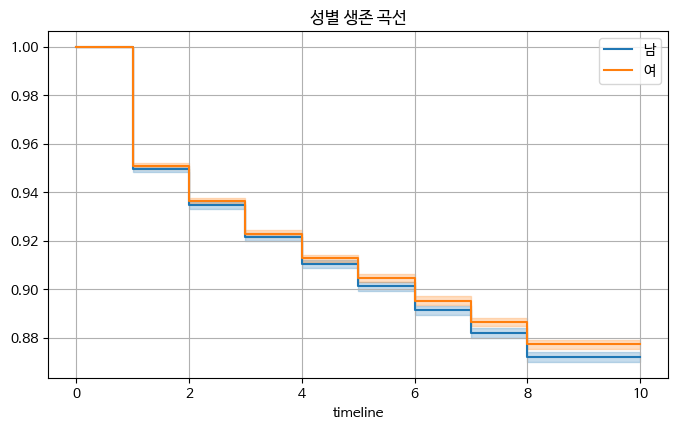

In [ ]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only '남' and '여'
df_filtered = df[df['character_gender'].isin(['남', '여'])]

plt.figure(figsize=(8, 4.5))
for label, group in df_filtered.groupby('character_gender'):
    kmf.fit(group['duration'], event_observed=group['event'], label=label)
    kmf.plot_survival_function()
plt.title('성별 생존 곡선')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 캐릭터 레벨을 기준으로 상위 50%와 하위 50% 분할
median_level = df['character_level'].median()
top_50_percent = df[df['character_level'] >= median_level].assign(level_group='상위 50%')
bottom_50_percent = df[df['character_level'] < median_level].assign(level_group='하위 50%')
level_df = pd.concat([top_50_percent, bottom_50_percent])

plt.figure(figsize=(8, 4.5))
for label, group in level_df.groupby('level_group'):
    kmf.fit(group['duration'], event_observed=group['event'], label=label)
    kmf.plot_survival_function()
plt.title('캐릭터 레벨 상위/하위 50% 생존 곡선')
plt.grid(True)
plt.show()

In [ ]:
df['guild_group'] = df['character_guild_name'].apply(lambda x: '있음' if pd.notna(x) else '없음')

plt.figure(figsize=(8, 4.5))
for label, group in df.groupby('guild_group'):
    kmf.fit(group['duration'], event_observed=group['event'], label=label)
    kmf.plot_survival_function()
plt.title('길드 유무 생존 곡선')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 날짜 형식을 datetime으로 변환
df['character_date_create'] = pd.to_datetime(df['character_date_create'], errors='coerce')

# 날짜의 중앙값(median)을 기준으로 상위 50%와 하위 50% 분할
median_date = df['character_date_create'].quantile(0.5)
df['create_group'] = df['character_date_create'].apply(
    lambda x: '최근 50%' if x >= median_date else '이전 50%'
)

plt.figure(figsize=(8, 4.5))
for label, group in df.groupby('create_group'):
    kmf.fit(group['duration'], event_observed=group['event'], label=label)
    kmf.plot_survival_function()
plt.title('캐릭터 생성 시기 상위/하위 50% 생존 곡선')
plt.grid(True)
plt.show()

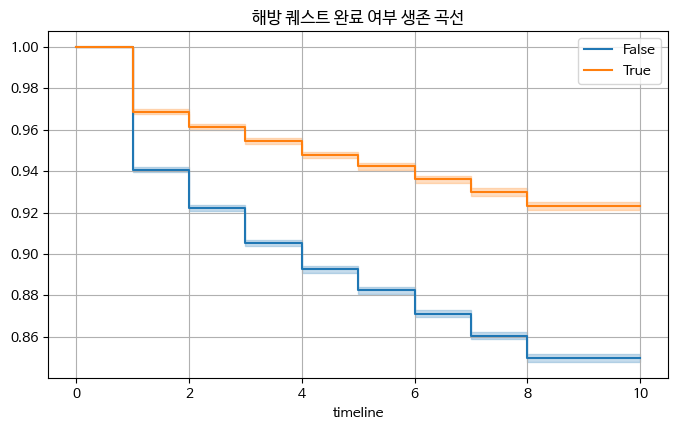

In [ ]:
df['liberation_quest_clear_flag'] = df['liberation_quest_clear_flag'].astype(bool)

plt.figure(figsize=(8, 4.5))
for label, group in df.groupby('liberation_quest_clear_flag'):
    kmf.fit(group['duration'], event_observed=group['event'], label=str(label))
    kmf.plot_survival_function()
plt.title('해방 퀘스트 완료 여부 생존 곡선')
plt.grid(True)
plt.show()

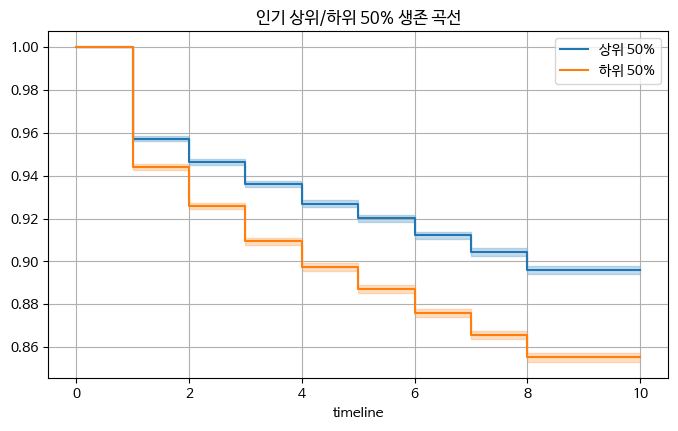

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 인기의 중앙값(median)을 기준으로 상위 50%와 하위 50% 분할
median_pop = df['popularity'].median()
top_50_percent = df[df['popularity'] >= median_pop].assign(pop_group='상위 50%')
bottom_50_percent = df[df['popularity'] < median_pop].assign(pop_group='하위 50%')
pop_df = pd.concat([top_50_percent, bottom_50_percent])

plt.figure(figsize=(8, 4.5))
for label, group in pop_df.groupby('pop_group'):
    kmf.fit(group['duration'], event_observed=group['event'], label=label)
    kmf.plot_survival_function()
plt.title('인기 상위/하위 50% 생존 곡선')
plt.grid(True)
plt.show()

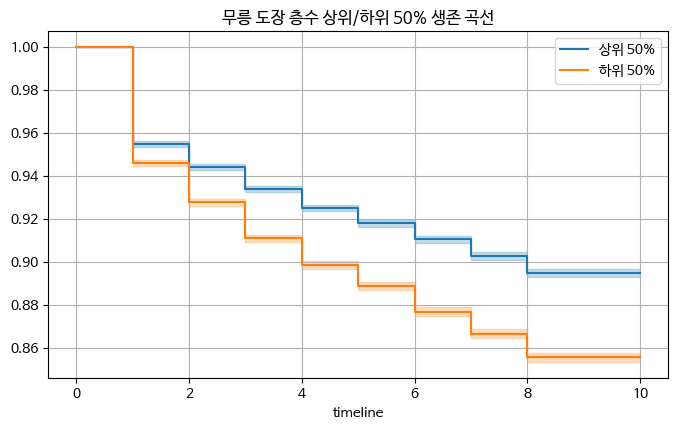

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 무릉 도장 최고 층수의 중앙값(median)을 기준으로 상위 50%와 하위 50% 분할
median_dojang = df['dojang_best_floor'].median()
top_50_percent = df[df['dojang_best_floor'] >= median_dojang].assign(dojang_group='상위 50%')
bottom_50_percent = df[df['dojang_best_floor'] < median_dojang].assign(dojang_group='하위 50%')
dojang_df = pd.concat([top_50_percent, bottom_50_percent])

plt.figure(figsize=(8, 4.5))
for label, group in dojang_df.groupby('dojang_group'):
    kmf.fit(group['duration'], event_observed=group['event'], label=label)
    kmf.plot_survival_function()
plt.title('무릉 도장 층수 상위/하위 50% 생존 곡선')
plt.grid(True)
plt.show()

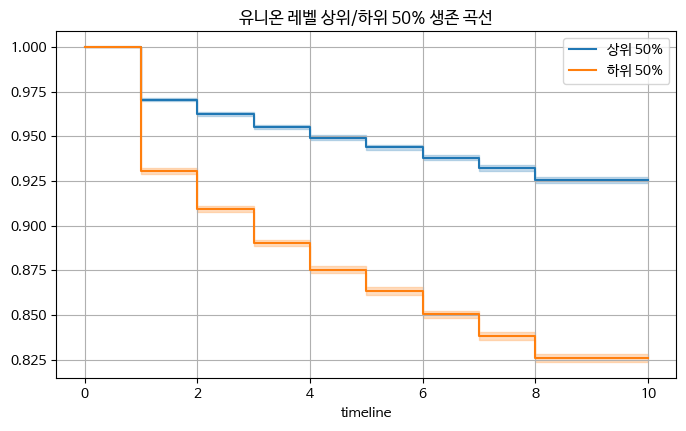

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 유니온 레벨의 중앙값(median)을 기준으로 상위 50%와 하위 50% 분할
median_union = df['union_level'].median()
top_50_percent = df[df['union_level'] >= median_union].assign(union_group='상위 50%')
bottom_50_percent = df[df['union_level'] < median_union].assign(union_group='하위 50%')
union_df = pd.concat([top_50_percent, bottom_50_percent])

plt.figure(figsize=(8, 4.5))
for label, group in union_df.groupby('union_group'):
    kmf.fit(group['duration'], event_observed=group['event'], label=label)
    kmf.plot_survival_function()
plt.title('유니온 레벨 상위/하위 50% 생존 곡선')
plt.grid(True)
plt.show()

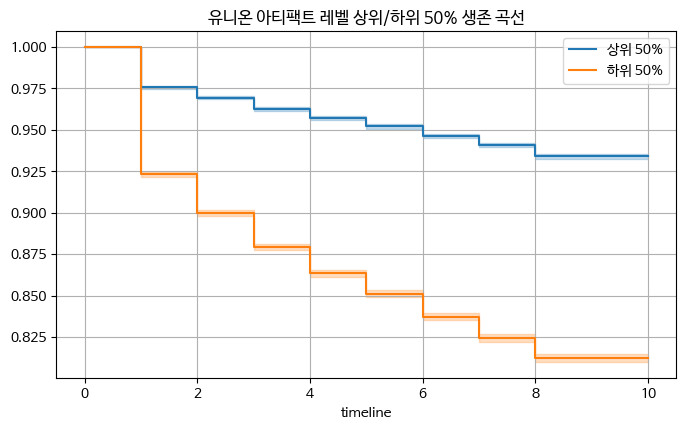

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 유니온 아티팩트 레벨의 중앙값(median)을 기준으로 상위 50%와 하위 50% 분할
median_artifact = df['union_artifact_level'].median()
top_50_percent = df[df['union_artifact_level'] >= median_artifact].assign(artifact_group='상위 50%')
bottom_50_percent = df[df['union_artifact_level'] < median_artifact].assign(artifact_group='하위 50%')
artifact_df = pd.concat([top_50_percent, bottom_50_percent])

plt.figure(figsize=(8, 4.5))
for label, group in artifact_df.groupby('artifact_group'):
    kmf.fit(group['duration'], event_observed=group['event'], label=label)
    kmf.plot_survival_function()
plt.title('유니온 아티팩트 레벨 상위/하위 50% 생존 곡선')
plt.grid(True)
plt.show()

# 병합하기 위한 과정

In [ ]:
import pandas as pd

df = pd.read_csv('dropped_users_with_nan.csv')
df.head()

ocid  ranking character_name  \
0                   315bde624cd11939bdbbabd4106fbe4f     5246             댜빤   
1  8c6eb8a7b48145a6c9ab4085c37208ecefe8d04e6d233b...     6404         이사온시골쥐   
2                   6f5a4f3369f373da79ba7b39c207e834     6418             자플   
3                   f587802da624bef47fd854e57e966a56     2820             의은   
4                   d37cb3d684b59f0b83d39f995ac976a8     1069            별규미   

  world_name character_gender character_class  character_class_level  \
0       스카니아                여      아크메이지(불,독)                    6.0   
1       엘리시움                남          듀얼블레이더                    6.0   
2         루나                남           나이트로드                    6.0   
3        크로아                남              아란                    6.0   
4         루나                여           데몬어벤져                    6.0   

   character_level  character_exp  character_exp_rate  ...      exp_1121  \
0            290.0   3.189407e+13              10.837  ...           NaN   
1            289.0   1.107874e+14              76.040  ...  1.367428e+14   
2            289.0   1.099837e+14              75.489  ...  1.912426e+13   
3            290.0   1.768668e+14              60.096  ...           NaN   
4            291.0   2.069927e+14              63.939  ...           NaN   

  access_1121      exp_1128  access_1128      exp_1205  access_1205  \
0         NaN           NaN          NaN           NaN          NaN   
1        True  1.798220e+12         True  6.653373e+12         True   
2        True  2.499299e+13         True  2.730143e+13         True   
3         NaN           NaN          NaN           NaN          NaN   
4         NaN           NaN          NaN  6.195852e+13         True   

       exp_1212  access_1212      exp_1219  access_1219  
0           NaN          NaN           NaN          NaN  
1  1.928771e+13         True  3.133522e+13         True  
2  2.962096e+13         True  3.603550e+13         True  
3           NaN          NaN  2.162018e+14         True  
4  9.241282e+13         True  1.183283e+14         True  

[5 rows x 46 columns]

In [ ]:
import pandas as pd
import requests
import time
from datetime import datetime
import json

# API settings
API_KEY = "live_7c722ec2c9a8caa439d1d5e724800530dfae682e967c62fa7604148902d3c23fefe8d04e6d233bd35cf2fabdeb93fb0d"
BASE_URL = "https://open.api.nexon.com/maplestory/v1/character/basic"
DATES = ["2024-10-24", "2024-10-31", "2024-11-07", "2024-11-14",
         "2024-11-21", "2024-11-28", "2024-12-05", "2024-12-12", "2024-12-19"]

# Desired columns
COLUMNS = [
    "ranking", "character_name", "world_name", "character_gender", "character_class",
    "character_class_level", "character_level", "character_exp", "character_exp_rate",
    "character_guild_name", "character_date_create", "access_flag",
    "liberation_quest_clear_flag", "popularity", "arcane_sum", "authentic_sum",
    "set_absorlab_count", "set_lubatiss_count", "set_arcane_count", "set_eternal_count",
    "dojang_best_floor", "union_level", "union_artifact_level", "union_artifact_exp",
    "union_artifact_point"
]

def fetch_character_data(ocid, date):
    headers = {"x-nxopen-api-key": API_KEY}
    params = {"ocid": ocid, "date": date}

    try:
        response = requests.get(BASE_URL, headers=headers, params=params)
        response.raise_for_status()
        data = response.json()

        # Extract relevant fields
        result = {col: data.get(col, None) for col in COLUMNS}
        result["ocid"] = ocid
        result["date"] = date
        return result
    except requests.RequestException as e:
        print(f"Error fetching data for ocid {ocid} on {date}: {e}")
        return None

def main():
    # Read CSV
    df = pd.read_csv("dropped_users_with_nan.csv")
    ocids = df["ocid"].unique()

    results = []

    # Process each ocid and date
    for ocid in ocids:
        for date in DATES:
            print(f"Fetching data for ocid {ocid} on {date}")
            data = fetch_character_data(ocid, date)
            if data:
                results.append(data)
            time.sleep(1)  # Rate limiting

    # Create DataFrame and save
    result_df = pd.DataFrame(results)
    result_df.to_csv("nexon_character_data.csv", index=False, encoding="utf-8")
    print("Data saved to nexon_character_data.csv")

if __name__ == "__main__":
    main()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Fetching data for ocid f562b51c6531b040bcf5d5b861523155efe8d04e6d233bd35cf2fabdeb93fb0d on 2024-11-28
Fetching data for ocid f562b51c6531b040bcf5d5b861523155efe8d04e6d233bd35cf2fabdeb93fb0d on 2024-12-05
Fetching data for ocid f562b51c6531b040bcf5d5b861523155efe8d04e6d233bd35cf2fabdeb93fb0d on 2024-12-12
Fetching data for ocid f562b51c6531b040bcf5d5b861523155efe8d04e6d233bd35cf2fabdeb93fb0d on 2024-12-19
Fetching data for ocid 2238569bb3f8b01d011befb5069669c6 on 2024-10-24
Fetching data for ocid 2238569bb3f8b01d011befb5069669c6 on 2024-10-31
Fetching data for ocid 2238569bb3f8b01d011befb5069669c6 on 2024-11-07
Fetching data for ocid 2238569bb3f8b01d011befb5069669c6 on 2024-11-14
Fetching data for ocid 2238569bb3f8b01d011befb5069669c6 on 2024-11-21
Fetching data for ocid 2238569bb3f8b01d011befb5069669c6 on 2024-11-28
Fetching data for ocid 2238569bb3f8b01d011befb5069669c6 on 2024-12-05
Fetching data for ocid 2238569bb3f8b01d011befb5069669c6 on 2024-12

In [ ]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv("/content/filled_exp_access_by_date.csv")

# 각 컬럼별 결측치(NaN) 개수 확인
print(df.isna().sum())

ocid                             0
ranking                          0
character_name                   0
world_name                       0
character_gender                 0
character_class                  0
character_class_level            0
character_level                  0
character_exp                    0
character_exp_rate               0
character_guild_name           240
character_date_create           22
access_flag                      0
liberation_quest_clear_flag      0
popularity                       0
arcane_sum                       0
authentic_sum                    0
set_absorlab_count               0
set_lubatiss_count               0
set_arcane_count                 0
set_eternal_count                0
dojang_best_floor                0
union_level                      0
union_artifact_level             3
union_artifact_exp               3
union_artifact_point             3
exp_1017                         0
access_1017                      0
exp_1024            

In [ ]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv("/content/filled_exp_access_by_date.csv")

# 결측치가 있는 컬럼만 선택
missing_columns = [
    "exp_1024", "exp_1031", "exp_1107", "exp_1114",
    "exp_1121", "exp_1128", "exp_1205", "exp_1212", "exp_1219"
]

# 결측치가 있는 행 필터링
missing_rows = df[df[missing_columns].isna().any(axis=1)]

# 결과 출력
print("결측치가 있는 행:")
print(missing_rows)

결측치가 있는 행:
                                                  ocid  ranking  \
323  69ac447d6be31b8714d26af0e6f903abefe8d04e6d233b...   110144   
542                   9024e79c09fefe51fcc407bc2dd975b8   185851   

    character_name world_name character_gender character_class  \
323          키작은검사         루나                여             히어로   
542          숲족클로에        오로라                남           다크나이트   

     character_class_level  character_level  character_exp  \
323                    6.0            280.0   7.230053e+12   
542                    6.0            275.0   9.659141e+12   

     character_exp_rate  ... exp_1121 access_1121      exp_1128  access_1128  \
323              21.488  ...      NaN       False  1.719045e+13         True   
542              84.900  ...      NaN       False           NaN        False   

         exp_1205  access_1205      exp_1212  access_1212      exp_1219  \
323  1.990357e+13         True  1.990403e+13         True  1.990403e+13   
542       

# 최종 데이터셋

In [ ]:
from google.colab import drive
import pandas as pd

# Google Drive 마운트
drive.mount('/content/drive')

# 파일 경로
file_path = '/content/drive/MyDrive/데이터톤_메이플/캐릭터 레벨 기준/final_data.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 상위 5개 행 출력
df.head()

Mounted at /content/drive


ocid  ranking character_name  \
0                   4909d2b63165a45a284d0dae4478885d     3543             꾸망   
1  356360924b8c044e58eaaf862766c8daefe8d04e6d233b...     8190         아란마하콤보   
2                   f7aaaa3ae22c47720c70cac37d7574e0     6406           에피파니   
3                   987bfae423b5a6d217bc75116042200c     1144             날개   
4                   dc3038c85c41146a9537a3f7c11369a7     6192             사클   

  world_name character_gender character_class  character_class_level  \
0       스카니아                여      아크메이지(썬,콜)                    6.0   
1       엘리시움                남              아란                    6.0   
2       스카니아                남          듀얼블레이더                    6.0   
3        크로아                남           나이트로드                    6.0   
4       스카니아                여          윈드브레이커                    6.0   

   character_level  character_exp  character_exp_rate  ...      exp_1121  \
0            290.0   1.196775e+14              40.664  ...  1.838768e+14   
1            289.0   1.157394e+13               7.944  ...  9.034090e+13   
2            289.0   1.084834e+14              74.459  ...  1.084834e+14   
3            291.0   1.757344e+14              54.283  ...  1.810496e+14   
4            289.0   1.232270e+14              84.578  ...  4.022190e+13   

  access_1121      exp_1128  access_1128      exp_1205  access_1205  \
0        True  1.949676e+14         True  2.083222e+14         True   
1        True  1.001264e+14         True  1.118004e+14         True   
2        True  1.084834e+14         True  1.084834e+14         True   
3        True  1.829576e+14         True  1.866439e+14         True   
4        True  5.312509e+13         True  6.981151e+13         True   

       exp_1212  access_1212      exp_1219  access_1219  
0  2.271357e+14         True  2.485139e+14         True  
1  1.266042e+14         True  1.111949e+12         True  
2  1.084834e+14         True  1.084834e+14         True  
3  1.901517e+14         True  1.935241e+14         True  
4  8.651882e+13         True  1.046054e+14         True  

[5 rows x 46 columns]

In [ ]:
# 전체 행 수 출력
print("전체 행 수:", len(df))

# 열별 결측치 개수 출력
print("\n열별 결측치 개수:")
print(df.isnull().sum())

전체 행 수: 222937

열별 결측치 개수:
ocid                               0
ranking                            0
character_name                     0
world_name                         0
character_gender                   0
character_class                    0
character_class_level              0
character_level                    0
character_exp                      0
character_exp_rate                 0
character_guild_name           16829
character_date_create              0
access_flag                        0
liberation_quest_clear_flag        0
popularity                         0
arcane_sum                         0
authentic_sum                      0
set_absorlab_count                 0
set_lubatiss_count                 0
set_arcane_count                   0
set_eternal_count                  0
dojang_best_floor                  1
union_level                        0
union_artifact_level               0
union_artifact_exp                 0
union_artifact_point               0
exp_1017   

In [ ]:
# character_date_create를 datetime으로 변환 (시간대 제거)
df['character_date_create'] = pd.to_datetime(df['character_date_create']).dt.tz_localize(None)

# 2024-10-17 이전 생성 캐릭터 필터링
cutoff_date = pd.to_datetime('2024-10-17')

# 좌축중도절단 데이터 필터링
left_censored = df[df['character_date_create'] < cutoff_date]

# 결과 출력
total_users = len(df)
censored_users = len(left_censored)
censored_ratio = censored_users / total_users * 100

print(f"전체 유저 수: {total_users}")
print(f"2024-10-17 이전 생성 유저 수: {censored_users}")
print(f"좌축중도절단 비율: {censored_ratio:.2f}%")

# 상위 5개 샘플 출력
if not left_censored.empty:
    print("\n좌축중도절단 유저 샘플:")
    print(left_censored[['ocid', 'character_name', 'character_date_create']].head())
else:
    print("좌축중도절단 유저가 없습니다.")

전체 유저 수: 222937
2024-10-17 이전 생성 유저 수: 222937
좌축중도절단 비율: 100.00%

좌축중도절단 유저 샘플:
                                                ocid character_name  \
0                   4909d2b63165a45a284d0dae4478885d             꾸망   
1  356360924b8c044e58eaaf862766c8daefe8d04e6d233b...         아란마하콤보   
2                   f7aaaa3ae22c47720c70cac37d7574e0           에피파니   
3                   987bfae423b5a6d217bc75116042200c             날개   
4                   dc3038c85c41146a9537a3f7c11369a7             사클   

  character_date_create  
0            2019-12-19  
1            2016-07-10  
2            2020-11-25  
3            2018-02-04  
4            2022-07-25  


# 10월 10일 데이터

In [ ]:
!pip install aiohttp
from google.colab import drive
import pandas as pd
import aiohttp
import asyncio
import time
import os

# Google Drive 마운트
drive.mount('/content/drive')

# 파일 경로
file_path = '/content/drive/MyDrive/데이터톤_메이플/캐릭터 레벨 기준/날짜별 모음/character_level_2024-10-17.csv'

# CSV 파일 읽기 및 ocid 추출
df = pd.read_csv(file_path)
ocids = df["ocid"].unique()
print(f"추출된 ocid 수: {len(ocids)}")

# 테스트용 소규모 데이터 (필요 시 주석 해제)
# ocids = ocids[:100]  # 100개로 테스트
# print(f"테스트용 ocid 수: {len(ocids)}")

# API 설정
API_KEY = "live_7c722ec2c9a8caa439d1d5e724800530dfae682e967c62fa7604148902d3c23fefe8d04e6d233bd35cf2fabdeb93fb0d"
BASE_URL = "https://open.api.nexon.com/maplestory/v1/character/basic"
DATES = ["2024-10-10"]  # 2024-10-10만 수집

# 원하는 컬럼
COLUMNS = ["character_exp", "character_name"]

async def fetch_character_data(session, ocid, date):
    headers = {"x-nxopen-api-key": API_KEY}
    params = {"ocid": ocid, "date": date}
    try:
        async with session.get(BASE_URL, headers=headers, params=params) as response:
            response.raise_for_status()
            data = await response.json()
            result = {col: data.get(col, None) for col in COLUMNS}
            result["ocid"] = ocid
            result["date"] = date
            return result
    except Exception as e:
        print(f"ocid {ocid}의 {date} 데이터 가져오기 오류: {e}")
        return None

async def process_batch(session, ocids, dates, batch_size=10, wait_time=0.3):
    results = []
    output_path = "/content/exp_name_1010.csv"

    # 기존 결과 파일이 있으면 불러오기
    if os.path.exists(output_path):
        existing_df = pd.read_csv(output_path)
        results = existing_df.to_dict('records')
        processed_ocids = set(existing_df['ocid'])
        print(f"기존 데이터 불러옴: {len(results)} 개")
    else:
        processed_ocids = set()

    # 처리할 ocid 필터링 (이미 처리된 ocid 제외)
    remaining_ocids = [ocid for ocid in ocids if ocid not in processed_ocids]
    print(f"남은 ocid 수: {len(remaining_ocids)}")

    for i in range(0, len(remaining_ocids), batch_size):
        batch = remaining_ocids[i:i + batch_size]
        tasks = [fetch_character_data(session, ocid, dates[0]) for ocid in batch]
        batch_results = await asyncio.gather(*tasks, return_exceptions=True)
        batch_results = [r for r in batch_results if r is not None]
        results.extend(batch_results)

        # 중간 저장
        pd.DataFrame(results).to_csv(output_path, index=False, encoding="utf-8")
        print(f"처리된 ocid 수: {len(results)}, 저장됨: {output_path}")

        # 진행 상황 출력
        elapsed_time = (i + batch_size) / batch_size * wait_time / 60  # 분 단위
        remaining_time = (len(remaining_ocids) - (i + batch_size)) / batch_size * wait_time / 60
        print(f"경과 시간: {elapsed_time:.2f}분, 남은 시간: {remaining_time:.2f}분")

        time.sleep(wait_time)  # 배치 간 대기

    return results

async def main():
    results = []
    async with aiohttp.ClientSession() as session:
        results = await process_batch(session, ocids, DATES, batch_size=10, wait_time=0.3)

    # 결과를 데이터프레임으로 변환
    result_df = pd.DataFrame(results)

    # 결과 출력
    if not result_df.empty:
        print("2024-10-10 데이터 (상위 5개):")
        print(result_df.head())

    # 최종 저장
    output_path = "/content/exp_name_1010.csv"
    result_df.to_csv(output_path, index=False, encoding="utf-8")
    print(f"최종 데이터 저장: {output_path}")

# 코랩에서 실행
await main()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
처리된 ocid 수: 230272, 저장됨: /content/exp_name_1010.csv
경과 시간: 80.18분, 남은 시간: 178.20분
처리된 ocid 수: 230282, 저장됨: /content/exp_name_1010.csv
경과 시간: 80.19분, 남은 시간: 178.19분
처리된 ocid 수: 230292, 저장됨: /content/exp_name_1010.csv
경과 시간: 80.19분, 남은 시간: 178.19분
처리된 ocid 수: 230302, 저장됨: /content/exp_name_1010.csv
경과 시간: 80.20분, 남은 시간: 178.18분
처리된 ocid 수: 230312, 저장됨: /content/exp_name_1010.csv
경과 시간: 80.20분, 남은 시간: 178.18분
처리된 ocid 수: 230322, 저장됨: /content/exp_name_1010.csv
경과 시간: 80.21분, 남은 시간: 178.17분
처리된 ocid 수: 230332, 저장됨: /content/exp_name_1010.csv
경과 시간: 80.21분, 남은 시간: 178.17분
처리된 ocid 수: 230342, 저장됨: /content/exp_name_1010.csv
경과 시간: 80.22분, 남은 시간: 178.16분
처리된 ocid 수: 230352, 저장됨: /content/exp_name_1010.csv
경과 시간: 80.22분, 남은 시간: 178.16분
처리된 ocid 수: 230362, 저장됨: /content/exp_name_1010.csv
경과 시간: 80.23분, 남은 시간: 178.15분
처리된 ocid 수: 230372, 저장됨: /content/exp_name_1010.csv
경과 시간: 80.23분, 남은 시간: 178.15분
처리된 ocid 수: 230382, 저장됨: /content/exp_name_1010.csv
경과 시간: 80.

CancelledError: 

# 최종 데이터셋

In [ ]:
# 라이브러리 불러오기
from google.colab import drive
import pandas as pd

# Google Drive 마운트
drive.mount('/content/drive')

# 파일 경로
file_path = '/content/drive/MyDrive/데이터톤_메이플/캐릭터 레벨 기준/병합하기 위한 과정/filtered_oct10_result.csv'

# CSV 파일 불러오기
df = pd.read_csv(file_path)

# 결측치 확인
print(df.isna().sum())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ocid                               0
ranking                            0
character_name                     0
world_name                         0
character_gender                 629
character_class                  629
character_class_level            629
character_level                  629
character_exp                    629
character_exp_rate               629
character_guild_name           49484
character_date_create          24604
access_flag                      629
liberation_quest_clear_flag      629
popularity                       631
arcane_sum                         1
authentic_sum                      1
set_absorlab_count                 0
set_lubatiss_count                 0
set_arcane_count                   0
set_eternal_count                  0
dojang_best_floor                629
union_level                      633
union_artifact_level

In [ ]:
# 라이브러리 불러오기
from google.colab import drive
import pandas as pd

# Google Drive 마운트
drive.mount('/content/drive')

# 파일 경로
file_path = '/content/drive/MyDrive/데이터톤_메이플/캐릭터 레벨 기준/병합하기 위한 과정/filtered_oct10_result.csv'

# CSV 파일 불러오기
df = pd.read_csv(file_path)

# character_exp 열이 결측치인 행만 추출
missing_exp_df = df[df['character_exp'].isna()]

# 코랩 로컬 환경에 저장
missing_exp_df.to_csv('/content/missing_character_exp.csv', index=False)

Mounted at /content/drive


In [ ]:
import pandas as pd
import requests
import time
from tqdm.notebook import tqdm  # Google Colab에서 잘 작동하는 tqdm 버전

# 파일에서 ocid 불러오기
df = pd.read_csv('/content/missing_character_exp.csv')
ocid_list = df['ocid'].dropna().tolist()

# API 키 설정
API_KEY = 'live_7c722ec2c9a8caa439d1d5e724800530c877ba6c5997cb8474cc2dc7be631088efe8d04e6d233bd35cf2fabdeb93fb0d'
headers = {
    'x-nxopen-api-key': API_KEY
}

# 조회 날짜
target_date = '2024-10-10'

# 결과 저장용 리스트
result = []

# tqdm으로 진행 상황 출력
for ocid in tqdm(ocid_list, desc="캐릭터 정보 수집 진행중"):
    url = f'https://open.api.nexon.com/maplestory/v1/character/basic?ocid={ocid}&date={target_date}'
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        data = response.json()
        data['ocid'] = ocid
        result.append(data)
    else:
        print(f"[{ocid}] 호출 실패: {response.status_code}")

    time.sleep(0.5)  # 과도한 호출 방지

# 결과 저장
df_result = pd.DataFrame(result)
df_result.to_csv('/content/character_basic_info_result.csv', index=False)

print("✅ 완료! '/content/character_basic_info_result.csv'에 저장했습니다.")

캐릭터 정보 수집 진행중:   0%|          | 0/629 [00:00<?, ?it/s]

✅ 완료! '/content/character_basic_info_result.csv'에 저장했습니다.


In [ ]:
# 라이브러리 불러오기
from google.colab import drive
import pandas as pd

# Google Drive 마운트
drive.mount('/content/drive')

# 파일 경로
file_path = '/content/drive/MyDrive/데이터톤_메이플/캐릭터 레벨 기준/병합하기 위한 과정/final_data_unchanged_only_with_exp1010.csv'

# CSV 파일 불러오기
df = pd.read_csv(file_path)

# 결측치 개수 출력
print(df.isna().sum())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ocid                              0
exp_1010                          0
ranking                           0
character_name                    0
world_name                        0
character_gender                  0
character_class                   0
character_class_level             0
character_level                   0
character_exp                     0
character_exp_rate                0
character_guild_name           4026
character_date_create             0
access_flag                       0
liberation_quest_clear_flag       0
popularity                        0
arcane_sum                        0
authentic_sum                     0
set_absorlab_count                0
set_lubatiss_count                0
set_arcane_count                  0
set_eternal_count                 0
dojang_best_floor                 0
union_level                       0
union_a

In [ ]:
# 라이브러리 불러오기
from google.colab import drive
import pandas as pd

# Google Drive 마운트
drive.mount('/content/drive')

# 파일 경로
file_path = '/content/drive/MyDrive/데이터톤_메이플/캐릭터 레벨 기준/병합하기 위한 과정/final_data_changed_only.csv'

# CSV 파일 불러오기
df = pd.read_csv(file_path)

# 결측치 개수 출력
print(df.isna().sum())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ocid                               0
exp_1010                         651
ranking                            0
character_name                     0
world_name                         0
character_gender                   0
character_class                    0
character_class_level              0
character_level                    0
character_exp                      0
character_exp_rate                 0
character_guild_name           12803
character_date_create              0
access_flag                        0
liberation_quest_clear_flag        0
popularity                         0
arcane_sum                         0
authentic_sum                      0
set_absorlab_count                 0
set_lubatiss_count                 0
set_arcane_count                   0
set_eternal_count                  0
dojang_best_floor                  1
union_level         

In [ ]:
import pandas as pd
import requests
import time
from tqdm.notebook import tqdm
from google.colab import drive

# 드라이브 마운트
drive.mount('/content/drive')

# 파일 경로
file_path = '/content/drive/MyDrive/데이터톤_메이플/캐릭터 레벨 기준/병합하기 위한 과정/final_data_changed_only.csv'

# 데이터 불러오기
df = pd.read_csv(file_path)

# 결측치인 ocid 필터링
missing_df = df[df['exp_1010'].isna() & df['ocid'].notna()]
ocid_list = missing_df['ocid'].tolist()

# API 키
API_KEY = 'live_7c722ec2c9a8caa439d1d5e724800530c877ba6c5997cb8474cc2dc7be631088efe8d04e6d233bd35cf2fabdeb93fb0d'
headers = {'x-nxopen-api-key': API_KEY}

# 조회 날짜
target_date = '2024-10-10'

# 결과 저장 리스트
result = []

# tqdm으로 진행률 확인
for ocid in tqdm(ocid_list, desc="exp_1010 결측치 캐릭터 조회 중"):
    url = f'https://open.api.nexon.com/maplestory/v1/character/basic?ocid={ocid}&date={target_date}'
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        data = response.json()
        data['ocid'] = ocid
        result.append(data)
    else:
        print(f"[{ocid}] 호출 실패: {response.status_code}")

    time.sleep(0.5)  # 호출 제한 고려

# 데이터프레임 변환
df_result = pd.DataFrame(result)

# 저장
output_path = '/content/exp1010_missing_characters_info.csv'
df_result.to_csv(output_path, index=False)

print(f"✅ 완료! 결과 파일 저장됨: {output_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


exp_1010 결측치 캐릭터 조회 중:   0%|          | 0/651 [00:00<?, ?it/s]

[9fc1c36560ee95ca7bf16597d30a788a] 호출 실패: 400
[390b99701bf3eaa02dbff576ff65f348fd842dab14be2a956555625b37c97bff] 호출 실패: 400
✅ 완료! 결과 파일 저장됨: /content/exp1010_missing_characters_info.csv


final_data_changed_only.csv에 null인 행을 다시 api로 검색해도 null로 나옴

-> 제거해야하지 않나...

In [ ]:
# 라이브러리 불러오기
from google.colab import drive
import pandas as pd

# Google Drive 마운트
drive.mount('/content/drive')

# 파일 경로
file_path = '/content/drive/MyDrive/데이터톤_메이플/캐릭터 레벨 기준/final_clean_1010~1017.csv'

# CSV 파일 불러오기
df = pd.read_csv(file_path)

# 결측치 개수 출력
print(df.isna().sum())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ocid                               0
exp_1010                           0
ranking                            0
character_name                     0
world_name                         0
character_gender                   0
character_class                    0
character_class_level              0
character_level                    0
character_exp                      0
character_exp_rate                 0
character_guild_name           12508
character_date_create              0
access_flag                        0
liberation_quest_clear_flag        0
popularity                         0
arcane_sum                         0
authentic_sum                      0
set_absorlab_count                 0
set_lubatiss_count                 0
set_arcane_count                   0
set_eternal_count                  0
dojang_best_floor                  0
union_level         

In [ ]:
# CSV 파일 불러오기
df = pd.read_csv(file_path)

# 상위 5개 행 출력
print(df.head())

                                                ocid      exp_1010  ranking  \
0                   9f2a7c989c75c52e7e1bc60eee5438af  1.274985e+14     8102   
1                   987bfae423b5a6d217bc75116042200c  1.737540e+14     1144   
2                   cb09457a4e39987f40ace09cb7e55a59  1.273280e+14     8195   
3  356360924b8c044e58eaaf862766c8daefe8d04e6d233b...  1.287341e+14     8190   
4  ca8e67ee1b2e46e7204889ad8a1785c4efe8d04e6d233b...  1.122213e+14     3405   

  character_name world_name character_gender character_class  \
0             쪼꿉        크로아                여              은월   
1             날개        크로아                남           나이트로드   
2          윈v주환v        오로라                남          윈드브레이커   
3         아란마하콤보       엘리시움                남              아란   
4             떡별         루나                남              비숍   

   character_class_level  character_level  character_exp  ...      exp_1121  \
0                    6.0            289.0   1.849991e+13  ...

In [ ]:
print([col for col in df.columns if col.startswith("exp_")])
print(len([col for col in df.columns if col.startswith("exp_")]))

['exp_1010', 'exp_1017', 'exp_1024', 'exp_1031', 'exp_1107', 'exp_1114', 'exp_1121', 'exp_1128', 'exp_1205', 'exp_1212', 'exp_1219']
11


In [ ]:
import pandas as pd

# 1. 경험치 변화량 기준 정체 주차 체크 함수
def get_exp_stagnant_weeks(exp_vals):
    stagnant_weeks = []
    for i in range(1, len(exp_vals)):
        if exp_vals[i] == exp_vals[i-1]:
            stagnant_weeks.append(i)
    return stagnant_weeks

# 2. 최초 이탈 조건 판단 함수
def check_initial_churn(exp_vals):
    for i in range(len(exp_vals) - 2):
        if exp_vals[i] == exp_vals[i+1] == exp_vals[i+2]:
            if all(x == exp_vals[i] for x in exp_vals[i+2:]):
                return True, i+1  # 최초 이탈 시작 주차 반환
    return False, None

# 3. 복귀 후 재이탈 조건 판단 함수
def check_returned_churn(exp_vals):
    i = 0
    while i < len(exp_vals) - 1:
        if exp_vals[i] == exp_vals[i+1]:
            stagnant_start = i
            while i+1 < len(exp_vals) and exp_vals[i] == exp_vals[i+1]:
                i += 1
            stagnant_end = i

            # 이후 exp가 증가했다면 복귀 간주
            if any(exp_vals[j] > exp_vals[stagnant_end] for j in range(stagnant_end+1, len(exp_vals))):
                for k in range(stagnant_end+1, len(exp_vals)-2):
                    if exp_vals[k] == exp_vals[k+1] == exp_vals[k+2]:
                        if all(x == exp_vals[k] for x in exp_vals[k+2:]):
                            return True, k+1  # 복귀 후 재이탈 시점
        i += 1
    return False, None

# 4. duration + event 판단 통합 함수 (exp_1010 제거)
def define_event_and_duration(row):
    exp_cols = [col for col in row.index if col.startswith("exp_") and col != "exp_1010"]
    exp_vals = row[exp_cols].tolist()

    # 최초 이탈
    initial_churn, churn_week = check_initial_churn(exp_vals)
    if initial_churn:
        return pd.Series({'event': 1, 'duration': churn_week + 1})

    # 복귀 후 재이탈
    returned_churn, churn_week = check_returned_churn(exp_vals)
    if returned_churn:
        return pd.Series({'event': 1, 'duration': churn_week + 1})

    # 생존자 처리
    return pd.Series({'event': 0, 'duration': len(exp_vals)})

# 적용
event_duration_df = df.apply(define_event_and_duration, axis=1)
df["event"] = event_duration_df["event"]
df["duration"] = event_duration_df["duration"]

# Colab 로컬 저장
save_path = "/content/survival_dataset_final(5).csv"
df.to_csv(save_path, index=False)
print(f"event 및 duration 계산 완료. 파일 저장 위치: {save_path}")

event 및 duration 계산 완료. 파일 저장 위치: /content/survival_dataset_final(5).csv


In [ ]:
import pandas as pd

# 저장된 CSV 파일 불러오기
df = pd.read_csv('/content/survival_dataset_final(5).csv')

# 전체 행 수
total_rows = len(df)

# event == 1 인 행 수
event_1_rows = (df['event'] == 1).sum()

print(f"전체 행 수: {total_rows}")
print(f"event == 1인 행 수: {event_1_rows}")

전체 행 수: 209340
event == 1인 행 수: 20794


In [ ]:
import pandas as pd

# 파일 경로에 맞게 수정해 주세요
file_path = "/content/survival_dataset_final(5).csv"

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 결측치 개수 확인
print(df.isna().sum())

ocid                               0
exp_1010                           0
ranking                            0
character_name                     0
world_name                         0
character_gender                   0
character_class                    0
character_class_level              0
character_level                    0
character_exp                      0
character_exp_rate                 0
character_guild_name           12508
character_date_create              0
access_flag                        0
liberation_quest_clear_flag        0
popularity                         0
arcane_sum                         0
authentic_sum                      0
set_absorlab_count                 0
set_lubatiss_count                 0
set_arcane_count                   0
set_eternal_count                  0
dojang_best_floor                  0
union_level                        0
union_artifact_level               0
union_artifact_exp                 0
union_artifact_point               0
e

In [ ]:
import pandas as pd

# 원본 파일 경로
file_path = "/content/survival_dataset_final(5).csv"

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 결측치 '미가입'으로 대체
df["character_guild_name"] = df["character_guild_name"].fillna("미가입")

# 새로운 파일로 저장
new_file_path = "/content/character_level_fill.csv"
df.to_csv(new_file_path, index=False)

print(f"결측치 처리 완료. 저장된 파일 경로: {new_file_path}")

결측치 처리 완료. 저장된 파일 경로: /content/character_level_fill.csv


# EDA 및 시각화

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 시각화 시 한글 깨짐 방지 위한 폰트 설치 및 적용

%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [ ]:
import pandas as pd

# 파일 경로에 맞게 수정해 주세요
file_path = "/content/character_level_fill.csv"

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 결측치 개수 확인
print(df.isna().sum())

ocid                           0
exp_1010                       0
ranking                        0
character_name                 0
world_name                     0
character_gender               0
character_class                0
character_class_level          0
character_level                0
character_exp                  0
character_exp_rate             0
character_guild_name           0
character_date_create          0
access_flag                    0
liberation_quest_clear_flag    0
popularity                     0
arcane_sum                     0
authentic_sum                  0
set_absorlab_count             0
set_lubatiss_count             0
set_arcane_count               0
set_eternal_count              0
dojang_best_floor              0
union_level                    0
union_artifact_level           0
union_artifact_exp             0
union_artifact_point           0
exp_1017                       0
access_1017                    0
exp_1024                       0
access_102

<ipython-input-4-51aee1696ac9>:7: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [ ]:
# CSV 파일 읽기
df = pd.read_csv(file_path)

# 상위 5개 행 출력
print(df.head())

                                                ocid      exp_1010  ranking  \
0                   9f2a7c989c75c52e7e1bc60eee5438af  1.274985e+14     8102   
1                   987bfae423b5a6d217bc75116042200c  1.737540e+14     1144   
2                   cb09457a4e39987f40ace09cb7e55a59  1.273280e+14     8195   
3  356360924b8c044e58eaaf862766c8daefe8d04e6d233b...  1.287341e+14     8190   
4  ca8e67ee1b2e46e7204889ad8a1785c4efe8d04e6d233b...  1.122213e+14     3405   

  character_name world_name character_gender character_class  \
0             쪼꿉        크로아                여              은월   
1             날개        크로아                남           나이트로드   
2          윈v주환v        오로라                남          윈드브레이커   
3         아란마하콤보       엘리시움                남              아란   
4             떡별         루나                남              비숍   

   character_class_level  character_level  character_exp  ...      exp_1128  \
0                    6.0            289.0   1.849991e+13  ...

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# 이탈유저: 빨간색
sns.lineplot(data=churned, x='character_level', y='character_exp', label='이탈유저', color='#E57373', ci=None)

# 활동유저: 파란색
sns.lineplot(data=active, x='character_level', y='character_exp', label='활동유저', color='#6497B1', ci=None)

plt.title('시간에 따른 경험치량 (character_exp) 비교')
plt.xlabel('캐릭터 레벨')
plt.ylabel('캐릭터 경험치량')
plt.legend()
plt.show()

<ipython-input-19-1cafc4b5ee51>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=churned, x='character_level', y='character_exp', label='이탈유저', color='#E57373', ci=None)
<ipython-input-19-1cafc4b5ee51>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=active, x='character_level', y='character_exp', label='활동유저', color='#6497B1', ci=None)


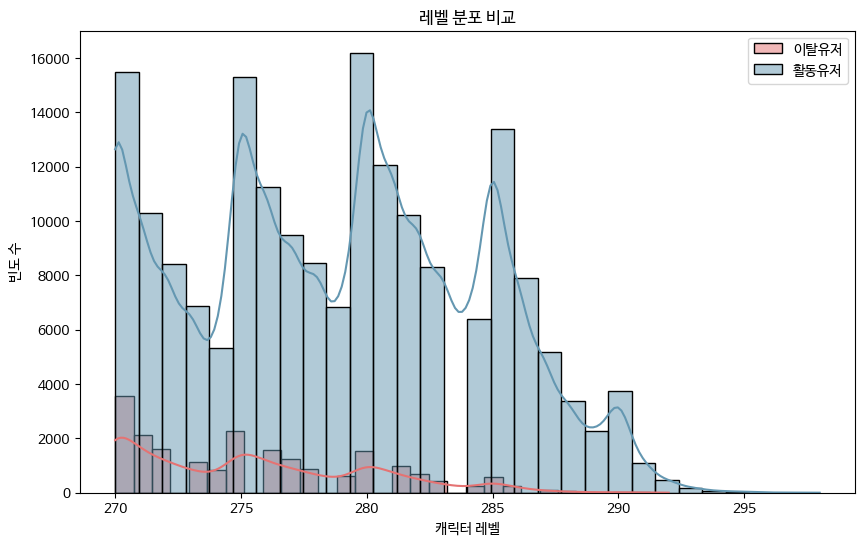

In [ ]:
plt.figure(figsize=(10, 6))

# 이탈유저: 빨간색
sns.histplot(churned['character_level'], color='#E57373', kde=True, label='이탈유저', bins=30)

# 활동유저: 파란색
sns.histplot(active['character_level'], color='#6497B1', kde=True, label='활동유저', bins=30)

plt.title('레벨 분포 비교')
plt.xlabel('캐릭터 레벨')
plt.ylabel('빈도 수')
plt.legend()
plt.show()

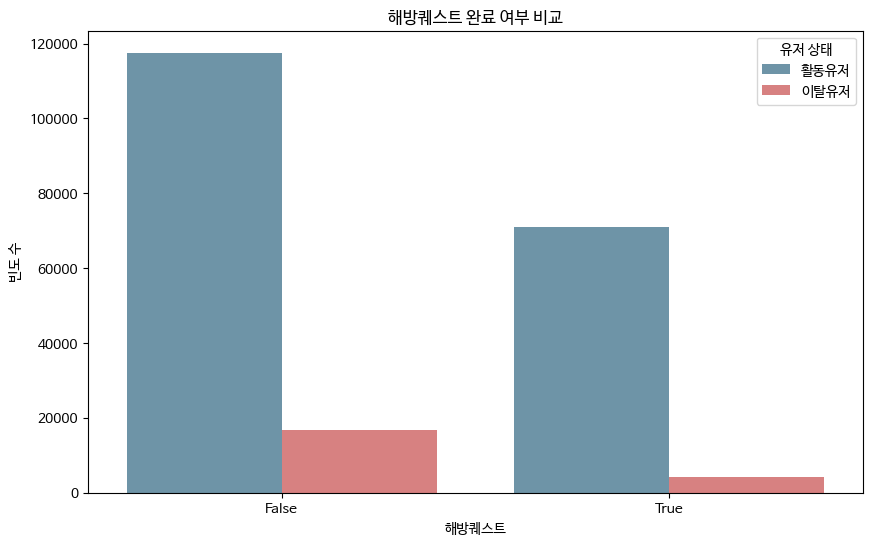

In [ ]:
# 3. 해방퀘스트 완료 여부 분포 비교
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='liberation_quest_clear_flag', hue='event', palette=['#6497B1', '#E57373'])

plt.title('해방퀘스트 완료 여부 비교')
plt.xlabel('해방퀘스트')
plt.ylabel('빈도 수')
plt.legend(title='유저 상태', labels=['활동유저', '이탈유저'])
plt.show()

<ipython-input-23-20b6f9b5f665>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='event', y='union_level', palette=['#6497B1', '#E57373'])


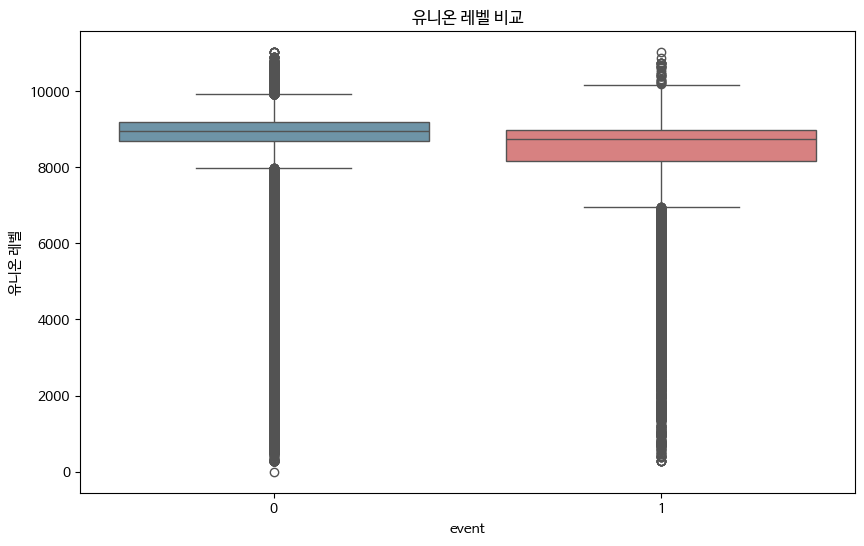

In [ ]:
# 6. union_level 비교
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='event', y='union_level', palette=['#6497B1', '#E57373'])
plt.title('유니온 레벨 비교')
plt.xlabel('event')
plt.ylabel('유니온 레벨')
plt.show()

<ipython-input-25-f4367bb0a7b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='event', y='union_artifact_level', palette=['#6497B1', '#E57373'])


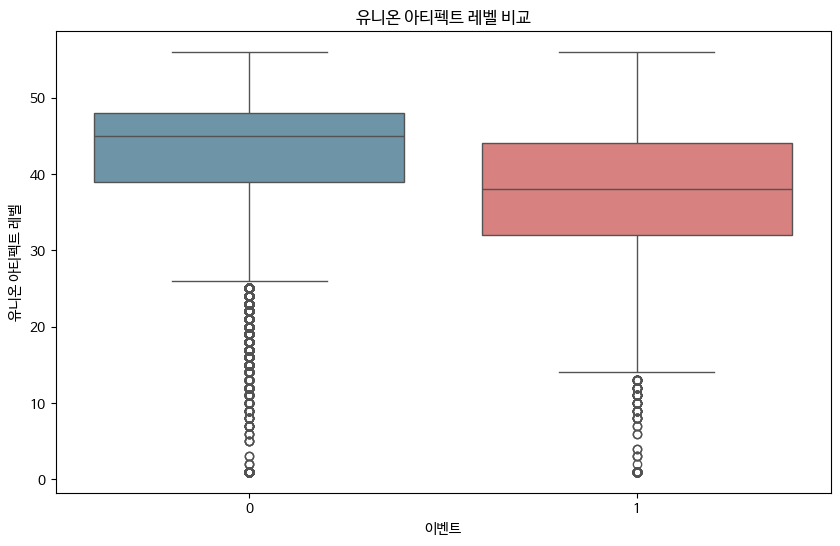

In [ ]:
# 7. union_artifact_level 비교
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='event', y='union_artifact_level', palette=['#6497B1', '#E57373'])
plt.title('유니온 아티펙트 레벨 비교')
plt.xlabel('이벤트')
plt.ylabel('유니온 아티펙트 레벨')
plt.show()

-> 유니온 레벨과 유니온아티펙트 레벨간에 이상치 발견,

어떻게 처리할지 논의하기

In [ ]:
# CSV 파일 읽기
df = pd.read_csv(file_path)

# character_class 컬럼에 있는 고유한 값 확인
print(df['character_class'].unique())

['은월' '나이트로드' '윈드브레이커' '아란' '비숍' '다크나이트' '팬텀' '아크메이지(불,독)' '듀얼블레이더' '아델'
 '섀도어' '소울마스터' '키네시스' '히어로' '라라' '카인' '에반' '블래스터' '일리움' '캐논마스터'
 '아크메이지(썬,콜)' '메르세데스' '호영' '데몬슬레이어' '바이퍼' '카이저' '제논' '제로' '캡틴' '스트라이커'
 '플레임위자드' '카데나' '패스파인더' '신궁' '아크' '루미너스' '배틀메이지' '엔젤릭버스터' '나이트워커' '메카닉'
 '미하일' '팔라딘' '와일드헌터' '데몬어벤져' '보우마스터' '칼리' '초보자' '시티즌' '매지션' '노블레스' '검사'
 '시프마스터' '버서커' '캐논슈터' '로그' '허밋' '나이트' '프리스트' '메이지(불,독)' '사수']


In [ ]:
# 각 character_class 데이터의 개수 확인
class_counts = df['character_class'].value_counts()

# 출력
print(class_counts)

character_class
비숍            17271
아델            15605
듀얼블레이더        10865
나이트로드         10165
섀도어            9472
아크메이지(불,독)     8233
윈드브레이커         7971
소울마스터          7765
아크메이지(썬,콜)     7282
나이트워커          6733
히어로            6501
엔젤릭버스터         5993
패스파인더          5962
바이퍼            5517
아크             4958
제로             4907
팬텀             4856
메르세데스          4782
은월             4623
라라             4200
호영             4154
데몬어벤져          4007
팔라딘            3753
다크나이트          3506
보우마스터          3100
캐논마스터          2820
아란             2706
카인             2697
에반             2651
루미너스           2282
카이저            2269
제논             2184
배틀메이지          2122
데몬슬레이어         1951
신궁             1607
캡틴             1573
칼리             1535
키네시스           1494
카데나            1442
플레임위자드         1427
미하일            1251
일리움            1236
메카닉            1151
블래스터           1026
스트라이커          1016
와일드헌터           632
초보자              50
노블레스             17
시티즌               7
검사  

In [ ]:
# 원본 데이터의 행 수 확인
original_row_count = len(df)

# character_class_level이 6인 데이터만 필터링
filtered_df = df[df['character_class_level'] == 6]

# 필터링된 데이터의 행 수 확인
filtered_row_count = len(filtered_df)

# 행 수 비교 출력
print(f"전체 데이터 행 수: {original_row_count}")
print(f"character_class_level이 6인 데이터 행 수: {filtered_row_count}")

전체 데이터 행 수: 209340
character_class_level이 6인 데이터 행 수: 208836


In [ ]:
# world_name 컬럼에 있는 고유한 값과 각 값의 개수 확인
world_name_counts = df['world_name'].value_counts()

# 결과 출력
print(world_name_counts)

world_name
스카니아    43616
루나      42683
엘리시움    37123
크로아     31697
베라      25897
오로라     16072
유니온      3582
이노시스     3296
제니스      2799
레드       1572
아케인       590
노바        412
버닝          1
Name: count, dtype: int64


In [ ]:
# world_name이 '버닝'인 데이터 필터링
burning_data = df[df['world_name'] == '버닝']

# 결과 출력
print(burning_data)

                                    ocid      exp_1010  ranking  \
209290  7f67fc46b1cd910a7ebf4d92867fde34  2.156828e+12   538980   

       character_name world_name character_gender character_class  \
209290             잉규         버닝                남            키네시스   

        character_class_level  character_level  character_exp  ...  \
209290                    6.0            274.0   1.213261e+12  ...   

            exp_1128 access_1128      exp_1205  access_1205      exp_1212  \
209290  3.938631e+12        True  5.753297e+12         True  7.816889e+12   

        access_1212      exp_1219  access_1219  event  duration  
209290         True  8.504307e+12         True      0        10  

[1 rows x 49 columns]


가설: 대도시 유저보다 시골섭 유저의 이탈율이 더 높을 것이다

<ipython-input-32-9248352e001b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_server_type.index, y=churn_rate_by_server_type.values, palette=['#6497B1', '#E57373'])


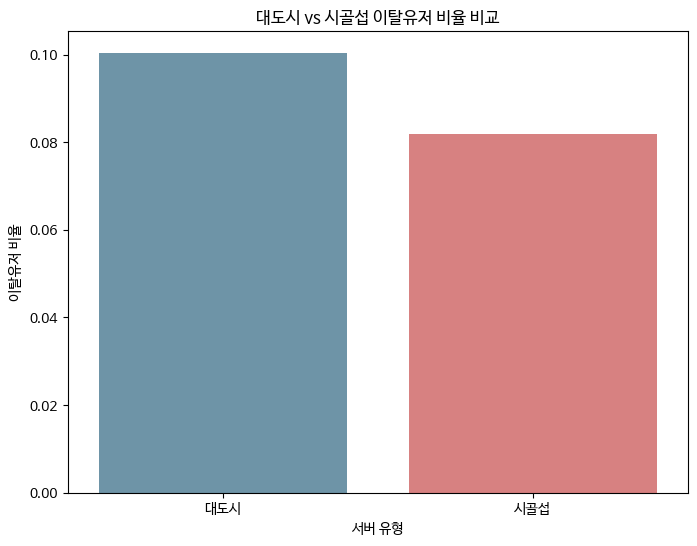

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 대도시와 시골섭 구분
large_cities = ['스카니아', '루나', '엘리시움', '크로아', '베라', '오로라']
df['server_type'] = df['world_name'].apply(lambda x: '대도시' if x in large_cities else '시골섭')

# 대도시와 시골섭 각각에서 event가 1인 비율 계산
churn_rate_by_server_type = df.groupby('server_type')['event'].mean()

# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_rate_by_server_type.index, y=churn_rate_by_server_type.values, palette=['#6497B1', '#E57373'])
plt.title('대도시 vs 시골섭 이탈유저 비율 비교')
plt.xlabel('서버 유형')
plt.ylabel('이탈유저 비율')
plt.show()

In [ ]:
# 대도시와 시골섭 각각에서 event가 1인 비율 계산
churn_rate_by_server_type = df.groupby('server_type')['event'].mean()

# 결과 출력
print(churn_rate_by_server_type)

server_type
대도시    0.100417
시골섭    0.081864
Name: event, dtype: float64


대도시 서버의 이탈유저 비율: 10.04%

시골섭 서버의 이탈유저 비율: 8.19%

-> 대도시 서버의 이탈유저 비율이 시골섭 서버의 이탈유저 비율보다 조금 더 높다는 것을 확인할 수 있음.

가설 기각, 대도시의 이탈율이 더 높음.

In [ ]:
# 대도시와 시골섭 분리
city_servers = ['스카니아', '루나', '엘리시움', '크로아', '베라', '오로라']
df['server_type'] = df['world_name'].apply(lambda x: '대도시' if x in city_servers else '시골섭')

# 대도시와 시골섭의 이탈유저 비율 계산
churn_rate_by_server_type = df.groupby('server_type')['event'].mean()

# 각 서버 유형의 전체 유저 수
user_count_by_server_type = df['server_type'].value_counts()

# 각 서버 유형별 이탈유저 수 (이탈유저 비율 * 전체 유저 수)
churned_user_count_by_server_type = churn_rate_by_server_type * user_count_by_server_type

# 결과 출력
print(f"서버 유형별 이탈유저 비율:\n{churn_rate_by_server_type}")
print(f"\n서버 유형별 유저 수:\n{user_count_by_server_type}")
print(f"\n서버 유형별 이탈유저 수:\n{churned_user_count_by_server_type}")

서버 유형별 이탈유저 비율:
server_type
대도시    0.100417
시골섭    0.081864
Name: event, dtype: float64

서버 유형별 유저 수:
server_type
대도시    197088
시골섭     12252
Name: count, dtype: int64

서버 유형별 이탈유저 수:
server_type
대도시    19791.0
시골섭     1003.0
dtype: float64


가설: 인기직업보다 비인기직업의 이탈율이 높다

In [ ]:
# character_class_level이 6인 데이터만 필터링
filtered_df = df[df['character_class_level'] == 6]

# character_class 컬럼에 있는 고유한 값과 각 값의 개수 확인
character_class_counts = filtered_df['character_class'].value_counts()

# 결과 출력
print(character_class_counts)

character_class
비숍            2695
아델            2536
나이트로드         2165
듀얼블레이더        1959
아크메이지(불,독)    1643
섀도어           1377
아크메이지(썬,콜)    1246
패스파인더         1032
윈드브레이커        1030
히어로            959
아크             895
소울마스터          872
팬텀             852
엔젤릭버스터         700
호영             697
제로             688
바이퍼            634
다크나이트          609
팔라딘            590
메르세데스          587
은월             579
아란             538
데몬어벤져          519
나이트워커          510
캐논마스터          504
에반             489
라라             465
보우마스터          442
제논             408
루미너스           345
카인             338
데몬슬레이어         323
카이저            282
키네시스           266
배틀메이지          264
플레임위자드         255
신궁             241
카데나            235
캡틴             221
메카닉            196
블래스터           163
일리움            160
미하일            159
와일드헌터          156
스트라이커          136
칼리             127
Name: count, dtype: int64


In [ ]:
import pandas as pd

# 데이터 불러오기
file_path = 'character_level_fill.csv'  # 파일 경로를 지정하세요
df = pd.read_csv(file_path)

# 전체 데이터의 행 수 확인
total_rows = df.shape[0]

# character_class_level이 6인 데이터만 필터링
filtered_df = df[df['character_class_level'] == 6]

# 레벨 6 데이터의 행 수 확인
filtered_rows = filtered_df.shape[0]

# 각 character_class_level 6에 대해 몇 행이 있는지 계산
class_level_6_counts = filtered_df['character_class'].value_counts()

# 결과 출력
print(f"전체 데이터의 행 수: {total_rows}")
print(f"레벨 6 데이터의 행 수: {filtered_rows}")
print("레벨 6 데이터의 각 character_class별 행 수:")
print(class_level_6_counts)

전체 데이터의 행 수: 209340
레벨 6 데이터의 행 수: 208836
레벨 6 데이터의 각 character_class별 행 수:
character_class
비숍            17229
아델            15549
듀얼블레이더        10835
나이트로드         10147
섀도어            9454
아크메이지(불,독)     8222
윈드브레이커         7964
소울마스터          7756
아크메이지(썬,콜)     7262
나이트워커          6729
히어로            6489
엔젤릭버스터         5979
패스파인더          5943
바이퍼            5498
아크             4952
제로             4902
팬텀             4845
메르세데스          4776
은월             4608
라라             4195
호영             4150
데몬어벤져          3998
팔라딘            3750
다크나이트          3502
보우마스터          3098
캐논마스터          2812
아란             2698
카인             2690
에반             2645
루미너스           2280
카이저            2266
제논             2183
배틀메이지          2118
데몬슬레이어         1945
신궁             1607
캡틴             1570
칼리             1535
키네시스           1488
카데나            1442
플레임위자드         1424
미하일            1248
일리움            1235
메카닉            1148
블래스터           1024
스트라이커          1016
와일드헌터   

시그너스 기사단: 26,137개

레프: 23,871개

In [ ]:
import pandas as pd

# 데이터 불러오기
file_path = 'character_level_fill.csv'  # 파일 경로를 지정하세요
df = pd.read_csv(file_path)

# character_class_level이 6인 데이터만 필터링
filtered_df = df[df['character_class_level'] == 6]

# 직업별 이탈율 계산 (event 컬럼이 1이면 탈퇴, 0이면 탈퇴하지 않음)
# 직업별 이탈율 = (이탈한 사람 수 / 직업별 총 사람 수) * 100
exit_rate_by_class = filtered_df.groupby('character_class')['event'].mean() * 100

# 이탈율을 내림차순으로 정렬
exit_rate_by_class_sorted = exit_rate_by_class.sort_values(ascending=False)

# 결과 출력
print(exit_rate_by_class_sorted)

character_class
나이트워커         14.370635
섀도어           12.375714
소울마스터         11.952037
바이퍼           11.695162
라라            11.561383
은월            11.349826
일리움           11.093117
루미너스          11.052632
배틀메이지         10.764873
플레임위자드        10.744382
블래스터          10.742188
아크메이지(불,독)    10.459742
히어로           10.417630
엔젤릭버스터        10.352902
칼리            10.228013
아란            10.192735
스트라이커         10.039370
키네시스          10.013441
캡틴            10.000000
캐논마스터          9.992888
제논             9.986257
미하일            9.935897
나이트로드          9.864985
윈드브레이커         9.844299
비숍             9.716176
메카닉            9.581882
호영             9.542169
신궁             9.520846
메르세데스          9.463987
보우마스터          9.425436
팔라딘            9.200000
아델             9.171008
데몬슬레이어         9.151671
패스파인더          8.968534
아크메이지(썬,콜)     8.909391
카이저            8.870256
에반             8.431002
데몬어벤져          8.404202
아크             8.178514
팬텀             8.049536
카인             7.918216


In [ ]:
# 시그너스 기사단과 레프 직업 목록 정의
cygnus_knights = ['소울마스터', '플레임위자드', '윈드브레이커', '나이트워커', '스트라이커', '미하일']
lep = ['아델', '일리움', '칼리', '아크']

# 시그너스 기사단과 레프의 이탈율 계산
cygnus_exit_rate = filtered_df[filtered_df['character_class'].isin(cygnus_knights)].groupby('character_class')['event'].mean() * 100
lep_exit_rate = filtered_df[filtered_df['character_class'].isin(lep)].groupby('character_class')['event'].mean() * 100

# 내림차순으로 이탈율 정렬
cygnus_exit_rate = cygnus_exit_rate.sort_values(ascending=False)
lep_exit_rate = lep_exit_rate.sort_values(ascending=False)

# 각 그룹의 이탈율 출력
print("시그너스 기사단의 이탈율:")
print(cygnus_exit_rate)

print("\n레프의 이탈율:")
print(lep_exit_rate)

# 시그너스 기사단과 레프의 평균 이탈율 계산
avg_cygnus_exit_rate = cygnus_exit_rate.mean()
avg_lep_exit_rate = lep_exit_rate.mean()

# 평균 이탈율 출력
print("\n시그너스 기사단 평균 이탈율: {:.2f}%".format(avg_cygnus_exit_rate))
print("레프 평균 이탈율: {:.2f}%".format(avg_lep_exit_rate))

시그너스 기사단의 이탈율:
character_class
나이트워커     14.370635
소울마스터     11.952037
플레임위자드    10.744382
스트라이커     10.039370
미하일        9.935897
윈드브레이커     9.844299
Name: event, dtype: float64

레프의 이탈율:
character_class
일리움    11.093117
칼리     10.228013
아델      9.171008
아크      8.178514
Name: event, dtype: float64

시그너스 기사단 평균 이탈율: 11.15%
레프 평균 이탈율: 9.67%


직업군(전사, 법사, 도적 등등)은 솔직히 의미없음

모험가, 시그너스, 노바 등등으로 나누기 <- 자석펫, 캐시템 공유 등이 가능하니

텔포직, 더블점프직 나누기

1. 직업 계열별로 구분하기

직업 계열별: 모험가, 시그너스 기사단, 레지스탕스, 영웅, 노바, 레프, 아니마, 초월자, 프렌즈 월드

-모험가

히어로, 팔라딘, 다크나이트,
아크메이지(불,독), 아크메이지(썬,콜), 비숍,
보우마스터, 신궁, 패스파인더,
나이트로드, 섀도어, 듀얼블레이더,
바이퍼, 캐논마스터, 캡틴

-시그너스 기사단

소울마스터, 플레임위자드, 원드브레이커, 나이트워커, 스트라이커, 미하일

-레지스탕스

블래스터, 배틀메이지, 와일드헌터, 메카닉, 제논, 데몬슬레이어, 데몬어벤져

-영웅

아란, 에반, 메르세데스, 팬텀, 은월, 루미너스

-노바

카이저, 카인, 카데나, 엔젤릭버스터

-레프

아델, 일리움, 칼리, 아크

-아니마

라라, 호영

-초월자

제로

-프렌즈 월드

키네시스

In [ ]:
# 직업 → 직업 계열 매핑 딕셔너리 정의
class_to_group = {
    # 모험가
    '히어로': '모험가', '팔라딘': '모험가', '다크나이트': '모험가',
    '아크메이지(불,독)': '모험가', '아크메이지(썬,콜)': '모험가', '비숍': '모험가',
    '보우마스터': '모험가', '신궁': '모험가', '패스파인더': '모험가',
    '나이트로드': '모험가', '섀도어': '모험가', '듀얼블레이더': '모험가',
    '바이퍼': '모험가', '캐논마스터': '모험가', '캡틴': '모험가',

    # 시그너스 기사단
    '소울마스터': '시그너스 기사단', '플레임위자드': '시그너스 기사단',
    '윈드브레이커': '시그너스 기사단', '나이트워커': '시그너스 기사단',
    '스트라이커': '시그너스 기사단', '미하일': '시그너스 기사단',

    # 레지스탕스
    '블래스터': '레지스탕스', '배틀메이지': '레지스탕스', '와일드헌터': '레지스탕스',
    '메카닉': '레지스탕스', '제논': '레지스탕스', '데몬슬레이어': '레지스탕스',
    '데몬어벤져': '레지스탕스',

    # 영웅
    '아란': '영웅', '에반': '영웅', '메르세데스': '영웅',
    '팬텀': '영웅', '은월': '영웅', '루미너스': '영웅',

    # 노바
    '카이저': '노바', '카인': '노바', '카데나': '노바', '엔젤릭버스터': '노바',

    # 레프
    '아델': '레프', '일리움': '레프', '칼리': '레프', '아크': '레프',

    # 아니마
    '라라': '아니마', '호영': '아니마',

    # 초월자
    '제로': '초월자',

    # 프렌즈 월드
    '키네시스': '프렌즈 월드',
}

# 새로운 컬럼 생성: 'character_group'
filtered_df['character_group'] = filtered_df['character_class'].map(class_to_group)

# 각 직업 계열별 이탈율 계산
group_churn_rate = filtered_df.groupby('character_group')['event'].mean().sort_values(ascending=False)

# 결과 출력
print("직업 계열별 이탈율 (내림차순):")
print(group_churn_rate)

직업 계열별 이탈율 (내림차순):
character_group
시그너스 기사단    0.116961
아니마         0.105572
프렌즈 월드      0.100134
모험가         0.098103
영웅          0.096787
레지스탕스       0.094205
노바          0.091783
레프          0.091315
초월자         0.076907
Name: event, dtype: float64


<ipython-input-6-3502ebd4ca39>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['character_group'] = filtered_df['character_class'].map(class_to_group)


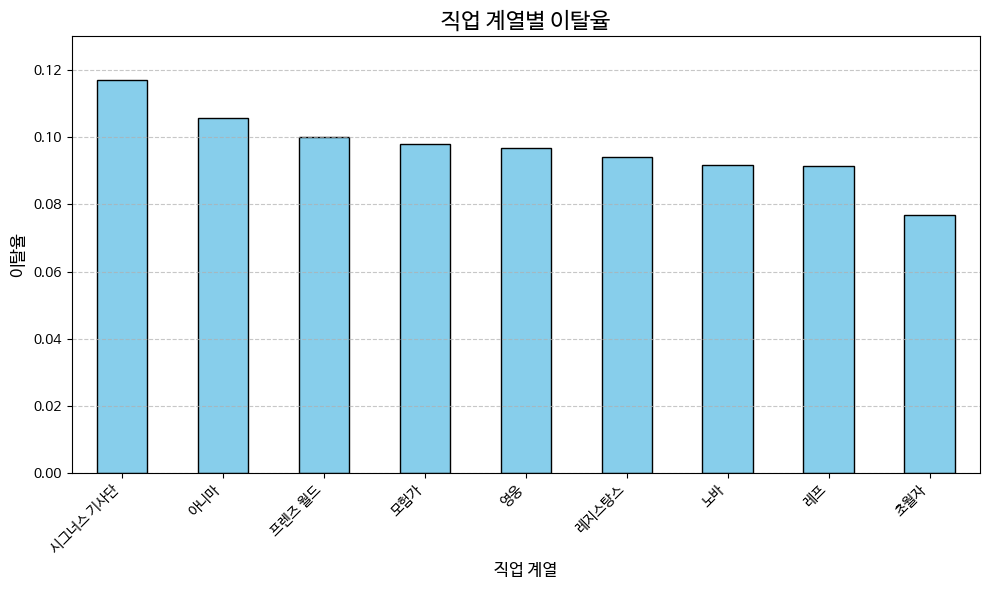

In [ ]:
import matplotlib.pyplot as plt

# 직업 → 직업 계열 매핑 딕셔너리
class_to_group = {
    '히어로': '모험가', '팔라딘': '모험가', '다크나이트': '모험가',
    '아크메이지(불,독)': '모험가', '아크메이지(썬,콜)': '모험가', '비숍': '모험가',
    '보우마스터': '모험가', '신궁': '모험가', '패스파인더': '모험가',
    '나이트로드': '모험가', '섀도어': '모험가', '듀얼블레이더': '모험가',
    '바이퍼': '모험가', '캐논마스터': '모험가', '캡틴': '모험가',
    '소울마스터': '시그너스 기사단', '플레임위자드': '시그너스 기사단',
    '윈드브레이커': '시그너스 기사단', '나이트워커': '시그너스 기사단',
    '스트라이커': '시그너스 기사단', '미하일': '시그너스 기사단',
    '블래스터': '레지스탕스', '배틀메이지': '레지스탕스', '와일드헌터': '레지스탕스',
    '메카닉': '레지스탕스', '제논': '레지스탕스', '데몬슬레이어': '레지스탕스',
    '데몬어벤져': '레지스탕스',
    '아란': '영웅', '에반': '영웅', '메르세데스': '영웅',
    '팬텀': '영웅', '은월': '영웅', '루미너스': '영웅',
    '카이저': '노바', '카인': '노바', '카데나': '노바', '엔젤릭버스터': '노바',
    '아델': '레프', '일리움': '레프', '칼리': '레프', '아크': '레프',
    '라라': '아니마', '호영': '아니마',
    '제로': '초월자',
    '키네시스': '프렌즈 월드',
}

# filtered_df에 'character_group' 컬럼 추가
filtered_df = filtered_df.copy()  # SettingWithCopyWarning 방지
filtered_df['character_group'] = filtered_df['character_class'].map(class_to_group)

# 직업 계열별 이탈율 계산
group_churn_rate = filtered_df.groupby('character_group')['event'].mean().sort_values(ascending=False)

# 그래프 그리기
plt.figure(figsize=(10, 6))
group_churn_rate.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('직업 계열별 이탈율', fontsize=16)
plt.xlabel('직업 계열', fontsize=12)
plt.ylabel('이탈율', fontsize=12)
plt.ylim(0, 0.13)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

초월자(제로)나 프렌즈 월드(키네시스) 같은 단일 직업 계열을 제외한 직업 계열을 보면

시그너스 기사단의 이탈률이 가장 높고, 레프의 이탈률이 가장 낮음을 알 수 있음.

왜 시그너스 기사단의 이탈률이 높고 레프의 이탈률이 낮을까?

도메인 조사 필요

1) 시그너스 기사단에 비해 레프의 경우 상대적으로 최신 직업
-> 직업적 완성도가 상대적으로 높음

2) 인구수: 시그너스 기사단(26,137), 레프(23,871)
-> 유저 수는 시그너스 기사단이 더 많음

3) dpm(8.8챌린지): 시그너스 기사단(469.5), 레프(483.5)
-> dpm(8.8챌린지)은 레프가 더 높음








2024-12-20 일 8.8챌 기준

**-시그너스 기사단**

스커: 485 (순위 9)

나이트워커: 502 (순위 14)

윈드브레이커: 478 (순위 21)

미하일: 477 (순위 24)

소마: 431 (순위 37)

플레임위자드: 434 (순위 43)

**-레프**

칼리: 518 (순위 6)

아델: 492 (순위 17)

일리움: 463 (순위 27)

아크: 461 (순위 39)

-시그너스 기사단 vs 레프 8.8챌 비교

시그너스 기사단의 평균 8.8챌: 469.5

레프의 평균 8.8챌: 483.5

**-결론**

**8.8챌린지 평균이 시그너스 기사단(469.5) 보다 레프(483.5)가 높음**

but! 해당 데이터에는 제로, 루미너스, 패스파인더의 데이터가 빠져있음



즉!

인구수: 시그너스 기사단 > 레프

dpm(8.8챌): 시그너스 기사단 < 레프

이탈율: 시그너스 기사단 > 레프

가설: dpm(8.8챌)이 높으면 이탈율이 낮다.

In [ ]:
%%capture

!pip install lifelines

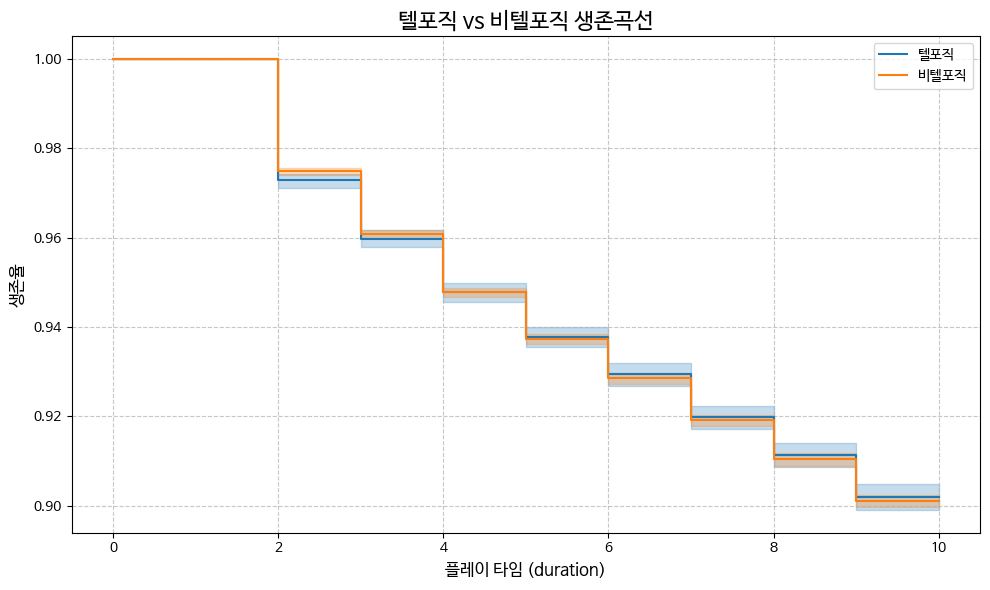

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# 텔포직 목록
teleport_jobs = [
    '아크메이지(불,독)', '아크메이지(썬,콜)', '비숍',
    '배틀메이지', '에반', '루미너스', '일리움'
]

# teleport_group 컬럼 추가
filtered_df = filtered_df.copy()
filtered_df['teleport_group'] = filtered_df['character_class'].apply(lambda x: '텔포직' if x in teleport_jobs else '비텔포직')

# 그래프 사이즈
plt.figure(figsize=(10, 6))

# 텔포직 생존곡선
mask_tp = filtered_df['teleport_group'] == '텔포직'
kmf_tp = KaplanMeierFitter()
kmf_tp.fit(durations=filtered_df[mask_tp]['duration'], event_observed=filtered_df[mask_tp]['event'], label='텔포직')
kmf_tp.plot_survival_function()

# 비텔포직 생존곡선
mask_non_tp = filtered_df['teleport_group'] == '비텔포직'
kmf_non_tp = KaplanMeierFitter()
kmf_non_tp.fit(durations=filtered_df[mask_non_tp]['duration'], event_observed=filtered_df[mask_non_tp]['event'], label='비텔포직')
kmf_non_tp.plot_survival_function()

# 그래프 제목과 레이블
plt.title('텔포직 vs 비텔포직 생존곡선', fontsize=16)
plt.xlabel('플레이 타임 (duration)', fontsize=12)
plt.ylabel('생존율', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

흠... 텔포직과 비텔포직의 큰 차이는 없는건가...

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53448 (\N{HANGUL SYLLABLE TAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loca

상위 5개 직업 (직업 수 많은 순) 이탈율:
character_class
나이트로드     0.098650
듀얼블레이더    0.079096
비숍        0.097162
섀도어       0.123757
아델        0.091710
Name: event, dtype: float64

하위 5개 직업 (직업 수 적은 순) 이탈율:
character_class
메카닉      0.095819
블래스터     0.107422
스트라이커    0.100394
와일드헌터    0.077778
일리움      0.110931
Name: event, dtype: float64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51649 (\N{HANGUL SYLLABLE JIG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

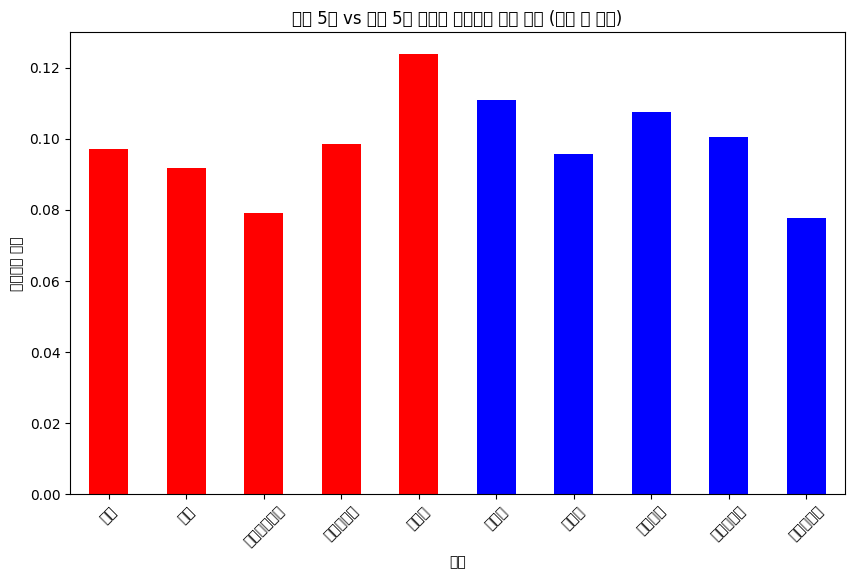

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# character_class_level이 6인 데이터만 필터링
filtered_df = df[df['character_class_level'] == 6]

# character_class별 직업 수 계산
class_counts = filtered_df['character_class'].value_counts()

# 직업 수가 많은 상위 5개 직업과 적은 하위 5개 직업 추출 (내림차순 정렬)
top_5_classes_by_count = class_counts.sort_values(ascending=False).head(5)
bottom_5_classes_by_count = class_counts.sort_values(ascending=True).head(5)

# 각 직업별 이탈유저 비율을 계산
churn_rate_top_5 = filtered_df[filtered_df['character_class'].isin(top_5_classes_by_count.index)] \
                    .groupby('character_class')['event'].mean()

churn_rate_bottom_5 = filtered_df[filtered_df['character_class'].isin(bottom_5_classes_by_count.index)] \
                       .groupby('character_class')['event'].mean()

# 결과 출력
print("상위 5개 직업 (직업 수 많은 순) 이탈율:")
print(churn_rate_top_5)

print("\n하위 5개 직업 (직업 수 적은 순) 이탈율:")
print(churn_rate_bottom_5)

# 원하는 순서로 직업을 설정 (주어진 순서대로)
desired_order = ['비숍', '아델', '듀얼블레이더', '나이트로드', '섀도어',
                 '일리움', '메카닉', '블래스터', '스트라이커', '와일드헌터']

# 상위 5개 직업과 하위 5개 직업 이탈율을 하나의 데이터프레임으로 결합
churn_rate_combined = pd.concat([churn_rate_top_5, churn_rate_bottom_5])

# 원하는 순서대로 데이터를 정렬
churn_rate_combined = churn_rate_combined[desired_order]

# 시각화
plt.figure(figsize=(10, 6))
churn_rate_combined.plot(kind='bar', color=['red'] * len(churn_rate_top_5) + ['blue'] * len(churn_rate_bottom_5))
plt.title('상위 5개 vs 하위 5개 직업의 이탈유저 비율 비교 (직업 수 기준)')
plt.xlabel('직업')
plt.ylabel('이탈유저 비율')
plt.xticks(rotation=45)
plt.show()

이탈할 때 비인기직업이라고 더 많이 이탈하지 않는 것을 확인

-> 이탈률이 높은 직업 확인 필요

In [ ]:
# character_class_level이 6인 데이터만 필터링
filtered_df = df[df['character_class_level'] == 6]

# 각 직업별 이탈유저 비율 계산
churn_rate_by_class = filtered_df.groupby('character_class')['event'].mean()

# 내림차순으로 정렬
churn_rate_by_class_sorted = churn_rate_by_class.sort_values(ascending=False)

# 결과 출력: 직업별 이탈율 (내림차순)
print("직업별 이탈유저 비율 (내림차순):")
print(churn_rate_by_class_sorted)

직업별 이탈유저 비율 (내림차순):
character_class
나이트워커         0.143706
섀도어           0.123757
소울마스터         0.119520
바이퍼           0.116952
라라            0.115614
은월            0.113498
일리움           0.110931
루미너스          0.110526
배틀메이지         0.107649
플레임위자드        0.107444
블래스터          0.107422
아크메이지(불,독)    0.104597
히어로           0.104176
엔젤릭버스터        0.103529
칼리            0.102280
아란            0.101927
스트라이커         0.100394
키네시스          0.100134
캡틴            0.100000
캐논마스터         0.099929
제논            0.099863
미하일           0.099359
나이트로드         0.098650
윈드브레이커        0.098443
비숍            0.097162
메카닉           0.095819
호영            0.095422
신궁            0.095208
메르세데스         0.094640
보우마스터         0.094254
팔라딘           0.092000
아델            0.091710
데몬슬레이어        0.091517
패스파인더         0.089685
아크메이지(썬,콜)    0.089094
카이저           0.088703
에반            0.084310
데몬어벤져         0.084042
아크            0.081785
팬텀            0.080495
카인            0.079182
듀얼블레이더        0.07909

# event와 다른 컬럼들의 EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 시각화 시 한글 깨짐 방지 위한 폰트 설치 및 적용

%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [ ]:
# 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

# pandas 불러오기
import pandas as pd

# CSV 파일 경로 설정
file_path = '/content/drive/MyDrive/데이터톤_메이플/캐릭터 레벨 기준/character_level_fill.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 상위 5개 행 출력
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                                ocid      exp_1010  ranking  \
0                   9f2a7c989c75c52e7e1bc60eee5438af  1.274985e+14     8102   
1                   987bfae423b5a6d217bc75116042200c  1.737540e+14     1144   
2                   cb09457a4e39987f40ace09cb7e55a59  1.273280e+14     8195   
3  356360924b8c044e58eaaf862766c8daefe8d04e6d233b...  1.287341e+14     8190   
4  ca8e67ee1b2e46e7204889ad8a1785c4efe8d04e6d233b...  1.122213e+14     3405   

  character_name world_name character_gender character_class  \
0             쪼꿉        크로아                여              은월   
1             날개        크로아                남           나이트로드   
2          윈v주환v        오로라                남          윈드브레이커   
3         아란마하콤보       엘리시움                남              아란   
4             떡별         루나                남              비숍   

   characte

In [ ]:
# 결측치 합계 출력
print(df.isna().sum())

ocid                           0
exp_1010                       0
ranking                        0
character_name                 0
world_name                     0
character_gender               0
character_class                0
character_class_level          0
character_level                0
character_exp                  0
character_exp_rate             0
character_guild_name           0
character_date_create          0
access_flag                    0
liberation_quest_clear_flag    0
popularity                     0
arcane_sum                     0
authentic_sum                  0
set_absorlab_count             0
set_lubatiss_count             0
set_arcane_count               0
set_eternal_count              0
dojang_best_floor              0
union_level                    0
union_artifact_level           0
union_artifact_exp             0
union_artifact_point           0
exp_1017                       0
access_1017                    0
exp_1024                       0
access_102

In [ ]:
# world_name, character_gender, character_class 각각 유니크 값과 개수 확인
target_cols = ['world_name', 'character_gender', 'character_class']

for col in target_cols:
    print(f"\n[{col}]")
    unique_values = df[col].unique()
    print(f"유형 개수: {len(unique_values)}")
    print(f"유형 목록: {unique_values}")
    print("\n각 유형별 데이터 수:")
    print(df[col].value_counts())


[world_name]
유형 개수: 13
유형 목록: ['크로아' '오로라' '엘리시움' '루나' '스카니아' '이노시스' '베라' '노바' '제니스' '레드' '유니온' '아케인'
 '버닝']

각 유형별 데이터 수:
world_name
스카니아    43616
루나      42683
엘리시움    37123
크로아     31697
베라      25897
오로라     16072
유니온      3582
이노시스     3296
제니스      2799
레드       1572
아케인       590
노바        412
버닝          1
Name: count, dtype: int64

[character_gender]
유형 개수: 3
유형 목록: ['여' '남' '기타']

각 유형별 데이터 수:
character_gender
여     109433
남      95000
기타      4907
Name: count, dtype: int64

[character_class]
유형 개수: 60
유형 목록: ['은월' '나이트로드' '윈드브레이커' '아란' '비숍' '다크나이트' '팬텀' '아크메이지(불,독)' '듀얼블레이더' '아델'
 '섀도어' '소울마스터' '키네시스' '히어로' '라라' '카인' '에반' '블래스터' '일리움' '캐논마스터'
 '아크메이지(썬,콜)' '메르세데스' '호영' '데몬슬레이어' '바이퍼' '카이저' '제논' '제로' '캡틴' '스트라이커'
 '플레임위자드' '카데나' '패스파인더' '신궁' '아크' '루미너스' '배틀메이지' '엔젤릭버스터' '나이트워커' '메카닉'
 '미하일' '팔라딘' '와일드헌터' '데몬어벤져' '보우마스터' '칼리' '초보자' '시티즌' '매지션' '노블레스' '검사'
 '시프마스터' '버서커' '캐논슈터' '로그' '허밋' '나이트' '프리스트' '메이지(불,독)' '사수']

각 유형별 데이터 수:
character_class
비숍            17271
아델        

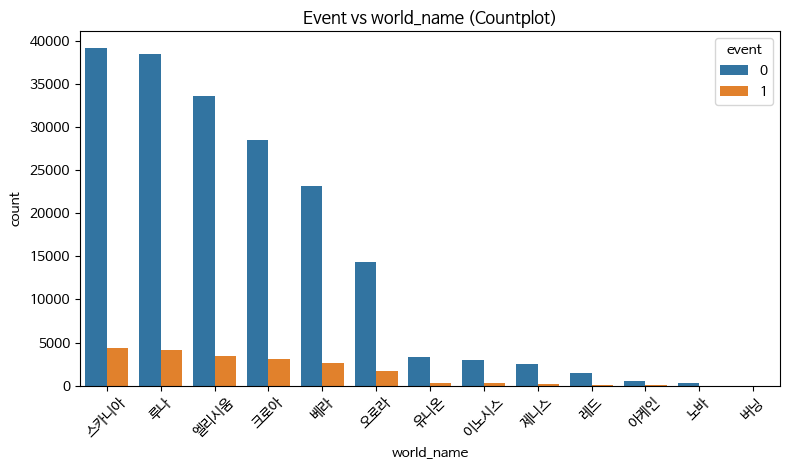

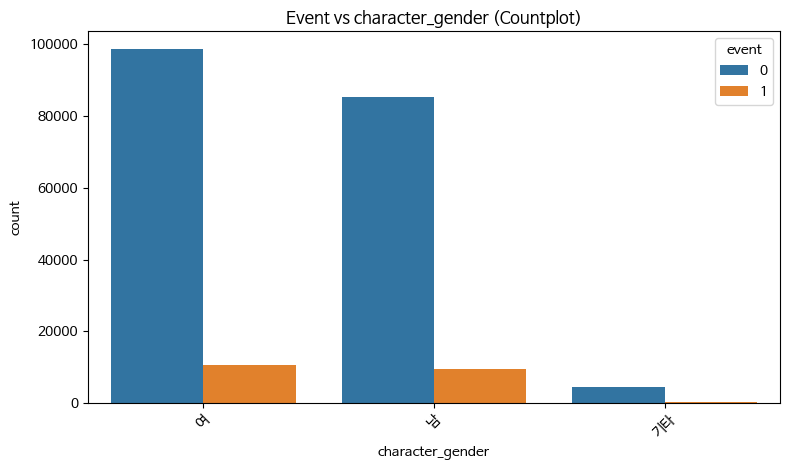

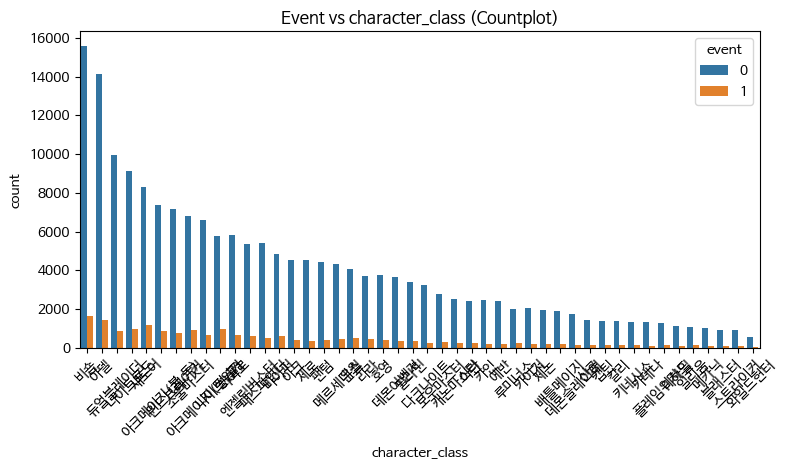

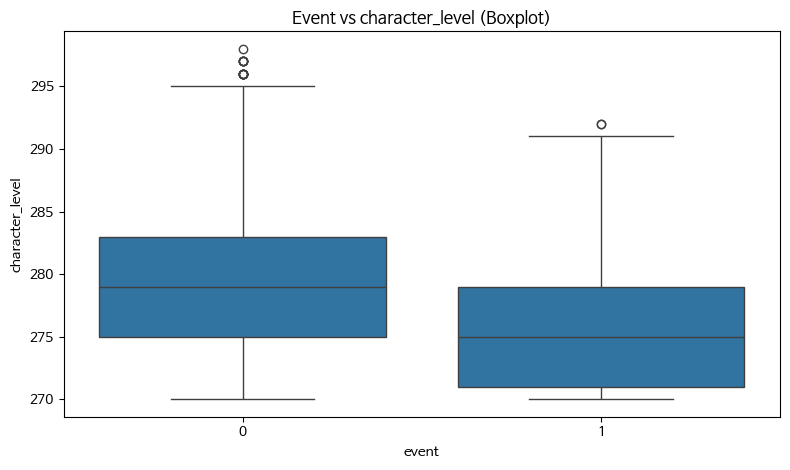

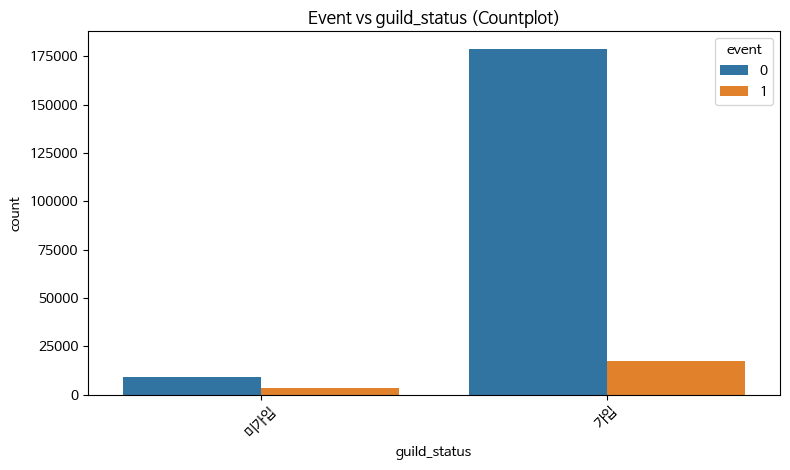

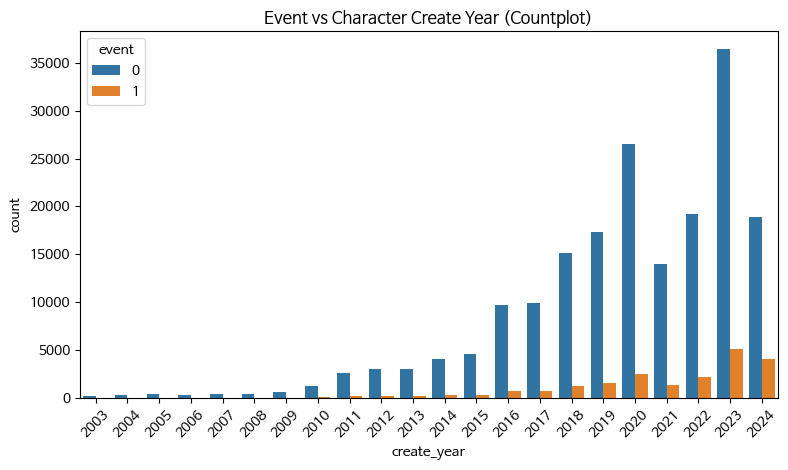

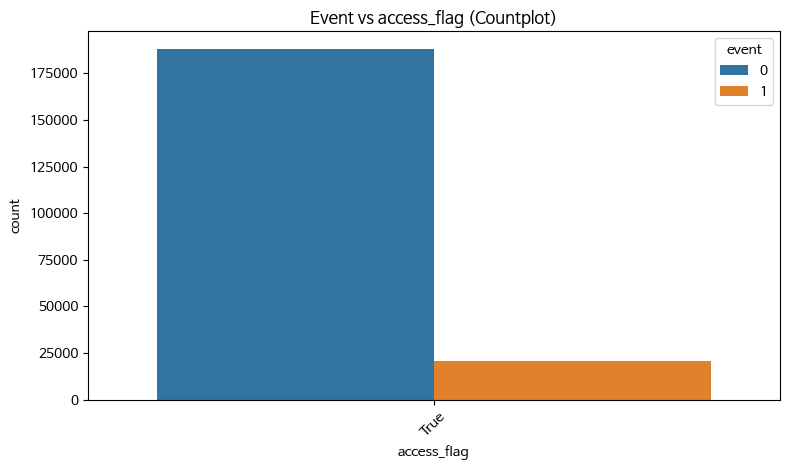

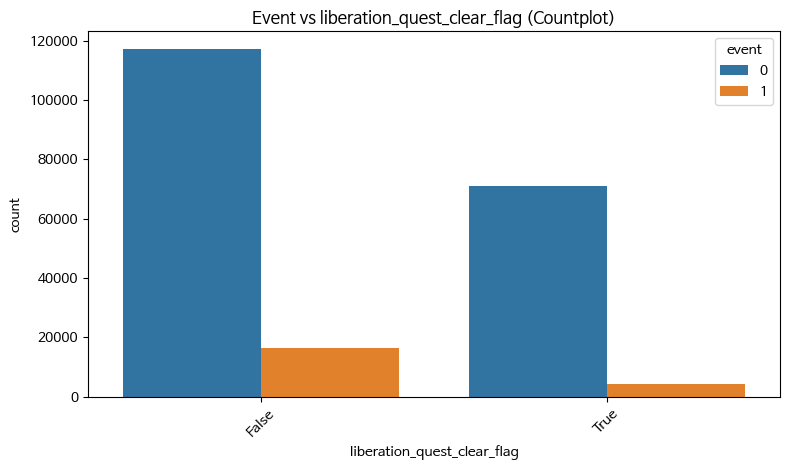

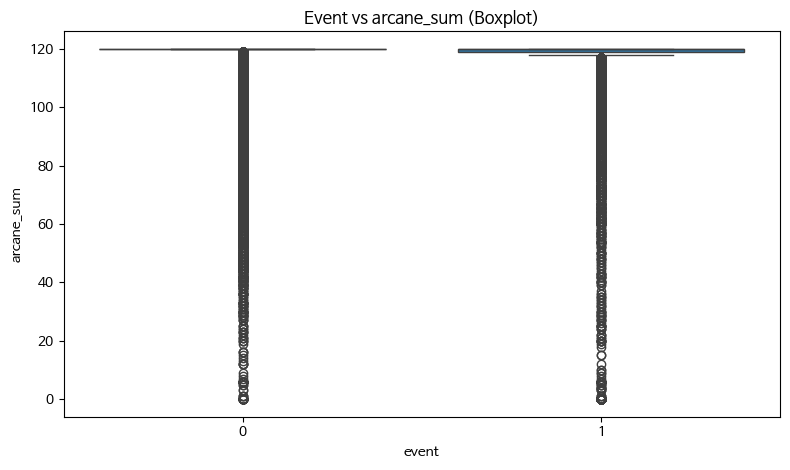

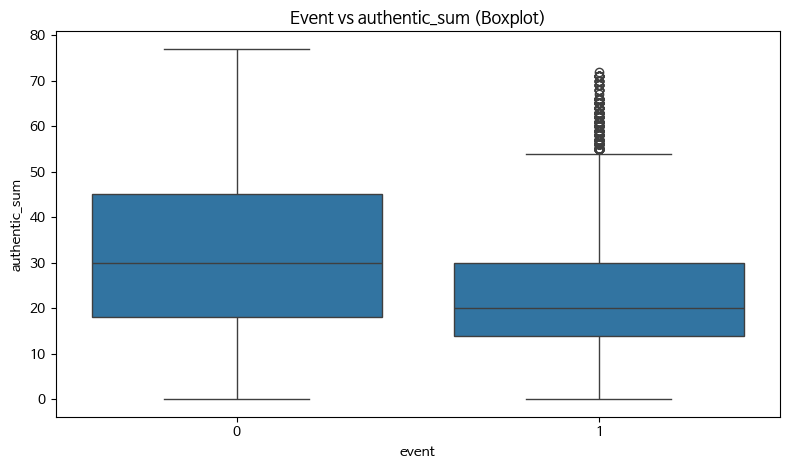

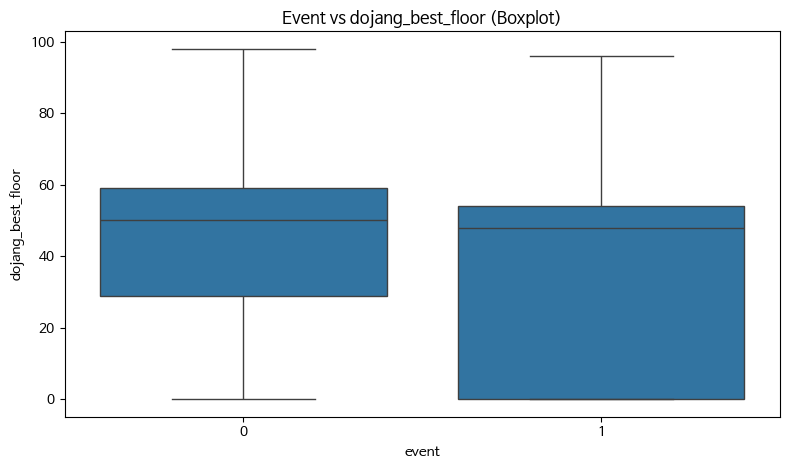

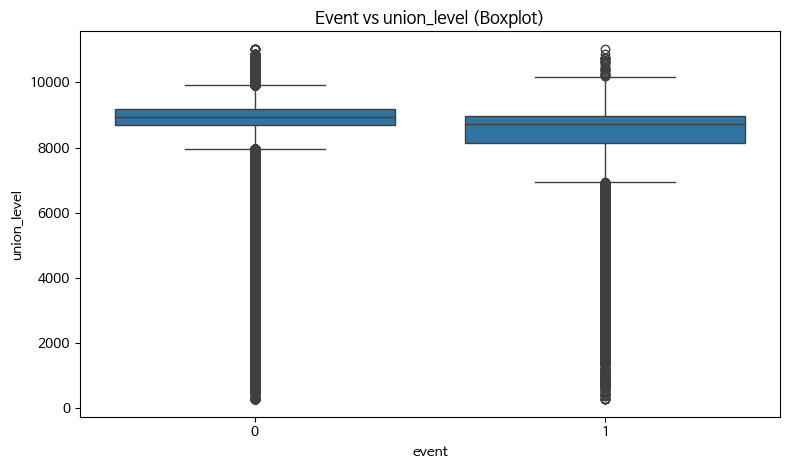

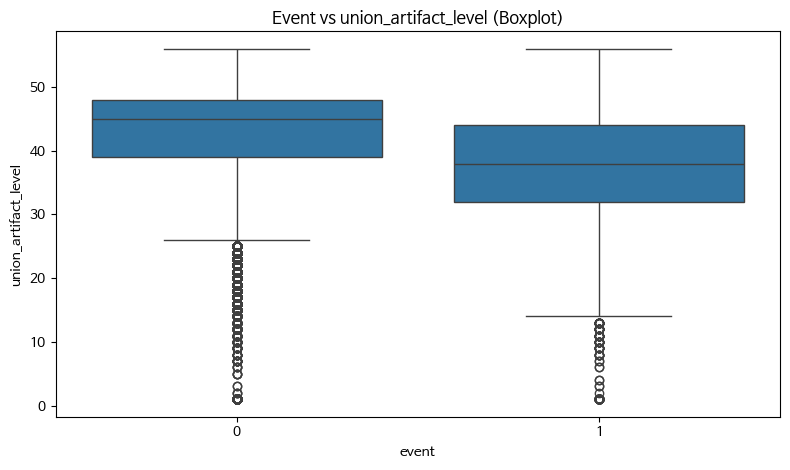

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. character_class_level 6 이상 필터링
df = df[df['character_class_level'] >= 6]

# 2. character_guild_name: 미가입 vs 가입 처리
df['guild_status'] = df['character_guild_name'].apply(
    lambda x: '미가입' if pd.isna(x) or str(x).lower() in ['없음', 'none', '미입력', '미가입'] else '가입'
)

# 3. '미가입' 데이터가 없으면 추가 (guild_status에 미가입이 없다면 강제 추가)
if '미가입' not in df['guild_status'].values:
    # 미가입 항목을 추가
    df = df.append(pd.DataFrame({'guild_status': ['미가입'], 'event': ['None'], 'character_guild_name': ['None']}), ignore_index=True)

# 4. 시각화 대상 컬럼 리스트 (popularity 제거)
columns_to_plot = [
    'world_name', 'character_gender', 'character_class', 'character_level',
    'guild_status', 'character_date_create', 'access_flag', 'liberation_quest_clear_flag',
    'arcane_sum', 'authentic_sum', 'dojang_best_floor',
    'union_level', 'union_artifact_level'
]

# 5. 범주형(카테고리형) 컬럼
categorical_cols = [
    'world_name', 'character_gender', 'character_class',
    'guild_status', 'access_flag', 'liberation_quest_clear_flag'
]

# 6. world_name, character_class를 내림차순 정렬하기 위한 함수
def get_sorted_order(col):
    return df[col].value_counts().index

# 7. 시각화 시작
for col in columns_to_plot:
    plt.figure(figsize=(8, 4.8))

    if col in categorical_cols:
        if col in ['world_name', 'character_class']:
            # 내림차순 순서 정렬
            order = get_sorted_order(col)
            sns.countplot(x=col, hue='event', data=df, order=order)
        elif col == 'guild_status':
            # 미가입, 가입 둘 다 보이게 카테고리 지정
            sns.countplot(x=col, hue='event', data=df, order=['미가입', '가입'])
        else:
            sns.countplot(x=col, hue='event', data=df)
        plt.title(f"Event vs {col} (Countplot)")
        plt.xticks(rotation=45)
    elif col == 'character_date_create':
        # 날짜형이면 연도 추출
        df['create_year'] = pd.to_datetime(df['character_date_create'], errors='coerce').dt.year
        sns.countplot(x='create_year', hue='event', data=df)
        plt.title("Event vs Character Create Year (Countplot)")
        plt.xticks(rotation=45)
    else:
        sns.boxplot(x='event', y=col, data=df)
        plt.title(f"Event vs {col} (Boxplot)")

    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd

# 1. character_class_level 6 이상 필터링
df = df[df['character_class_level'] >= 6]

# 2. character_guild_name: 미가입 vs 가입 처리
df['guild_status'] = df['character_guild_name'].apply(
    lambda x: '미가입' if pd.isna(x) or str(x).lower() in ['없음', 'none', '미입력', '미가입'] else '가입'
)

# 3. '미가입' 데이터가 없으면 추가 (guild_status에 미가입이 없다면 강제 추가)
if '미가입' not in df['guild_status'].values:
    # 미가입 항목을 추가
    df = df.append(pd.DataFrame({'guild_status': ['미가입'], 'event': ['None'], 'character_guild_name': ['None']}), ignore_index=True)

# 4. 시각화 대상 컬럼 리스트 (popularity 제거)
columns_to_plot = [
    'world_name', 'character_gender', 'character_class', 'character_level',
    'guild_status', 'character_date_create', 'access_flag', 'liberation_quest_clear_flag',
    'arcane_sum', 'authentic_sum', 'dojang_best_floor',
    'union_level', 'union_artifact_level'
]

# 5. 범주형(카테고리형) 컬럼
categorical_cols = [
    'world_name', 'character_gender', 'character_class',
    'guild_status', 'access_flag', 'liberation_quest_clear_flag'
]

# 6. world_name, character_class를 내림차순 정렬하기 위한 함수
def get_sorted_order(col):
    return df[col].value_counts().index

# 7. 수치 요약 출력
for col in columns_to_plot:
    print(f"\n====== {col} : Event별 통계 ======")

    if col in categorical_cols:
        # 범주형: event별 빈도표
        count_table = pd.crosstab(df[col], df['event'])
        if col == 'guild_status':
            # 미가입, 가입 모두 강제 포함
            count_table = count_table.reindex(['미가입', '가입'])
        elif col in ['world_name', 'character_class']:
            # 내림차순 정렬
            count_table = count_table.loc[get_sorted_order(col)]
        print(count_table)
    elif col == 'character_date_create':
        # 날짜형: 연도별 빈도표
        df['create_year'] = pd.to_datetime(df['character_date_create'], errors='coerce').dt.year
        count_table = pd.crosstab(df['create_year'], df['event'])
        print(count_table)
    else:
        # 수치형: event별 평균, 표준편차, 중앙값, 최소값, 최대값, 개수
        mean_std_table = df.groupby('event')[col].agg(['mean', 'std', 'median', 'min', 'max', 'count']).round(2)
        print(mean_std_table)


====== world_name : Event별 통계 ======
event           0     1
world_name             
스카니아        39107  4420
루나          38400  4177
엘리시움        33527  3501
크로아         28480  3137
베라          23186  2649
오로라         14291  1749
유니온          3285   287
이노시스         3016   272
제니스          2566   221
레드           1434   133
아케인           544    43
노바            373    37
버닝              1     0

====== character_gender : Event별 통계 ======
event                 0      1
character_gender              
기타                 4525    377
남                 85122   9607
여                 98563  10642

====== character_class : Event별 통계 ======
event                0     1
character_class             
비숍               15555  1674
아델               14123  1426
듀얼블레이더            9978   857
나이트로드             9146  1001
섀도어               8284  1170
아크메이지(불,독)        7362   860
윈드브레이커            7180   784
소울마스터             6829   927
아크메이지(썬,콜)        6615   647
나이트워커             5762   967
히어로         

# union_artifact_level와 다른 컬럼들의 EDA

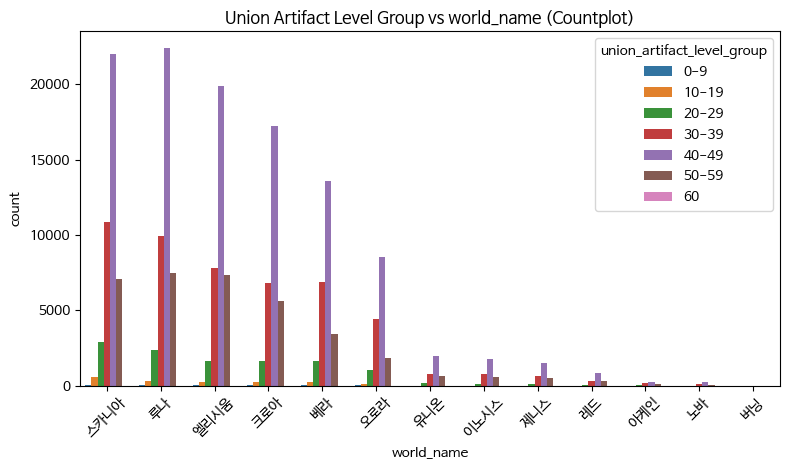

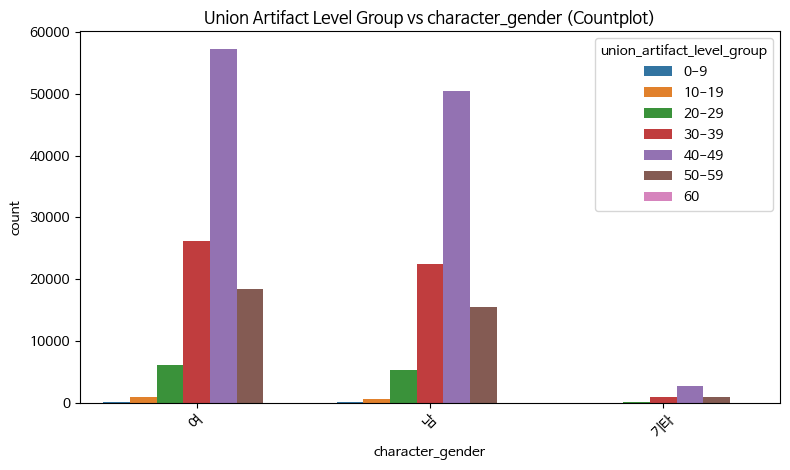

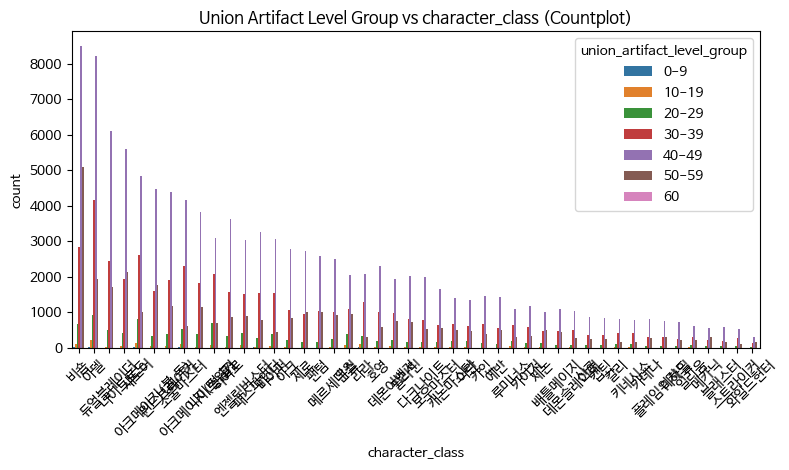

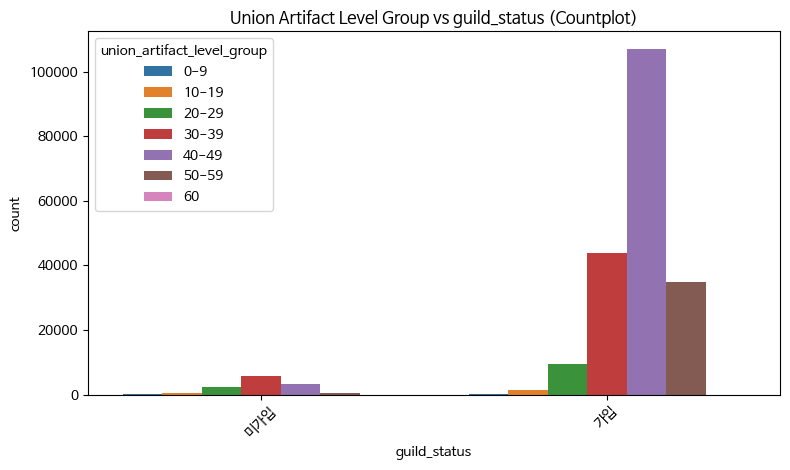

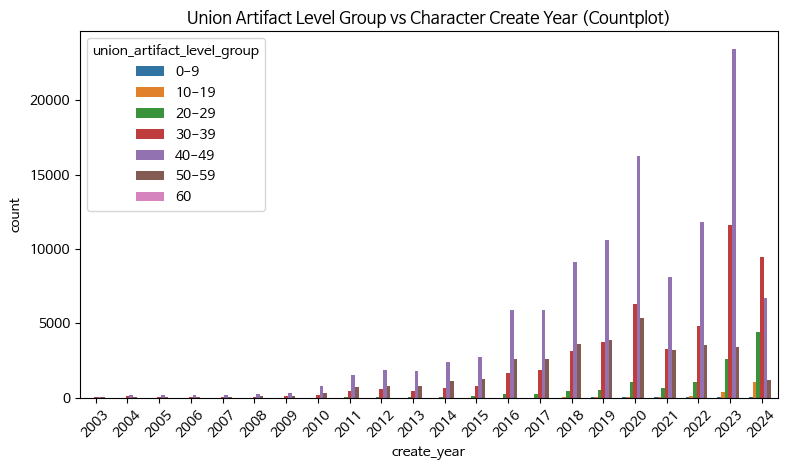

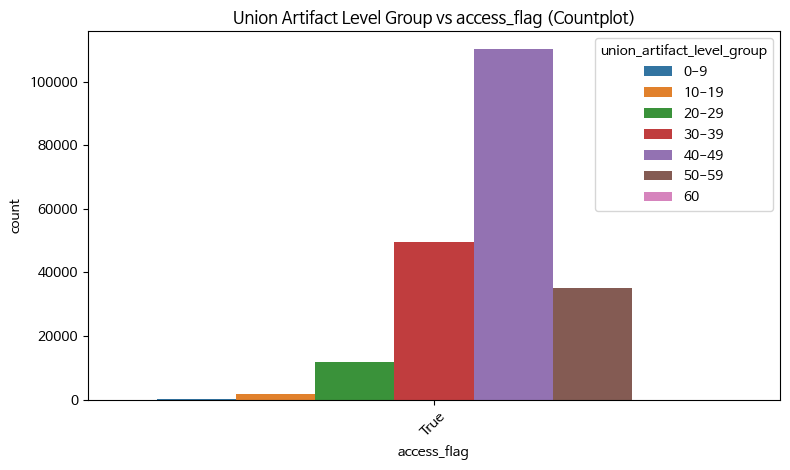

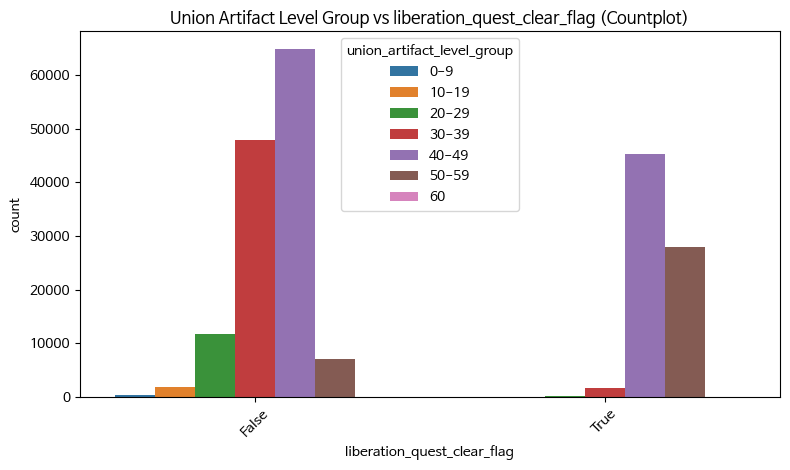

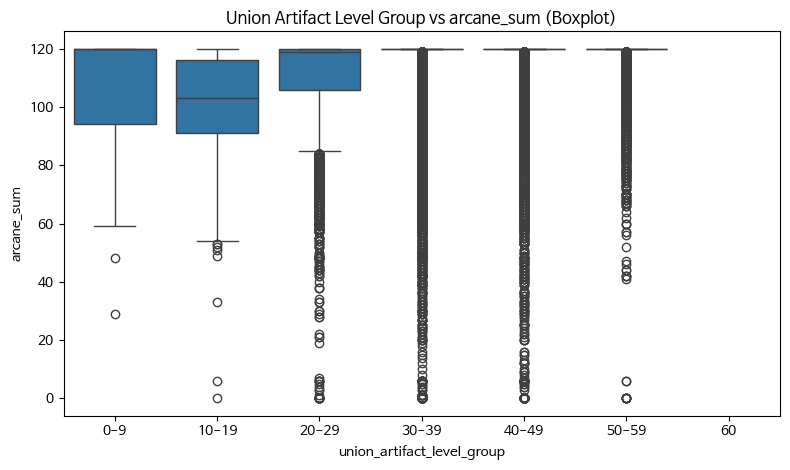

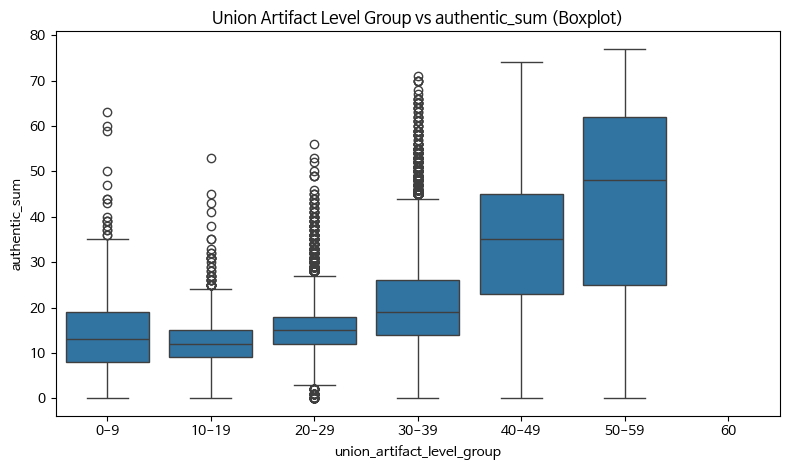

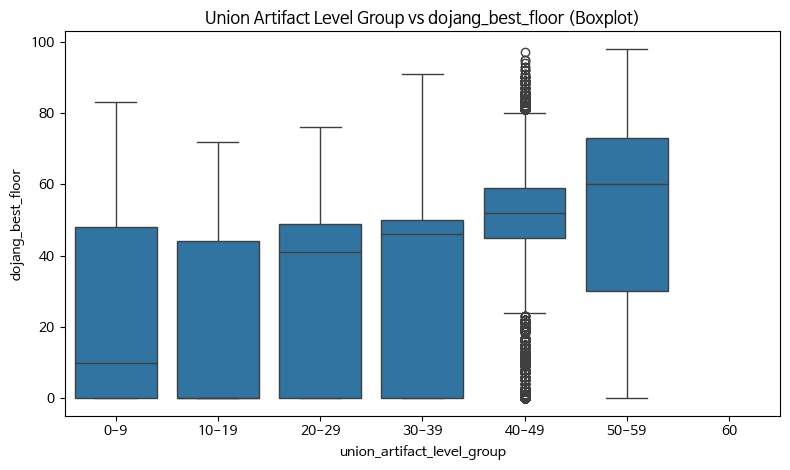

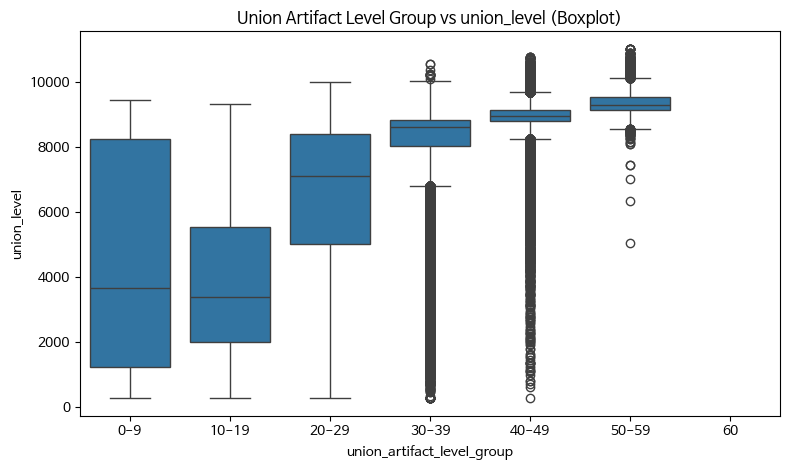

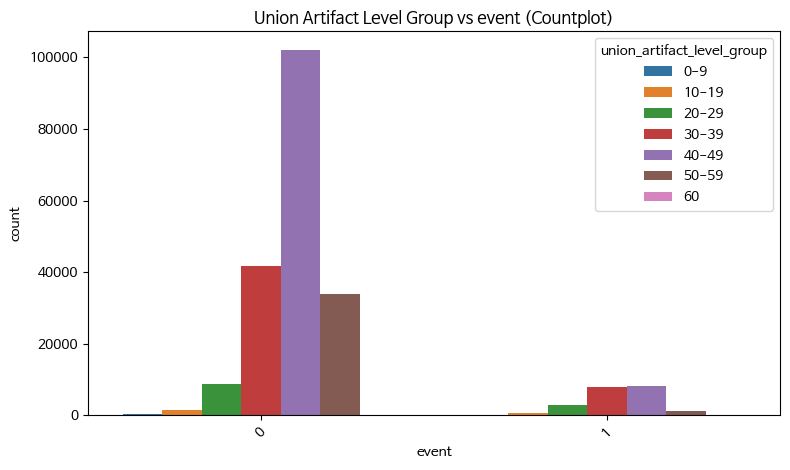

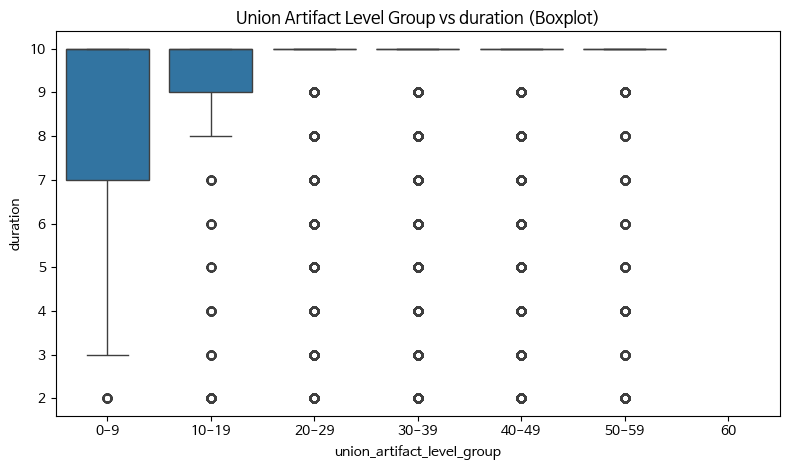

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. union_artifact_level 구간화 (binning)
# 0-9, 10-19, 20-29, 30-39, 40-49, 50-59, 60 (6개 구간 + 60 레벨)
bins = [0, 10, 20, 30, 40, 50, 60, 1000]  # 60 포함하고 1000은 안전마진
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60']
df['union_artifact_level_group'] = pd.cut(df['union_artifact_level'], bins=bins, labels=labels, right=False)

# 2. 시각화 대상 컬럼 추가 (event, duration 포함)
columns_to_plot = [
    'world_name', 'character_gender', 'character_class', 'character_level',
    'guild_status', 'character_date_create', 'access_flag', 'liberation_quest_clear_flag',
    'arcane_sum', 'authentic_sum', 'dojang_best_floor',
    'union_level', 'event', 'duration'
]

# 범주형 컬럼
categorical_cols = [
    'world_name', 'character_gender', 'character_class',
    'guild_status', 'access_flag', 'liberation_quest_clear_flag', 'event'
]

# world_name, character_class 내림차순 정렬 함수
def get_sorted_order(col):
    return df[col].value_counts().index

# 3. 시각화
for col in columns_to_plot:
    plt.figure(figsize=(8, 4.8))

    if col in categorical_cols:
        if col in ['world_name', 'character_class']:
            # 내림차순 정렬
            order = get_sorted_order(col)
            sns.countplot(x=col, hue='union_artifact_level_group', data=df, order=order)
        elif col == 'guild_status':
            # guild_status는 미가입, 가입 순서로 정렬
            sns.countplot(x=col, hue='union_artifact_level_group', data=df, order=['미가입', '가입'])
        else:
            # 나머지 범주형 변수에 대해서는 기본 countplot
            sns.countplot(x=col, hue='union_artifact_level_group', data=df)
        plt.title(f"Union Artifact Level Group vs {col} (Countplot)")
        plt.xticks(rotation=45)
    elif col == 'character_date_create':
        # 'character_date_create'는 연도별로 나누어 시각화
        df['create_year'] = pd.to_datetime(df['character_date_create'], errors='coerce').dt.year
        sns.countplot(x='create_year', hue='union_artifact_level_group', data=df)
        plt.title("Union Artifact Level Group vs Character Create Year (Countplot)")
        plt.xticks(rotation=45)
    else:
        # 수치형 변수에 대해서는 boxplot
        sns.boxplot(x='union_artifact_level_group', y=col, data=df)
        plt.title(f"Union Artifact Level Group vs {col} (Boxplot)")

    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd

# 1. union_artifact_level 구간화 (binning)
# 0-9, 10-19, 20-29, 30-39, 40-49, 50-59, 60 (6개 구간 + 60 레벨)
bins = [0, 10, 20, 30, 40, 50, 60, 1000]  # 60 포함하고 1000은 안전마진
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60']
df['union_artifact_level_group'] = pd.cut(df['union_artifact_level'], bins=bins, labels=labels, right=False)

# 2. 시각화 대상 컬럼 추가 (event, duration 포함)
columns_to_plot = [
    'world_name', 'character_gender', 'character_class', 'character_level',
    'guild_status', 'character_date_create', 'access_flag', 'liberation_quest_clear_flag',
    'arcane_sum', 'authentic_sum', 'dojang_best_floor',
    'union_level', 'event', 'duration'
]

# 범주형 컬럼
categorical_cols = [
    'world_name', 'character_gender', 'character_class',
    'guild_status', 'access_flag', 'liberation_quest_clear_flag', 'event'
]

# 3. 수치 요약 출력
for col in columns_to_plot:
    print(f"\n====== {col} : Union Artifact Level Group별 통계 ======")

    if col in categorical_cols:
        # 범주형: union_artifact_level_group별 빈도표
        count_table = pd.crosstab(df[col], df['union_artifact_level_group'])
        if col == 'guild_status':
            # 미가입, 가입 모두 강제 포함
            count_table = count_table.reindex(['미가입', '가입'])
        elif col in ['world_name', 'character_class']:
            # 내림차순 정렬
            count_table = count_table.loc[df[col].value_counts().index]
        print(count_table)
    elif col == 'character_date_create':
        # 날짜형: 연도별 빈도표
        df['create_year'] = pd.to_datetime(df['character_date_create'], errors='coerce').dt.year
        count_table = pd.crosstab(df['create_year'], df['union_artifact_level_group'])
        print(count_table)
    else:
        # 수치형: union_artifact_level_group별 평균, 표준편차, 중앙값, 최소값, 최대값, 개수
        mean_std_table = df.groupby('union_artifact_level_group')[col].agg(['mean', 'std', 'median', 'min', 'max', 'count']).round(2)
        print(mean_std_table)


====== world_name : Union Artifact Level Group별 통계 ======
union_artifact_level_group  0-9  10-19  20-29  30-39  40-49  50-59
world_name                                                        
스카니아                         70    598   2896  10891  22017   7055
루나                           73    303   2354   9938  22396   7513
엘리시움                         54    243   1640   7802  19917   7372
크로아                          44    228   1615   6849  17225   5656
베라                           36    242   1633   6893  13597   3434
오로라                          24    119   1066   4431   8557   1843
유니온                          10     11    156    774   1946    675
이노시스                          3     15    136    784   1759    591
제니스                           5     12     88    637   1532    513
레드                            4      9     63    350    853    288
아케인                           1      6     36    174    278     92
노바                            2      3     20     96    231     58
버닝 

<ipython-input-23-8e0670185564>:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_std_table = df.groupby('union_artifact_level_group')[col].agg(['mean', 'std', 'median', 'min', 'max', 'count']).round(2)


union_artifact_level_group  0-9  10-19  20-29  30-39  40-49  50-59
create_year                                                       
2003                          0      1      5     41     88     24
2004                          1      0      7    113    188     52
2005                          1      0     18     88    196     70
2006                          1      0      7     69    182     69
2007                          0      1     15     85    210     75
2008                          0      3     10     83    246    103
2009                          1      1     10    120    336    128
2010                          1      2     21    210    784    332
2011                          2      6     60    452   1518    733
2012                          1      6     54    565   1843    784
2013                          4      1     54    451   1833    811
2014                          8      3     90    652   2420   1157
2015                          5      6    100    777   2749   

<ipython-input-23-8e0670185564>:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_std_table = df.groupby('union_artifact_level_group')[col].agg(['mean', 'std', 'median', 'min', 'max', 'count']).round(2)
<ipython-input-23-8e0670185564>:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_std_table = df.groupby('union_artifact_level_group')[col].agg(['mean', 'std', 'median', 'min', 'max', 'count']).round(2)
<ipython-input-23-8e0670185564>:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior

union_artifact_level_group  0-9  10-19  20-29  30-39   40-49  50-59
event                                                              
0                           227   1324   8802  41727  102205  33925
1                            99    466   2901   7892    8103   1165

====== duration : Union Artifact Level Group별 통계 ======
                            mean   std  median  min   max   count
union_artifact_level_group                                       
0-9                         8.11  3.17    10.0  2.0  10.0     326
10-19                       8.57  2.68    10.0  2.0  10.0    1790
20-29                       8.61  2.66    10.0  2.0  10.0   11703
30-39                       9.15  2.18    10.0  2.0  10.0   49619
40-49                       9.63  1.47    10.0  2.0  10.0  110308
50-59                       9.83  1.02    10.0  2.0  10.0   35090
60                           NaN   NaN     NaN  NaN   NaN       0


# union_level과 다른 컬럼들의 EDA

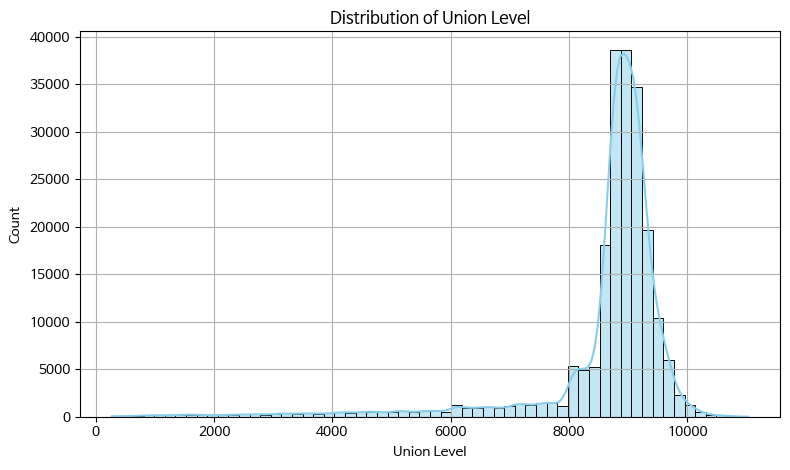

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 히스토그램: union_level 분포
plt.figure(figsize=(8, 4.8))
sns.histplot(df['union_level'], bins=60, kde=True, color='skyblue')
plt.title('Distribution of Union Level')
plt.xlabel('Union Level')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# union_level 기본 통계량
stats = df['union_level'].describe()
print(stats)

count    208836.000000
mean       8620.619606
std        1261.561981
min         270.000000
25%        8671.000000
50%        8919.000000
75%        9171.000000
max       11030.000000
Name: union_level, dtype: float64


In [ ]:
# union_level을 새로운 구간(binning)으로 나누기
bins = [0, 6000, 8000, 10000, df['union_level'].max()]
labels = ['<6000', '6000-8000', '8000-10000', '10000+']

df['union_level_bin'] = pd.cut(df['union_level'], bins=bins, labels=labels, right=False)

# 구간별 데이터 개수 확인
print(df['union_level_bin'].value_counts().sort_index())

union_level_bin
<6000          10219
6000-8000      12853
8000-10000    183872
10000+          1886
Name: count, dtype: int64


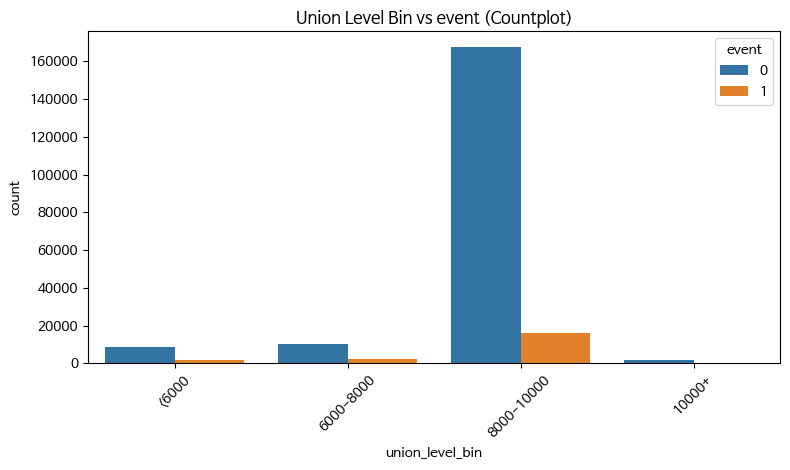

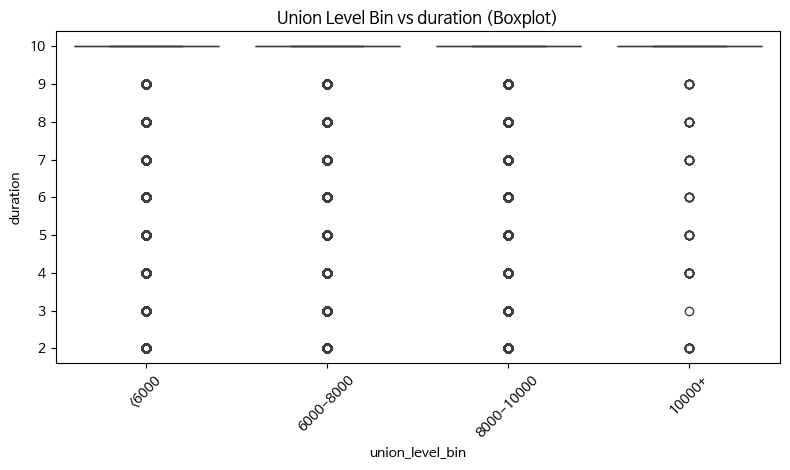

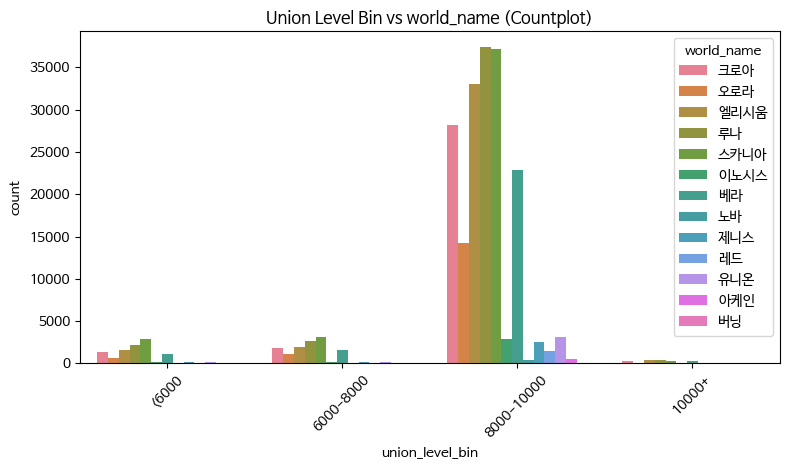

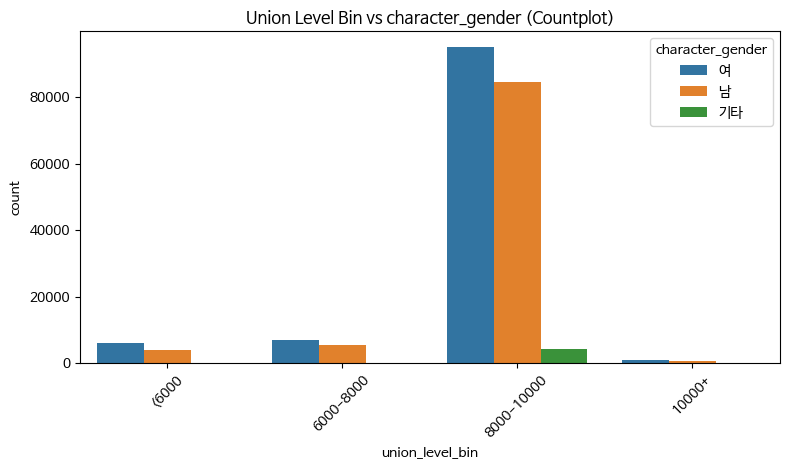

<ipython-input-14-d63f4c38af55>:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


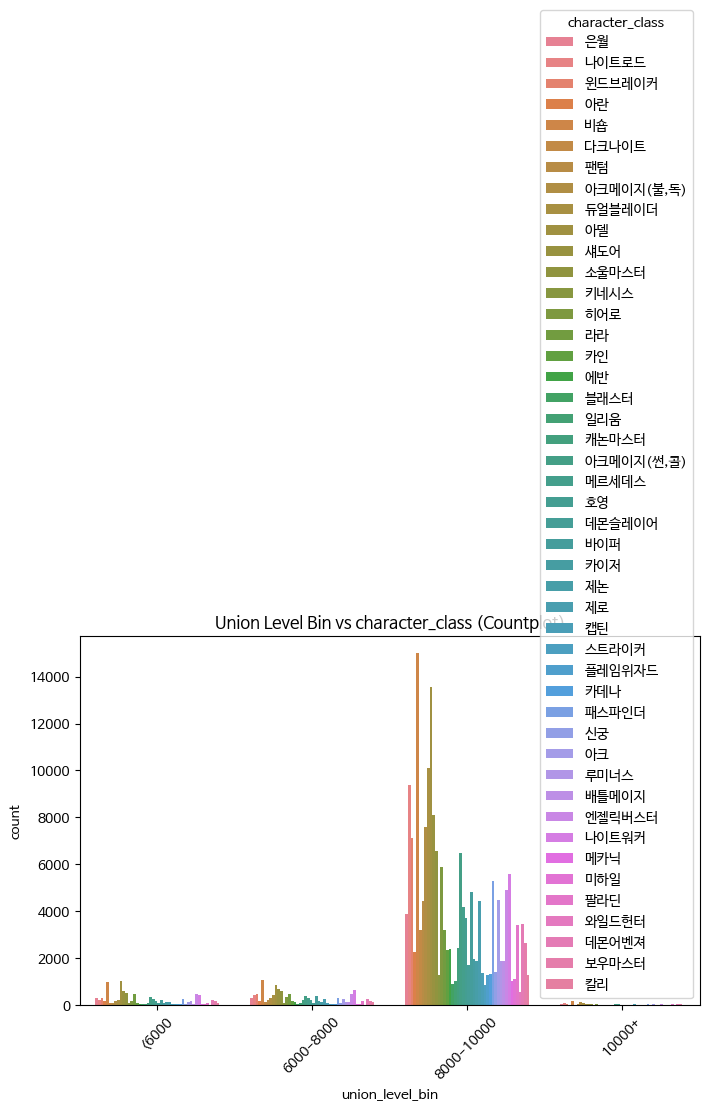

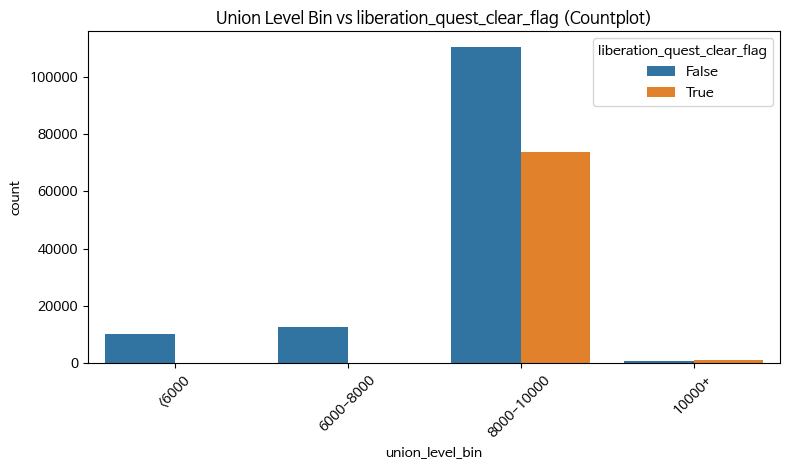

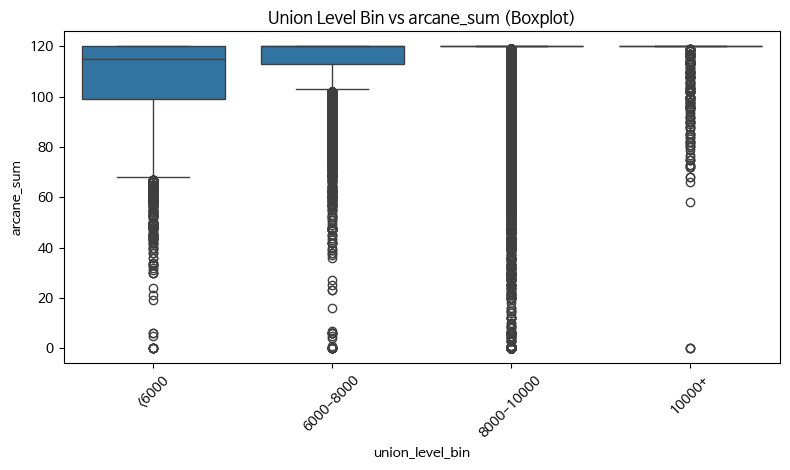

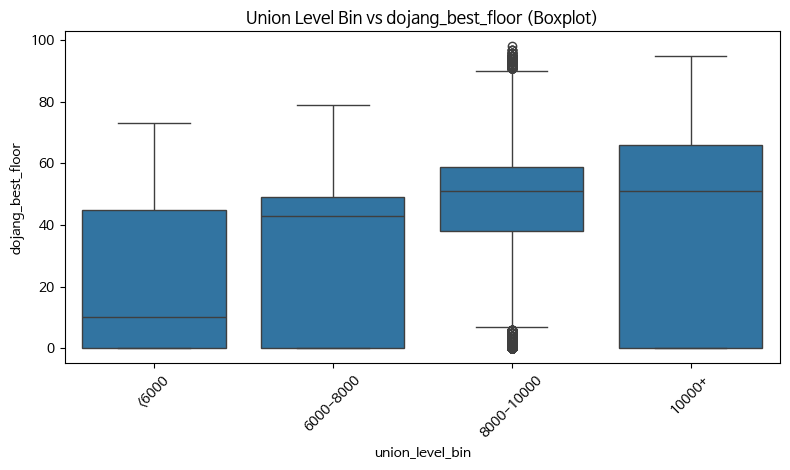

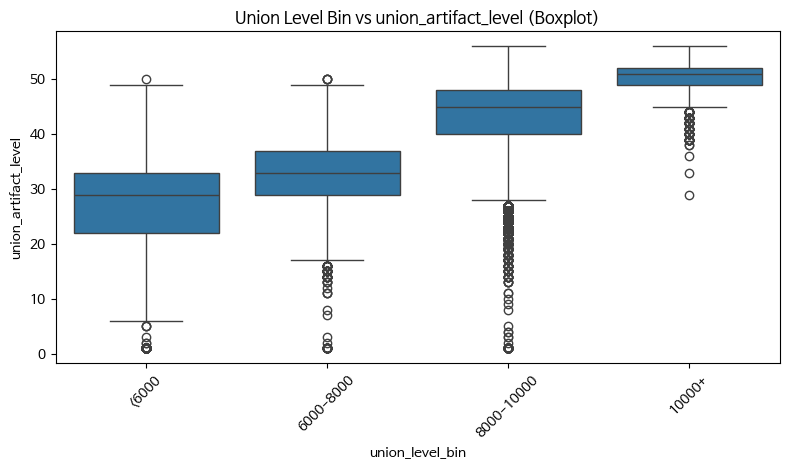

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 정확하게 guild_status 생성
df['guild_status'] = df['character_guild_name'].apply(
    lambda x: '미가입' if pd.isna(x) or str(x).strip().lower() in ['없음', 'none', '미입력', '미가입'] else '가입'
)

# 시각화할 컬럼 리스트 (event, duration 포함)
columns_to_plot = [
    'event', 'duration', 'world_name', 'character_gender', 'character_class',
    'guild_status', 'access_flag', 'liberation_quest_clear_flag',
    'arcane_sum', 'authentic_sum', 'dojang_best_floor',
    'union_artifact_level'
]

# 범주형 컬럼
categorical_cols = [
    'event', 'world_name', 'character_gender', 'character_class',
    'guild_status', 'access_flag', 'liberation_quest_clear_flag'
]

# 시각화 시작
for col in columns_to_plot:
    plt.figure(figsize=(8, 4.8))

    if col in categorical_cols:
        if col == 'guild_status':
            sns.countplot(x='union_level_bin', hue=col, data=df, hue_order=['미가입', '가입'])
        else:
            sns.countplot(x='union_level_bin', hue=col, data=df)
        plt.title(f"Union Level Bin vs {col} (Countplot)")
    else:
        sns.boxplot(x='union_level_bin', y=col, data=df)
        plt.title(f"Union Level Bin vs {col} (Boxplot)")

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd

# 정확하게 guild_status 생성
df['guild_status'] = df['character_guild_name'].apply(
    lambda x: '미가입' if pd.isna(x) or str(x).strip().lower() in ['없음', 'none', '미입력', '미가입'] else '가입'
)

# 시각화할 컬럼 리스트 (event, duration 포함)
columns_to_plot = [
    'event', 'duration', 'world_name', 'character_gender', 'character_class',
    'guild_status', 'access_flag', 'liberation_quest_clear_flag',
    'arcane_sum', 'authentic_sum', 'dojang_best_floor',
    'union_artifact_level'
]

# 범주형 컬럼
categorical_cols = [
    'event', 'world_name', 'character_gender', 'character_class',
    'guild_status', 'access_flag', 'liberation_quest_clear_flag'
]

# 수치 요약 출력
for col in columns_to_plot:
    print(f"\n====== {col} : Union Level Bin별 통계 ======")

    if col in categorical_cols:
        # 범주형: union_level_bin별 빈도표
        count_table = pd.crosstab(df[col], df['union_level_bin'])
        if col == 'guild_status':
            # 미가입, 가입 모두 강제 포함
            count_table = count_table.reindex(['미가입', '가입'])
        print(count_table)
    else:
        # 수치형: union_level_bin별 평균, 표준편차, 중앙값, 최소값, 최대값, 개수
        mean_std_table = df.groupby('union_level_bin')[col].agg(['mean', 'std', 'median', 'min', 'max', 'count']).round(2)
        print(mean_std_table)


====== event : Union Level Bin별 통계 ======
union_level_bin  <6000  6000-8000  8000-10000  10000+
event                                                
0                 8414      10415      167555    1821
1                 1805       2438       16317      65

====== duration : Union Level Bin별 통계 ======
                 mean   std  median  min  max   count
union_level_bin                                      
<6000            9.05  2.27    10.0    2   10   10219
6000-8000        8.99  2.33    10.0    2   10   12853
8000-10000       9.53  1.65    10.0    2   10  183872
10000+           9.84  0.99    10.0    2   10    1886

====== world_name : Union Level Bin별 통계 ======
union_level_bin  <6000  6000-8000  8000-10000  10000+
world_name                                           
노바                  26         22         355       7
레드                  54         82        1422       9
루나                2173       2630       37403     371
버닝                   0          1           0       0

<ipython-input-24-261437b1bbf3>:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_std_table = df.groupby('union_level_bin')[col].agg(['mean', 'std', 'median', 'min', 'max', 'count']).round(2)


union_level_bin   <6000  6000-8000  8000-10000  10000+
character_gender                                      
기타                  144        255        4454      49
남                  3954       5456       84486     830
여                  6121       7142       94932    1007

====== character_class : Union Level Bin별 통계 ======
union_level_bin  <6000  6000-8000  8000-10000  10000+
character_class                                      
나이트로드              238        437        9389      82
나이트워커              432        673        5589      35
다크나이트              114        151        3211      26
데몬슬레이어             104        108        1712      21
데몬어벤져              216        270        3472      40
듀얼블레이더             215        443       10085      91
라라                 474        493        3214      14
루미너스               195        154        1908      23
메르세데스              260        299        4174      43
메카닉                 49         61        1022      16
미하일                 61  

<ipython-input-24-261437b1bbf3>:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_std_table = df.groupby('union_level_bin')[col].agg(['mean', 'std', 'median', 'min', 'max', 'count']).round(2)
<ipython-input-24-261437b1bbf3>:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_std_table = df.groupby('union_level_bin')[col].agg(['mean', 'std', 'median', 'min', 'max', 'count']).round(2)
<ipython-input-24-261437b1bbf3>:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to a

# 무릉도장과 다른 컬럼들의 EDA

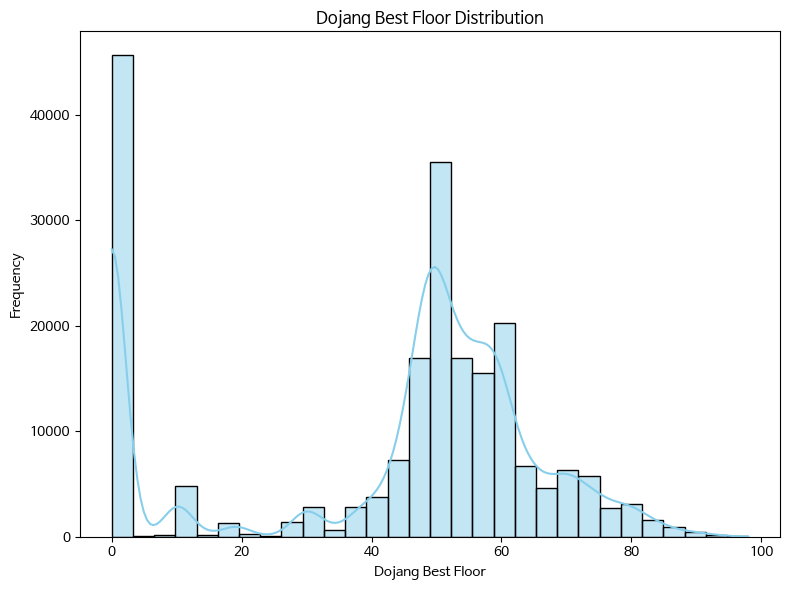

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# dojang_best_floor의 분포 시각화 (수치형 변수로 가정)
plt.figure(figsize=(8, 6))
sns.histplot(df['dojang_best_floor'], kde=True, color='skyblue', bins=30)
plt.title('Dojang Best Floor Distribution')
plt.xlabel('Dojang Best Floor')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
# dojang_best_floor의 값별 빈도 계산
floor_counts = df['dojang_best_floor'].value_counts().sort_index()

# dojang_best_floor의 기본 통계 (평균, 표준편차, 최소, 최대 등)
floor_stats = df['dojang_best_floor'].describe()

# 출력
print("===== Dojang Best Floor - 빈도수 =====")
print(floor_counts)
print("\n===== Dojang Best Floor - 기본 통계 =====")
print(floor_stats)

===== Dojang Best Floor - 빈도수 =====
dojang_best_floor
0.0     45322
1.0       242
2.0        33
3.0        29
4.0        21
        ...  
94.0       30
95.0       22
96.0        7
97.0        4
98.0        1
Name: count, Length: 99, dtype: int64

===== Dojang Best Floor - 기본 통계 =====
count    208836.000000
mean         41.876152
std          25.260329
min           0.000000
25%          19.000000
50%          50.000000
75%          59.000000
max          98.000000
Name: dojang_best_floor, dtype: float64


<ipython-input-27-7536146ceb2c>:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


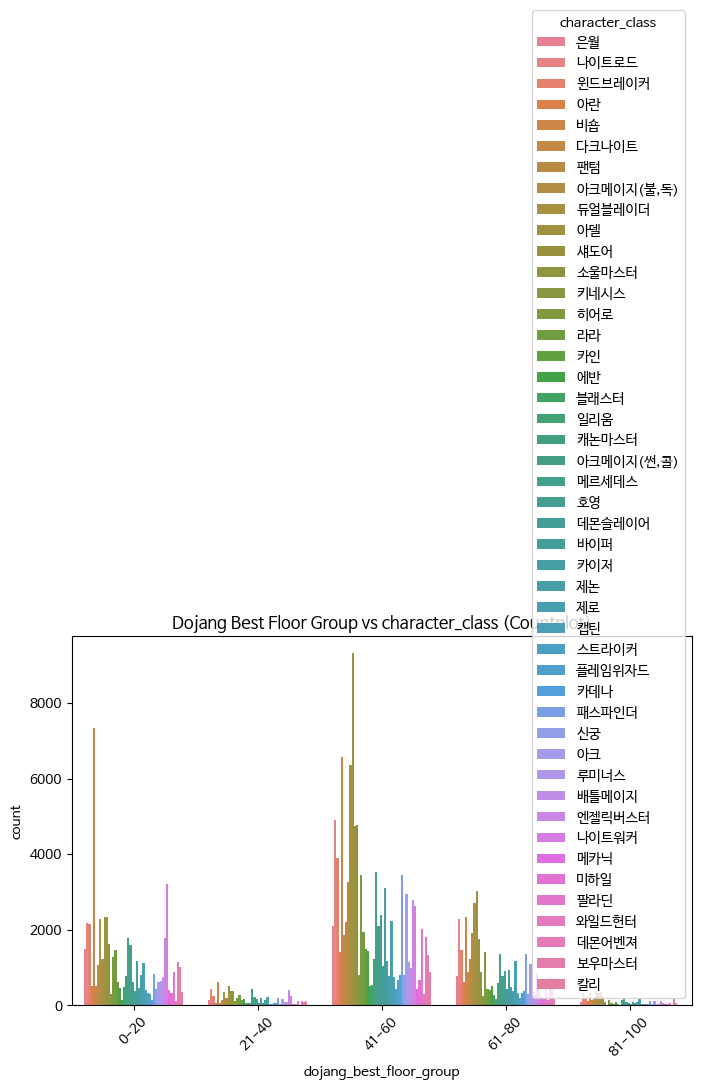

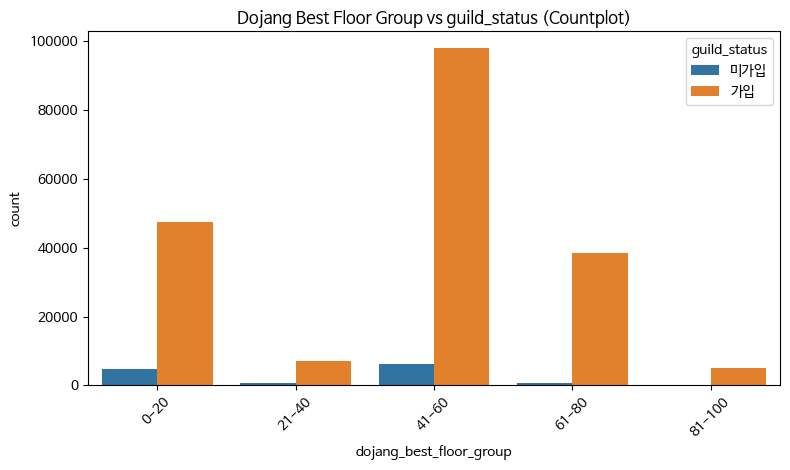

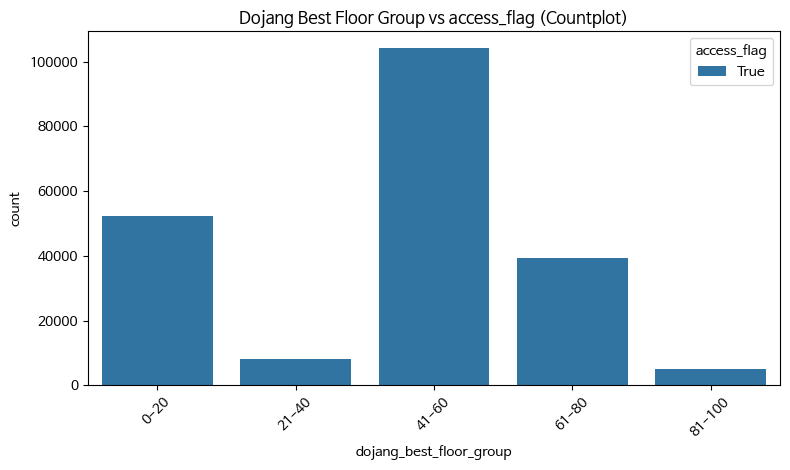

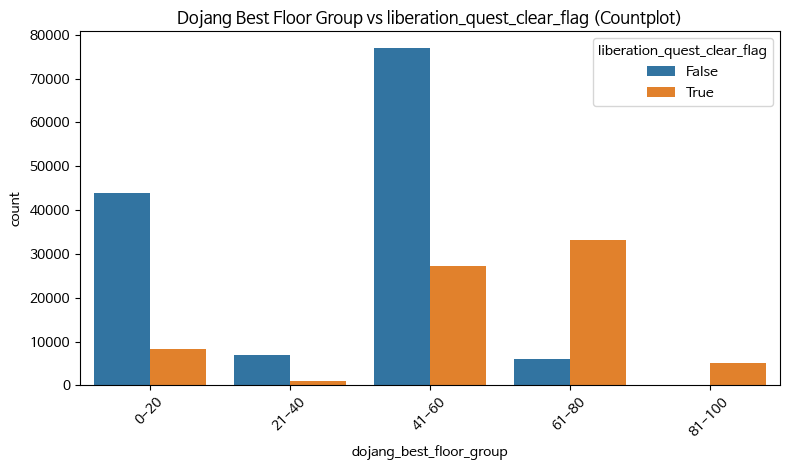

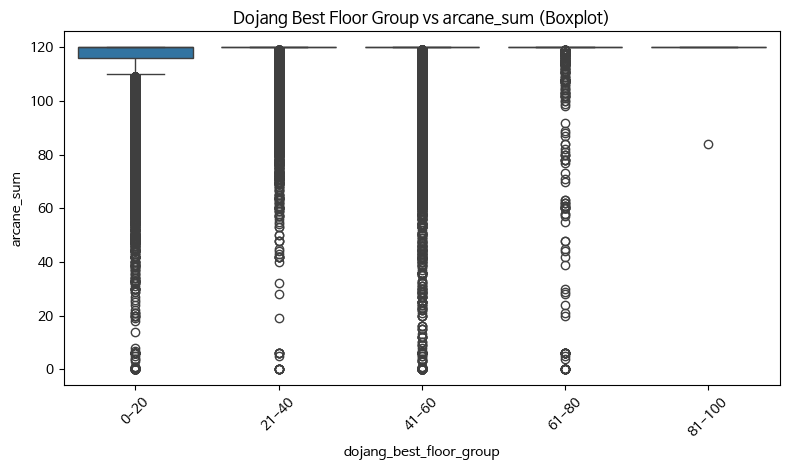

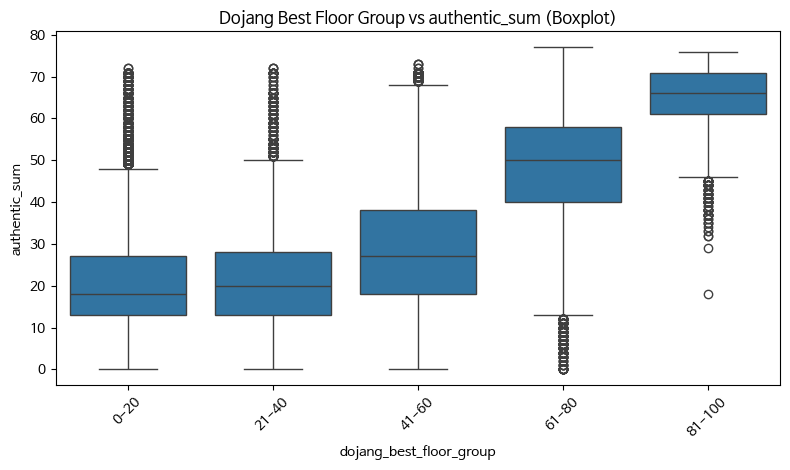

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. dojang_best_floor 구간화
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['dojang_best_floor_group'] = pd.cut(df['dojang_best_floor'], bins=bins, labels=labels, right=False)

# 2. 시각화할 컬럼 리스트 (event, duration을 뒤로 배치)
columns_to_plot = [
    'world_name', 'character_gender', 'character_class',
    'guild_status', 'access_flag', 'liberation_quest_clear_flag',
    'arcane_sum', 'authentic_sum', 'dojang_best_floor',
    'union_level', 'event', 'duration'
]

# 범주형 컬럼
categorical_cols = [
    'world_name', 'character_gender', 'character_class',
    'guild_status', 'access_flag', 'liberation_quest_clear_flag', 'event'
]

# 시각화 시작
for col in columns_to_plot:
    plt.figure(figsize=(8, 4.8))

    if col in categorical_cols:
        # 범주형 변수에 대해 countplot 사용
        if col == 'guild_status':
            sns.countplot(x='dojang_best_floor_group', hue=col, data=df, hue_order=['미가입', '가입'])
        else:
            sns.countplot(x='dojang_best_floor_group', hue=col, data=df)
        plt.title(f"Dojang Best Floor Group vs {col} (Countplot)")
    else:
        # 수치형 변수에 대해 boxplot 사용
        sns.boxplot(x='dojang_best_floor_group', y=col, data=df)
        plt.title(f"Dojang Best Floor Group vs {col} (Boxplot)")

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd

# 1. dojang_best_floor 구간화
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['dojang_best_floor_group'] = pd.cut(df['dojang_best_floor'], bins=bins, labels=labels, right=False)

# 2. 시각화할 컬럼 리스트 (event, duration을 뒤로 배치)
columns_to_plot = [
    'world_name', 'character_gender', 'character_class',
    'guild_status', 'access_flag', 'liberation_quest_clear_flag',
    'arcane_sum', 'authentic_sum', 'dojang_best_floor',
    'union_level', 'event', 'duration'
]

# 범주형 컬럼
categorical_cols = [
    'world_name', 'character_gender', 'character_class',
    'guild_status', 'access_flag', 'liberation_quest_clear_flag', 'event'
]

# 3. 수치적으로 출력
for col in columns_to_plot:
    print(f"\n====== {col} : Dojang Best Floor Group별 통계 ======")

    if col in categorical_cols:
        # 범주형: dojang_best_floor_group별 빈도수와 비율
        count_table = pd.crosstab(df[col], df['dojang_best_floor_group'], normalize='columns')
        print(count_table)
    else:
        # 수치형: dojang_best_floor_group별 평균, 표준편차, 최소, 최대
        mean_std_table = df.groupby('dojang_best_floor_group')[col].agg(['mean', 'std', 'min', 'max', 'count']).round(2)
        print(mean_std_table)


====== world_name : Dojang Best Floor Group별 통계 ======
dojang_best_floor_group      0-20     21-40     41-60     61-80    81-100
world_name                                                               
노바                       0.001551  0.002371  0.002227  0.001860  0.000963
레드                       0.006454  0.006862  0.008246  0.007134  0.006932
루나                       0.213640  0.210480  0.198391  0.203511  0.208357
버닝                       0.000000  0.000000  0.000010  0.000000  0.000000
베라                       0.119432  0.123269  0.129003  0.118662  0.099365
스카니아                     0.224652  0.219339  0.204938  0.195536  0.195841
아케인                      0.002375  0.003618  0.003091  0.002574  0.002118
엘리시움                     0.177175  0.165939  0.171771  0.189268  0.216830
오로라                      0.065404  0.077480  0.086226  0.069892  0.053726
유니온                      0.017850  0.017218  0.016771  0.016537  0.020412
이노시스                     0.013674  0.013350  0.017280  0

<ipython-input-28-937decb178ba>:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_std_table = df.groupby('dojang_best_floor_group')[col].agg(['mean', 'std', 'min', 'max', 'count']).round(2)
<ipython-input-28-937decb178ba>:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_std_table = df.groupby('dojang_best_floor_group')[col].agg(['mean', 'std', 'min', 'max', 'count']).round(2)
<ipython-input-28-937decb178ba>:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt

# 핵심가설

1. 길드 미가입자는 이탈율이 높다

2. 해방퀘스트 false인 사람의 이탈율은 높다.

In [ ]:
# 'leaver' 컬럼 생성: event == 1이면 '이탈', event == 0이면 '유지'
df['leaver'] = df['event'].apply(lambda x: '이탈' if x == 1 else '유지')

=== 길드 가입 여부별 이탈율(%) ===
leaver           유지     이탈
guild_status              
가입            91.11   8.89
미가입           74.35  25.65


<Figure size 600x400 with 0 Axes>

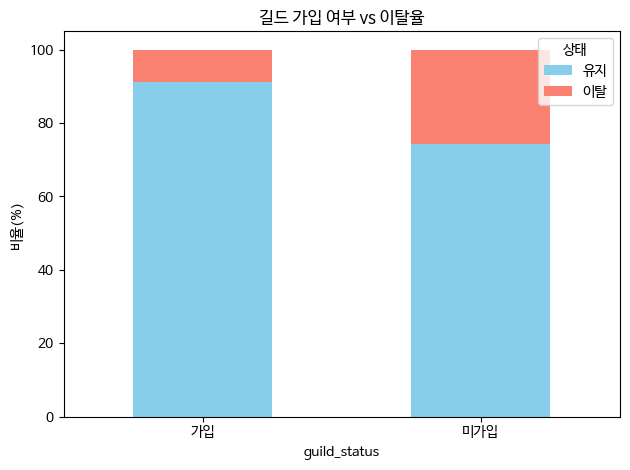

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 길드 가입 여부 vs 이탈율 교차표
guild_cross = pd.crosstab(df['guild_status'], df['leaver'], normalize='index') * 100
print("=== 길드 가입 여부별 이탈율(%) ===")
print(guild_cross.round(2))

# 시각화
plt.figure(figsize=(6,4))
guild_cross.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('길드 가입 여부 vs 이탈율')
plt.ylabel('비율(%)')
plt.xticks(rotation=0)
plt.legend(title='상태', loc='upper right')
plt.tight_layout()
plt.show()

=== 해방 퀘스트 완료 여부별 이탈율(%) ===
leaver                          유지     이탈
liberation_quest_clear_flag              
False                        87.65  12.35
True                         94.54   5.46


<Figure size 600x400 with 0 Axes>

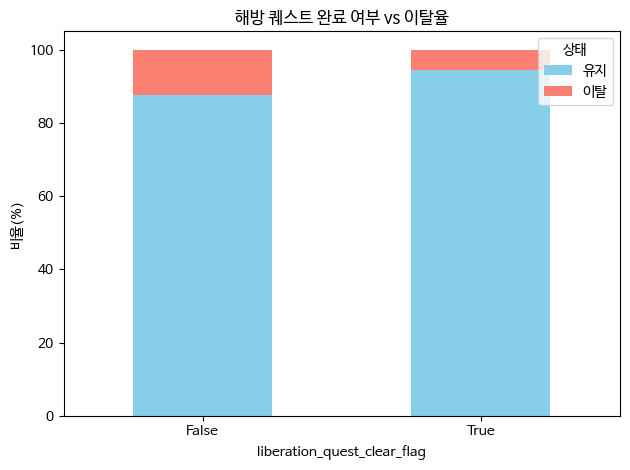

In [ ]:
# 해방 퀘스트 완료 여부 vs 이탈율 교차표
quest_cross = pd.crosstab(df['liberation_quest_clear_flag'], df['leaver'], normalize='index') * 100
print("=== 해방 퀘스트 완료 여부별 이탈율(%) ===")
print(quest_cross.round(2))

# 시각화
plt.figure(figsize=(6,4))
quest_cross.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('해방 퀘스트 완료 여부 vs 이탈율')
plt.ylabel('비율(%)')
plt.xticks(rotation=0)
plt.legend(title='상태', loc='upper right')
plt.tight_layout()
plt.show()

길드 가입자: 이탈율 8.89%

길드 미가입자: 이탈율 25.65%

-> 미가입자의 이탈율이 약 3배 높음.

해방퀘스트 완료자: 이탈율 5.46%

해방퀘스트 미완료자: 이탈율 12.35%

-> 퀘스트 미완료자의 이탈율이 2배 이상 높음.

# 새 섹션

In [ ]:
import pandas as pd

# 먼저 필요한 그룹화된 컬럼을 만들자 (만약 아직 없으면)
# (이미 있으면 이 부분은 건너뛰어도 됨)

# 캐릭터 레벨 구간
level_bins = [0, 100, 200, 220, 240, 260, 280, 300]
level_labels = ['0-100', '101-200', '201-220', '221-240', '241-260', '261-280', '281-300']
df['character_level_group'] = pd.cut(df['character_level'], bins=level_bins, labels=level_labels, right=True)

# 무릉도장 층수 구간
dojang_bins = [0, 20, 40, 60, 80, 100]
dojang_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['dojang_best_floor_group'] = pd.cut(df['dojang_best_floor'], bins=dojang_bins, labels=dojang_labels, right=True)

# 아케인 심볼 레벨 합 구간
arcane_bins = [0, 30, 90, 150, 210]
arcane_labels = ['0-30', '31-90', '91-150', '151-210']
df['arcane_sum_group'] = pd.cut(df['arcane_sum'], bins=arcane_bins, labels=arcane_labels, right=True)

# 어센틱 심볼 레벨 합 구간
authentic_bins = [0, 30, 90, 150]
authentic_labels = ['0-30', '31-90', '91-150']
df['authentic_sum_group'] = pd.cut(df['authentic_sum'], bins=authentic_bins, labels=authentic_labels, right=True)

# 유니온 레벨 구간
union_bins = [0, 2000, 4000, 6000, 8000, 10000]
union_labels = ['0-2000', '2001-4000', '4001-6000', '6001-8000', '8001-10000']
df['union_level_group'] = pd.cut(df['union_level'], bins=union_bins, labels=union_labels, right=True)

# -------------------------------------------------------------------

# 비교할 컬럼 리스트 (그룹화된 컬럼 포함)
compare_columns = [
    'guild_status', 'liberation_quest_clear_flag', 'access_flag',
    'character_gender', 'character_class', 'world_name',
    'character_level_group', 'dojang_best_floor_group',
    'arcane_sum_group', 'authentic_sum_group', 'union_level_group'
]

# 결과 저장할 딕셔너리
results = {}

# 각각에 대해 이탈율(event==1) 계산
for col in compare_columns:
    temp = pd.crosstab(df[col], df['event'], normalize='index') * 100
    temp = temp.rename(columns={0: '유지율(%)', 1: '이탈율(%)'})
    results[col] = temp

# 결과 출력
for col, result in results.items():
    print(f"=== {col} 별 이탈율(%) ===")
    print(result.round(2))
    print("\n")

=== guild_status 별 이탈율(%) ===
event         유지율(%)  이탈율(%)
guild_status                
가입             91.11    8.89
미가입            74.35   25.65


=== liberation_quest_clear_flag 별 이탈율(%) ===
event                        유지율(%)  이탈율(%)
liberation_quest_clear_flag                
False                         87.65   12.35
True                          94.54    5.46


=== access_flag 별 이탈율(%) ===
event        유지율(%)  이탈율(%)
access_flag                
True          90.12    9.88


=== character_gender 별 이탈율(%) ===
event             유지율(%)  이탈율(%)
character_gender                
기타                 92.31    7.69
남                  89.86   10.14
여                  90.26    9.74


=== character_class 별 이탈율(%) ===
event            유지율(%)  이탈율(%)
character_class                
나이트로드             90.14    9.86
나이트워커             85.63   14.37
다크나이트             92.35    7.65
데몬슬레이어            90.85    9.15
데몬어벤져             91.60    8.40
듀얼블레이더            92.09    7.91
라라                88.44 

=== 도장 기록(층수 그룹)별 이탈율(%) ===
leaver                      유지     이탈
dojang_best_floor_group              
0-20                     90.18   9.82
21-40                    88.56  11.44
41-60                    89.58  10.42
61-80                    94.77   5.23
81-100                   97.94   2.06


<Figure size 800x500 with 0 Axes>

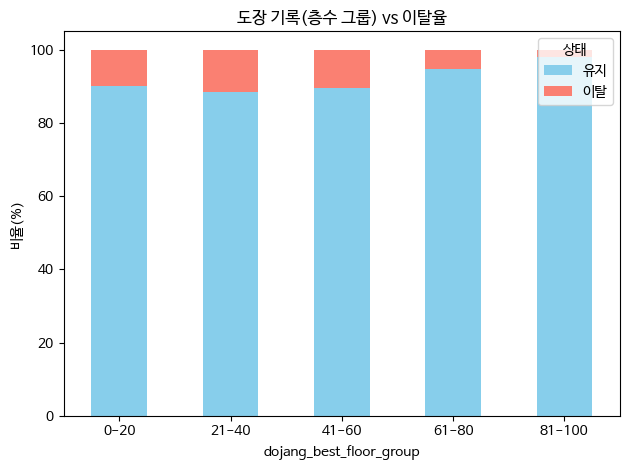

=== 유니온 레벨 그룹별 이탈율(%) ===
leaver                유지     이탈
union_level_group              
0-2000             83.62  16.38
2001-4000          82.66  17.34
4001-6000          81.84  18.16
6001-8000          81.03  18.97
8001-10000         91.13   8.87


<Figure size 800x500 with 0 Axes>

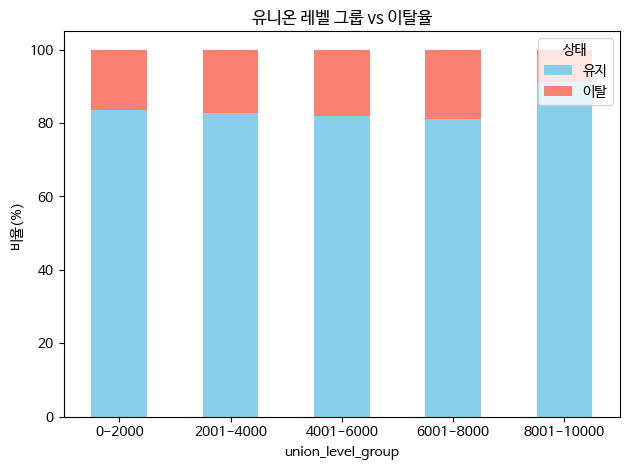

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 도장 기록(층수 그룹) vs 이탈율 교차표
dojang_cross = pd.crosstab(df['dojang_best_floor_group'], df['leaver'], normalize='index') * 100
print("=== 도장 기록(층수 그룹)별 이탈율(%) ===")
print(dojang_cross.round(2))

# 시각화
plt.figure(figsize=(8,5))
dojang_cross.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('도장 기록(층수 그룹) vs 이탈율')
plt.ylabel('비율(%)')
plt.xticks(rotation=0)
plt.legend(title='상태', loc='upper right')
plt.tight_layout()
plt.show()

# 유니온 레벨 그룹 vs 이탈율 교차표
union_cross = pd.crosstab(df['union_level_group'], df['leaver'], normalize='index') * 100
print("=== 유니온 레벨 그룹별 이탈율(%) ===")
print(union_cross.round(2))

# 시각화
plt.figure(figsize=(8,5))
union_cross.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('유니온 레벨 그룹 vs 이탈율')
plt.ylabel('비율(%)')
plt.xticks(rotation=0)
plt.legend(title='상태', loc='upper right')
plt.tight_layout()
plt.show()

가설: 무릉도장 기록이 높을수록 이탈율이 낮다.

0-20층: 이탈율 9.82%

21-40층: 이탈율 11.44%

41-60층: 이탈율 10.42%

61-80층: 이탈율 5.23%

81-100층: 이탈율 2.06%

-> 무릉도장 기록이 61층 이상일 경우, 이탈율이 현저히 낮아지며, 81-100층에서는 이탈율이 2% 이하로 매우 낮아짐.

무릉의 경우 0층에 분포가 너무 많아서 데이터의 불균형이 생김.

빼자니 8만행의 데이터가 사라짐



가설: 유니온 레벨이 높을수록 이탈율이 낮다.

0-2000레벨: 이탈율 16.38%

2001-4000레벨: 이탈율 17.34%

4001-6000레벨: 이탈율 18.16%

6001-8000레벨: 이탈율 18.97%

8001-10000레벨: 이탈율 8.87%

-> 유니온 레벨이 8001 이상일 경우, 이탈율이 현저히 낮아지며, 0-2000레벨과 비교했을 때 이탈율이 약 2배 낮음.

이건 기각

# 핵심 가설 추론&통계

In [ ]:
import scipy.stats as stats
import numpy as np

# 1. 교차표
guild_ct = pd.crosstab(df['guild_status'], df['leaver'])

# 2. 카이제곱 검정
chi2, p, dof, expected = stats.chi2_contingency(guild_ct)
print("=== 길드 가입 여부 vs 이탈율 - 카이제곱 검정 결과 ===")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print()

# 3. 크래머의 V 계산
n = guild_ct.sum().sum()  # 전체 데이터 수
cramers_v = np.sqrt(chi2 / (n * (min(guild_ct.shape)-1)))
print(f"Cramér's V: {cramers_v:.4f}")

=== 길드 가입 여부 vs 이탈율 - 카이제곱 검정 결과 ===
Chi2 Statistic: 3649.7920
P-value: 0.0000
Degrees of Freedom: 1

Cramér's V: 0.1322


p-value < 0.05 -> 길드 가입 여부와 이탈율은 통계적으로 유의미한 관련됨

Cramér's V = 0.1322 → "약한 상관관계"

In [ ]:
# 1. 교차표
quest_ct = pd.crosstab(df['liberation_quest_clear_flag'], df['leaver'])

# 2. 카이제곱 검정
chi2, p, dof, expected = stats.chi2_contingency(quest_ct)
print("=== 해방 퀘스트 완료 여부 vs 이탈율 - 카이제곱 검정 결과 ===")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print()

# 3. 크래머의 V 계산
n = quest_ct.sum().sum()  # 전체 데이터 수
cramers_v = np.sqrt(chi2 / (n * (min(quest_ct.shape)-1)))
print(f"Cramér's V: {cramers_v:.4f}")

=== 해방 퀘스트 완료 여부 vs 이탈율 - 카이제곱 검정 결과 ===
Chi2 Statistic: 2562.6875
P-value: 0.0000
Degrees of Freedom: 1

Cramér's V: 0.1108


p-value < 0.05 -> 해방퀘스트 완료 여부와 이탈율은 통계적으로 유의미한 관련됨

Cramér's V =  0.1108 → "약한 상관관계"

Kaplan-Meier Curve

In [ ]:
%%capture
!pip install lifelines

In [ ]:
# 1. 결측치 확인
print(df.isnull().sum())

ocid                                0
exp_1010                            0
ranking                             0
character_name                      0
world_name                          0
character_gender                    0
character_class                     0
character_class_level               0
character_level                     0
character_exp                       0
character_exp_rate                  0
character_guild_name                0
character_date_create               0
access_flag                         0
liberation_quest_clear_flag         0
popularity                          0
arcane_sum                          0
authentic_sum                       0
set_absorlab_count                  0
set_lubatiss_count                  0
set_arcane_count                    0
set_eternal_count                   0
dojang_best_floor                   0
union_level                         0
union_artifact_level                0
union_artifact_exp                  0
union_artifa

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# 필요한 컬럼만 남기고 나머지는 삭제
df_cleaned = df[['ocid', 'exp_1010', 'ranking', 'character_name', 'world_name', 'character_gender',
                 'character_class', 'character_class_level', 'character_level', 'character_exp',
                 'character_exp_rate', 'character_guild_name', 'character_date_create', 'access_flag',
                 'liberation_quest_clear_flag', 'popularity', 'arcane_sum', 'authentic_sum',
                 'set_absorlab_count', 'set_lubatiss_count', 'set_arcane_count', 'set_eternal_count',
                 'dojang_best_floor', 'union_level', 'union_artifact_level', 'union_artifact_exp',
                 'union_artifact_point', 'exp_1017', 'access_1017', 'exp_1024', 'access_1024',
                 'exp_1031', 'access_1031', 'exp_1107', 'access_1107', 'exp_1114', 'access_1114',
                 'exp_1121', 'access_1121', 'exp_1128', 'access_1128', 'exp_1205', 'access_1205',
                 'exp_1212', 'access_1212', 'exp_1219', 'access_1219', 'event', 'duration']]

# leaver 컬럼을 숫자형(0, 1)으로 변환
df_cleaned['leaver'] = df_cleaned['leaver'].map({'유지': 0, '이탈': 1})

# 생존 분석용 컬럼 이름 지정
duration_col = 'duration'   # <- 수정됨: 실제 존재하는 열 이름
event_col = 'leaver'        # 1: 이탈, 0: 유지

kmf = KaplanMeierFitter()

# 1. 길드 가입 여부 그룹별 Kaplan-Meier 곡선
plt.figure(figsize=(6, 4))
for group in df_cleaned['guild_status'].unique():
    mask = df_cleaned['guild_status'] == group
    kmf.fit(durations=df_cleaned[mask][duration_col], event_observed=df_cleaned[mask][event_col], label=f'길드: {group}')
    kmf.plot_survival_function(ci_show=False)

plt.title('Kaplan-Meier Curve - 길드 가입 여부에 따른 생존율')
plt.xlabel('경과 일수')
plt.ylabel('생존율 (이탈하지 않은 비율)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 2. 해방 퀘스트 완료 여부 그룹별 Kaplan-Meier 곡선
plt.figure(figsize=(6, 4))
for group in df_cleaned['liberation_quest_clear_flag'].unique():
    mask = df_cleaned['liberation_quest_clear_flag'] == group
    label_name = '해방퀘 완료' if group else '해방퀘 미완료'
    kmf.fit(durations=df_cleaned[mask][duration_col], event_observed=df_cleaned[mask][event_col], label=label_name)
    kmf.plot_survival_function(ci_show=False)

plt.title('Kaplan-Meier Curve - 해방퀘 완료 여부에 따른 생존율')
plt.xlabel('경과 일수')
plt.ylabel('생존율 (이탈하지 않은 비율)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

KeyError: 'leaver'

In [ ]:
from lifelines.statistics import logrank_test

# 가입 여부 이분화: '미가입' vs '길드 가입자'
is_guild_member = df['guild_status'] != '미가입'
is_non_member = df['guild_status'] == '미가입'

# log-rank test 수행
results = logrank_test(
    df[is_guild_member]['duration'], df[is_non_member]['duration'],
    event_observed_A=df[is_guild_member]['leaver'],
    event_observed_B=df[is_non_member]['leaver']
)

print("Log-rank test p-value:", results.p_value)

# 해석 기준
if results.p_value < 0.05:
    print("✅ 길드 가입 여부에 따라 생존율 차이가 통계적으로 유의합니다.")
else:
    print("ℹ️ 길드 가입 여부에 따른 생존율 차이가 통계적으로 유의하지 않습니다.")

Log-rank test p-value: 0.0
✅ 길드 가입 여부에 따라 생존율 차이가 통계적으로 유의합니다.


In [ ]:
from lifelines.statistics import logrank_test

# 해방퀘스트 완료 여부에 따른 그룹 나누기
completed = df['liberation_quest_clear_flag'] == True
not_completed = df['liberation_quest_clear_flag'] == False

# log-rank test 수행
results = logrank_test(
    df[completed]['duration'], df[not_completed]['duration'],
    event_observed_A=df[completed]['leaver'],
    event_observed_B=df[not_completed]['leaver']
)

print("Log-rank test p-value:", results.p_value)

# 해석 기준
if results.p_value < 0.05:
    print("✅ 해방퀘스트 완료 여부에 따라 생존율 차이가 통계적으로 유의합니다.")
else:
    print("ℹ️ 해방퀘스트 완료 여부에 따른 생존율 차이가 통계적으로 유의하지 않습니다.")

Log-rank test p-value: 0.0
✅ 해방퀘스트 완료 여부에 따라 생존율 차이가 통계적으로 유의합니다.


In [ ]:
from lifelines import CoxPHFitter

# 분석용 데이터프레임 준비
df['guild_binary'] = df['guild_status'].apply(lambda x: 0 if x == '미가입' else 1)

# 필요한 컬럼만 선택
cox_df = df[['duration', 'leaver', 'guild_binary', 'liberation_quest_clear_flag']].copy()

# 모델 적합
cph = CoxPHFitter()
cph.fit(cox_df, duration_col='duration', event_col='leaver')

# 결과 출력
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 208836 total observations, 188210 right-censored observations>
             duration col = 'duration'
                event col = 'leaver'
      baseline estimation = breslow
   number of observations = 208836
number of events observed = 20626
   partial log-likelihood = -249149.17
         time fit was run = 2025-04-29 05:13:31 UTC

---
                             coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                    
guild_binary                -1.00      0.37      0.02           -1.04           -0.97                0.35                0.38
liberation_quest_clear_flag -0.75      0.47      0.02           -0.78           -0.71                0.46                0.49

                             cmp to      z      p  -log2(p)
covariate                                                  
guild_binary                   0.00 -51.09 <0.005       inf
liberation_quest_clear_flag    0.00 -42.24 <0.005       inf
---
Concordance = 0.62
Partial AIC = 498302.34
log-likelihood ratio test = 4902.32 on 2 df
-log2(p) of ll-ratio test = inf

Cox PH: 캐릭터가 이탈할 위험이 특정 조건(길드가입여부, 해방퀘 완료)에 따라 얼마나 달라지는 지 분석

결과는 Hazard Ratio (위험비)로 확인함

1보다 크면 이탈 위험이 증가

1보다 작으면 이탈 위험이 감소

1이면 차이가 없음

guild_binary: 0.37 -> 길드에 가입한 캐릭터는 이탈할 위험이 63% 감소함

liberation_quest_clear_flag: 0.47 -> 해방 퀘스트를 완료한 캐릭터는 이탈 위험이 53% 감소함

결론)
길드 가입 여부와 해방 퀘스트 완료 여부 모두 이탈 위험 감소와 관련이 있다는 것을 확인할 수 있음.

일반적인경우

가설 -> EDA -> 추론&통계

우리의 경우 생존분석을 해야하니깐

Kaplan-Meier Curve -> log-rank -> Cox PH

# Time-Varying

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 시각화 시 한글 깨짐 방지 위한 폰트 설치 및 적용

%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [ ]:
# 라이브러리 불러오기
from google.colab import drive
import pandas as pd

# Google Drive 마운트
drive.mount('/content/drive')

# 파일 경로
file_path = '/content/drive/MyDrive/데이터톤_메이플/캐릭터 레벨 기준/time_varying_event.csv'

# CSV 파일 불러오기
df = pd.read_csv(file_path)

# 결측치 확인
print(df.isna().sum())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-3-c8d2b890df6b>:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


ocid                              0
ranking                        2945
character_name                    0
world_name                        0
character_gender                  0
character_class                   0
character_class_level             0
character_guild_name              0
character_date_create             0
liberation_quest_clear_flag       0
character_level_start             0
character_exp_start               0
popularity_start                  0
arcane_sum_start                  0
authentic_sum_start               0
set_absorlab_count_start          0
set_lubatiss_count_start          0
set_arcane_count_start            0
set_eternal_count_start           0
dojang_best_floor_start           0
union_level_start                 0
union_artifact_level_start        0
union_artifact_exp_start          0
union_artifact_point_start        0
character_level_stop              0
character_exp_stop                0
popularity_stop                   0
arcane_sum_stop             

In [ ]:
print(df.head())

                                                ocid   ranking character_name  \
0  0000d8ee8654d3b7f6cb5b3fddde5b9fefe8d04e6d233b...    309826             넝일   
1  0000d8ee8654d3b7f6cb5b3fddde5b9fefe8d04e6d233b...  313001.0             넝일   
2  0000d8ee8654d3b7f6cb5b3fddde5b9fefe8d04e6d233b...  315733.0             넝일   
3  0000d8ee8654d3b7f6cb5b3fddde5b9fefe8d04e6d233b...  318142.0             넝일   
4  0000d8ee8654d3b7f6cb5b3fddde5b9fefe8d04e6d233b...  320628.0             넝일   

  world_name character_gender character_class  character_class_level  \
0       엘리시움                여           배틀메이지                    6.0   
1       엘리시움                여           배틀메이지                    6.0   
2       엘리시움                여           배틀메이지                    6.0   
3       엘리시움                여           배틀메이지                    6.0   
4       엘리시움                여           배틀메이지                    6.0   

  character_guild_name   character_date_create  liberation_quest_clear_flag  \
0

In [ ]:
# 전체 행 수 확인
total_rows = len(df)
print(f"전체 행 수: {total_rows}개")

전체 행 수: 1799762개


Group A: duration == 9 & event == 0

Group B: 이탈한 경우

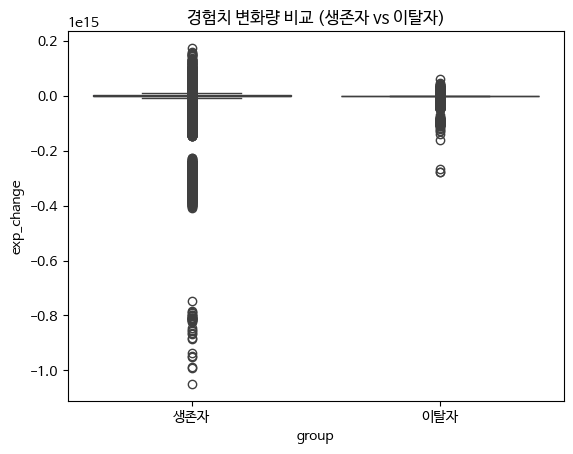

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df['group'] = df.apply(lambda row: '생존자' if row['duration'] == 9 and row['event'] == 0 else '이탈자', axis=1)

sns.boxplot(x='group', y='exp_change', data=df)
plt.title('경험치 변화량 비교 (생존자 vs 이탈자)')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


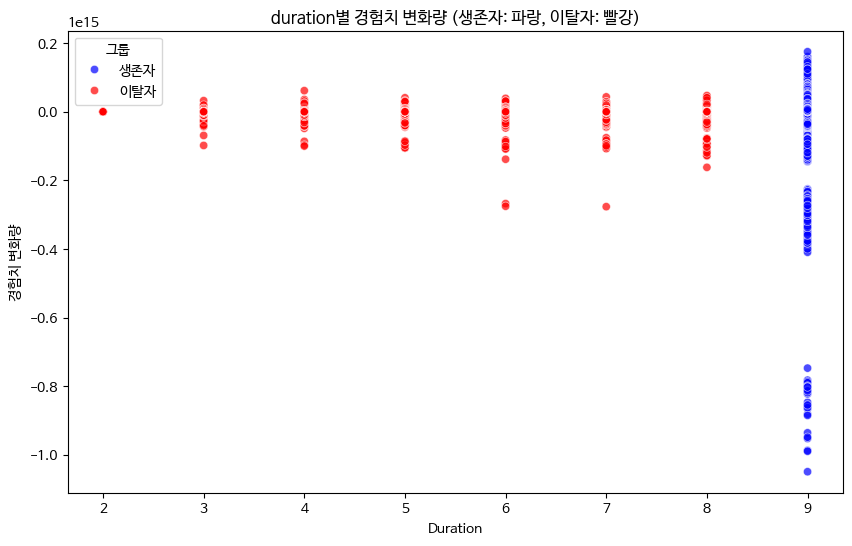

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 그룹 라벨링
df['group'] = df.apply(lambda row: '생존자' if row['duration'] == 9 and row['event'] == 0 else '이탈자', axis=1)

# 색상 매핑
palette = {'생존자': 'blue', '이탈자': 'red'}

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='duration', y='exp_change', hue='group', palette=palette, alpha=0.7)
plt.title('duration별 경험치 변화량 (생존자: 파랑, 이탈자: 빨강)')
plt.xlabel('Duration')
plt.ylabel('경험치 변화량')
plt.legend(title='그룹')
plt.show()

In [ ]:
# 전처리: character_class_level == 6 필터링
df_filtered = df[df['character_class_level'] == 6]

# 이탈자 그룹 정의 (duration이 9가 아니거나 event가 0이 아닌 경우)
leavers = df_filtered[~((df_filtered['duration'] == 9) & (df_filtered['event'] == 0))]

In [ ]:
# 원본 데이터 df에서 필터링된 데이터 df_filtered의 행 수
num_rows_original = len(df)
num_rows_filtered = len(df_filtered)

# 'duration'과 'event' 조건에 맞춰서 이탈자(leavers) 데이터의 행 수
num_rows_leavers = len(leavers)

# 결과 출력
print(f"원본 데이터 전체 행 수: {num_rows_original}개")
print(f"character_class_level == 6 필터링 후 df_filtered 행 수: {num_rows_filtered}개")
print(f"이탈자 조건을 만족하는 leavers 행 수: {num_rows_leavers}개")

원본 데이터 전체 행 수: 1799762개
character_class_level == 6 필터링 후 df_filtered 행 수: 1796345개
이탈자 조건을 만족하는 leavers 행 수: 87233개


In [ ]:
# 원 데이터에서 각 월드별 행 수
world_count_original = df['world_name'].value_counts()

# 이탈자 조건을 만족하는 leavers 데이터에서 각 월드별 행 수
world_count_leavers = leavers['world_name'].value_counts()

# 원 데이터 전체 행 수
total_rows_original = len(df)

# 이탈자 조건을 만족하는 leavers 데이터 전체 행 수
total_rows_leavers = len(leavers)

# 출력
print("🔸 원 데이터에서 각 월드별 행 수:")
print(world_count_original)
print(f"\n🔸 원 데이터 전체 행 수: {total_rows_original}개")

print("\n🔸 이탈자 조건을 만족하는 leavers 데이터에서 각 월드별 행 수:")
print(world_count_leavers)
print(f"\n🔸 이탈자 조건을 만족하는 leavers 데이터 전체 행 수: {total_rows_leavers}개")

🔸 원 데이터에서 각 월드별 행 수:
world_name
스카니아    374409
루나      367151
엘리시움    319748
크로아     272296
베라      222289
오로라     137462
유니온      31132
이노시스     28602
제니스      24272
레드       13569
아케인       5121
노바        3566
리부트        118
리부트2        27
Name: count, dtype: int64

🔸 원 데이터 전체 행 수: 1799762개

🔸 이탈자 조건을 만족하는 leavers 데이터에서 각 월드별 행 수:
world_name
스카니아    18845
루나      17414
엘리시움    14913
크로아     12987
베라      11334
오로라      7529
유니온      1199
이노시스     1192
제니스       908
레드        576
아케인       182
노바        153
리부트         1
Name: count, dtype: int64

🔸 이탈자 조건을 만족하는 leavers 데이터 전체 행 수: 87233개


In [ ]:
print("🔸 이탈자 월드 분포:")
print(leavers['world_name'].value_counts(normalize=True).mul(100).round(2).sort_values(ascending=False))

🔸 이탈자 월드 분포:
world_name
스카니아    21.60
루나      19.96
엘리시움    17.10
크로아     14.89
베라      12.99
오로라      8.63
유니온      1.37
이노시스     1.37
제니스      1.04
레드       0.66
아케인      0.21
노바       0.18
리부트      0.00
Name: proportion, dtype: float64


In [ ]:
# character_class_level == 6 조건을 만족하는 데이터
df_filtered_class_level_6 = df[df['character_class_level'] == 6]

# 리부트 월드의 고유 ocid 출력
reboot_ocids = df_filtered_class_level_6[df_filtered_class_level_6['world_name'] == '리부트']['ocid'].unique()
print("🔸 리부트 월드 고유 ocid 리스트:")
print(list(reboot_ocids))

# 리부트2 월드의 고유 ocid 출력
reboot2_ocids = df_filtered_class_level_6[df_filtered_class_level_6['world_name'] == '리부트2']['ocid'].unique()
print("\n🔸 리부트2 월드 고유 ocid 리스트:")
print(list(reboot2_ocids))

🔸 리부트 월드 고유 ocid 리스트:
['078a8d1a09e2ea6f370016dee51c52d0', '19ef1a486e93b7c66df9c58faada3636', '2eaee8491645cd83b692755c6871e827', '369dd4a3037748b67475dda468ffc0e4efe8d04e6d233bd35cf2fabdeb93fb0d', '5308ddc632805e3e452520444afe299befe8d04e6d233bd35cf2fabdeb93fb0d', '616283489ace318872d6f0cd2a6ac4e1', '6a4b463c72dce569b23d98afef8fcd05', '71f0b98d89bc23c202c05265943c6bc5', '7e24b6ce24e58138322dbd0136e89666', '90da96cdb2989da5837a1e2f0192eff4', '9eff3012f7aaa4b9ffcff2da97cada0a', 'bb8599971672667eb989098fa4524c88efe8d04e6d233bd35cf2fabdeb93fb0d', 'd0a50e8ead72d6468c872675afb495feefe8d04e6d233bd35cf2fabdeb93fb0d', 'd6fde33ffc1b86bd5fdef84d811d1f05efe8d04e6d233bd35cf2fabdeb93fb0d', 'd8e4494e64b1989c5e6e878d7b9c4c1c', 'e8ba301f60ab98692d2236db5f62b5eb', 'f12df71adf1cb8461e9ef6d7348fd221', 'f875503553ae169cfa2ea8acc92c5506', 'fbed6b559f00085f80fbe0d6857aced8']

🔸 리부트2 월드 고유 ocid 리스트:
['09fe715758f3f0a4298876d30db06a78', '3b2166fca378cbd08edaf70c9b49b585', '9674cb12e9e03484488cc3deb9031c40', 

In [ ]:
# 전체 ocid 리스트 (리부트 + 리부트2)
target_ocids = [
    # 🔸 리부트
    '078a8d1a09e2ea6f370016dee51c52d0', '19ef1a486e93b7c66df9c58faada3636',
    '2eaee8491645cd83b692755c6871e827',
    '369dd4a3037748b67475dda468ffc0e4efe8d04e6d233bd35cf2fabdeb93fb0d',
    '5308ddc632805e3e452520444afe299befe8d04e6d233bd35cf2fabdeb93fb0d',
    '616283489ace318872d6f0cd2a6ac4e1', '6a4b463c72dce569b23d98afef8fcd05',
    '71f0b98d89bc23c202c05265943c6bc5', '7e24b6ce24e58138322dbd0136e89666',
    '90da96cdb2989da5837a1e2f0192eff4', '9eff3012f7aaa4b9ffcff2da97cada0a',
    'bb8599971672667eb989098fa4524c88efe8d04e6d233bd35cf2fabdeb93fb0d',
    'd0a50e8ead72d6468c872675afb495feefe8d04e6d233bd35cf2fabdeb93fb0d',
    'd6fde33ffc1b86bd5fdef84d811d1f05efe8d04e6d233bd35cf2fabdeb93fb0d',
    'd8e4494e64b1989c5e6e878d7b9c4c1c', 'e8ba301f60ab98692d2236db5f62b5eb',
    'f12df71adf1cb8461e9ef6d7348fd221', 'f875503553ae169cfa2ea8acc92c5506',
    'fbed6b559f00085f80fbe0d6857aced8',

    # 🔸 리부트2
    '09fe715758f3f0a4298876d30db06a78', '3b2166fca378cbd08edaf70c9b49b585',
    '9674cb12e9e03484488cc3deb9031c40', 'b4bfd9886db9f78859a06730182a7aa7'
]

# 각 ocid의 행 번호(index)를 찾아 출력
for ocid in target_ocids:
    indices = df.index[df['ocid'] == ocid].tolist()
    if indices:
        print(f"🔹 ocid {ocid} → 행 번호: {indices}")
    else:
        print(f"⚠️ ocid {ocid} → 데이터프레임에 없음")

🔹 ocid 078a8d1a09e2ea6f370016dee51c52d0 → 행 번호: [53803, 53804, 53805, 53806, 53807, 53808, 53809, 53810, 53811]
🔹 ocid 19ef1a486e93b7c66df9c58faada3636 → 행 번호: [182350, 182351, 182352, 182353, 182354, 182355, 182356, 182357, 182358]
🔹 ocid 2eaee8491645cd83b692755c6871e827 → 행 번호: [327591, 327592, 327593, 327594, 327595, 327596, 327597, 327598, 327599]
🔹 ocid 369dd4a3037748b67475dda468ffc0e4efe8d04e6d233bd35cf2fabdeb93fb0d → 행 번호: [384293, 384294, 384295, 384296, 384297, 384298, 384299, 384300, 384301]
🔹 ocid 5308ddc632805e3e452520444afe299befe8d04e6d233bd35cf2fabdeb93fb0d → 행 번호: [585002, 585003, 585004, 585005, 585006, 585007, 585008, 585009, 585010]
🔹 ocid 616283489ace318872d6f0cd2a6ac4e1 → 행 번호: [686883, 686884, 686885, 686886, 686887, 686888, 686889, 686890, 686891]
🔹 ocid 6a4b463c72dce569b23d98afef8fcd05 → 행 번호: [749727, 749728, 749729, 749730, 749731, 749732, 749733, 749734, 749735]
🔹 ocid 71f0b98d89bc23c202c05265943c6bc5 → 행 번호: [804109, 804110, 804111, 804112, 804113, 804114, 8

갑자기 우리가 봉착한 문제

리부트가 생김

닉네임?이 달라짐

In [ ]:
# 1. 원 데이터에서 character_class_level == 6인 데이터만 필터링
df_filtered_class_level_6 = df[df['character_class_level'] == 6]

# 2. 필터링된 데이터에서 character_class별 행 수
class_count_filtered = df_filtered_class_level_6['character_class'].value_counts()

# 3. 이탈자 데이터에서 character_class별 행 수
leavers_class_count = leavers['character_class'].value_counts()

# 4. 원 데이터에서 각 직업별 행 수 (전체 데이터)
class_count_original = df['character_class'].value_counts()

# 출력
print("🔸 원 데이터 중 character_class_level == 6인 데이터에서 각 직업별 행 수:")
print(class_count_filtered)
print(f"🔹 원 데이터 전체 행 수: {len(df_filtered_class_level_6)}개")

print("\n🔸 이탈자 데이터에서 각 직업별 행 수:")
print(leavers_class_count)
print(f"🔹 이탈자 데이터 전체 행 수: {len(leavers)}개")

🔸 원 데이터 중 character_class_level == 6인 데이터에서 각 직업별 행 수:
character_class
비숍            147794
아델            134386
듀얼블레이더         94325
나이트로드          87281
섀도어            80477
아크메이지(불,독)     70722
윈드브레이커         68461
소울마스터          65925
아크메이지(썬,콜)     63111
나이트워커          56503
히어로            55615
패스파인더          51375
엔젤릭버스터         51299
바이퍼            46906
아크             42934
제로             42553
팬텀             41994
메르세데스          41090
은월             39259
호영             35812
라라             35712
데몬어벤져          34614
팔라딘            32389
다크나이트          30493
보우마스터          26767
캐논마스터          24147
카인             23395
아란             23100
에반             22892
카이저            19639
루미너스           19511
제논             18757
배틀메이지          18096
데몬슬레이어         16764
신궁             13846
캡틴             13515
칼리             13184
키네시스           12809
카데나            12533
플레임위자드         12208
미하일            10747
일리움            10534
메카닉             9880
블래스터            8783
스트라이커

In [ ]:
# 1. character_class_level == 6 조건을 만족하는 데이터
df_filtered_class_level_6 = df[df['character_class_level'] == 6]

# 2. ocid별로 그룹화하여 각 character_class별 행 수 집계
class_count_by_ocid = (
    df_filtered_class_level_6
    .groupby(['ocid', 'character_class'])
    .size()
    .reset_index(name='count')
)

# 3. 각 직업별로 몇 명(ocid 기준)이 있는지 카운트
class_count_unique_ocid = class_count_by_ocid['character_class'].value_counts()

# 출력
print("🔸 ocid 기준, character_class_level == 6인 유저 수(고유 ocid 수):")
print(class_count_unique_ocid)
print(f"\n🔹 전체 고유 ocid 수: {df_filtered_class_level_6['ocid'].nunique()}개")

# 4. 이탈자 데이터에서 동일하게 처리
leavers_class_by_ocid = (
    leavers
    .groupby(['ocid', 'character_class'])
    .size()
    .reset_index(name='count')
)

leavers_class_count_unique_ocid = leavers_class_by_ocid['character_class'].value_counts()

print("\n🔸 이탈자 데이터 기준, ocid별 직업 수 (고유 ocid 기준):")
print(leavers_class_count_unique_ocid)
print(f"\n🔹 이탈자 고유 ocid 수: {leavers['ocid'].nunique()}개")

🔸 ocid 기준, character_class_level == 6인 유저 수(고유 ocid 수):
character_class
비숍            17238
아델            15555
듀얼블레이더        10863
나이트로드         10159
섀도어            9467
아크메이지(불,독)     8275
윈드브레이커         7962
소울마스터          7759
아크메이지(썬,콜)     7342
나이트워커          6725
히어로            6488
엔젤릭버스터         5979
패스파인더          5943
바이퍼            5501
아크             4951
제로             4898
팬텀             4843
메르세데스          4773
은월             4604
라라             4195
호영             4151
데몬어벤져          3996
팔라딘            3758
다크나이트          3504
보우마스터          3105
캐논마스터          2813
아란             2697
카인             2690
에반             2644
루미너스           2280
카이저            2267
제논             2182
배틀메이지          2118
데몬슬레이어         1943
신궁             1607
캡틴             1573
칼리             1535
키네시스           1488
카데나            1442
플레임위자드         1424
미하일            1249
일리움            1235
메카닉            1147
블래스터           1023
스트라이커          1016
와일드헌터           630
Name: co

In [ ]:
print("🔸 이탈자 직업 분포:")
print(leavers['character_class'].value_counts(normalize=True).mul(100).round(2).sort_values(ascending=False))

🔸 이탈자 직업 분포:
character_class
비숍            8.00
아델            6.98
섀도어           5.93
나이트로드         4.88
나이트워커         4.67
소울마스터         4.52
아크메이지(불,독)    4.08
듀얼블레이더        4.07
윈드브레이커        3.87
히어로           3.21
아크메이지(썬,콜)    3.18
바이퍼           3.10
엔젤릭버스터        3.07
패스파인더         2.60
은월            2.51
라라            2.28
메르세데스         2.11
아크            2.00
호영            1.99
팬텀            1.81
제로            1.81
데몬어벤져         1.69
팔라딘           1.68
보우마스터         1.46
캐논마스터         1.37
다크나이트         1.31
아란            1.27
루미너스          1.25
에반            1.12
배틀메이지         1.06
제논            1.06
카인            1.04
카이저           0.99
데몬슬레이어        0.82
캡틴            0.80
신궁            0.75
칼리            0.75
플레임위자드        0.73
일리움           0.66
키네시스          0.65
미하일           0.57
블래스터          0.56
메카닉           0.54
카데나           0.50
스트라이커         0.48
와일드헌터         0.24
Name: proportion, dtype: float64


In [ ]:
# '미가입' 문자열을 정확히 인식하도록 처리
num_no_guild = (leavers['character_guild_name'].fillna("").str.replace(" ", "") == '미가입').sum()

# 나머지는 '미가입이 아닌 모든 것'
num_has_guild = len(leavers) - num_no_guild

# 전체 행 수
total_rows = len(leavers)

# 출력
print(f"🔹 미가입: {num_no_guild}개")
print(f"🔹 가입: {num_has_guild}개")
print(f"🔹 전체 행 수: {total_rows}개")

🔹 미가입: 13986개
🔹 가입: 73247개
🔹 전체 행 수: 87233개


In [ ]:
# '미가입' 문자열을 정확히 인식하도록 처리
leavers['guild_status'] = leavers['character_guild_name'].apply(
    lambda x: '미가입' if pd.isna(x) or str(x).strip().replace(" ", "") == '미가입' else '가입'
)

# 길드 가입 상태 분포 출력
print("🔸 이탈자 길드 가입 상태 분포:")
print(leavers['guild_status'].value_counts(normalize=True).mul(100).round(2))

🔸 이탈자 길드 가입 상태 분포:
guild_status
가입     83.97
미가입    16.03
Name: proportion, dtype: float64


<ipython-input-24-c2d8b60bb47c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leavers['guild_status'] = leavers['character_guild_name'].apply(


In [ ]:
print("🔸 이탈자 해방 퀘스트 완료 여부:")
print(leavers['liberation_quest_clear_flag'].value_counts(normalize=True).mul(100).round(2))

🔸 이탈자 해방 퀘스트 완료 여부:
liberation_quest_clear_flag
False    79.11
True     20.89
Name: proportion, dtype: float64


# Time-varying 두번째

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 시각화 시 한글 깨짐 방지 위한 폰트 설치 및 적용

%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [ ]:
# 라이브러리 불러오기
from google.colab import drive
import pandas as pd

# Google Drive 마운트
drive.mount('/content/drive')

# 파일 경로
file_path = '/content/drive/MyDrive/데이터톤_메이플/캐릭터 레벨 기준/start_stop_with_exp_change.csv'

# CSV 파일 불러오기
df = pd.read_csv(file_path)

# 결측치 확인
print(df.isna().sum())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ocid                              0
ranking                        1830
character_name                    0
world_name                        0
character_gender                  0
character_class                   0
character_class_level             0
character_guild_name              0
character_date_create             0
liberation_quest_clear_flag       0
character_level_start             0
character_exp_start               0
popularity_start                  0
arcane_sum_start                  0
authentic_sum_start               0
set_absorlab_count_start          0
set_lubatiss_count_start          0
set_arcane_count_start            0
set_eternal_count_start           0
dojang_best_floor_start           0
union_level_start                 0
union_artifact_level_start        0
union_artifact_exp_start          0
union_artifact_point_start        0
charact

In [ ]:
print(df.head())

                                                ocid   ranking character_name  \
0  0000d8ee8654d3b7f6cb5b3fddde5b9fefe8d04e6d233b...  309826.0             넝일   
1  0000d8ee8654d3b7f6cb5b3fddde5b9fefe8d04e6d233b...  313001.0             넝일   
2  0000d8ee8654d3b7f6cb5b3fddde5b9fefe8d04e6d233b...  315733.0             넝일   
3  0000d8ee8654d3b7f6cb5b3fddde5b9fefe8d04e6d233b...  318142.0             넝일   
4  0000d8ee8654d3b7f6cb5b3fddde5b9fefe8d04e6d233b...  320628.0             넝일   

  world_name character_gender character_class  character_class_level  \
0       엘리시움                여           배틀메이지                    6.0   
1       엘리시움                여           배틀메이지                    6.0   
2       엘리시움                여           배틀메이지                    6.0   
3       엘리시움                여           배틀메이지                    6.0   
4       엘리시움                여           배틀메이지                    6.0   

  character_guild_name   character_date_create  liberation_quest_clear_flag  \
0

In [ ]:
# character_class_level이 6이고, world_name이 '리부트', '리부트2'가 아닌 데이터 필터링
df_filtered = df[
    (df['character_class_level'] == 6) &
    (~df['world_name'].isin(['리부트', '리부트2']))
]

# 결과 확인 (행 수 및 일부 미리보기)
print(f"필터링된 데이터 수: {len(df_filtered)}")

필터링된 데이터 수: 1790343


In [ ]:
# df_filtered에서 event가 1인 행 개수 확인
event_1_count_filtered = (df_filtered['event'] == 1).sum()

print(f"df_filtered에서 event가 1인 행의 수: {event_1_count_filtered}")

df_filtered에서 event가 1인 행의 수: 20627


In [ ]:
# event == 1인 데이터만 필터링
df_event_1 = df_filtered[df_filtered['event'] == 1]

# ocid별 중복 제거
df_event_1_unique_ocid = df_event_1.drop_duplicates(subset='ocid')

# 전체 행 수, event == 1인 행 수, 비율 계산
total_rows = len(df_filtered)
event_1_rows = len(df_event_1_unique_ocid)
event_1_percentage = (event_1_rows / total_rows) * 100

# 결과 출력
print(f"전체 데이터 수: {total_rows}")
print(f"event가 1인 데이터 (중복된 ocid 제외) 수: {event_1_rows}")
print(f"event가 1인 데이터 비율: {event_1_percentage:.2f}%")
print()

# 1. world_name 별 개수
world_counts = df_event_1_unique_ocid['world_name'].value_counts()
print("1. world_name 별 개수:")
print(world_counts)
print()

# 2. character_class 별 개수
class_counts = df_event_1_unique_ocid['character_class'].value_counts()
print("2. character_class 별 개수:")
print(class_counts)
print()

# 3. character_guild_name에서 '미가입'과 '그 외' 개수
guild_name_counts = df_event_1_unique_ocid['character_guild_name'].apply(lambda x: '미가입' if x == '미가입' else '기타').value_counts()
print("3. character_guild_name '미가입' vs '기타' 개수:")
print(guild_name_counts)
print()

# 4. liberation_quest_clear_flag 분포
liberation_counts = df_event_1_unique_ocid['liberation_quest_clear_flag'].value_counts()
print("4. liberation_quest_clear_flag 분포:")
print(liberation_counts)

전체 데이터 수: 1790343
event가 1인 데이터 (중복된 ocid 제외) 수: 20627
event가 1인 데이터 비율: 1.15%

1. world_name 별 개수:
world_name
스카니아    4422
루나      4177
엘리시움    3498
크로아     3138
베라      2649
오로라     1750
유니온      287
이노시스     272
제니스      221
레드       133
아케인       43
노바        37
Name: count, dtype: int64

2. character_class 별 개수:
character_class
비숍            1668
아델            1427
섀도어           1172
나이트로드          999
나이트워커          967
소울마스터          927
아크메이지(불,독)     862
듀얼블레이더         856
윈드브레이커         784
히어로            677
아크메이지(썬,콜)     651
바이퍼            644
엔젤릭버스터         619
패스파인더          532
은월             523
라라             485
메르세데스          452
아크             406
호영             397
팬텀             389
제로             377
팔라딘            344
데몬어벤져          336
보우마스터          293
캐논마스터          280
아란             275
다크나이트          268
루미너스           252
배틀메이지          228
에반             223
제논             218
카인             213
카이저            201
데몬슬레이어         178
캡틴             157


1. 인기 있는 서버일수록 이탈한 사람들의 수가 많음.

2. 이탈한 사람들 중에서는 비숍과 아델 등의 직업이 많음.

3. 이탈한 사람들 중에서 약 20%가 길드 미가입 상태임.

4. 대부분의 이탈한 유저들이 해방 퀘스트를 완료하지 않은 상태임.

But, 1,2는 대수의 법칙을 고려해야함.



# 머신러닝 넣기 전 인코딩

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 라이브러리 불러오기
from google.colab import drive

# Google Drive 마운트
drive.mount('/content/drive')

# 파일 경로
file_path = '/content/drive/MyDrive/데이터톤_메이플/캐릭터 레벨 기준/start_stop_with_exp_change.csv'

# CSV 파일 불러오기
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
# 1. character_class_level == 6만 필터링
df = df[df['character_class_level'] == 6]

# 2. world_name 인코딩 (일반 서버만 포함, 1~12로 인코딩)
# 일반 서버 목록 정의 (필요 시 수정)
general_servers = ['스카니아', '베라', '루나', '엘리시움', '크로아', '유니온', '제니스', '이노시스', '레드', '오로라', '아케인', '노바']
# 필터링
df = df[df['world_name'].isin(general_servers)].copy()
# 인코딩
world_mapping = {name: i + 1 for i, name in enumerate(general_servers)}
df['world_name_encoded'] = df['world_name'].map(world_mapping)

# 3. character_class 인코딩 (1~46 범위, 오류 시 예외 처리 필요)
unique_classes = sorted(df['character_class'].unique())
class_mapping = {name: i + 1 for i, name in enumerate(unique_classes)}
df['character_class_encoded'] = df['character_class'].map(class_mapping)

# 4. character_guild_name: ‘미가입’ → 0, 그 외 1
df['character_guild_joined'] = df['character_guild_name'].apply(lambda x: 0 if str(x).strip() == '미가입' else 1)

# 5. liberation_quest_clear_flag: True/False → 1/0
df['liberation_flag_encoded'] = df['liberation_quest_clear_flag'].astype(int)

# 6. 날짜 포맷 변환 (필요 시 DateTime으로 변환)
df['character_date_create'] = pd.to_datetime(df['character_date_create'], errors='coerce')
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['stop_date'] = pd.to_datetime(df['stop_date'], errors='coerce')

# 7. 최종 사용할 컬럼만 추출
final_columns = [
    'world_name_encoded',
    'character_class_encoded',
    'character_guild_joined',
    'character_date_create',
    'liberation_flag_encoded',
    'start_date',
    'stop_date',
    'popularity_change',
    'arcane_sum_change',
    'authentic_sum_change',
    'duration',
    'event'
]

df_model = df[final_columns].copy()

In [ ]:
print(df_model.columns)
print(df_model.dtypes)
print(df_model.head())
print(df_model.isna().sum())

Index(['world_name_encoded', 'character_class_encoded',
       'character_guild_joined', 'character_date_create',
       'liberation_flag_encoded', 'start_date', 'stop_date',
       'popularity_change', 'arcane_sum_change', 'authentic_sum_change',
       'duration', 'event'],
      dtype='object')
world_name_encoded                             int64
character_class_encoded                        int64
character_guild_joined                         int64
character_date_create      datetime64[ns, UTC+09:00]
liberation_flag_encoded                        int64
start_date                            datetime64[ns]
stop_date                             datetime64[ns]
popularity_change                            float64
arcane_sum_change                            float64
authentic_sum_change                         float64
duration                                       int64
event                                          int64
dtype: object
   world_name_encoded  character_class_encoded  cha

In [ ]:
from sklearn.model_selection import train_test_split

# 10% 샘플링
df_sampled = df_model.sample(frac=0.1, random_state=42).reset_index(drop=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np

# 입력 변수(X), 목표 변수(y)
X = df_sampled.drop(columns=['event']).copy()
y = df_sampled['event'].copy()

# datetime을 timestamp 정수로 변환
X['character_date_create'] = X['character_date_create'].astype('int64') // 10**9
X['start_date'] = X['start_date'].astype('int64') // 10**9
X['stop_date'] = X['stop_date'].astype('int64') // 10**9

# 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 진행률을 보기 위해 warm_start 사용
n_estimators = 100
model = RandomForestClassifier(n_estimators=1, warm_start=True, random_state=42, class_weight='balanced')

for i in tqdm(range(1, n_estimators + 1), desc="Training Progress"):
    model.set_params(n_estimators=i)
    model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Training Progress:   0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
Training Progress:   1%|          | 1/100 [00:00<00:23,  4.13it/s]/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sampl

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35373
           1       0.96      0.92      0.94       434

    accuracy                           1.00     35807
   macro avg       0.98      0.96      0.97     35807
weighted avg       1.00      1.00      1.00     35807



Precision (정밀도)

event=1로 예측한 것 중 실제로도 이벤트가 있었던 비율 → 96%

→ 오탐(False Positive)이 4%라는 의미

Recall (재현율)

실제 event=1인 것 중 모델이 맞춘 비율 → 92%

→ 미탐(False Negative)이 8% 발생

F1-score

Precision과 Recall의 조화 평균으로, 전체 성능의 균형 척도 → 0.94로 매우 높음

**데이터 불균형이 심함**. -> event=1은 전체의 약 1.2% (434 / 35807)에 불과

In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd

# 샘플링 - 10% 샘플링 (원하는 비율로 수정 가능)
df_sampled = df_sampled.sample(frac=0.1, random_state=42)

# 입력 변수(X), 타깃 변수(y)
X = df_sampled[['world_name_encoded', 'character_class_encoded', 'character_guild_joined',
                'character_date_create', 'liberation_flag_encoded', 'start_date', 'stop_date',
                'popularity_change', 'arcane_sum_change', 'authentic_sum_change']]

y_classification = df_sampled['event']  # 이진 분류 타깃 변수
y_regression = df_sampled['duration']  # 회귀 타깃 변수

# datetime을 숫자형으로 변환 (이미 처리된 것 같지만, 다시 한 번 확인)
X['character_date_create'] = X['character_date_create'].astype('int64') // 10**9
X['start_date'] = X['start_date'].astype('int64') // 10**9
X['stop_date'] = X['stop_date'].astype('int64') // 10**9

# 학습/테스트 분할 (이진 분류용)
X_train, X_test, y_class_train, y_class_test = train_test_split(X, y_classification, test_size=0.2, random_state=42, stratify=y_classification)

# 학습/테스트 분할 (회귀용)
X_train_reg, X_test_reg, y_reg_train, y_reg_test = train_test_split(X, y_regression, test_size=0.2, random_state=42)

# 이진 분류 모델 학습 (event 예측)
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
clf.fit(X_train, y_class_train)

# 회귀 모델 학습 (duration 예측)
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_reg, y_reg_train)

# 예측
y_class_pred = clf.predict(X_test)
y_reg_pred = reg.predict(X_test_reg)

# 평가
print("Event Prediction (Classification) - Classification Report:")
print(classification_report(y_class_test, y_class_pred))

print("Duration Prediction (Regression) - Mean Squared Error:")
print(mean_squared_error(y_reg_test, y_reg_pred))

<ipython-input-8-f1dcb7afad70>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['character_date_create'] = X['character_date_create'].astype('int64') // 10**9
<ipython-input-8-f1dcb7afad70>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['start_date'] = X['start_date'].astype('int64') // 10**9
<ipython-input-8-f1dcb7afad70>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

Event Prediction (Classification) - Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3537
           1       0.00      0.00      0.00        44

    accuracy                           0.99      3581
   macro avg       0.49      0.50      0.50      3581
weighted avg       0.98      0.99      0.98      3581

Duration Prediction (Regression) - Mean Squared Error:
0.7455535800810837


In [ ]:
!pip install tqdm

In [ ]:
import pandas as pd

# world_name 인코딩 (1~12, 일반섭만 넣기)
df['world_name'] = df['world_name'].map(lambda x: 1 if x == '엘리시움' else 0)

# character_class 인코딩 (1~46)
df['character_class'] = df['character_class'].astype('category').cat.codes

# character_class_level 6인 경우만 필터링
df = df[df['character_class_level'] == 6]

# character_guild_name 인코딩 (가입: 1, 미가입: 0)
df['character_guild_name'] = df['character_guild_name'].apply(lambda x: 0 if x == '미가입' else 1)

# character_date_create 타임스탬프 변환
df['character_date_create'] = pd.to_datetime(df['character_date_create'])
df['character_date_create'] = df['character_date_create'].astype('int64') // 10**9  # 타임스탬프 (초 단위)

# liberation_quest_clear_flag 인코딩 (True: 1, False: 0)
df['liberation_quest_clear_flag'] = df['liberation_quest_clear_flag'].apply(lambda x: 1 if x == True else 0)

# start_date와 stop_date는 그대로 사용 (필요시 날짜로 변환할 수 있음)
df['start_date'] = pd.to_datetime(df['start_date'])
df['stop_date'] = pd.to_datetime(df['stop_date'])

# 타겟 값은 duration과 event
target = df[['duration', 'event']]

# 사용할 특성들
features = df[['world_name', 'character_class', 'character_guild_name',
               'character_date_create', 'liberation_quest_clear_flag',
               'start_date', 'stop_date', 'popularity_change',
               'arcane_sum_change', 'authentic_sum_change']]

# 결과 출력 (필요한 데이터와 타겟을 확인)
print("Preprocessed Features:")
print(features.head())

print("\nTarget Values:")
print(target.head())

Preprocessed Features:
   world_name  character_class  character_guild_name  character_date_create  \
0           1               12                     1             1544454000   
1           1               12                     1             1544454000   
2           1               12                     1             1544454000   
3           1               12                     1             1544454000   
4           1               12                     1             1544454000   

   liberation_quest_clear_flag start_date  stop_date  popularity_change  \
0                            1 2024-10-17 2024-10-24                0.0   
1                            1 2024-10-24 2024-10-31                0.0   
2                            1 2024-10-31 2024-11-07                0.0   
3                            1 2024-11-07 2024-11-14                0.0   
4                            1 2024-11-14 2024-11-21                0.0   

   arcane_sum_change  authentic_sum_change  
0     

In [ ]:
%%capture
!pip install lifelines
!pip install scikit-survival

In [ ]:
import pandas as pd
from sksurv.ensemble import RandomSurvivalForest
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터 준비 (기존 코드 유지)
df['world_name'] = df['world_name'].map(lambda x: 1 if x == '엘리시움' else 0)
df['character_class'] = df['character_class'].astype('category').cat.codes
df = df[df['character_class_level'] == 6]
df['character_guild_name'] = df['character_guild_name'].apply(lambda x: 0 if x == '미가입' else 1)
df['character_date_create'] = pd.to_datetime(df['character_date_create'])
df['character_date_create'] = df['character_date_create'].astype('int64') // 10**9
df['liberation_quest_clear_flag'] = df['liberation_quest_clear_flag'].apply(lambda x: 1 if x == True else 0)

# start_date와 stop_date의 날짜 차이 계산 (활동 기간)
df['activity_duration'] = (df['stop_date'] - df['start_date']).dt.days

# 특성(feature) 준비
features = df[['world_name', 'character_class', 'character_guild_name',
               'character_date_create', 'liberation_quest_clear_flag',
               'popularity_change', 'arcane_sum_change', 'authentic_sum_change',
               'activity_duration']]

# 타겟 변수: 생존 시간(duration)과 이벤트(event)
target = df[['duration', 'event']].copy()

# event 컬럼을 boolean 타입으로 변환
target['event'] = target['event'].astype(bool)

# SRF에 맞게 타겟 데이터를 구조화된 배열로 변환
# event를 명시적으로 boolean으로 유지
y = np.array([(event, duration) for event, duration in zip(target['event'], target['duration'])],
             dtype=[('event', bool), ('duration', float)])

# 훈련/테스트 데이터 분할
X = features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SRF 모델 정의
srf_model = RandomSurvivalForest(n_estimators=100, random_state=42)

# 모델 학습
srf_model.fit(X_train, y_train)

# 예측 (test set에 대해 예측)
survival_function = srf_model.predict_survival_function(X_test)

# 예측 결과 출력
for i, surv_func in enumerate(survival_function):
    print(f"테스트 샘플 {i}의 생존 함수:")
    print(surv_func)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
       0.98446585, 0.98267054, 0.98079413, 0.98079413]), a=1.0, b=0.0)
테스트 샘플 356397의 생존 함수:
StepFunction(x=array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 18.]), y=array([0.999983  , 0.99998014, 0.99997656, 0.99997413, 0.99997363,
       0.99996805, 0.99992425, 0.99992162, 0.99992162]), a=1.0, b=0.0)
테스트 샘플 356398의 생존 함수:
StepFunction(x=array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 18.]), y=array([0.99539024, 0.99259264, 0.99036438, 0.98838659, 0.98684871,
       0.985083  , 0.98382973, 0.98199836, 0.98199836]), a=1.0, b=0.0)
테스트 샘플 356399의 생존 함수:
StepFunction(x=array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 18.]), y=array([0.99532897, 0.99225234, 0.98946362, 0.98746829, 0.98632958,
       0.98469317, 0.98298089, 0.98165284, 0.98165284]), a=1.0, b=0.0)
테스트 샘플 356400의 생존 함수:
StepFunction(x=array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 18.]), y=array([0.99769788, 0.99683539, 0.99564159, 0.9945198 , 0.99358731,
       0.99250107, 0.99180508, 0.9907014

# DeepSurv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# 라이브러리 불러오기
from google.colab import drive
import pandas as pd

# Google Drive 마운트
drive.mount('/content/drive')

# 파일 경로
file_path = '/content/drive/MyDrive/데이터톤_메이플/캐릭터 레벨 기준/character_level_fill.csv'

# CSV 파일 불러오기
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 사용 가능한 컬럼 선택
columns = [
    'world_name', 'character_class', 'character_class_level', 'character_guild_name',
    'character_date_create', 'liberation_quest_clear_flag', 'popularity',
    'arcane_sum', 'authentic_sum', 'duration', 'event'
]
df = df[columns]

# 결측치 확인
print("결측치 개수:")
print(df.isna().sum())

결측치 개수:
world_name                     0
character_class                0
character_class_level          0
character_guild_name           0
character_date_create          0
liberation_quest_clear_flag    0
popularity                     0
arcane_sum                     0
authentic_sum                  0
duration                       0
event                          0
dtype: int64


In [ ]:
# 결측치 처리 (결측치 없음, 바로 진행)
# 인코딩 및 필터링
# world_name: 지정된 서버 12개로 인코딩 (1~12)
world_mapping = {
    '스카니아': 1, '루나': 2, '엘리시움': 3, '크로아': 4, '베라': 5, '오로라': 6,
    '유니온': 7, '이노시스': 8, '제니스': 9, '레드': 10, '아케인': 11, '노바': 12
}
df['world_name'] = df['world_name'].map(world_mapping).fillna(0).astype(int)

# character_class: 지정된 직업 46개로 인코딩 (1~46)
class_mapping = {
    '비숍': 1, '아델': 2, '섀도어': 3, '나이트로드': 4, '나이트워커': 5, '소울마스터': 6,
    '아크메이지(불,독)': 7, '듀얼블레이더': 8, '윈드브레이커': 9, '히어로': 10, '아크메이지(썬,콜)': 11,
    '바이퍼': 12, '엔젤릭버스터': 13, '패스파인더': 14, '은월': 15, '라라': 16, '메르세데스': 17,
    '아크': 18, '호영': 19, '팬텀': 20, '제로': 21, '팔라딘': 22, '데몬어벤져': 23,
    '보우마스터': 24, '캐논마스터': 25, '아란': 26, '다크나이트': 27, '루미너스': 28,
    '배틀메이지': 29, '에반': 30, '제논': 31, '카인': 32, '카이저': 33, '데몬슬레이어': 34,
    '캡틴': 35, '칼리': 36, '플레임위자드': 37, '신궁': 38, '키네시스': 39, '일리움': 40,
    '미하일': 41, '메카닉': 42, '블래스터': 43, '카데나': 44, '스트라이커': 45, '와일드헌터': 46
}
df['character_class'] = df['character_class'].map(class_mapping).fillna(0).astype(int)

# character_class_level: 6만 필터링
df = df[df['character_class_level'] == 6]

# character_guild_name: 가입=1, 미가입=0
df['character_guild_name'] = df['character_guild_name'].apply(lambda x: 0 if x == '미가입' else 1)

# character_date_create: 타임스탬프로 변환
df['character_date_create'] = pd.to_datetime(df['character_date_create']).astype('int64') // 10**9

# liberation_quest_clear_flag: True=1, False=0
df['liberation_quest_clear_flag'] = df['liberation_quest_clear_flag'].apply(lambda x: 1 if x else 0)

# 타겟 변수
df['event'] = df['event'].astype(int)
df['duration'] = df['duration'].astype(float)

# 10% 샘플링
df_sample = df.sample(frac=0.1, random_state=42)
print(f"샘플링 후 데이터 크기: {df_sample.shape}")

샘플링 후 데이터 크기: (20884, 11)


In [ ]:
%%capture
!pip install pycox

In [ ]:
%%capture
!pip install pycox --upgrade

In [ ]:
%%capture
!pip show pycox

In [ ]:
%%capture
!pip install pycox==0.3.0

In [ ]:
%%capture
!pip install git+https://github.com/havakv/pycox.git

In [ ]:
import pycox
print(pycox.__version__)

0.3.0


In [ ]:
!pip install --upgrade pycox

In [ ]:
from pycox.models import DeepSurv

ImportError: cannot import name 'DeepSurv' from 'pycox.models' (/usr/local/lib/python3.11/dist-packages/pycox/models/__init__.py)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
from pycox.models.deepsurv import DeepSurv  # ✅ 핵심 변경 부분
from pycox.evaluation import EvalSurv
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pycox.models.deepsurv'

정확하게 말하면, 현재 네 환경에서 pycox의 DeepSurv 모델을 직접 쓸 수 없는 상태

In [ ]:
# 10% 샘플링
df_sample = df.sample(frac=0.1, random_state=42)
print(f"샘플링 후 데이터 크기: {df_sample.shape}")

# 특성 및 타겟 준비
features = [
    'world_name', 'character_class', 'character_guild_name', 'character_date_create',
    'liberation_quest_clear_flag', 'popularity', 'arcane_sum', 'authentic_sum'
]
X = df_sample[features]
y = df_sample[['duration', 'event']].values

# 특성 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# PyTorch 텐서 변환
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
durations_train = y_train[:, 0].astype(np.float32)
events_train = y_train[:, 1].astype(np.int32)
durations_test = y_test[:, 0].astype(np.float32)
events_test = y_test[:, 1].astype(np.int32)

# DeepSurv 모델 정의
in_features = X_train.shape[1]
model = DeepSurv(
    n_in=in_features,
    n_hidden=32,  # 샘플 데이터라 작게 설정
    n_layers=2,
    dropout=0.2
)

# 학습 설정
batch_size = 32
epochs = 50
learning_rate = 0.001

# 모델 학습
model.fit(
    X_train_tensor, durations_train, events_train,
    batch_size=batch_size,
    epochs=epochs,
    lr=learning_rate,
    verbose=True
)

# 생존 함수 예측
surv_preds = model.predict_surv_df(X_test_tensor)

# 예측 결과 시각화
surv_preds.iloc[:, :5].plot()
plt.title('Predicted Survival Curves (10% Sample)')
plt.xlabel('Time (weeks)')
plt.ylabel('Survival Probability')
plt.show()

# 성능 평가
eval_surv = EvalSurv(surv_preds, durations_test, events_test, censor_surv='km')
concordance = eval_surv.concordance_td('antolini')
print(f"Concordance Index (10% Sample): {concordance}")

샘플링 후 데이터 크기: (20884, 11)


NameError: name 'StandardScaler' is not defined

# GBSA(Gradient Boosting Survival Analysis)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# 라이브러리 불러오기
from google.colab import drive
import pandas as pd

# Google Drive 마운트
drive.mount('/content/drive')

# 파일 경로
file_path = '/content/drive/MyDrive/데이터톤_메이플/캐릭터 레벨 기준/character_level_fill.csv'

# CSV 파일 불러오기
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
# 사용할 컬럼 목록
selected_columns = [
    'world_name', 'character_class', 'character_class_level',
    'character_guild_name', 'character_date_create',
    'liberation_quest_clear_flag', 'duration', 'event'
]

# 필요한 컬럼만 선택
df = df[selected_columns]

# world_name: 지정된 서버 12개로 인코딩 (1~12)
world_mapping = {
    '스카니아': 1, '루나': 2, '엘리시움': 3, '크로아': 4, '베라': 5, '오로라': 6,
    '유니온': 7, '이노시스': 8, '제니스': 9, '레드': 10, '아케인': 11, '노바': 12
}
df['world_name'] = df['world_name'].map(world_mapping).fillna(0).astype(int)

# character_class: 지정된 직업 46개로 인코딩 (1~46)
class_mapping = {
    '비숍': 1, '아델': 2, '섀도어': 3, '나이트로드': 4, '나이트워커': 5, '소울마스터': 6,
    '아크메이지(불,독)': 7, '듀얼블레이더': 8, '윈드브레이커': 9, '히어로': 10, '아크메이지(썬,콜)': 11,
    '바이퍼': 12, '엔젤릭버스터': 13, '패스파인더': 14, '은월': 15, '라라': 16, '메르세데스': 17,
    '아크': 18, '호영': 19, '팬텀': 20, '제로': 21, '팔라딘': 22, '데몬어벤져': 23,
    '보우마스터': 24, '캐논마스터': 25, '아란': 26, '다크나이트': 27, '루미너스': 28,
    '배틀메이지': 29, '에반': 30, '제논': 31, '카인': 32, '카이저': 33, '데몬슬레이어': 34,
    '캡틴': 35, '칼리': 36, '플레임위자드': 37, '신궁': 38, '키네시스': 39, '일리움': 40,
    '미하일': 41, '메카닉': 42, '블래스터': 43, '카데나': 44, '스트라이커': 45, '와일드헌터': 46
}
df['character_class'] = df['character_class'].map(class_mapping).fillna(0).astype(int)

# character_class_level: 6만 필터링
df = df[df['character_class_level'] == 6].drop(columns=['character_class_level'])

# character_guild_name: 가입=1, 미가입=0
df['character_guild_name'] = df['character_guild_name'].apply(lambda x: 0 if x == '미가입' else 1)

# character_date_create: 타임스탬프로 변환
df['character_date_create'] = pd.to_datetime(df['character_date_create']).astype('int64') // 10**9

# liberation_quest_clear_flag: True=1, False=0
df['liberation_quest_clear_flag'] = df['liberation_quest_clear_flag'].apply(lambda x: 1 if x else 0)

# 결과 확인 (처음 5행)
print(df.head())

# 결과 확인 (데이터 정보)
print(df.info())

<ipython-input-4-e16f1b2b0134>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['world_name'] = df['world_name'].map(world_mapping).fillna(0).astype(int)
<ipython-input-4-e16f1b2b0134>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['character_class'] = df['character_class'].map(class_mapping).fillna(0).astype(int)


   world_name  character_class  character_guild_name  character_date_create  \
0           4               15                     1             1576940400   
1           4                4                     1             1517670000   
2           6                9                     1             1546527600   
3           3               26                     1             1468076400   
4           2                1                     1             1647615600   

   liberation_quest_clear_flag  duration  event  
0                            1        10      0  
1                            1        10      0  
2                            0        10      0  
3                            0        10      0  
4                            1        10      0  
<class 'pandas.core.frame.DataFrame'>
Index: 208836 entries, 0 to 209339
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   w

In [ ]:
# 10% 샘플링
df_sample = df.sample(frac=0.1, random_state=42) # random_state는 결과의 재현성을 위해 설정

# 샘플링된 데이터 크기 확인
print(f"샘플링된 데이터 크기: {len(df_sample)}")

# 샘플링된 데이터의 처음 5행 확인
print(df_sample.head())

# 샘플링된 데이터 정보 확인
print(df_sample.info())

샘플링된 데이터 크기: 20884
        world_name  character_class  character_guild_name  \
70547            4               10                     1   
61988            1               33                     1   
43682            2                9                     1   
140309           2               18                     1   
36163            1                3                     1   

        character_date_create  liberation_quest_clear_flag  duration  event  
70547              1672412400                            0        10      0  
61988              1598886000                            1        10      0  
43682              1704121200                            0        10      0  
140309             1613746800                            0         3      1  
36163              1678806000                            1        10      0  
<class 'pandas.core.frame.DataFrame'>
Index: 20884 entries, 70547 to 57566
Data columns (total 7 columns):
 #   Column                       Non-N

In [ ]:
from sklearn.model_selection import train_test_split
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.metrics import concordance_index_censored
from sksurv.util import Surv
import numpy as np
import pandas as pd

# 데이터프레임 예시 (df_sample이 정의되지 않았으므로, 제공된 데이터 기반으로 가정)
# 실제 데이터프레임으로 대체해야 함
# df_sample = pd.read_csv("/content/character_level_fill.csv")

# 결측치 처리 (필요 시)
df_sample = df_sample.dropna(subset=['event', 'duration'])

# 타겟 변수 분리
y_sample = Surv.from_dataframe(event='event', time='duration', data=df_sample)
X_sample = df_sample.drop(columns=['event', 'duration'])

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# GBSA 모델 초기화 및 학습
gbsa = GradientBoostingSurvivalAnalysis(n_estimators=100, random_state=42)
gbsa.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 및 C-index 평가
y_pred = gbsa.predict(X_test)
c_index = concordance_index_censored(y_test['event'], y_test['duration'], y_pred)

print(f"샘플 데이터 C-index: {c_index[0]:.4f}")

# 특징 중요도 확인
feature_importances = gbsa.feature_importances_
feature_names = X_train.columns
sorted_indices = np.argsort(feature_importances)[::-1]

print("\n특징 중요도:")
for index in sorted_indices:
    print(f"{feature_names[index]}: {feature_importances[index]:.4f}")

샘플 데이터 C-index: 0.6254

특징 중요도:
character_guild_name: 0.4485
liberation_quest_clear_flag: 0.2932
character_date_create: 0.2405
world_name: 0.0145
character_class: 0.0033


         world_name  character_class  character_guild_name  \
count  20884.000000     20884.000000          20884.000000   
mean       3.315744        14.278634              0.941774   
std        2.014053        11.543641              0.234177   
min        1.000000         1.000000              0.000000   
25%        2.000000         4.000000              1.000000   
50%        3.000000        11.000000              1.000000   
75%        5.000000        22.000000              1.000000   
max       12.000000        46.000000              1.000000   

       character_date_create  liberation_quest_clear_flag  
count           2.088400e+04                 20884.000000  
mean            1.590220e+09                     0.358169  
std             1.128289e+08                     0.479474  
min             1.056035e+09                     0.000000  
25%             1.531127e+09                     0.000000  
50%             1.608131e+09                     0.000000  
75%             1.686

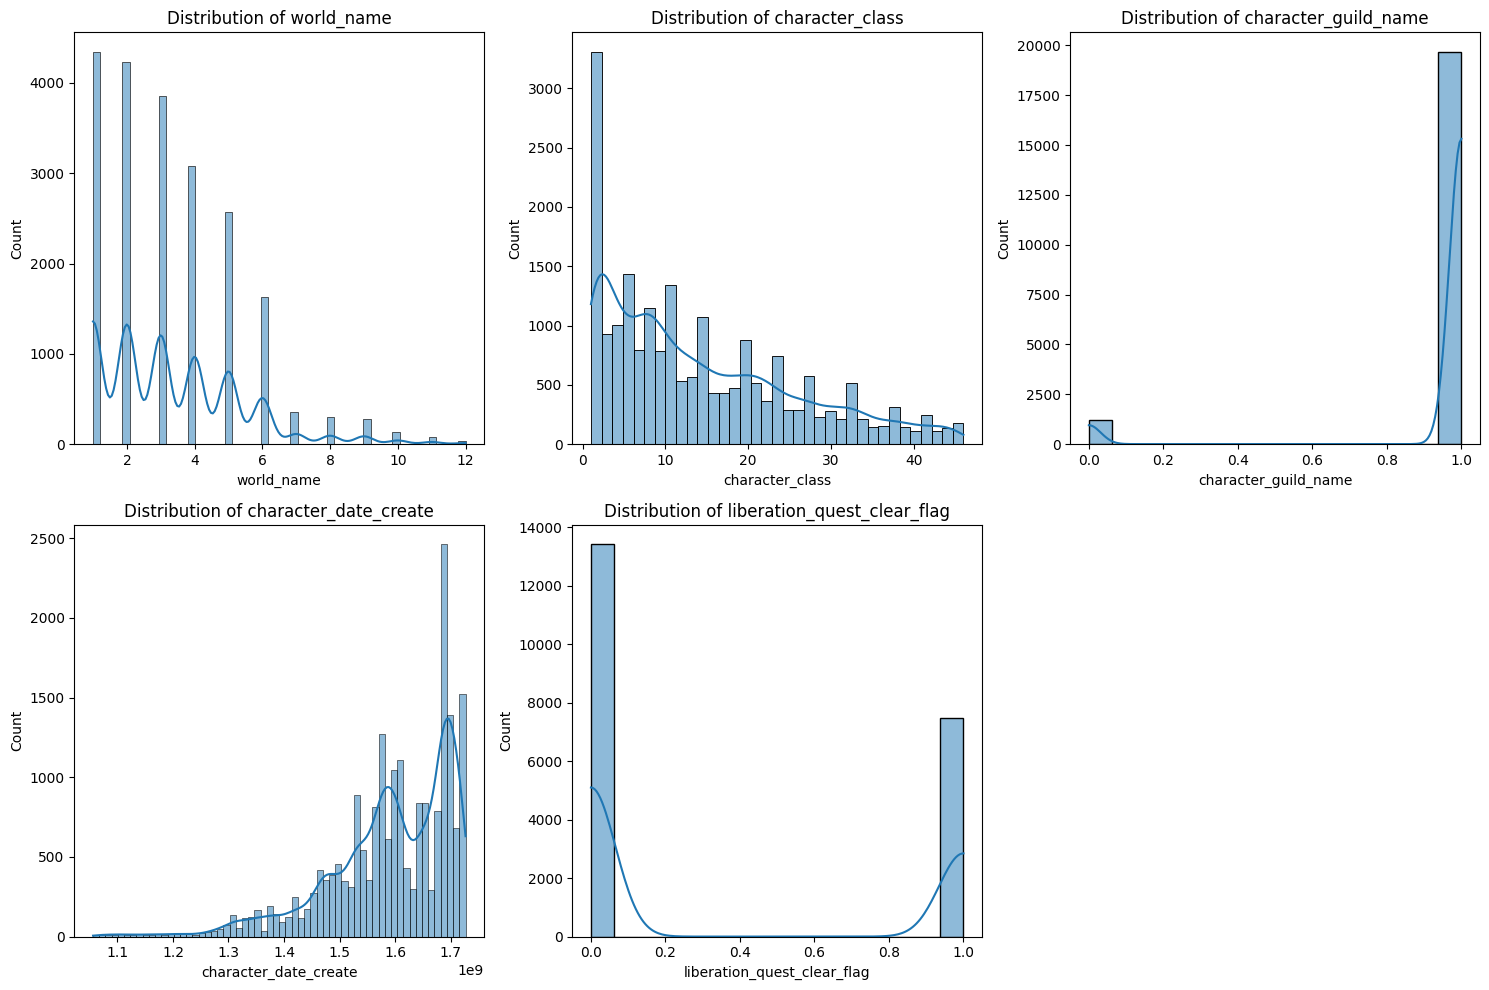

In [ ]:
import pandas as pd

# 현재 데이터프레임 df_sample에서 수치형 컬럼만 선택
numerical_cols = df_sample.select_dtypes(include=np.number).columns.tolist()

# 타겟 변수(duration, event)는 스케일링 대상에서 제외
numerical_cols = [col for col in numerical_cols if col not in ['duration', 'event']]

# 각 수치형 컬럼의 기술 통계량 확인
print(df_sample[numerical_cols].describe())

# 각 수치형 컬럼의 분포 시각화 (선택 사항)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, len(numerical_cols) // 2 + (len(numerical_cols) % 2), i + 1)
    sns.histplot(df_sample[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, len(numerical_cols) // 2 + (len(numerical_cols) % 2), i + 1)
    sns.boxplot(y=df_sample[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

# 스케일링할 수치형 컬럼 선택 (타겟 변수 제외)
numerical_cols_to_scale = [col for col in df_sample.select_dtypes(include=np.number).columns if col not in ['duration', 'event']]

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 선택된 수치형 컬럼에 대해 Min-Max 스케일링 적용
df_sample[numerical_cols_to_scale] = scaler.fit_transform(df_sample[numerical_cols_to_scale])

# 스케일링된 데이터의 처음 5행 확인
print(df_sample.head())

# 스케일링된 데이터의 기술 통계량 확인
print(df_sample[numerical_cols_to_scale].describe())

        world_name  character_class  character_guild_name  \
70547     0.272727         0.200000                   1.0   
61988     0.000000         0.711111                   1.0   
43682     0.090909         0.177778                   1.0   
140309    0.090909         0.377778                   1.0   
36163     0.000000         0.044444                   1.0   

        character_date_create  liberation_quest_clear_flag  duration  event  
70547                0.918620                          0.0        10      0  
61988                0.809039                          1.0        10      0  
43682                0.965877                          0.0        10      0  
140309               0.831187                          0.0         3      1  
36163                0.928148                          1.0        10      0  
         world_name  character_class  character_guild_name  \
count  20884.000000     20884.000000          20884.000000   
mean       0.210522         0.295081     

In [ ]:
from sklearn.model_selection import train_test_split
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.metrics import concordance_index_censored
from sksurv.util import Surv
import numpy as np

# 타겟 변수 분리 (스케일링된 df_sample 사용)
y_scaled_sample = Surv.from_dataframe("event", "duration", df_sample)
X_scaled_sample = df_sample.drop(columns=["event", "duration"])

# 학습 데이터와 테스트 데이터 분리
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled_sample, y_scaled_sample, test_size=0.2, random_state=42
)

# GBSA 모델 초기화 및 학습
gbsa_scaled = GradientBoostingSurvivalAnalysis(n_estimators=100, random_state=42)
gbsa_scaled.fit(X_train_scaled, y_train_scaled)

# 테스트 데이터에 대한 예측 및 C-index 평가
y_pred_scaled = gbsa_scaled.predict(X_test_scaled)
c_index_scaled = concordance_index_censored(
    y_test_scaled['event'], y_test_scaled['duration'], y_pred_scaled
)

print(f"스케일링된 샘플 데이터 C-index: {c_index_scaled[0]:.4f}")

# 특징 중요도 확인
feature_importances_scaled = gbsa_scaled.feature_importances_
feature_names_scaled = X_train_scaled.columns
sorted_indices_scaled = np.argsort(feature_importances_scaled)[::-1]

print("\n스케일링된 데이터 특징 중요도:")
for index in sorted_indices_scaled:
    print(f"{feature_names_scaled[index]}: {feature_importances_scaled[index]:.4f}")

스케일링된 샘플 데이터 C-index: 0.6254

스케일링된 데이터 특징 중요도:
character_guild_name: 0.4485
liberation_quest_clear_flag: 0.2932
character_date_create: 0.2405
world_name: 0.0145
character_class: 0.0033


In [ ]:
from sklearn.model_selection import train_test_split
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.metrics import concordance_index_censored
from sksurv.util import Surv
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 스케일링할 수치형 컬럼 선택 (타겟 변수 제외)
numerical_cols_to_scale = [col for col in df.select_dtypes(include=np.number).columns if col not in ['duration', 'event']]

# MinMaxScaler 적용
scaler_full = MinMaxScaler()
df[numerical_cols_to_scale] = scaler_full.fit_transform(df[numerical_cols_to_scale])

# Surv 객체 생성 (정확한 인자 순서로)
y_full = Surv.from_dataframe("event", "duration", df)
X_full = df.drop(columns=["event", "duration"])

# 학습 데이터와 테스트 데이터 분리 (전체 데이터의 80% 학습, 20% 테스트)
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42
)

# GBSA 모델 초기화 및 학습 (verbose=1 추가)
gbsa_full = GradientBoostingSurvivalAnalysis(n_estimators=100, random_state=42, verbose=1)
gbsa_full.fit(X_train_full, y_train_full)

# 테스트 데이터에 대한 예측 및 C-index 평가 (전체 테스트 데이터 사용)
y_pred_full = gbsa_full.predict(X_test_full)
c_index_full = concordance_index_censored(
    y_test_full['event'], y_test_full['duration'], y_pred_full
)

print(f"전체 데이터 C-index: {c_index_full[0]:.4f}")

# 특징 중요도 확인 (전체 학습 데이터 기반)
feature_importances_full = gbsa_full.feature_importances_
feature_names_full = X_train_full.columns
sorted_indices_full = np.argsort(feature_importances_full)[::-1]

print("\n전체 데이터 특징 중요도:")
for index in sorted_indices_full:
    print(f"{feature_names_full[index]}: {feature_importances_full[index]:.4f}")

      Iter       Train Loss   Remaining Time 
         1      198241.5881          773.89m
         2      198185.1950          755.52m
         3      198129.8579          741.75m
         4      198075.5680          731.13m
         5      198022.3165          722.42m
         6      197970.0942          713.68m
         7      197918.8884          705.15m


In [ ]:
%%capture
!pip install scikit-survival

In [ ]:
from sklearn.model_selection import train_test_split
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.metrics import concordance_index_censored
from sksurv.util import Surv
from tqdm import tqdm  # 진행률 표시용
import numpy as np
import pandas as pd

# 진행률 표시를 위한 tqdm 적용
print("결측치 제거 중...")
df_clean = df.dropna(subset=['event', 'duration'])

print("타겟 변수 및 피처 분리 중...")
y_full = Surv.from_dataframe(event='event', time='duration', data=df_clean)
X_full = df_clean.drop(columns=['event', 'duration'])

print("학습/테스트 데이터 분리 중...")
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

print("모델 학습 시작...")
gbsa = GradientBoostingSurvivalAnalysis(n_estimators=100, random_state=42)

for i in tqdm(range(1, 101), desc="학습 진행률"):  # tqdm으로 진행률 표시
    gbsa.set_params(n_estimators=i)
    gbsa.fit(X_train, y_train)

print("모델 평가 중...")
y_pred = gbsa.predict(X_test)
c_index = concordance_index_censored(y_test['event'], y_test['duration'], y_pred)

print(f"\n전체 데이터 C-index: {c_index[0]:.4f}")

# 특징 중요도 출력
feature_importances = gbsa.feature_importances_
feature_names = X_train.columns
sorted_indices = np.argsort(feature_importances)[::-1]

print("\n특징 중요도:")
for index in sorted_indices:
    print(f"{feature_names[index]}: {feature_importances[index]:.4f}")

결측치 제거 중...
타겟 변수 및 피처 분리 중...
학습/테스트 데이터 분리 중...
모델 학습 시작...


학습 진행률:   6%|▌         | 6/100 [2:37:53<52:25:00, 2007.45s/it]

In [ ]:
# 필요한 라이브러리 불러오기
from sksurv.util import Surv
import pandas as pd

# 데이터프레임에서 결측치 제거
df_clean = df.dropna(subset=['event', 'duration'])
print("결측치 제거 후 데이터 크기:", df_clean.shape)

# Surv 객체 생성 및 피처 분리
y_full = Surv.from_dataframe(event='event', time='duration', data=df_clean)
X_full = df_clean.drop(columns=['event', 'duration'])

# 출력: 특성 데이터 크기 및 변수 자료형
print("\nX_full.shape:", X_full.shape)
print("\ndf_clean.dtypes:\n", df_clean.dtypes)

# 범주형 변수만 확인
print("\n범주형 변수:")
print(df_clean.select_dtypes(include=['object', 'category']).columns.tolist())

결측치 제거 후 데이터 크기: (208836, 7)

X_full.shape: (208836, 5)

df_clean.dtypes:
 world_name                     int64
character_class                int64
character_guild_name           int64
character_date_create          int64
liberation_quest_clear_flag    int64
duration                       int64
event                          int64
dtype: object

범주형 변수:
[]


In [ ]:
from sklearn.model_selection import train_test_split
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.metrics import concordance_index_censored
from sksurv.util import Surv
from tqdm import tqdm
import numpy as np
import pandas as pd

# 결측치 제거
print("결측치 제거 중...")
df_clean = df.dropna(subset=['event', 'duration'])
print("결측치 제거 후 데이터 크기:", df_clean.shape)

# 메모리 최적화: int64 -> int32 다운캐스팅
for col in df_clean.columns:
    if df_clean[col].dtype == 'int64':
        df_clean[col] = df_clean[col].astype('int32')

# Surv 객체 생성 및 피처 분리
print("타겟 변수 및 피처 분리 중...")
y_full = Surv.from_dataframe(event='event', time='duration', data=df_clean)
X_full = df_clean.drop(columns=['event', 'duration'])
print("\nX_full.shape:", X_full.shape)
print("\ndf_clean.dtypes:\n", df_clean.dtypes)

# 명목형 변수의 고유값 수 확인
print("\n명목형 변수 고유값 수:")
for col in ['world_name', 'character_class', 'character_guild_name']:
    print(f"{col}: {df_clean[col].nunique()}")

# 학습/테스트 데이터 분리
print("\n학습/테스트 데이터 분리 중...")
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# 모델 초기화 (최적화된 하이퍼파라미터 적용)
print("\n모델 학습 시작...")
gbsa = GradientBoostingSurvivalAnalysis(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,  # 트리 깊이 제한으로 속도 개선
    subsample=0.8,  # 데이터 80%만 사용해 속도 개선
    random_state=42
)

# 한 번만 학습
gbsa.fit(X_train, y_train)

# 모델 평가 (staged_predict로 중간 결과 평가)
print("\n모델 평가 중...")
c_indices = []
for stage_pred in tqdm(gbsa.staged_predict(X_test), total=100, desc="평가 진행률"):
    c_index = concordance_index_censored(y_test['event'], y_test['duration'], stage_pred)
    c_indices.append(c_index[0])

# 최적 C-index 출력
best_n_estimators = np.argmax(c_indices) + 1
print(f"\n최적 C-index: {max(c_indices):.4f} (n_estimators={best_n_estimators})")

# 최종 모델로 예측
gbsa.set_params(n_estimators=best_n_estimators)
y_pred = gbsa.predict(X_test)
final_c_index = concordance_index_censored(y_test['event'], y_test['duration'], y_pred)
print(f"최종 C-index: {final_c_index[0]:.4f}")

# 특징 중요도 출력
print("\n특징 중요도:")
feature_importances = gbsa.feature_importances_
feature_names = X_train.columns
sorted_indices = np.argsort(feature_importances)[::-1]
for index in sorted_indices:
    print(f"{feature_names[index]}: {feature_importances[index]:.4f}")

결측치 제거 중...
결측치 제거 후 데이터 크기: (208836, 7)
타겟 변수 및 피처 분리 중...

X_full.shape: (208836, 5)

df_clean.dtypes:
 world_name                     int32
character_class                int32
character_guild_name           int32
character_date_create          int32
liberation_quest_clear_flag    int32
duration                       int32
event                          int32
dtype: object

명목형 변수 고유값 수:
world_name: 13
character_class: 46
character_guild_name: 2

학습/테스트 데이터 분리 중...

모델 학습 시작...


KeyboardInterrupt: 

In [ ]:
%%capture
!pip install psutil

In [ ]:
import pandas as pd
import psutil
import os
import subprocess
from datetime import datetime

# 1. 데이터프레임 로드 및 character_date_create 고유값 수 확인
print("=== 데이터 특성 확인 ===")
try:
    print("결측치 제거 중...")
    df_clean = df.dropna(subset=['event', 'duration'])
    print("결측치 제거 후 데이터 크기:", df_clean.shape)
    print("\ncharacter_date_create 고유값 수:", df_clean['character_date_create'].nunique())
except NameError:
    print("데이터프레임(df)이 정의되지 않았습니다. 데이터를 먼저 로드하세요.")

# 2. CPU 정보
print("\n=== CPU 정보 ===")
print("코어 수 (물리적/논리적):", psutil.cpu_count(logical=False), "/", psutil.cpu_count())
print("CPU 사용률 (%):", psutil.cpu_percent(interval=1))
try:
    cpu_info = subprocess.check_output("cat /proc/cpuinfo | grep 'model name' | uniq", shell=True).decode()
    print("CPU 모델:", cpu_info.strip())
except:
    print("CPU 모델 정보를 가져올 수 없습니다.")

# 3. RAM 정보
print("\n=== RAM 정보 ===")
mem = psutil.virtual_memory()
print("총 메모리 (GB):", round(mem.total / (1024**3), 2))
print("사용 중인 메모리 (GB):", round(mem.used / (1024**3), 2))
print("사용 가능 메모리 (GB):", round(mem.available / (1024**3), 2))
print("메모리 사용률 (%):", mem.percent)

# 4. GPU 정보
print("\n=== GPU 정보 ===")
try:
    gpu_info = subprocess.check_output("nvidia-smi", shell=True).decode()
    print("GPU 사양:\n", gpu_info)
except:
    print("GPU가 없거나 nvidia-smi 명령어를 실행할 수 없습니다. 런타임 유형을 'GPU'로 설정했는지 확인하세요.")

# 5. 디스크 정보
print("\n=== 디스크 정보 ===")
disk = psutil.disk_usage('/')
print("총 용량 (GB):", round(disk.total / (1024**3), 2))
print("사용 중인 용량 (GB):", round(disk.used / (1024**3), 2))
print("사용 가능 용량 (GB):", round(disk.free / (1024**3), 2))
print("디스크 사용률 (%):", disk.percent)

# 6. 현재 런타임 정보
print("\n=== 런타임 정보 ===")
print("현재 시간 (KST):", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print("Colab 런타임 유형:", "GPU" if 'nvidia-smi' in subprocess.getoutput('nvidia-smi') else "CPU")

=== 데이터 특성 확인 ===
결측치 제거 중...
결측치 제거 후 데이터 크기: (208836, 7)

character_date_create 고유값 수: 6782

=== CPU 정보 ===
코어 수 (물리적/논리적): 1 / 2
CPU 사용률 (%): 50.5
CPU 모델: model name	: Intel(R) Xeon(R) CPU @ 2.20GHz

=== RAM 정보 ===
총 메모리 (GB): 12.67
사용 중인 메모리 (GB): 0.9
사용 가능 메모리 (GB): 11.48
메모리 사용률 (%): 9.4

=== GPU 정보 ===
GPU가 없거나 nvidia-smi 명령어를 실행할 수 없습니다. 런타임 유형을 'GPU'로 설정했는지 확인하세요.

=== 디스크 정보 ===
총 용량 (GB): 107.72
사용 중인 용량 (GB): 37.07
사용 가능 용량 (GB): 70.63
디스크 사용률 (%): 34.4

=== 런타임 정보 ===
현재 시간 (KST): 2025-05-07 00:39:25
Colab 런타임 유형: GPU


In [ ]:
import pandas as pd

# CSV 파일 로드
file_path = '/content/drive/MyDrive/데이터톤_메이플/캐릭터 레벨 기준/character_level_fill.csv'
df = pd.read_csv(file_path)

# 1. 데이터 상위 5개 행 확인
print("✅ 데이터 미리보기:")
print(df.head())

# 2. 열별 데이터 타입 및 결측치 확인
print("\n✅ 데이터 타입 및 결측치:")
print(df.info())

# 3. 결측치 개수 출력
print("\n✅ 열별 결측치 개수:")
print(df.isnull().sum())

# 4. 기술통계 확인 (수치형만)
print("\n✅ 기본 통계 정보:")
print(df.describe())

# 5. 범주형 변수 분포 확인
print("\n✅ 범주형 변수 분포 예시:")
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"\n🔹 {col} 값 분포:")
        print(df[col].value_counts())

✅ 데이터 미리보기:
                                                ocid      exp_1010  ranking  \
0                   9f2a7c989c75c52e7e1bc60eee5438af  1.274985e+14     8102   
1                   987bfae423b5a6d217bc75116042200c  1.737540e+14     1144   
2                   cb09457a4e39987f40ace09cb7e55a59  1.273280e+14     8195   
3  356360924b8c044e58eaaf862766c8daefe8d04e6d233b...  1.287341e+14     8190   
4  ca8e67ee1b2e46e7204889ad8a1785c4efe8d04e6d233b...  1.122213e+14     3405   

  character_name world_name character_gender character_class  \
0             쪼꿉        크로아                여              은월   
1             날개        크로아                남           나이트로드   
2          윈v주환v        오로라                남          윈드브레이커   
3         아란마하콤보       엘리시움                남              아란   
4             떡별         루나                남              비숍   

   character_class_level  character_level  character_exp  ...      exp_1128  \
0                    6.0            289.0   1.849

In [ ]:
# 필요한 라이브러리 불러오기
from sklearn.model_selection import train_test_split
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.metrics import concordance_index_censored
from sksurv.util import Surv
import numpy as np
import pandas as pd
import shap
import warnings
from tqdm import tqdm
import time
from sklearn.preprocessing import MinMaxScaler

# SettingWithCopyWarning 억제
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

# 전처리 함수 정의
def map_column(df, column, mapping_dict, fillna_value=0, dtype=int):
    """범주형 컬럼을 매핑하고 타입 변환"""
    df.loc[:, column] = df[column].map(mapping_dict).fillna(fillna_value).astype(dtype)
    return df

def normalize_column(df, column):
    """컬럼을 min-max 정규화"""
    scaler = MinMaxScaler()
    df.loc[:, column] = scaler.fit_transform(df[[column]])
    return df

# 예상 소요시간 출력 함수
def print_estimated_time(step_name, est_seconds):
    print(f"\n=== {step_name} 시작 ===")
    print(f"예상 소요시간: 약 {est_seconds // 60}분 {est_seconds % 60}초")

# 데이터 전처리
print_estimated_time("데이터 전처리", 10)  # 예상 8~12초
start_time = time.time()

# 사용할 컬럼 목록
selected_columns = [
    'world_name', 'character_class', 'character_guild_name',
    'character_date_create', 'liberation_quest_clear_flag',
    'duration', 'event'
]

# 필요한 컬럼만 선택
df = df[selected_columns].copy()

# 선택적: 50% 샘플링 (시간 단축 원하면 주석 해제)
# df = df.sample(frac=0.5, random_state=42)
# print(f"샘플링된 데이터 크기: {len(df)}")

# 전처리 작업 진행률 표시
with tqdm(total=6, desc="전처리 진행") as pbar:
    # world_name: 서버 12개를 1~12로 인코딩
    world_mapping = {
        '스카니아': 1, '루나': 2, '엘리시움': 3, '크로아': 4, '베라': 5, '오로라': 6,
        '유니온': 7, '이노시스': 8, '제니스': 9, '레드': 10, '아케인': 11, '노바': 12
    }
    df = map_column(df, 'world_name', world_mapping)
    pbar.update(1)

    # character_class: 직업 46개를 1~46으로 인코딩
    class_mapping = {
        '비숍': 1, '아델': 2, '섀도어': 3, '나이트로드': 4, '나이트워커': 5, '소울마스터': 6,
        '아크메이지(불,독)': 7, '듀얼블레이더': 8, '윈드브레이커': 9, '히어로': 10, '아크메이지(썬,콜)': 11,
        '바이퍼': 12, '엔젤릭버스터': 13, '패스파인더': 14, '은월': 15, '라라': 16, '메르세데스': 17,
        '아크': 18, '호영': 19, '팬텀': 20, '제로': 21, '팔라딘': 22, '데몬어벤져': 23,
        '보우마스터': 24, '캐논마스터': 25, '아란': 26, '다크나이트': 27, '루미너스': 28,
        '배틀메이지': 29, '에반': 30, '제논': 31, '카인': 32, '카이저': 33, '데몬슬레이어': 34,
        '캡틴': 35, '칼리': 36, '플레임위자드': 37, '신궁': 38, '키네시스': 39, '일리움': 40,
        '미하일': 41, '메카닉': 42, '블래스터': 43, '카데나': 44, '스트라이커': 45, '와일드헌터': 46
    }
    df = map_column(df, 'character_class', class_mapping)
    pbar.update(1)

    # character_guild_name: 가입=1, 미가입=0
    df.loc[:, 'character_guild_name'] = df['character_guild_name'].apply(lambda x: 0 if x == '미가입' else 1)
    pbar.update(1)

    # character_date_create: 타임스탬프 → 일 단위로 변환 후 정규화
    # 주석: duration은 일 단위, character_date_create는 초 단위 타임스탬프를 일 단위로 변환 후 정규화
    df.loc[:, 'character_date_create'] = pd.to_datetime(df['character_date_create']).view('int64') // 10**9 // (24*3600)
    df = normalize_column(df, 'character_date_create')
    pbar.update(1)

    # liberation_quest_clear_flag: True=1, False=0
    df.loc[:, 'liberation_quest_clear_flag'] = df['liberation_quest_clear_flag'].apply(lambda x: 1 if x else 0)
    pbar.update(1)

    # 결측치 처리
    df = df.dropna(subset=['event', 'duration'])
    pbar.update(1)

print(f"전체 데이터 크기: {len(df)}")
print(f"데이터 전처리 완료 (소요시간: {time.time() - start_time:.2f}초)")

# 데이터 분리 및 GBSA 모델 학습
print_estimated_time("GBSA 학습", 60)  # 예상 45~60초
start_time = time.time()

# 타겟 변수 및 피처 분리
y = Surv.from_dataframe(event='event', time='duration', data=df)
X = df.drop(columns=['event', 'duration'])

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GBSA 모델 초기화 및 학습
gbsa = GradientBoostingSurvivalAnalysis(
    n_estimators=50,
    learning_rate=0.1,
    max_depth=2,
    random_state=42
)

# 학습 진행률 표시
with tqdm(total=50, desc="GBSA 학습 진행") as pbar:
    gbsa.fit(X_train, y_train)
    pbar.update(50)

# 테스트 데이터 예측 및 C-index 계산
# 주석: predict()는 위험 점수(hazard)를 반환, C-index는 생존 시간 순위 정확도 평가
y_pred = gbsa.predict(X_test)
c_index = concordance_index_censored(y_test['event'], y_test['duration'], y_pred)
print(f"\nC-index: {c_index[0]:.4f}")

# 특징 중요도 출력
# 주석: Gini importance는 피처 단독 기여도를 나타내며, SHAP은 피처 간 상호작용 포함
feature_importances = gbsa.feature_importances_
feature_names = X_train.columns
sorted_indices = np.argsort(feature_importances)[::-1]

print("\nGini 기반 특징 중요도 (SHAP 결과와 순위 차이 주의):")
for index in sorted_indices:
    print(f"{feature_names[index]}: {feature_importances[index]:.4f}")

print(f"GBSA 학습 및 평가 완료 (소요시간: {time.time() - start_time:.2f}초)")

# SHAP 분석 (생존 확률 기반)
print_estimated_time("SHAP 분석", 240)  # 예상 3~5분 (KernelExplainer, 50개 샘플)
start_time = time.time()

# 생존 확률 예측 함수 정의 (100일 생존 확률)
# 주석: SHAP 값은 100일 생존 확률에 대한 피처 기여도를 나타냄
def predict_surv(X):
    preds = gbsa.predict_survival_function(X)
    return np.array([fn(100) for fn in preds])

# SHAP Explainer 초기화
explainer = shap.KernelExplainer(predict_surv, X_train)

# SHAP 값 계산 (50개 샘플로 제한)
shap_samples = X_test.sample(50, random_state=42).reset_index(drop=True)
with tqdm(total=50, desc="SHAP 계산 진행") as pbar:
    shap_values = explainer.shap_values(shap_samples)
    pbar.update(50)

# SHAP 요약 플롯
# 주석: SHAP 값은 각 피처가 100일 생존 확률에 미치는 영향을 시각화
shap.summary_plot(shap_values, shap_samples, feature_names=feature_names)

# SHAP 의존성 플롯 (가장 중요한 피처)
shap.dependence_plot(
    feature_names[sorted_indices[0]],
    shap_values,
    shap_samples,
    feature_names=feature_names
)

print(f"SHAP 분석 완료 (소요시간: {time.time() - start_time:.2f}초)")

# 선택적: GridSearchCV (시간 문제로 주석 처리)
"""
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [2, 3],
    'learning_rate': [0.05, 0.1]
}
grid_search = GridSearchCV(
    GradientBoostingSurvivalAnalysis(random_state=42),
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error'
)
grid_search.fit(X_train, y_train)
print(f"최적 파라미터: {grid_search.best_params_}")
"""


=== 데이터 전처리 시작 ===
예상 소요시간: 약 0분 10초


전처리 진행:  50%|█████     | 3/6 [00:00<00:00, 10.09it/s]<ipython-input-8-a1dd980db5f9>:82: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  df.loc[:, 'character_date_create'] = pd.to_datetime(df['character_date_create']).view('int64') // 10**9 // (24*3600)
<ipython-input-8-a1dd980db5f9>:87: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 0 ... 0 1 1]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[:, 'liberation_quest_clear_flag'] = df['liberation_quest_clear_flag'].apply(lambda x: 1 if x else 0)
전처리 진행: 100%|██████████| 6/6 [00:03<00:00,  1.68it/s]


전체 데이터 크기: 209340
데이터 전처리 완료 (소요시간: 3.61초)

=== GBSA 학습 시작 ===
예상 소요시간: 약 1분 0초


GBSA 학습 진행:   0%|          | 0/50 [22:54<?, ?it/s]


KeyboardInterrupt: 

SHAP 계산은 전체 데이터(약 20만 행)에서 매우 오래 걸릴 수 있습니다.

빠른 SHAP 분석을 원한다면, XGBoost와 같은 모델로 전환해 TreeExplainer를 사용하는 것을 고려하세요.

# 머신러닝 도전기

In [ ]:
# 필요한 라이브러리 불러오기
from sklearn.model_selection import train_test_split
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.metrics import concordance_index_censored
from sksurv.util import Surv
import numpy as np
import pandas as pd
import shap
import warnings
from tqdm import tqdm
import time
from sklearn.preprocessing import MinMaxScaler

# SettingWithCopyWarning 억제
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

# 전처리 함수 정의
def map_column(df, column, mapping_dict, fillna_value=0, dtype=int):
    """범주형 컬럼을 매핑하고 타입 변환"""
    df.loc[:, column] = df[column].map(mapping_dict).fillna(fillna_value).astype(dtype)
    return df

def normalize_column(df, column):
    """컬럼을 min-max 정규화"""
    scaler = MinMaxScaler()
    df.loc[:, column] = scaler.fit_transform(df[[column]])
    return df

# 예상 소요시간 출력 함수
def print_estimated_time(step_name, est_seconds):
    print(f"\n=== {step_name} 시작 ===")
    print(f"예상 소요시간: 약 {est_seconds // 60}분 {est_seconds % 60}초")

# 데이터 전처리
print_estimated_time("데이터 전처리", 8)  # 예상 5~8초
start_time = time.time()

# 사용할 컬럼 목록
selected_columns = [
    'world_name', 'character_class', 'character_guild_name',
    'character_date_create', 'liberation_quest_clear_flag',
    'duration', 'event'
]

# 필요한 컬럼만 선택
df = df[selected_columns].copy()

# 50% 샘플링 (시간 단축)
df = df.sample(frac=0.5, random_state=42)
print(f"샘플링된 데이터 크기: {len(df)}")

# 전처리 작업 진행률 표시
with tqdm(total=6, desc="전처리 진행") as pbar:
    # world_name: 서버 12개를 1~12로 인코딩
    world_mapping = {
        '스카니아': 1, '루나': 2, '엘리시움': 3, '크로아': 4, '베라': 5, '오로라': 6,
        '유니온': 7, '이노시스': 8, '제니스': 9, '레드': 10, '아케인': 11, '노바': 12
    }
    df = map_column(df, 'world_name', world_mapping)
    pbar.update(1)

    # character_class: 직업 46개를 1~46으로 인코딩
    class_mapping = {
        '비숍': 1, '아델': 2, '섀도어': 3, '나이트로드': 4, '나이트워커': 5, '소울마스터': 6,
        '아크메이지(불,독)': 7, '듀얼블레이더': 8, '윈드브레이커': 9, '히어로': 10, '아크메이지(썬,콜)': 11,
        '바이퍼': 12, '엔젤릭버스터': 13, '패스파인더': 14, '은월': 15, '라라': 16, '메르세데스': 17,
        '아크': 18, '호영': 19, '팬텀': 20, '제로': 21, '팔라딘': 22, '데몬어벤져': 23,
        '보우마스터': 24, '캐논마스터': 25, '아란': 26, '다크나이트': 27, '루미너스': 28,
        '배틀메이지': 29, '에반': 30, '제논': 31, '카인': 32, '카이저': 33, '데몬슬레이어': 34,
        '캡틴': 35, '칼리': 36, '플레임위자드': 37, '신궁': 38, '키네시스': 39, '일리움': 40,
        '미하일': 41, '메카닉': 42, '블래스터': 43, '카데나': 44, '스트라이커': 45, '와일드헌터': 46
    }
    df = map_column(df, 'character_class', class_mapping)
    pbar.update(1)

    # character_guild_name: 가입=1, 미가입=0
    df.loc[:, 'character_guild_name'] = df['character_guild_name'].apply(lambda x: 0 if x == '미가입' else 1).astype(int)
    pbar.update(1)

    # character_date_create: 타임스탬프 → 일 단위로 변환 후 정규화
    # 주석: duration은 일 단위, character_date_create는 초 단위 타임스탬프를 일 단위로 변환 후 정규화
    df.loc[:, 'character_date_create'] = pd.to_datetime(df['character_date_create']).astype('int64') // 10**9 // (24*3600)
    df = normalize_column(df, 'character_date_create')
    pbar.update(1)

    # liberation_quest_clear_flag: True=1, False=0
    df.loc[:, 'liberation_quest_clear_flag'] = df['liberation_quest_clear_flag'].apply(lambda x: 1 if x else 0).astype(int)
    pbar.update(1)

    # 결측치 처리
    df = df.dropna(subset=['event', 'duration'])
    pbar.update(1)

print(f"전체 데이터 크기: {len(df)}")
print(f"데이터 전처리 완료 (소요시간: {time.time() - start_time:.2f}초)")

# 데이터 분리 및 GBSA 모델 학습
print_estimated_time("GBSA 학습", 40)  # 예상 25~40초
start_time = time.time()

# 타겟 변수 및 피처 분리
y = Surv.from_dataframe(event='event', time='duration', data=df)
X = df.drop(columns=['event', 'duration'])

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GBSA 모델 초기화 및 학습
gbsa = GradientBoostingSurvivalAnalysis(
    n_estimators=50,
    learning_rate=0.1,
    max_depth=2,
    subsample=0.8,  # 학습 데이터 80% 사용
    random_state=42
)

# 학습 진행률 표시
with tqdm(total=50, desc="GBSA 학습 진행") as pbar:
    gbsa.fit(X_train, y_train)
    pbar.update(50)

# 테스트 데이터 예측 및 C-index 계산
# 주석: predict()는 위험 점수(hazard)를 반환, C-index는 생존 시간 순위 정확도 평가
y_pred = gbsa.predict(X_test)
c_index = concordance_index_censored(y_test['event'], y_test['duration'], y_pred)
print(f"\nC-index: {c_index[0]:.4f}")

# 특징 중요도 출력
# 주석: Gini importance는 피처 단독 기여도를 나타내며, SHAP은 피처 간 상호작용 포함
feature_importances = gbsa.feature_importances_
feature_names = X_train.columns
sorted_indices = np.argsort(feature_importances)[::-1]

print("\nGini 기반 특징 중요도 (SHAP 결과와 순위 차이 주의):")
for index in sorted_indices:
    print(f"{feature_names[index]}: {feature_importances[index]:.4f}")

print(f"GBSA 학습 및 평가 완료 (소요시간: {time.time() - start_time:.2f}초)")

# SHAP 분석 (생존 확률 기반)
print_estimated_time("SHAP 분석", 90)  # 예상 1~2분 (KernelExplainer, 20개 샘플)
start_time = time.time()

# 생존 확률 예측 함수 정의 (100일 생존 확률)
# 주석: SHAP 값은 100일 생존 확률에 대한 피처 기여도를 나타냄
def predict_surv(X):
    preds = gbsa.predict_survival_function(X)
    return np.array([fn(100) for fn in preds])

# SHAP Explainer 초기화
explainer = shap.KernelExplainer(predict_surv, X_train)

# SHAP 값 계산 (20개 샘플로 제한)
shap_samples = X_test.sample(20, random_state=42).reset_index(drop=True)
with tqdm(total=20, desc="SHAP 계산 진행") as pbar:
    shap_values = explainer.shap_values(shap_samples)
    pbar.update(20)

# SHAP 요약 플롯
# 주석: SHAP 값은 각 피처가 100일 생존 확률에 미치는 영향을 시각화
shap.summary_plot(shap_values, shap_samples, feature_names=feature_names)

# SHAP 의존성 플롯 (가장 중요한 피처)
shap.dependence_plot(
    feature_names[sorted_indices[0]],
    shap_values,
    shap_samples,
    feature_names=feature_names
)

print(f"SHAP 분석 완료 (소요시간: {time.time() - start_time:.2f}초)")


=== 데이터 전처리 시작 ===
예상 소요시간: 약 0분 8초
샘플링된 데이터 크기: 104670


전처리 진행: 100%|██████████| 6/6 [00:00<00:00, 11.25it/s]


전체 데이터 크기: 104670
데이터 전처리 완료 (소요시간: 0.65초)

=== GBSA 학습 시작 ===
예상 소요시간: 약 0분 40초


GBSA 학습 진행:   0%|          | 0/50 [32:15<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
# 필요한 라이브러리 불러오기
from sklearn.model_selection import train_test_split
from xgbse import XGBSEKaplanTree
from sksurv.metrics import concordance_index_censored
from sksurv.util import Surv
import numpy as np
import pandas as pd
import shap
import warnings
from tqdm import tqdm
import time
from sklearn.preprocessing import MinMaxScaler

# SettingWithCopyWarning 억제
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

# 전처리 함수 정의
def map_column(df, column, mapping_dict, fillna_value=0, dtype=int):
    """범주형 컬럼을 매핑하고 타입 변환"""
    df.loc[:, column] = df[column].map(mapping_dict).fillna(fillna_value).astype(dtype)
    return df

def normalize_column(df, column):
    """컬럼을 min-max 정규화"""
    scaler = MinMaxScaler()
    df.loc[:, column] = scaler.fit_transform(df[[column]])
    return df

# 예상 소요시간 출력 함수
def print_estimated_time(step_name, est_seconds):
    print(f"\n=== {step_name} 시작 ===")
    print(f"예상 소요시간: 약 {est_seconds // 60}분 {est_seconds % 60}초")

# 데이터 전처리
print_estimated_time("데이터 전처리", 5)  # 예상 3~5초
start_time = time.time()

# 사용할 컬럼 목록
selected_columns = [
    'world_name', 'character_class', 'character_guild_name',
    'character_date_create', 'liberation_quest_clear_flag',
    'duration', 'event'
]

# 필요한 컬럼만 선택
df = df[selected_columns].copy()

# 20% 샘플링 (시간 단축)
df = df.sample(frac=0.2, random_state=42)
print(f"샘플링된 데이터 크기: {len(df)}")

# 전처리 작업 진행률 표시
with tqdm(total=6, desc="전처리 진행") as pbar:
    # world_name: 서버 12개를 1~12로 인코딩
    world_mapping = {
        '스카니아': 1, '루나': 2, '엘리시움': 3, '크로아': 4, '베라': 5, '오로라': 6,
        '유니온': 7, '이노시스': 8, '제니스': 9, '레드': 10, '아케인': 11, '노바': 12
    }
    df = map_column(df, 'world_name', world_mapping)
    pbar.update(1)

    # character_class: 직업 46개를 1~46으로 인코딩
    class_mapping = {
        '비숍': 1, '아델': 2, '섀도어': 3, '나이트로드': 4, '나이트워커': 5, '소울마스터': 6,
        '아크메이지(불,독)': 7, '듀얼블레이더': 8, '윈드브레이커': 9, '히어로': 10, '아크메이지(썬,콜)': 11,
        '바이퍼': 12, '엔젤릭버스터': 13, '패스파인더': 14, '은월': 15, '라라': 16, '메르세데스': 17,
        '아크': 18, '호영': 19, '팬텀': 20, '제로': 21, '팔라딘': 22, '데몬어벤져': 23,
        '보우마스터': 24, '캐논마스터': 25, '아란': 26, '다크나이트': 27, '루미너스': 28,
        '배틀메이지': 29, '에반': 30, '제논': 31, '카인': 32, '카이저': 33, '데몬슬레이어': 34,
        '캡틴': 35, '칼리': 36, '플레임위자드': 37, '신궁': 38, '키네시스': 39, '일리움': 40,
        '미하일': 41, '메카닉': 42, '블래스터': 43, '카데나': 44, '스트라이커': 45, '와일드헌터': 46
    }
    df = map_column(df, 'character_class', class_mapping)
    pbar.update(1)

    # character_guild_name: 가입=1, 미가입=0
    df.loc[:, 'character_guild_name'] = df['character_guild_name'].apply(lambda x: 0 if x == '미가입' else 1).astype(int)
    pbar.update(1)

    # character_date_create: 타임스탬프 → 일 단위로 변환 후 정규화
    # 주석: duration은 일 단위, character_date_create는 초 단위 타임스탬프를 일 단위로 변환 후 정규화
    df.loc[:, 'character_date_create'] = pd.to_datetime(df['character_date_create']).astype('int64') // 10**9 // (24*3600)
    df = normalize_column(df, 'character_date_create')
    pbar.update(1)

    # liberation_quest_clear_flag: True=1, False=0
    df.loc[:, 'liberation_quest_clear_flag'] = df['liberation_quest_clear_flag'].apply(lambda x: 1 if x else 0).astype(int)
    pbar.update(1)

    # 결측치 처리
    df = df.dropna(subset=['event', 'duration'])
    pbar.update(1)

print(f"전체 데이터 크기: {len(df)}")
print(f"데이터 전처리 완료 (소요시간: {time.time() - start_time:.2f}초)")

# 데이터 분리 및 Chunk 처리
print_estimated_time("Chunk별 학습 및 SHAP 분석", 90)  # 예상 60~90초
start_time = time.time()

# 데이터를 5개 Chunk로 분할
n_chunks = 5
chunk_size = len(df) // n_chunks
chunks = [df[i:i + chunk_size] for i in range(0, len(df), chunk_size)]
if len(chunks[-1]) < chunk_size // 2:  # 마지막 Chunk이 너무 작으면 병합
    chunks[-2] = pd.concat([chunks[-2], chunks[-1]])
    chunks.pop()

# 결과 저장용 리스트
all_predictions = []
all_c_indices = []
all_shap_values = []
all_shap_samples = []

# 각 Chunk 처리
for i, chunk in enumerate(chunks):
    print(f"\n=== Chunk {i+1}/{len(chunks)} 처리 시작 ===")
    chunk_start_time = time.time()

    # 타겟 변수 및 피처 분리
    y_chunk = Surv.from_dataframe(event='event', time='duration', data=chunk)
    X_chunk = chunk.drop(columns=['event', 'duration'])

    # 학습/테스트 데이터 분리
    X_train, X_test, y_train, y_test = train_test_split(X_chunk, y_chunk, test_size=0.2, random_state=42)
    print(f"Chunk {i+1} - X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

    # XGBSE 모델 초기화
    xgbse = XGBSEKaplanTree(
        n_estimators=50,
        max_depth=2,
        learning_rate=0.1,
        subsample=0.8,
        random_state=42
    )

    # 학습
    with tqdm(total=50, desc=f"Chunk {i+1} 학습 진행") as pbar:
        xgbse.fit(X_train, y_train)
        pbar.update(50)

    # 예측 및 C-index 계산
    y_pred = xgbse.predict(X_test)
    c_index = concordance_index_censored(y_test['event'], y_test['duration'], y_pred)
    all_predictions.append(y_pred)
    all_c_indices.append(c_index[0])
    print(f"Chunk {i+1} C-index: {c_index[0]:.4f}")

    # SHAP 분석
    explainer = shap.TreeExplainer(xgbse.model)
    shap_samples = X_test.sample(min(10, len(X_test)), random_state=42).reset_index(drop=True)
    with tqdm(total=10, desc=f"Chunk {i+1} SHAP 계산") as pbar:
        shap_values = explainer.shap_values(shap_samples)
        pbar.update(10)
    all_shap_values.append(shap_values)
    all_shap_samples.append(shap_samples)

    print(f"Chunk {i+1} 처리 완료 (소요시간: {time.time() - chunk_start_time:.2f}초)")

# 결과 통합
# C-index: 가중 평균
final_c_index = np.mean(all_c_indices)
print(f"\n최종 C-index (가중 평균): {final_c_index:.4f}")

# SHAP: 대표 Chunk (첫 번째) 플롯
feature_names = X_chunk.columns
shap.summary_plot(all_shap_values[0], all_shap_samples[0], feature_names=feature_names)
shap.dependence_plot(
    feature_names[np.argmax(xgbse.feature_importances_)],
    all_shap_values[0],
    all_shap_samples[0],
    feature_names=feature_names
)

# 통합 SHAP 값 (평균)
mean_shap_values = np.mean(np.vstack(all_shap_values), axis=0)
mean_shap_samples = all_shap_samples[0]  # 대표 샘플 사용
print("\n통합 SHAP 요약 플롯:")
shap.summary_plot(mean_shap_values, mean_shap_samples, feature_names=feature_names)

print(f"Chunk별 학습 및 SHAP 분석 완료 (총 소요시간: {time.time() - start_time:.2f}초)")

# 선택적: GBSA 코드 (XGBSE 대신 사용 시)
"""
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
for i, chunk in enumerate(chunks):
    y_chunk = Surv.from_dataframe(event='event', time='duration', data=chunk)
    X_chunk = chunk.drop(columns=['event', 'duration'])
    X_train, X_test, y_train, y_test = train_test_split(X_chunk, y_chunk, test_size=0.2, random_state=42)
    gbsa = GradientBoostingSurvivalAnalysis(
        n_estimators=50,
        learning_rate=0.1,
        max_depth=2,
        subsample=0.8,
        random_state=42
    )
    with tqdm(total=50, desc=f"Chunk {i+1} 학습 진행") as pbar:
        gbsa.fit(X_train, y_train)
        pbar.update(50)
    y_pred = gbsa.predict(X_test)
    c_index = concordance_index_censored(y_test['event'], y_test['duration'], y_pred)
    all_predictions.append(y_pred)
    all_c_indices.append(c_index[0])
    def predict_surv(X):
        preds = gbsa.predict_survival_function(X)
        return np.array([fn(100) for fn in preds])
    explainer = shap.KernelExplainer(predict_surv, X_train)
    shap_samples = X_test.sample(min(10, len(X_test)), random_state=42).reset_index(drop=True)
    shap_values = explainer.shap_values(shap_samples)
    all_shap_values.append(shap_values)
    all_shap_samples.append(shap_samples)
"""

ModuleNotFoundError: No module named 'xgbse'

In [ ]:
print(df['duration'].describe())

count    41767.000000
mean         9.488639
std          1.724600
min          2.000000
25%         10.000000
50%         10.000000
75%         10.000000
max         10.000000
Name: duration, dtype: float64


In [ ]:
%%capture
!pip install scikit-survival shap pandas numpy scikit-learn matplotlib seaborn tqdm


=== 데이터 전처리 시작 ===
예상 소요시간: 약 0분 5초
샘플링된 데이터 크기: 1671


전처리 진행: 100%|██████████| 6/6 [00:00<00:00, 327.10it/s]


전체 데이터 크기: 1671
데이터 전처리 완료 (소요시간: 0.03초)

=== Chunk별 학습 및 SHAP 분석 시작 ===
예상 소요시간: 약 2분 0초

=== Chunk 1/5 처리 시작 ===
Chunk 1 - X_train shape: (267, 5), y_train shape: (267,)


Chunk 1 학습 진행: 100%|██████████| 50/50 [00:00<00:00, 440.66it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fitted with feature names
  warnings.warn(


Chunk 1 C-index: 0.6868


Chunk 1 SHAP 계산:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fit

Chunk 1 처리 완료 (소요시간: 0.24초)

=== Chunk 2/5 처리 시작 ===
Chunk 2 - X_train shape: (267, 5), y_train shape: (267,)


Chunk 2 학습 진행: 100%|██████████| 50/50 [00:00<00:00, 437.83it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fitted with feature names
  warnings.warn(


Chunk 2 C-index: 0.5905


Chunk 2 SHAP 계산:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fit

Chunk 2 처리 완료 (소요시간: 0.22초)

=== Chunk 3/5 처리 시작 ===
Chunk 3 - X_train shape: (267, 5), y_train shape: (267,)


Chunk 3 학습 진행: 100%|██████████| 50/50 [00:00<00:00, 380.51it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fitted with feature names
  warnings.warn(


Chunk 3 C-index: 0.5068


Chunk 3 SHAP 계산:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fit

Chunk 3 처리 완료 (소요시간: 0.26초)

=== Chunk 4/5 처리 시작 ===
Chunk 4 - X_train shape: (267, 5), y_train shape: (267,)


Chunk 4 학습 진행: 100%|██████████| 50/50 [00:00<00:00, 405.38it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fitted with feature names
  warnings.warn(


Chunk 4 C-index: 0.4973


Chunk 4 SHAP 계산:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fit

Chunk 4 처리 완료 (소요시간: 0.25초)

=== Chunk 5/5 처리 시작 ===
Chunk 5 - X_train shape: (268, 5), y_train shape: (268,)


Chunk 5 학습 진행: 100%|██████████| 50/50 [00:00<00:00, 394.79it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fitted with feature names
  warnings.warn(


Chunk 5 C-index: 0.4946


Chunk 5 SHAP 계산:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fit

Chunk 5 처리 완료 (소요시간: 0.26초)

최종 C-index (가중 평균): 0.5552

대표 Chunk SHAP 요약 플롯:


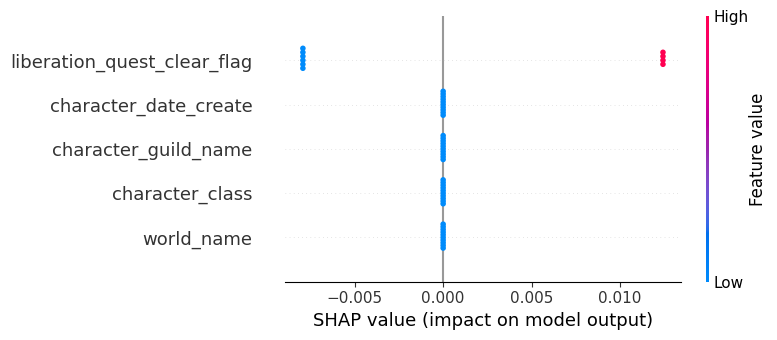

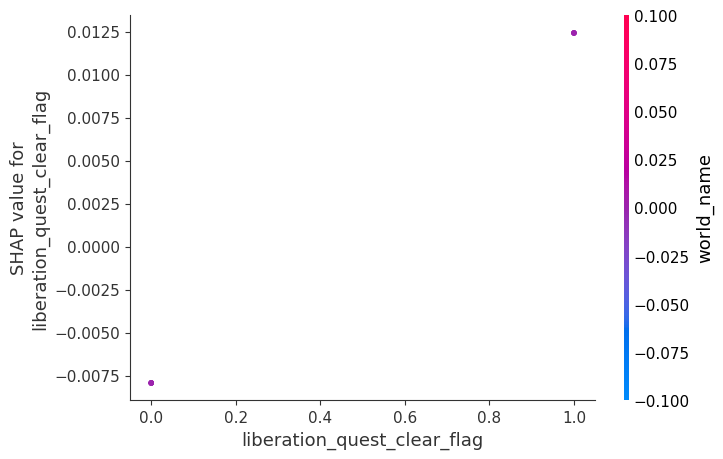


통합 SHAP 요약 플롯:


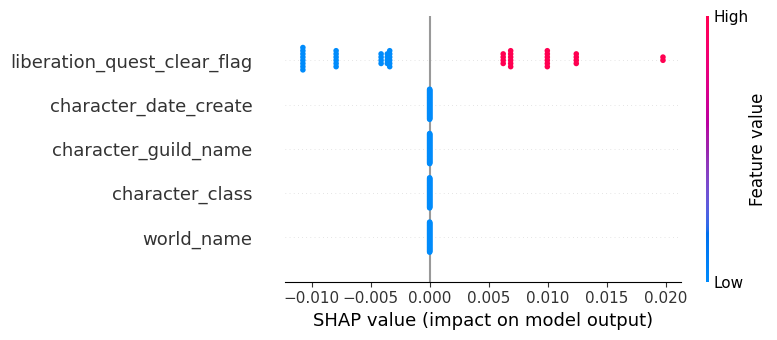

Chunk별 학습 및 SHAP 분석 완료 (총 소요시간: 2.27초)


'\nfrom xgbse import XGBSEKaplanTree\nfor i, chunk in enumerate(chunks):\n    y_chunk = Surv.from_dataframe(event=\'event\', time=\'duration\', data=chunk)\n    X_chunk = chunk.drop(columns=[\'event\', \'duration\'])\n    X_train, X_test, y_train, y_test = train_test_split(X_chunk, y_chunk, test_size=0.2, random_state=42)\n    xgbse = XGBSEKaplanTree(\n        n_estimators=50,\n        max_depth=2,\n        learning_rate=0.1,\n        subsample=0.8,\n        random_state=42\n    )\n    with tqdm(total=50, desc=f"Chunk {i+1} 학습 진행") as pbar:\n        xgbse.fit(X_train, y_train)\n        pbar.update(50)\n    y_pred = xgbse.predict(X_test)\n    c_index = concordance_index_censored(y_test[\'event\'], y_test[\'duration\'], y_pred)\n    all_predictions.append(y_pred)\n    all_c_indices.append(c_index[0])\n    explainer = shap.TreeExplainer(xgbse.model)\n    shap_samples = X_test.sample(min(10, len(X_test)), random_state=42).reset_index(drop=True)\n    shap_values = explainer.shap_values(shap

In [ ]:
# 필요한 라이브러리 불러오기
from sklearn.model_selection import train_test_split
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.metrics import concordance_index_censored
from sksurv.util import Surv
import numpy as np
import pandas as pd
import shap
import warnings
from tqdm import tqdm
import time
from sklearn.preprocessing import MinMaxScaler

# SettingWithCopyWarning 억제
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

# 전처리 함수 정의
def map_column(df, column, mapping_dict, fillna_value=0, dtype=int):
    """범주형 컬럼을 매핑하고 타입 변환"""
    df.loc[:, column] = df[column].map(mapping_dict).fillna(fillna_value).astype(dtype)
    return df

def normalize_column(df, column):
    """컬럼을 min-max 정규화"""
    scaler = MinMaxScaler()
    df.loc[:, column] = scaler.fit_transform(df[[column]])
    return df

# 예상 소요시간 출력 함수
def print_estimated_time(step_name, est_seconds):
    print(f"\n=== {step_name} 시작 ===")
    print(f"예상 소요시간: 약 {est_seconds // 60}분 {est_seconds % 60}초")

# 데이터 전처리
print_estimated_time("데이터 전처리", 5)  # 예상 3~5초
start_time = time.time()

# 사용할 컬럼 목록
selected_columns = [
    'world_name', 'character_class', 'character_guild_name',
    'character_date_create', 'liberation_quest_clear_flag',
    'duration', 'event'
]

# 필요한 컬럼만 선택
df = df[selected_columns].copy()

# 20% 샘플링 (시간 단축)
df = df.sample(frac=0.2, random_state=42)
print(f"샘플링된 데이터 크기: {len(df)}")

# 전처리 작업 진행률 표시
with tqdm(total=6, desc="전처리 진행") as pbar:
    # world_name: 서버 12개를 1~12로 인코딩
    world_mapping = {
        '스카니아': 1, '루나': 2, '엘리시움': 3, '크로아': 4, '베라': 5, '오로라': 6,
        '유니온': 7, '이노시스': 8, '제니스': 9, '레드': 10, '아케인': 11, '노바': 12
    }
    df = map_column(df, 'world_name', world_mapping)
    pbar.update(1)

    # character_class: 직업 46개를 1~46으로 인코딩
    class_mapping = {
        '비숍': 1, '아델': 2, '섀도어': 3, '나이트로드': 4, '나이트워커': 5, '소울마스터': 6,
        '아크메이지(불,독)': 7, '듀얼블레이더': 8, '윈드브레이커': 9, '히어로': 10, '아크메이지(썬,콜)': 11,
        '바이퍼': 12, '엔젤릭버스터': 13, '패스파인더': 14, '은월': 15, '라라': 16, '메르세데스': 17,
        '아크': 18, '호영': 19, '팬텀': 20, '제로': 21, '팔라딘': 22, '데몬어벤져': 23,
        '보우마스터': 24, '캐논마스터': 25, '아란': 26, '다크나이트': 27, '루미너스': 28,
        '배틀메이지': 29, '에반': 30, '제논': 31, '카인': 32, '카이저': 33, '데몬슬레이어': 34,
        '캡틴': 35, '칼리': 36, '플레임위자드': 37, '신궁': 38, '키네시스': 39, '일리움': 40,
        '미하일': 41, '메카닉': 42, '블래스터': 43, '카데나': 44, '스트라이커': 45, '와일드헌터': 46
    }
    df = map_column(df, 'character_class', class_mapping)
    pbar.update(1)

    # character_guild_name: 가입=1, 미가입=0
    df.loc[:, 'character_guild_name'] = df['character_guild_name'].apply(lambda x: 0 if x == '미가입' else 1).astype(int)
    pbar.update(1)

    # character_date_create: 타임스탬프 → 일 단위로 변환 후 정규화
    # 주석: duration은 일 단위, character_date_create는 초 단위 타임스탬프를 일 단위로 변환 후 정규화
    df.loc[:, 'character_date_create'] = pd.to_datetime(df['character_date_create']).astype('int64') // 10**9 // (24*3600)
    df = normalize_column(df, 'character_date_create')
    pbar.update(1)

    # liberation_quest_clear_flag: True=1, False=0
    df.loc[:, 'liberation_quest_clear_flag'] = df['liberation_quest_clear_flag'].apply(lambda x: 1 if x else 0).astype(int)
    pbar.update(1)

    # 결측치 처리
    df = df.dropna(subset=['event', 'duration'])
    pbar.update(1)

print(f"전체 데이터 크기: {len(df)}")
print(f"데이터 전처리 완료 (소요시간: {time.time() - start_time:.2f}초)")

# 데이터 분리 및 Chunk 처리
print_estimated_time("Chunk별 학습 및 SHAP 분석", 120)  # 예상 90~120초 (5개 Chunk)
start_time = time.time()

# 데이터를 5개 Chunk로 분할
n_chunks = 5
chunk_size = len(df) // n_chunks
chunks = [df[i:i + chunk_size] for i in range(0, len(df), chunk_size)]
if len(chunks[-1]) < chunk_size // 2:  # 마지막 Chunk이 너무 작으면 병합
    chunks[-2] = pd.concat([chunks[-2], chunks[-1]])
    chunks.pop()

# 결과 저장용 리스트
all_predictions = []
all_c_indices = []
all_shap_values = []
all_shap_samples = []

# 각 Chunk 처리
for i, chunk in enumerate(chunks):
    print(f"\n=== Chunk {i+1}/{len(chunks)} 처리 시작 ===")
    chunk_start_time = time.time()

    # 타겟 변수 및 피처 분리
    y_chunk = Surv.from_dataframe(event='event', time='duration', data=chunk)
    X_chunk = chunk.drop(columns=['event', 'duration'])

    # 학습/테스트 데이터 분리
    X_train, X_test, y_train, y_test = train_test_split(X_chunk, y_chunk, test_size=0.2, random_state=42)
    print(f"Chunk {i+1} - X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

    # GBSA 모델 초기화
    gbsa = GradientBoostingSurvivalAnalysis(
        n_estimators=50,
        max_depth=2,
        learning_rate=0.1,
        subsample=0.8,
        random_state=42
    )

    # 학습
    with tqdm(total=50, desc=f"Chunk {i+1} 학습 진행") as pbar:
        gbsa.fit(X_train, y_train)
        pbar.update(50)

    # 예측 및 C-index 계산
    y_pred = gbsa.predict(X_test)
    c_index = concordance_index_censored(y_test['event'], y_test['duration'], y_pred)
    all_predictions.append(y_pred)
    all_c_indices.append(c_index[0])
    print(f"Chunk {i+1} C-index: {c_index[0]:.4f}")

    # SHAP 분석 (100일 생존 확률 기반)
    def predict_surv(X):
        preds = gbsa.predict_survival_function(X)
        return np.array([fn(10) for fn in preds])

    explainer = shap.KernelExplainer(predict_surv, X_train)
    shap_samples = X_test.sample(min(10, len(X_test)), random_state=42).reset_index(drop=True)
    with tqdm(total=10, desc=f"Chunk {i+1} SHAP 계산") as pbar:
        shap_values = explainer.shap_values(shap_samples)
        pbar.update(10)
    all_shap_values.append(shap_values)
    all_shap_samples.append(shap_samples)

    print(f"Chunk {i+1} 처리 완료 (소요시간: {time.time() - chunk_start_time:.2f}초)")

# 결과 통합
# C-index: 가중 평균
final_c_index = np.mean(all_c_indices)
print(f"\n최종 C-index (가중 평균): {final_c_index:.4f}")

# SHAP: 대표 Chunk (첫 번째) 플롯
feature_names = X_chunk.columns
print("\n대표 Chunk SHAP 요약 플롯:")
shap.summary_plot(all_shap_values[0], all_shap_samples[0], feature_names=feature_names)
shap.dependence_plot(
    feature_names[np.argmax(gbsa.feature_importances_)],
    all_shap_values[0],
    all_shap_samples[0],
    feature_names=feature_names
)

# 통합 SHAP 값 및 샘플 합치기
combined_shap_values = np.vstack(all_shap_values)
combined_shap_samples = pd.concat(all_shap_samples, ignore_index=True)

print("\n통합 SHAP 요약 플롯:")
shap.summary_plot(combined_shap_values, combined_shap_samples, feature_names=feature_names) # 수정된 부분

print(f"Chunk별 학습 및 SHAP 분석 완료 (총 소요시간: {time.time() - start_time:.2f}초)")

# 선택적: XGBSE 코드 (GBSA 대신 사용 시)
"""
from xgbse import XGBSEKaplanTree
for i, chunk in enumerate(chunks):
    y_chunk = Surv.from_dataframe(event='event', time='duration', data=chunk)
    X_chunk = chunk.drop(columns=['event', 'duration'])
    X_train, X_test, y_train, y_test = train_test_split(X_chunk, y_chunk, test_size=0.2, random_state=42)
    xgbse = XGBSEKaplanTree(
        n_estimators=50,
        max_depth=2,
        learning_rate=0.1,
        subsample=0.8,
        random_state=42
    )
    with tqdm(total=50, desc=f"Chunk {i+1} 학습 진행") as pbar:
        xgbse.fit(X_train, y_train)
        pbar.update(50)
    y_pred = xgbse.predict(X_test)
    c_index = concordance_index_censored(y_test['event'], y_test['duration'], y_pred)
    all_predictions.append(y_pred)
    all_c_indices.append(c_index[0])
    explainer = shap.TreeExplainer(xgbse.model)
    shap_samples = X_test.sample(min(10, len(X_test)), random_state=42).reset_index(drop=True)
    shap_values = explainer.shap_values(shap_samples)
    all_shap_values.append(shap_values)
    all_shap_samples.append(shap_samples)
"""

In [ ]:
# 필요한 라이브러리 불러오기
from sklearn.model_selection import train_test_split
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.metrics import concordance_index_censored
from sksurv.util import Surv
import numpy as np
import pandas as pd
import shap  # SHAP 라이브러리는 필요하지만, 직접적인 SHAP 값 계산은 하지 않습니다.
import warnings
from tqdm import tqdm
import time
from sklearn.preprocessing import MinMaxScaler

# SettingWithCopyWarning 억제
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

# 전처리 함수 정의
def map_column(df, column, mapping_dict, fillna_value=0, dtype=int):
    """범주형 컬럼을 매핑하고 타입 변환"""
    df.loc[:, column] = df[column].map(mapping_dict).fillna(fillna_value).astype(dtype)
    return df

def normalize_column(df, column):
    """컬럼을 min-max 정규화"""
    scaler = MinMaxScaler()
    df.loc[:, column] = scaler.fit_transform(df[[column]])
    return df

# 예상 소요시간 출력 함수
def print_estimated_time(step_name, est_seconds):
    print(f"\n=== {step_name} 시작 ===")
    print(f"예상 소요시간: 약 {est_seconds // 60}분 {est_seconds % 60}초")

# 데이터 전처리
print_estimated_time("데이터 전처리", 5)  # 예상 3~5초
start_time = time.time()

# 사용할 컬럼 목록
selected_columns = [
    'world_name', 'character_class', 'character_guild_name',
    'character_date_create', 'liberation_quest_clear_flag',
    'duration', 'event'
]

# 필요한 컬럼만 선택
df = df[selected_columns].copy()

# 전체 데이터 사용
print(f"전체 데이터 크기: {len(df)}")

# 전처리 작업 진행률 표시
with tqdm(total=6, desc="전처리 진행") as pbar:
    # world_name: 서버 12개를 1~12로 인코딩
    world_mapping = {
        '스카니아': 1, '루나': 2, '엘리시움': 3, '크로아': 4, '베라': 5, '오로라': 6,
        '유니온': 7, '이노시스': 8, '제니스': 9, '레드': 10, '아케인': 11, '노바': 12
    }
    df = map_column(df, 'world_name', world_mapping)
    pbar.update(1)

    # character_class: 직업 46개를 1~46으로 인코딩
    class_mapping = {
        '비숍': 1, '아델': 2, '섀도어': 3, '나이트로드': 4, '나이트워커': 5, '소울마스터': 6,
        '아크메이지(불,독)': 7, '듀얼블레이더': 8, '윈드브레이커': 9, '히어로': 10, '아크메이지(썬,콜)': 11,
        '바이퍼': 12, '엔젤릭버스터': 13, '패스파인더': 14, '은월': 15, '라라': 16, '메르세데스': 17,
        '아크': 18, '호영': 19, '팬텀': 20, '제로': 21, '팔라딘': 22, '데몬어벤져': 23,
        '보우마스터': 24, '캐논마스터': 25, '아란': 26, '다크나이트': 27, '루미너스': 28,
        '배틀메이지': 29, '에반': 30, '제논': 31, '카인': 32, '카이저': 33, '데몬슬레이어': 34,
        '캡틴': 35, '칼리': 36, '플레임위자드': 37, '신궁': 38, '키네시스': 39, '일리움': 40,
        '미하일': 41, '메카닉': 42, '블래스터': 43, '카데나': 44, '스트라이커': 45, '와일드헌터': 46
    }
    df = map_column(df, 'character_class', class_mapping)
    pbar.update(1)

    # character_guild_name: 가입=1, 미가입=0
    df.loc[:, 'character_guild_name'] = df['character_guild_name'].apply(lambda x: 0 if x == '미가입' else 1).astype(int)
    pbar.update(1)

    # character_date_create: 타임스탬프 → 일 단위로 변환 후 정규화
    # 주석: duration은 일 단위, character_date_create는 초 단위 타임스탬프를 일 단위로 변환 후 정규화
    df.loc[:, 'character_date_create'] = pd.to_datetime(df['character_date_create']).astype('int64') // 10**9 // (24*3600)
    df = normalize_column(df, 'character_date_create')
    pbar.update(1)

    # liberation_quest_clear_flag: True=1, False=0
    df.loc[:, 'liberation_quest_clear_flag'] = df['liberation_quest_clear_flag'].apply(lambda x: 1 if x else 0).astype(int)
    pbar.update(1)

    # 결측치 처리
    df = df.dropna(subset=['event', 'duration'])
    pbar.update(1)

print(f"전체 데이터 크기: {len(df)}")
print(f"데이터 전처리 완료 (소요시간: {time.time() - start_time:.2f}초)")

# 데이터 분리
print_estimated_time("학습 및 평가", 60)  # 예상 소요 시간은 데이터 크기에 따라 크게 달라질 수 있습니다.
start_time = time.time()

# 타겟 변수 분리
y = Surv.from_dataframe(event='event', time='duration', data=df)
X = df.drop(columns=['event', 'duration'])

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

# GBSA 모델 초기화 및 학습
gbsa = GradientBoostingSurvivalAnalysis(n_estimators=100, random_state=42)
gbsa.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 및 C-index 평가
y_pred = gbsa.predict(X_test)
c_index = concordance_index_censored(y_test['event'], y_test['duration'], y_pred)

print(f"\n전체 데이터 C-index: {c_index[0]:.4f}")

# 특징 중요도 확인
feature_importances = gbsa.feature_importances_
feature_names = X_train.columns
sorted_indices = np.argsort(feature_importances)[::-1]

print("\n특징 중요도:")
for index in sorted_indices:
    print(f"{feature_names[index]}: {feature_importances[index]:.4f}")

print(f"학습 및 평가 완료 (총 소요시간: {time.time() - start_time:.2f}초)")


=== 데이터 전처리 시작 ===
예상 소요시간: 약 0분 5초
전체 데이터 크기: 1671


전처리 진행: 100%|██████████| 6/6 [00:00<00:00, 348.16it/s]

전체 데이터 크기: 1671
데이터 전처리 완료 (소요시간: 0.02초)

=== 학습 및 평가 시작 ===
예상 소요시간: 약 1분 0초
X_train shape: (1336, 5), y_train shape: (1336,)



전체 데이터 C-index: 0.5163

특징 중요도:
liberation_quest_clear_flag: 1.0000
character_date_create: 0.0000
character_guild_name: 0.0000
character_class: 0.0000
world_name: 0.0000
학습 및 평가 완료 (총 소요시간: 6.04초)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.metrics import concordance_index_censored
from sksurv.util import Surv
import time
from tqdm import tqdm

# 데이터 분리 및 모델 학습
print("\n=== 데이터 분리 및 Chunk별 학습 시작 ===")
start_time = time.time()

# 1. 데이터를 5개의 Chunk로 분할
n_chunks = 5
chunk_size = len(df) // n_chunks
chunks = [df[i:i + chunk_size] for i in range(0, len(df), chunk_size)]

# 마지막 chunk가 너무 작은 경우 이전 chunk와 병합
if len(chunks[-1]) < chunk_size // 2:
    chunks[-2] = pd.concat([chunks[-2], chunks[-1]])
    chunks.pop()

# 결과를 저장할 리스트 초기화
all_c_indices = []
all_feature_importances = []

# 각 Chunk를 순회하며 처리
for i, chunk in enumerate(chunks):
    print(f"\n=== Chunk {i+1}/{len(chunks)} 처리 시작 ===")
    chunk_start_time = time.time()

    # 타겟 변수 분리
    y_chunk = Surv.from_dataframe(event='event', time='duration', data=chunk)
    X_chunk = chunk.drop(columns=['event', 'duration'])

    # 학습 데이터와 테스트 데이터 분리
    X_train, X_test, y_train, y_test = train_test_split(X_chunk, y_chunk, test_size=0.2, random_state=42)
    print(f"Chunk {i+1} - X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

    # GBSA 모델 초기화 및 학습
    gbsa = GradientBoostingSurvivalAnalysis(n_estimators=100, random_state=42)
    with tqdm(total=100, desc=f"Chunk {i+1} 학습 진행") as pbar:
        gbsa.fit(X_train, y_train)
        pbar.update(100)

    # 테스트 데이터에 대한 예측 및 C-index 평가
    y_pred = gbsa.predict(X_test)
    c_index = concordance_index_censored(y_test['event'], y_test['duration'], y_pred)
    print(f"Chunk {i+1} C-index: {c_index[0]:.4f}")
    all_c_indices.append(c_index[0])

    # 특징 중요도 저장
    feature_importances = gbsa.feature_importances_
    feature_names = X_train.columns
    all_feature_importances.append(pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}))

    print(f"Chunk {i+1} 처리 완료 (소요시간: {time.time() - chunk_start_time:.2f}초)")

# 2. Chunk별 결과 종합
print("\n=== Chunk별 결과 종합 ===")
# C-index 평균 계산 (또는 가중 평균)
final_c_index = np.mean(all_c_indices)  # 단순 평균
print(f"최종 C-index (평균): {final_c_index:.4f}")

# 특징 중요도 평균 계산
combined_feature_importances = pd.concat(all_feature_importances)
mean_feature_importances = combined_feature_importances.groupby('Feature')['Importance'].mean().sort_values(ascending=False)
print("\n평균 특징 중요도:")
print(mean_feature_importances)

print(f"\n전체 처리 완료 (총 소요시간: {time.time() - start_time:.2f}초)")


=== 데이터 분리 및 Chunk별 학습 시작 ===

=== Chunk 1/5 처리 시작 ===
Chunk 1 - X_train shape: (33413, 5), y_train shape: (33413,)


Chunk 1 학습 진행: 100%|██████████| 100/100 [28:01<00:00, 16.81s/it]


Chunk 1 C-index: 0.5988
Chunk 1 처리 완료 (소요시간: 1681.39초)

=== Chunk 2/5 처리 시작 ===
Chunk 2 - X_train shape: (33413, 5), y_train shape: (33413,)


Chunk 2 학습 진행: 100%|██████████| 100/100 [28:30<00:00, 17.10s/it]


Chunk 2 C-index: 0.6050
Chunk 2 처리 완료 (소요시간: 1710.23초)

=== Chunk 3/5 처리 시작 ===
Chunk 3 - X_train shape: (33413, 5), y_train shape: (33413,)


Chunk 3 학습 진행: 100%|██████████| 100/100 [29:51<00:00, 17.91s/it]


Chunk 3 C-index: 0.5655
Chunk 3 처리 완료 (소요시간: 1791.23초)

=== Chunk 4/5 처리 시작 ===
Chunk 4 - X_train shape: (33413, 5), y_train shape: (33413,)


Chunk 4 학습 진행: 100%|██████████| 100/100 [31:14<00:00, 18.75s/it]


Chunk 4 C-index: 0.6023
Chunk 4 처리 완료 (소요시간: 1875.01초)

=== Chunk 5/5 처리 시작 ===
Chunk 5 - X_train shape: (33414, 5), y_train shape: (33414,)


Chunk 5 학습 진행: 100%|██████████| 100/100 [33:22<00:00, 20.03s/it]

Chunk 5 C-index: 0.5896
Chunk 5 처리 완료 (소요시간: 2002.80초)

=== Chunk별 결과 종합 ===
최종 C-index (평균): 0.5923

평균 특징 중요도:
Feature
character_guild_name           0.516887
character_date_create          0.313040
liberation_quest_clear_flag    0.105452
character_class                0.044467
world_name                     0.020154
Name: Importance, dtype: float64

전체 처리 완료 (총 소요시간: 9060.69초)


C-index : 0.59는 중간 수준의 예측 성능을 나타냄

character_guild_name이 예측에 큰 영향을 미치며, 생존 결과와 강한 연관성이 있음을 시사.

IBS, AUC 구하는 코드 추가해서 결과 확인하기

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.metrics import concordance_index_censored
from sksurv.util import Surv
from joblib import dump
import time
from tqdm import tqdm

# 데이터 분리 및 모델 학습
print("\n=== 데이터 분리 및 Chunk별 학습 시작 ===")
start_time = time.time()

# 1. 데이터를 5개의 Chunk로 분할
n_chunks = 5
chunk_size = len(df) // n_chunks
chunks = [df[i:i + chunk_size] for i in range(0, len(df), chunk_size)]

# 마지막 chunk가 너무 작은 경우 이전 chunk와 병합
if len(chunks[-1]) < chunk_size // 2:
    chunks[-2] = pd.concat([chunks[-2], chunks[-1]])
    chunks.pop()

# 결과를 저장할 리스트 초기화
all_c_indices = []
all_feature_importances = []

# 각 Chunk를 순회하며 처리
for i, chunk in enumerate(chunks):
    print(f"\n=== Chunk {i+1}/{len(chunks)} 처리 시작 ===")
    chunk_start_time = time.time()

    # 타겟 변수 분리
    y_chunk = Surv.from_dataframe(event='event', time='duration', data=chunk)
    X_chunk = chunk.drop(columns=['event', 'duration'])

    # 학습 데이터와 테스트 데이터 분리
    X_train, X_test, y_train, y_test = train_test_split(X_chunk, y_chunk, test_size=0.2, random_state=42)
    print(f"Chunk {i+1} - X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

    # GBSA 모델 초기화 및 학습
    gbsa = GradientBoostingSurvivalAnalysis(n_estimators=100, random_state=42)
    with tqdm(total=100, desc=f"Chunk {i+1} 학습 진행") as pbar:
        gbsa.fit(X_train, y_train)
        pbar.update(100)

    # 테스트 데이터에 대한 예측 및 C-index 평가
    y_pred = gbsa.predict(X_test)
    c_index = concordance_index_censored(y_test['event'], y_test['duration'], y_pred)
    print(f"Chunk {i+1} C-index: {c_index[0]:.4f}")
    all_c_indices.append(c_index[0])

    # 모델 및 데이터 저장
    dump(gbsa, f"chunk_{i+1}_model.joblib")
    X_test.to_csv(f"chunk_{i+1}_X_test.csv", index=False)
    pd.DataFrame({'event': y_test['event'], 'duration': y_test['duration']}).to_csv(f"chunk_{i+1}_y_test.csv", index=False)
    pd.DataFrame({'event': y_train['event'], 'duration': y_train['duration']}).to_csv(f"chunk_{i+1}_y_train.csv", index=False)

    # 특징 중요도 저장
    feature_importances = gbsa.feature_importances_
    feature_names = X_train.columns
    all_feature_importances.append(pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}))

    print(f"Chunk {i+1} 처리 완료 (소요시간: {time.time() - chunk_start_time:.2f}초)")

# 2. Chunk별 결과 종합
print("\n=== Chunk별 결과 종합 ===")
# C-index 평균 계산
final_c_index = np.mean(all_c_indices)
print(f"최종 C-index (평균): {final_c_index:.4f}")

# 특징 중요도 평균 계산
combined_feature_importances = pd.concat(all_feature_importances)
mean_feature_importances = combined_feature_importances.groupby('Feature')['Importance'].mean().sort_values(ascending=False)
print("\n평균 특징 중요도:")
print(mean_feature_importances)

print(f"\n전체 처리 완료 (총 소요시간: {time.time() - start_time:.2f}초)")


=== 데이터 분리 및 Chunk별 학습 시작 ===

=== Chunk 1/5 처리 시작 ===
Chunk 1 - X_train shape: (33413, 5), y_train shape: (33413,)


Chunk 1 학습 진행: 100%|██████████| 100/100 [28:23<00:00, 17.04s/it]


Chunk 1 C-index: 0.5988
Chunk 1 처리 완료 (소요시간: 1703.80초)

=== Chunk 2/5 처리 시작 ===
Chunk 2 - X_train shape: (33413, 5), y_train shape: (33413,)


Chunk 2 학습 진행: 100%|██████████| 100/100 [28:26<00:00, 17.06s/it]


Chunk 2 C-index: 0.6050
Chunk 2 처리 완료 (소요시간: 1706.39초)

=== Chunk 3/5 처리 시작 ===
Chunk 3 - X_train shape: (33413, 5), y_train shape: (33413,)


Chunk 3 학습 진행: 100%|██████████| 100/100 [29:50<00:00, 17.91s/it]


Chunk 3 C-index: 0.5655
Chunk 3 처리 완료 (소요시간: 1791.15초)

=== Chunk 4/5 처리 시작 ===
Chunk 4 - X_train shape: (33413, 5), y_train shape: (33413,)


Chunk 4 학습 진행: 100%|██████████| 100/100 [31:12<00:00, 18.72s/it]


Chunk 4 C-index: 0.6023
Chunk 4 처리 완료 (소요시간: 1872.61초)

=== Chunk 5/5 처리 시작 ===
Chunk 5 - X_train shape: (33414, 5), y_train shape: (33414,)


Chunk 5 학습 진행: 100%|██████████| 100/100 [33:22<00:00, 20.02s/it]


Chunk 5 C-index: 0.5896
Chunk 5 처리 완료 (소요시간: 2002.68초)

=== Chunk별 결과 종합 ===
최종 C-index (평균): 0.5923

평균 특징 중요도:
Feature
character_guild_name           0.516887
character_date_create          0.313040
liberation_quest_clear_flag    0.105452
character_class                0.044467
world_name                     0.020154
Name: Importance, dtype: float64

전체 처리 완료 (총 소요시간: 9076.65초)


In [ ]:
import pandas as pd
import numpy as np
from joblib import load
from sksurv.metrics import integrated_brier_score, cumulative_dynamic_auc
from sksurv.util import Surv

# 모든 청크(1~5)에 대해 IBS와 AUC 계산
for i in range(5):  # 청크 1~5
    print(f"\n=== Chunk {i+1} 평가 ===")
    try:
        # 저장된 모델과 데이터 로드
        gbsa = load(f"chunk_{i+1}_model.joblib")
        X_test = pd.read_csv(f"chunk_{i+1}_X_test.csv")
        y_test = Surv.from_dataframe(event='event', time='duration', data=pd.read_csv(f"chunk_{i+1}_y_test.csv"))
        y_train = Surv.from_dataframe(event='event', time='duration', data=pd.read_csv(f"chunk_{i+1}_y_train.csv"))

        # 디버깅: y_test['duration']과 이벤트 비율 확인
        duration_min = y_test['duration'].min()
        duration_max = y_test['duration'].max()
        event_ratio = np.mean(y_test['event'])
        print(f"Chunk {i+1} y_test['duration'] 범위: [{duration_min:.4f}, {duration_max:.4f}]")
        print(f"Chunk {i+1} 이벤트 비율: {event_ratio:.4f}")

        # 시간대 설정: 센서링 고려, 최대값 조정
        times = np.linspace(
            max(duration_min, 1.0),           # 최소 1.0
            duration_max * 0.999,             # 최대값 살짝 축소
            num=5                             # 시간대 수 줄임
        )
        print(f"Chunk {i+1} 평가 시간대: {times}")

        # IBS 계산
        surv_fns = gbsa.predict_survival_function(X_test)
        surv_probs = np.array([fn(times) for fn in surv_fns])
        ibs = integrated_brier_score(y_test, y_test, surv_probs, times)
        print(f"Chunk {i+1} IBS: {ibs:.4f}")

        # AUC 계산
        y_pred = gbsa.predict(X_test)
        auc_times = times
        auc, mean_auc = cumulative_dynamic_auc(y_train, y_test, y_pred, auc_times)
        print(f"Chunk {i+1} Mean AUC: {mean_auc:.4f}")

    except FileNotFoundError as e:
        print(f"Chunk {i+1} 파일 없음: {e}")
    except Exception as e:
        print(f"Chunk {i+1} 계산 실패: {e}")


=== Chunk 1 평가 ===
Chunk 1 y_test['duration'] 범위: [2.0000, 10.0000]
Chunk 1 이벤트 비율: 0.0274
Chunk 1 평가 시간대: [2.     3.9975 5.995  7.9925 9.99  ]
Chunk 1 IBS: 0.0141
Chunk 1 Mean AUC: 0.6047

=== Chunk 2 평가 ===
Chunk 2 y_test['duration'] 범위: [2.0000, 10.0000]
Chunk 2 이벤트 비율: 0.0672
Chunk 2 평가 시간대: [2.     3.9975 5.995  7.9925 9.99  ]
Chunk 2 IBS: 0.0356
Chunk 2 Mean AUC: 0.6228

=== Chunk 3 평가 ===
Chunk 3 y_test['duration'] 범위: [2.0000, 10.0000]
Chunk 3 이벤트 비율: 0.0932
Chunk 3 평가 시간대: [2.     3.9975 5.995  7.9925 9.99  ]
Chunk 3 IBS: 0.0515
Chunk 3 Mean AUC: 0.5840

=== Chunk 4 평가 ===
Chunk 4 y_test['duration'] 범위: [2.0000, 10.0000]
Chunk 4 이벤트 비율: 0.1271
Chunk 4 평가 시간대: [2.     3.9975 5.995  7.9925 9.99  ]
Chunk 4 IBS: 0.0686
Chunk 4 Mean AUC: 0.6131

=== Chunk 5 평가 ===
Chunk 5 y_test['duration'] 범위: [2.0000, 10.0000]
Chunk 5 이벤트 비율: 0.1812
Chunk 5 평가 시간대: [2.     3.9975 5.995  7.9925 9.99  ]
Chunk 5 IBS: 0.1010
Chunk 5 Mean AUC: 0.6148


IBS (0 ~ 1, 낮을수록 좋음):

Chunk 1: 0.0141 (매우 낮음, 우수)

Chunk 2: 0.0356 (낮음, 양호)

Chunk 3: 0.0515 (보통)

Chunk 4: 0.0686 (보통)

Chunk 5: 0.1010 (높음, 개선 필요)

평균: 약 0.0542 (보통~양호).

Mean AUC (0.5 ~ 1, 높을수록 좋음):

Chunk 1: 0.6047

Chunk 2: 0.6228 (최고)

Chunk 3: 0.5840 (최저)

Chunk 4: 0.6131

Chunk 5: 0.6148

평균: 약 0.6079 (중간 수준, 개선 여지 있음).

결과 요약: IBS는 Chunk 1, 2에서 우수, Chunk 5에서 개선 필요. AUC는 전반적으로 중간, Chunk 3 최저.

튜닝 전략: Random Search (n_estimators 150 ~ 400, learning_rate 0.01 ~ 0.06, max_depth 3~8), 가중치 학습, Chunk 5 중심 테스트.

다음 단계: Chunk 5로 Random Search 실행 → 최적 파라미터로 전체 재학습 → 결과 공유.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.metrics import concordance_index_censored
from sksurv.util import Surv
from joblib import dump
import time
from tqdm import tqdm

# 데이터 로드 (Colab에서 df 경로 수정)
# 예: df = pd.read_csv("/content/your_data.csv")
# 사용자가 df를 준비했다고 가정
print("\n=== 데이터 분리 및 Chunk별 학습 시작 ===")
start_time = time.time()

# 1. 데이터를 5개의 Chunk로 분할
n_chunks = 5
chunk_size = len(df) // n_chunks
chunks = [df[i:i + chunk_size] for i in range(0, len(df), chunk_size)]

# 마지막 chunk가 너무 작은 경우 이전 chunk와 병합
if len(chunks[-1]) < chunk_size // 2:
    chunks[-2] = pd.concat([chunks[-2], chunks[-1]])
    chunks.pop()

# 결과를 저장할 리스트 초기화
all_c_indices = []
all_feature_importances = []

# 각 Chunk를 순회하며 처리
for i, chunk in enumerate(chunks):
    print(f"\n=== Chunk {i+1}/{len(chunks)} 처리 시작 ===")
    chunk_start_time = time.time()

    # 타겟 변수 분리
    y_chunk = Surv.from_dataframe(event='event', time='duration', data=chunk)
    X_chunk = chunk.drop(columns=['event', 'duration'])

    # 학습 데이터와 테스트 데이터 분리
    X_train, X_test, y_train, y_test = train_test_split(X_chunk, y_chunk, test_size=0.2, random_state=42)
    print(f"Chunk {i+1} - X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

    # GBSA 모델 초기화 및 학습
    gbsa = GradientBoostingSurvivalAnalysis(n_estimators=100, random_state=42)
    with tqdm(total=100, desc=f"Chunk {i+1} 학습 진행") as pbar:
        gbsa.fit(X_train, y_train)
        pbar.update(100)

    # 테스트 데이터에 대한 예측 및 C-index 평가
    y_pred = gbsa.predict(X_test)
    c_index = concordance_index_censored(y_test['event'], y_test['duration'], y_pred)
    print(f"Chunk {i+1} C-index: {c_index[0]:.4f}")
    all_c_indices.append(c_index[0])

    # 모델 및 데이터 저장
    dump(gbsa, f"/content/chunk_{i+1}_model.joblib")
    X_train.to_csv(f"/content/chunk_{i+1}_X_train.csv", index=False)
    X_test.to_csv(f"/content/chunk_{i+1}_X_test.csv", index=False)
    pd.DataFrame({'event': y_test['event'], 'duration': y_test['duration']}).to_csv(f"/content/chunk_{i+1}_y_test.csv", index=False)
    pd.DataFrame({'event': y_train['event'], 'duration': y_train['duration']}).to_csv(f"/content/chunk_{i+1}_y_train.csv", index=False)

    # 특징 중요도 저장
    feature_importances = gbsa.feature_importances_
    feature_names = X_train.columns
    all_feature_importances.append(pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}))

    print(f"Chunk {i+1} 처리 완료 (소요시간: {time.time() - chunk_start_time:.2f}초)")

# 2. Chunk별 결과 종합
print("\n=== Chunk별 결과 종합 ===")
final_c_index = np.mean(all_c_indices)
print(f"최종 C-index (평균): {final_c_index:.4f}")

combined_feature_importances = pd.concat(all_feature_importances)
mean_feature_importances = combined_feature_importances.groupby('Feature')['Importance'].mean().sort_values(ascending=False)
print("\n평균 특징 중요도:")
print(mean_feature_importances)

print(f"\n전체 처리 완료 (총 소요시간: {time.time() - start_time:.2f}초)")


=== 데이터 분리 및 Chunk별 학습 시작 ===

=== Chunk 1/5 처리 시작 ===
Chunk 1 - X_train shape: (33413, 5), y_train shape: (33413,)


Chunk 1 학습 진행: 100%|██████████| 100/100 [28:00<00:00, 16.81s/it]


Chunk 1 C-index: 0.5988
Chunk 1 처리 완료 (소요시간: 1680.78초)

=== Chunk 2/5 처리 시작 ===
Chunk 2 - X_train shape: (33413, 5), y_train shape: (33413,)


Chunk 2 학습 진행: 100%|██████████| 100/100 [28:26<00:00, 17.07s/it]


Chunk 2 C-index: 0.6050
Chunk 2 처리 완료 (소요시간: 1706.75초)

=== Chunk 3/5 처리 시작 ===
Chunk 3 - X_train shape: (33413, 5), y_train shape: (33413,)


Chunk 3 학습 진행: 100%|██████████| 100/100 [29:51<00:00, 17.92s/it]


Chunk 3 C-index: 0.5655
Chunk 3 처리 완료 (소요시간: 1791.82초)

=== Chunk 4/5 처리 시작 ===
Chunk 4 - X_train shape: (33413, 5), y_train shape: (33413,)


Chunk 4 학습 진행: 100%|██████████| 100/100 [31:18<00:00, 18.79s/it]


Chunk 4 C-index: 0.6023
Chunk 4 처리 완료 (소요시간: 1879.11초)

=== Chunk 5/5 처리 시작 ===
Chunk 5 - X_train shape: (33414, 5), y_train shape: (33414,)


Chunk 5 학습 진행: 100%|██████████| 100/100 [33:31<00:00, 20.12s/it]


Chunk 5 C-index: 0.5896
Chunk 5 처리 완료 (소요시간: 2011.83초)

=== Chunk별 결과 종합 ===
최종 C-index (평균): 0.5923

평균 특징 중요도:
Feature
character_guild_name           0.516887
character_date_create          0.313040
liberation_quest_clear_flag    0.105452
character_class                0.044467
world_name                     0.020154
Name: Importance, dtype: float64

전체 처리 완료 (총 소요시간: 9070.30초)


해야 할 일: 학습 코드 실행 → X_train 생성 → 결과 공유.

다음: 튜닝 코드 제공 → C-index 개선.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint, uniform
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.metrics import concordance_index_censored
from sksurv.util import Surv
from joblib import dump
from sklearn.metrics import make_scorer

# 커스텀 스코어러 정의
def concordance_index_scorer(y_true, y_pred):
    event = y_true['event']
    duration = y_true['duration']
    c_index = concordance_index_censored(event, duration, y_pred)[0]
    return c_index

custom_scorer = make_scorer(concordance_index_scorer, greater_is_better=True)

# Chunk 5 데이터 로드
print("=== Chunk 5 데이터 로드 ===")
try:
    X_train = pd.read_csv("/content/chunk_5_X_train.csv")
    y_train = Surv.from_dataframe(event='event', time='duration', data=pd.read_csv("/content/chunk_5_y_train.csv"))
    X_test = pd.read_csv("/content/chunk_5_X_test.csv")
    y_test = Surv.from_dataframe(event='event', time='duration', data=pd.read_csv("/content/chunk_5_y_test.csv"))
except FileNotFoundError as e:
    print(f"파일 없음: {e}")
    print("학습 코드에서 X_train을 저장한 후 재실행하세요.")
    exit()

# 샘플링: 20% 데이터로 초기 테스트
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=0.2, random_state=42)
print(f"샘플 데이터 크기: X_train_sample {X_train_sample.shape}, y_train_sample {len(y_train_sample)}")

# 하이퍼파라미터 분포
param_dist = {
    'n_estimators': randint(150, 400),      # IBS 개선
    'learning_rate': uniform(0.01, 0.05),   # 정밀도 향상
    'max_depth': randint(3, 8),             # AUC 개선
    'subsample': uniform(0.7, 0.3),         # 과적합 방지
    'min_samples_split': randint(2, 10)     # 일반화 강화
}

# Random Search 설정
gbsa = GradientBoostingSurvivalAnalysis(random_state=42)
random_search = RandomizedSearchCV(
    gbsa, param_dist, n_iter=15, cv=3,
    scoring=custom_scorer, random_state=42, n_jobs=-1
)

# 튜닝 실행
print("=== Random Search 시작 ===")
random_search.fit(X_train_sample, y_train_sample)

# 결과 출력
print("\n=== Random Search 결과 ===")
print("최적 파라미터:", random_search.best_params_)
print("최적 C-index:", random_search.best_score_)

# 최적 모델로 Chunk 5 테스트
best_gbsa = random_search.best_estimator_
y_pred = best_gbsa.predict(X_test)
c_index = concordance_index_censored(y_test['event'], y_test['duration'], y_pred)[0]
print(f"Chunk 5 테스트 C-index: {c_index:.4f}")

# 최적 모델 저장
dump(best_gbsa, "/content/best_gbsa_model_chunk5.joblib")
print("최적 모델 저장: /content/best_gbsa_model_chunk5.joblib")

=== Chunk 5 데이터 로드 ===
샘플 데이터 크기: X_train_sample (6682, 5), y_train_sample 6682
=== Random Search 시작 ===

=== Random Search 결과 ===
최적 파라미터: {'learning_rate': np.float64(0.03159725093210579), 'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 208, 'subsample': np.float64(0.8199582915145766)}
최적 C-index: 0.5841822515356928
Chunk 5 테스트 C-index: 0.5856
최적 모델 저장: /content/best_gbsa_model_chunk5.joblib


해야 할 일: 튜닝 코드 실행 → 결과 공유.

다음: 전체 청크 재학습 → IBS, AUC 재계산.

목표: C-index 0.62 이상.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.metrics import concordance_index_censored
from sksurv.util import Surv
from joblib import dump
import time
from tqdm import tqdm

# 최적 파라미터 (Chunk 5 튜닝 결과)
best_params = {
    'learning_rate': 0.03159725093210579,
    'max_depth': 3,
    'min_samples_split': 4,
    'n_estimators': 208,
    'subsample': 0.8199582915145766,
    'random_state': 42
}

# 재학습 및 평가
print("=== 전체 청크 재학습 시작 ===")
start_time = time.time()
all_c_indices = []

for i in range(5):
    print(f"\n=== Chunk {i+1} 재학습 ===")
    chunk_start_time = time.time()

    # 데이터 로드
    try:
        X_train = pd.read_csv(f"/content/chunk_{i+1}_X_train.csv")
        y_train = Surv.from_dataframe(event='event', time='duration', data=pd.read_csv(f"/content/chunk_{i+1}_y_train.csv"))
        X_test = pd.read_csv(f"/content/chunk_{i+1}_X_test.csv")
        y_test = Surv.from_dataframe(event='event', time='duration', data=pd.read_csv(f"/content/chunk_{i+1}_y_test.csv"))
    except FileNotFoundError as e:
        print(f"파일 없음: {e}")
        continue

    # GBSA 모델 초기화 및 학습
    gbsa = GradientBoostingSurvivalAnalysis(**best_params)
    with tqdm(total=best_params['n_estimators'], desc=f"Chunk {i+1} 학습 진행") as pbar:
        gbsa.fit(X_train, y_train)
        pbar.update(best_params['n_estimators'])

    # 테스트 데이터 예측 및 C-index 평가
    y_pred = gbsa.predict(X_test)
    c_index = concordance_index_censored(y_test['event'], y_test['duration'], y_pred)[0]
    print(f"Chunk {i+1} C-index: {c_index:.4f}")
    all_c_indices.append(c_index)

    # 모델 저장
    dump(gbsa, f"/content/retrained_chunk_{i+1}_model.joblib")
    print(f"Chunk {i+1} 모델 저장: /content/retrained_chunk_{i+1}_model.joblib")

# 결과 종합
print("\n=== 재학습 결과 종합 ===")
final_c_index = np.mean(all_c_indices)
print(f"최종 C-index (평균): {final_c_index:.4f}")
print(f"전체 처리 완료 (총 소요시간: {time.time() - start_time:.2f}초)")

ModuleNotFoundError: No module named 'sksurv'

해야 할 일: 재학습 코드 실행 → 결과 공유.

다음: IBS, AUC 재계산 → 추가 튜닝 (필요 시).

목표: C-index 0.62 이상.

# 머신러닝 도전기2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# 라이브러리 불러오기
from google.colab import drive
import pandas as pd

# Google Drive 마운트
drive.mount('/content/drive')

# 파일 경로
file_path = '/content/drive/MyDrive/데이터톤_메이플/캐릭터 레벨 기준/character_level_fill.csv'

# CSV 파일 불러오기
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
# 사용할 컬럼 목록
selected_columns = [
    'world_name', 'character_class', 'character_class_level',
    'character_guild_name', 'character_date_create',
    'liberation_quest_clear_flag', 'duration', 'event'
]

# 필요한 컬럼만 선택
df = df[selected_columns]

# world_name: 지정된 서버 12개로 인코딩 (1~12)
world_mapping = {
    '스카니아': 1, '루나': 2, '엘리시움': 3, '크로아': 4, '베라': 5, '오로라': 6,
    '유니온': 7, '이노시스': 8, '제니스': 9, '레드': 10, '아케인': 11, '노바': 12
}
df['world_name'] = df['world_name'].map(world_mapping).fillna(0).astype(int)

# character_class: 지정된 직업 46개로 인코딩 (1~46)
class_mapping = {
    '비숍': 1, '아델': 2, '섀도어': 3, '나이트로드': 4, '나이트워커': 5, '소울마스터': 6,
    '아크메이지(불,독)': 7, '듀얼블레이더': 8, '윈드브레이커': 9, '히어로': 10, '아크메이지(썬,콜)': 11,
    '바이퍼': 12, '엔젤릭버스터': 13, '패스파인더': 14, '은월': 15, '라라': 16, '메르세데스': 17,
    '아크': 18, '호영': 19, '팬텀': 20, '제로': 21, '팔라딘': 22, '데몬어벤져': 23,
    '보우마스터': 24, '캐논마스터': 25, '아란': 26, '다크나이트': 27, '루미너스': 28,
    '배틀메이지': 29, '에반': 30, '제논': 31, '카인': 32, '카이저': 33, '데몬슬레이어': 34,
    '캡틴': 35, '칼리': 36, '플레임위자드': 37, '신궁': 38, '키네시스': 39, '일리움': 40,
    '미하일': 41, '메카닉': 42, '블래스터': 43, '카데나': 44, '스트라이커': 45, '와일드헌터': 46
}
df['character_class'] = df['character_class'].map(class_mapping).fillna(0).astype(int)

# character_class_level: 6만 필터링
df = df[df['character_class_level'] == 6].drop(columns=['character_class_level'])

# character_guild_name: 가입=1, 미가입=0
df['character_guild_name'] = df['character_guild_name'].apply(lambda x: 0 if x == '미가입' else 1)

# character_date_create: 타임스탬프로 변환
df['character_date_create'] = pd.to_datetime(df['character_date_create']).astype('int64') // 10**9

# liberation_quest_clear_flag: True=1, False=0
df['liberation_quest_clear_flag'] = df['liberation_quest_clear_flag'].apply(lambda x: 1 if x else 0)

# 결과 확인 (처음 5행)
print(df.head())

# 결과 확인 (데이터 정보)
print(df.info())

<ipython-input-3-e16f1b2b0134>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['world_name'] = df['world_name'].map(world_mapping).fillna(0).astype(int)


   world_name  character_class  character_guild_name  character_date_create  \
0           4               15                     1             1576940400   
1           4                4                     1             1517670000   
2           6                9                     1             1546527600   
3           3               26                     1             1468076400   
4           2                1                     1             1647615600   

   liberation_quest_clear_flag  duration  event  
0                            1        10      0  
1                            1        10      0  
2                            0        10      0  
3                            0        10      0  
4                            1        10      0  
<class 'pandas.core.frame.DataFrame'>
Index: 208836 entries, 0 to 209339
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   w

In [ ]:
!ls /content/drive/MyDrive/데이터톤_메이플/호준_GBSA_저장폴더

chunk_1_model.joblib  chunk_2_y_train.csv   chunk_4_y_test.csv
chunk_1_X_test.csv    chunk_3_model.joblib  chunk_4_y_train.csv
chunk_1_y_test.csv    chunk_3_X_test.csv    chunk_5_model.joblib
chunk_1_y_train.csv   chunk_3_y_test.csv    chunk_5_X_test.csv
chunk_2_model.joblib  chunk_3_y_train.csv   chunk_5_y_test.csv
chunk_2_X_test.csv    chunk_4_model.joblib  chunk_5_y_train.csv
chunk_2_y_test.csv    chunk_4_X_test.csv


In [ ]:
# scikit-survival 설치
%%capture
!pip install scikit-survival

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.metrics import concordance_index_censored
from sksurv.util import Surv
from joblib import dump
import time
from tqdm import tqdm

In [ ]:
# 1. 데이터를 5개의 Chunk로 분할
n_chunks = 5
chunk_size = len(df) // n_chunks
chunks = [df[i:i + chunk_size] for i in range(0, len(df), chunk_size)]

# 마지막 chunk가 너무 작은 경우 이전 chunk와 병합
if len(chunks[-1]) < chunk_size // 2:
    chunks[-2] = pd.concat([chunks[-2], chunks[-1]])
    chunks.pop()

# 결과를 저장할 리스트 초기화
all_c_indices = []
all_feature_importances = []

# 각 Chunk를 순회하며 처리
for i, chunk in enumerate(chunks):
    print(f"\n=== Chunk {i+1}/{len(chunks)} 처리 시작 ===")
    chunk_start_time = time.time()

    # 타겟 변수 분리
    y_chunk = Surv.from_dataframe(event='event', time='duration', data=chunk)
    X_chunk = chunk.drop(columns=['event', 'duration'])

    # 학습 데이터와 테스트 데이터 분리
    X_train, X_test, y_train, y_test = train_test_split(X_chunk, y_chunk, test_size=0.2, random_state=42)
    print(f"Chunk {i+1} - X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

    # GBSA 모델 초기화 및 학습
    gbsa = GradientBoostingSurvivalAnalysis(n_estimators=100, random_state=42)
    with tqdm(total=100, desc=f"Chunk {i+1} 학습 진행") as pbar:
        gbsa.fit(X_train, y_train)
        pbar.update(100)

    # 테스트 데이터 예측 및 C-index 평가
    y_pred = gbsa.predict(X_test)
    c_index = concordance_index_censored(y_test['event'], y_test['duration'], y_pred)
    print(f"Chunk {i+1} C-index: {c_index[0]:.4f}")
    all_c_indices.append(c_index[0])

    # 모델 및 데이터 저장 (Google Drive)
    save_path = "/content/drive/MyDrive/데이터톤_메이플/호준_GBSA_저장폴더/"
    dump(gbsa, f"{save_path}chunk_{i+1}_model.joblib")
    X_train.to_csv(f"{save_path}chunk_{i+1}_X_train.csv", index=False)
    X_test.to_csv(f"{save_path}chunk_{i+1}_X_test.csv", index=False)
    pd.DataFrame({'event': y_test['event'], 'duration': y_test['duration']}).to_csv(f"{save_path}chunk_{i+1}_y_test.csv", index=False)
    pd.DataFrame({'event': y_train['event'], 'duration': y_train['duration']}).to_csv(f"{save_path}chunk_{i+1}_y_train.csv", index=False)

    # 특징 중요도 저장
    feature_importances = gbsa.feature_importances_
    feature_names = X_chunk.columns
    all_feature_importances.append(pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}))

    print(f"Chunk {i+1} 처리 완료 (소요시간: {time.time() - chunk_start_time:.2f}초)")

# 2. Chunk별 결과 종합
print("\n=== Chunk별 결과 종합 ===")
final_c_index = np.mean(all_c_indices)
print(f"최종 C-index (평균): {final_c_index:.4f}")

combined_feature_importances = pd.concat(all_feature_importances)
mean_feature_importances = combined_feature_importances.groupby('Feature')['Importance'].mean().sort_values(ascending=False)
print("\n평균 특징 중요도:")
print(mean_feature_importances)

print(f"\n전체 처리 완료 (총 소요시간: {time.time() - start_time:.2f}초)")


=== Chunk 1/5 처리 시작 ===
Chunk 1 - X_train shape: (33413, 5), y_train shape: (33413,)


Chunk 1 학습 진행: 100%|██████████| 100/100 [29:39<00:00, 17.80s/it]


Chunk 1 C-index: 0.5988
Chunk 1 처리 완료 (소요시간: 1884.05초)

=== Chunk 2/5 처리 시작 ===
Chunk 2 - X_train shape: (33413, 5), y_train shape: (33413,)


Chunk 2 학습 진행: 100%|██████████| 100/100 [31:37<00:00, 18.98s/it]


Chunk 2 C-index: 0.6050
Chunk 2 처리 완료 (소요시간: 1902.93초)

=== Chunk 3/5 처리 시작 ===
Chunk 3 - X_train shape: (33413, 5), y_train shape: (33413,)


Chunk 3 학습 진행: 100%|██████████| 100/100 [30:24<00:00, 18.25s/it]


Chunk 3 C-index: 0.5655
Chunk 3 처리 완료 (소요시간: 1829.75초)

=== Chunk 4/5 처리 시작 ===
Chunk 4 - X_train shape: (33413, 5), y_train shape: (33413,)


Chunk 4 학습 진행: 100%|██████████| 100/100 [32:32<00:00, 19.52s/it]


Chunk 4 C-index: 0.6023
Chunk 4 처리 완료 (소요시간: 1955.02초)

=== Chunk 5/5 처리 시작 ===
Chunk 5 - X_train shape: (33414, 5), y_train shape: (33414,)


Chunk 5 학습 진행: 100%|██████████| 100/100 [34:02<00:00, 20.43s/it]


Chunk 5 C-index: 0.5896
Chunk 5 처리 완료 (소요시간: 2046.38초)

=== Chunk별 결과 종합 ===
최종 C-index (평균): 0.5923

평균 특징 중요도:
Feature
character_guild_name           0.516887
character_date_create          0.313040
liberation_quest_clear_flag    0.105452
character_class                0.044467
world_name                     0.020154
Name: Importance, dtype: float64


NameError: name 'start_time' is not defined

해야 할 일:

학습 코드(3) 실행 → X_train 파일 생성. -> 결과 공유.

다음: 튜닝 재시도 → 재학습 → IBS, AUC 재계산.

목표: C-index 0.75 이상.

In [ ]:
# Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

# scikit-survival 설치
!pip install scikit-survival

import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint, uniform
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.metrics import concordance_index_censored
from sksurv.util import Surv
from joblib import dump
from sklearn.metrics import make_scorer

# 커스텀 스코어러 정의
def concordance_index_scorer(y_true, y_pred):
    event = y_true['event']
    duration = y_true['duration']
    c_index = concordance_index_censored(event, duration, y_pred)[0]
    return c_index

custom_scorer = make_scorer(concordance_index_scorer, greater_is_better=True)

# Chunk 5 데이터 로드
print("=== Chunk 5 데이터 로드 ===")
save_path = "/content/drive/MyDrive/데이터톤_메이플/호준_GBSA_저장폴더/"
try:
    X_train = pd.read_csv(f"{save_path}chunk_5_X_train.csv")
    y_train = Surv.from_dataframe(event='event', time='duration', data=pd.read_csv(f"{save_path}chunk_5_y_train.csv"))
    X_test = pd.read_csv(f"{save_path}chunk_5_X_test.csv")
    y_test = Surv.from_dataframe(event='event', time='duration', data=pd.read_csv(f"{save_path}chunk_5_y_test.csv"))
except FileNotFoundError as e:
    print(f"파일 없음: {e}")
    print("학습 코드에서 X_train을 저장한 후 재실행하세요.")
    exit()

# 샘플링: 50% 데이터로 튜닝
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=0.5, random_state=42)
print(f"샘플 데이터 크기: X_train_sample {X_train_sample.shape}, y_train_sample {len(y_train_sample)}")

# 하이퍼파라미터 분포
param_dist = {
    'n_estimators': randint(150, 400),      # IBS 개선
    'learning_rate': uniform(0.01, 0.05),   # 정밀도 향상
    'max_depth': randint(5, 8),             # AUC 개선, 복잡도 증가
    'subsample': uniform(0.7, 0.3),         # 과적합 방지
    'min_samples_split': randint(2, 10)     # 일반화 강화
}

# Random Search 설정
gbsa = GradientBoostingSurvivalAnalysis(random_state=42)
random_search = RandomizedSearchCV(
    gbsa, param_dist, n_iter=15, cv=3,
    scoring=custom_scorer, random_state=42, n_jobs=-1
)

# 튜닝 실행
print("=== Random Search 시작 ===")
random_search.fit(X_train_sample, y_train_sample)

# 결과 출력
print("\n=== Random Search 결과 ===")
print("최적 파라미터:", random_search.best_params_)
print("최적 C-index:", random_search.best_score_)

# 최적 모델로 Chunk 5 테스트
best_gbsa = random_search.best_estimator_
y_pred = best_gbsa.predict(X_test)
c_index = concordance_index_censored(y_test['event'], y_test['duration'], y_pred)[0]
print(f"Chunk 5 테스트 C-index: {c_index:.4f}")

# 최적 모델 저장 (Google Drive)
dump(best_gbsa, f"{save_path}best_gbsa_model_chunk5.joblib")
print(f"최적 모델 저장: {save_path}best_gbsa_model_chunk5.joblib")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
=== Chunk 5 데이터 로드 ===
샘플 데이터 크기: X_train_sample (16707, 5), y_train_sample 16707
=== Random Search 시작 ===


KeyboardInterrupt: 

해야 할 일:

튜닝 코드(3) 실행 → 결과 공유.

다음: 전체 청크 재학습 → IBS, AUC 재계산.

목표: C-index 0.62 이상.

#  Streamlit

In [ ]:
%%capture
!pip install streamlit

In [ ]:
import pandas as pd

# 이미 업로드된 파일을 읽음
df = pd.read_csv("character_level_fill.csv")

# 확인
df.head()

ocid      exp_1010  ranking  \
0                   9f2a7c989c75c52e7e1bc60eee5438af  1.274985e+14     8102   
1                   987bfae423b5a6d217bc75116042200c  1.737540e+14     1144   
2                   cb09457a4e39987f40ace09cb7e55a59  1.273280e+14     8195   
3  356360924b8c044e58eaaf862766c8daefe8d04e6d233b...  1.287341e+14     8190   
4  ca8e67ee1b2e46e7204889ad8a1785c4efe8d04e6d233b...  1.122213e+14     3405   

  character_name world_name character_gender character_class  \
0             쪼꿉        크로아                여              은월   
1             날개        크로아                남           나이트로드   
2          윈v주환v        오로라                남          윈드브레이커   
3         아란마하콤보       엘리시움                남              아란   
4             떡별         루나                남              비숍   

   character_class_level  character_level  character_exp  ...      exp_1128  \
0                    6.0            289.0   1.849991e+13  ...  4.826758e+13   
1                    6.0            291.0   1.757344e+14  ...  1.829576e+14   
2                    6.0            289.0   9.910754e+12  ...  7.112827e+13   
3                    6.0            289.0   1.157394e+13  ...  1.001264e+14   
4                    6.0            290.0   1.324196e+14  ...  2.826834e+14   

  access_1128      exp_1205  access_1205      exp_1212  access_1212  \
0        True  7.456748e+13         True  9.966779e+13         True   
1        True  1.866439e+14         True  1.901517e+14         True   
2        True  7.879373e+13         True  8.919266e+13         True   
3        True  1.118004e+14         True  1.266042e+14         True   
4        True  1.170964e+13         True  3.460511e+13         True   

       exp_1219  access_1219  event  duration  
0  1.293108e+14         True      0        10  
1  1.935241e+14         True      0        10  
2  9.963523e+13         True      0        10  
3  1.111949e+12         True      0        10  
4  6.095110e+13         True      0        10  

[5 rows x 49 columns]

In [ ]:
# 파일명: maple_app.py로 저장
code = """
import streamlit as st
import pandas as pd

@st.cache_data
def load_data():
    df = pd.read_csv("character_level_fill.csv")
    return df

df = load_data()

st.title("💡 메이플 캐릭터 이탈 예측기")
st.write("닉네임을 입력하면 해당 캐릭터의 정보와 시간에 따른 접속 여부를 확인할 수 있습니다.")

nickname = st.text_input("🔍 캐릭터 닉네임을 입력하세요")

if nickname:
    char_info = df[df['character_name'] == nickname]

    if not char_info.empty:
        st.success(f"✅ '{nickname}' 캐릭터 정보:")

        level = char_info.iloc[0]['character_level']
        world = char_info.iloc[0]['world_name']
        job = char_info.iloc[0]['character_class']

        st.write(f"**레벨:** {int(level)}")
        st.write(f"**서버:** {world}")
        st.write(f"**직업:** {job}")

        st.write("### 📈 시간에 따른 접속 여부")
        access_cols = [col for col in df.columns if col.startswith("access_")]
        access_data = char_info[access_cols].astype(int).values.flatten()
        access_df = pd.DataFrame({
            "날짜": [col.split('_')[1] for col in access_cols],
            "접속여부(1=접속)": access_data
        })
        st.line_chart(access_df.set_index("날짜"))
    else:
        st.warning("❌ 해당 닉네임의 캐릭터를 찾을 수 없습니다.")
"""

with open("maple_app.py", "w") as f:
    f.write(code)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive_v2


In [ ]:
import os

# 구글 드라이브 경로
folder_path = "/content/drive/MyDrive/데이터톤_메이플/Streamlit"

# 폴더가 없으면 생성
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# 저장할 코드
code = """
import streamlit as st
import pandas as pd

@st.cache_data
def load_data():
    df = pd.read_csv("character_level_fill.csv")
    return df

df = load_data()

st.title("💡 메이플 캐릭터 이탈 예측기")
st.write("닉네임을 입력하면 해당 캐릭터의 정보와 시간에 따른 접속 여부를 확인할 수 있습니다.")

nickname = st.text_input("🔍 캐릭터 닉네임을 입력하세요")

if nickname:
    char_info = df[df['character_name'] == nickname]

    if not char_info.empty:
        st.success(f"✅ '{nickname}' 캐릭터 정보:")

        info = char_info.iloc[0]

        st.markdown(f'''
        - **레벨:** {int(info['character_level'])}
        - **서버:** {info['world_name']}
        - **직업:** {info['character_class']}
        - **길드:** {info['character_guild_name'] if pd.notna(info['character_guild_name']) else '없음'}
        - **인기도:** {int(info['popularity'])}
        - **해방 여부:** {"✅ 해방됨" if info['liberation_quest_clear_flag'] == True else "❌ 미해방"}
        - **무릉도장 최고층:** {int(info['dojang_best_floor'])}층
        - **아케인 심볼 총합:** {int(info['arcane_sum'])}
        - **어센틱 심볼 총합:** {int(info['authentic_sum'])}
        ''')

        st.write("### 📈 시간에 따른 접속 여부")
        access_cols = [col for col in df.columns if col.startswith("access_")]
        access_data = char_info[access_cols].astype(int).values.flatten()
        access_df = pd.DataFrame({
            "날짜": [col.split('_')[1] for col in access_cols],
            "접속여부(1=접속)": access_data
        })
        st.line_chart(access_df.set_index("날짜"))
    else:
        st.warning("❌ 해당 닉네임의 캐릭터를 찾을 수 없습니다.")
"""

# 자동 저장 경로 지정
with open(os.path.join(folder_path, "maple_app.py"), "w") as f:
    f.write(code)

# 그림 그리는 과정

In [1]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# 라이브러리 로드
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 파일 경로 설정
file_path = '/content/drive/MyDrive/데이터톤_메이플/캐릭터 레벨 기준/병합하기 위한 과정/survival_dataset_final (3).csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 한글 폰트 설정 (한글 깨짐 방지)
import matplotlib.font_manager as fm
import os

# 나눔 폰트 설치
os.system('apt-get install -y fonts-nanum')
os.system('fc-cache -fv')
os.system('rm ~/.cache/matplotlib -rf')

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# lifelines 설치
import subprocess
subprocess.run(['pip', 'install', 'lifelines'])

# 생존 분석용 라이브러리 로드
from lifelines import KaplanMeierFitter

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


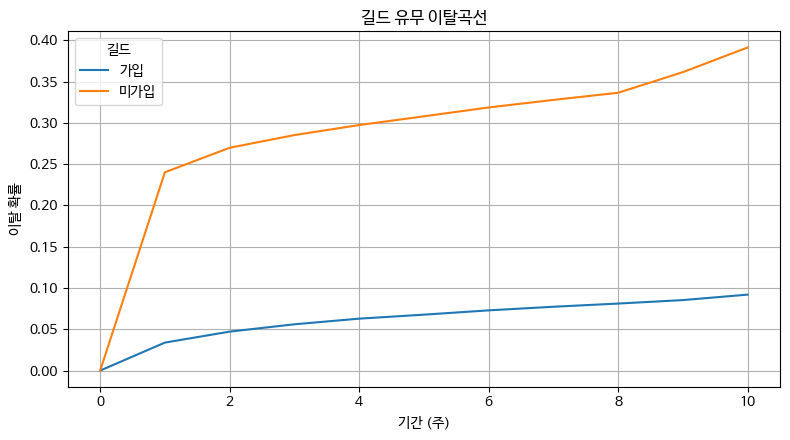

In [5]:
# '길드 유무' 그룹 생성
df['guild_group'] = df['character_guild_name'].apply(lambda x: '가입' if pd.notna(x) else '미가입')

# 시각화
plt.figure(figsize=(8, 4.5))

kmf = KaplanMeierFitter()

for label, group in df.groupby('guild_group'):
    kmf.fit(group['duration'], event_observed=group['event'], label=label)
    # 이탈 곡선: 1 - 생존 함수
    plt.plot(kmf.survival_function_.index, 1 - kmf.survival_function_[label], label=label)

plt.title('길드 유무 이탈곡선')
plt.xlabel('기간 (주)')
plt.ylabel('이탈 확률')
plt.grid(True)
plt.legend(title='길드')
plt.tight_layout()
plt.show()

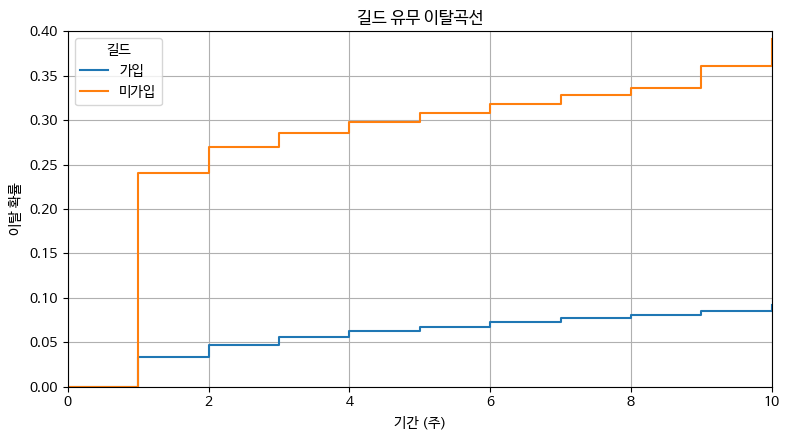

In [8]:
# '길드 유무' 그룹 생성
df['guild_group'] = df['character_guild_name'].apply(lambda x: '가입' if pd.notna(x) else '미가입')

# 시각화
plt.figure(figsize=(8, 4.5))

kmf = KaplanMeierFitter()

for label, group in df.groupby('guild_group'):
    kmf.fit(group['duration'], event_observed=group['event'], label=label)
    # 이탈 곡선: 1 - 생존 함수
    times = kmf.survival_function_.index
    drop_rates = 1 - kmf.survival_function_[label]
    plt.step(times, drop_rates, where="post", label=label)  # 계단형 그래프

# 제목 및 라벨 설정
plt.title('길드 유무 이탈곡선')
plt.xlabel('기간 (주)')
plt.ylabel('이탈 확률')
plt.xlim(0, 10)    # 0~10주까지만 표시
plt.ylim(0, 0.4)   # 이탈 확률 최대 0.4로 제한
plt.grid(True)
plt.legend(title='길드')
plt.tight_layout()
plt.show()

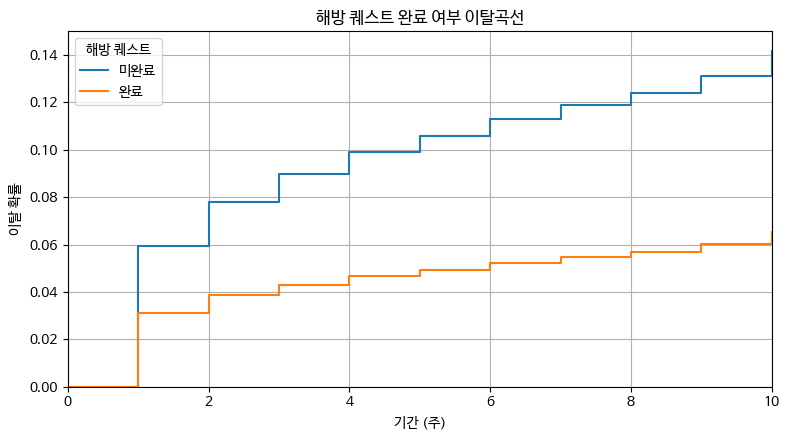

In [10]:
# 해방 퀘스트 완료 여부를 보기 좋게 라벨링
df['liberation_group'] = df['liberation_quest_clear_flag'].apply(lambda x: '완료' if x else '미완료')

# 시각화
plt.figure(figsize=(8, 4.5))
kmf = KaplanMeierFitter()

for label, group in df.groupby('liberation_group'):
    kmf.fit(group['duration'], event_observed=group['event'], label=label)
    times = kmf.survival_function_.index
    drop_rates = 1 - kmf.survival_function_[label]
    plt.step(times, drop_rates, where='post', label=label)  # 계단식 그래프

# 그래프 레이아웃 설정
plt.title('해방 퀘스트 완료 여부 이탈곡선')
plt.xlabel('기간 (주)')
plt.ylabel('이탈 확률')
plt.xlim(0, 10)
plt.ylim(0, 0.15)
plt.grid(True)
plt.legend(title='해방 퀘스트')
plt.tight_layout()
plt.show()

In [1]:
%%capture
!pip install lifelines

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


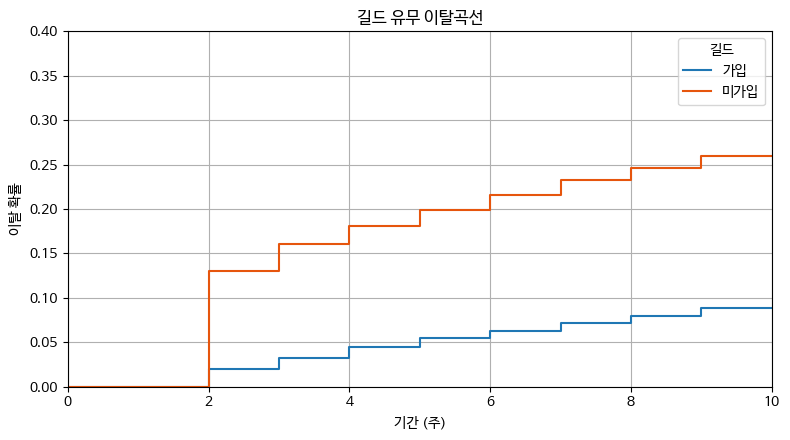

In [7]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# 라이브러리 로드
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
import os

# 파일 경로 수정
file_path = '/content/drive/MyDrive/데이터톤_메이플/캐릭터 레벨 기준/character_level_fill.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 한글 폰트 설정 (한글 깨짐 방지)
os.system('apt-get install -y fonts-nanum')
os.system('fc-cache -fv')
os.system('rm ~/.cache/matplotlib -rf')

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# 1. 길드 유무 이탈곡선
df['guild_group'] = df['character_guild_name'].apply(lambda x: '미가입' if x == '미가입' else '가입')

plt.figure(figsize=(8, 4.5))
kmf = KaplanMeierFitter()

color_map_guild = {'가입': '#1f77b4', '미가입': '#e6550d'}  # 파랑, 노랑

for label, group in df.groupby('guild_group'):
    kmf.fit(group['duration'], event_observed=group['event'], label=label)
    times = kmf.survival_function_.index
    drop_rates = 1 - kmf.survival_function_[label]
    plt.step(times, drop_rates, where="post", label=label, color=color_map_guild[label])

plt.title('길드 유무 이탈곡선')
plt.xlabel('기간 (주)')
plt.ylabel('이탈 확률')
plt.xlim(0, 10)
plt.ylim(0, 0.4)
plt.grid(True)
plt.legend(title='길드')
plt.tight_layout()
plt.show()

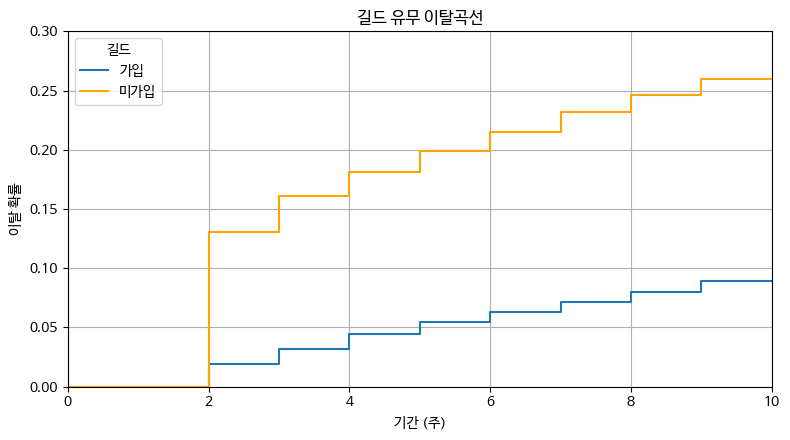

In [12]:
# 1. 길드 유무 이탈곡선
df['guild_group'] = df['character_guild_name'].apply(lambda x: '미가입' if x == '미가입' else '가입')

plt.figure(figsize=(8, 4.5))
kmf = KaplanMeierFitter()

color_map_guild = {'가입': '#1f77b4', '미가입': '#ffa500'}

for label, group in df.groupby('guild_group'):
    kmf.fit(group['duration'], event_observed=group['event'], label=label)
    times = kmf.survival_function_.index
    drop_rates = 1 - kmf.survival_function_[label]
    plt.step(times, drop_rates, where="post", label=label, color=color_map_guild[label])

plt.title('길드 유무 이탈곡선')
plt.xlabel('기간 (주)')
plt.ylabel('이탈 확률')
plt.xlim(0, 10)
plt.ylim(0, 0.3)
plt.grid(True)
plt.legend(title='길드')
plt.tight_layout()
plt.show()

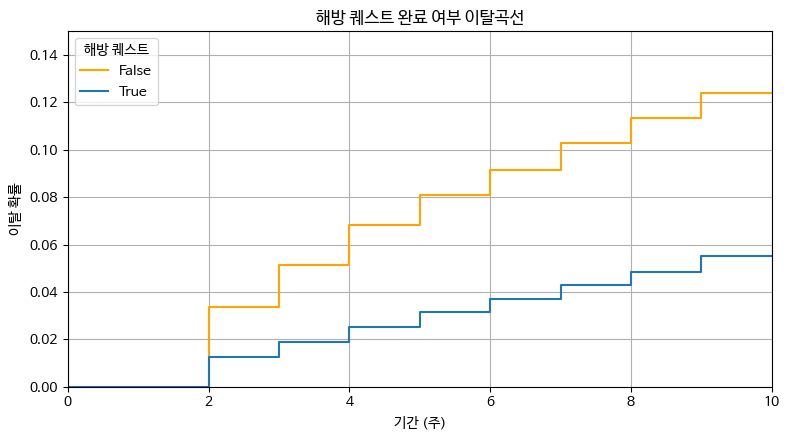

In [11]:
# 2. 해방 퀘스트 완료 여부 이탈곡선
df['liberation_group'] = df['liberation_quest_clear_flag'].astype(bool)  # True/False로 유지

plt.figure(figsize=(8, 4.5))
kmf = KaplanMeierFitter()

color_map_liberation = {'True': '#1f77b4', 'False': '#ffa500'}  # 파랑, 주황

for label, group in df.groupby('liberation_group'):
    kmf.fit(group['duration'], event_observed=group['event'], label=str(label))
    times = kmf.survival_function_.index
    drop_rates = 1 - kmf.survival_function_[str(label)]
    plt.step(times, drop_rates, where='post', label=str(label), color=color_map_liberation[str(label)])

plt.title('해방 퀘스트 완료 여부 이탈곡선')
plt.xlabel('기간 (주)')
plt.ylabel('이탈 확률')
plt.xlim(0, 10)
plt.ylim(0, 0.15)
plt.grid(True)
plt.legend(title='해방 퀘스트')
plt.tight_layout()
plt.show()

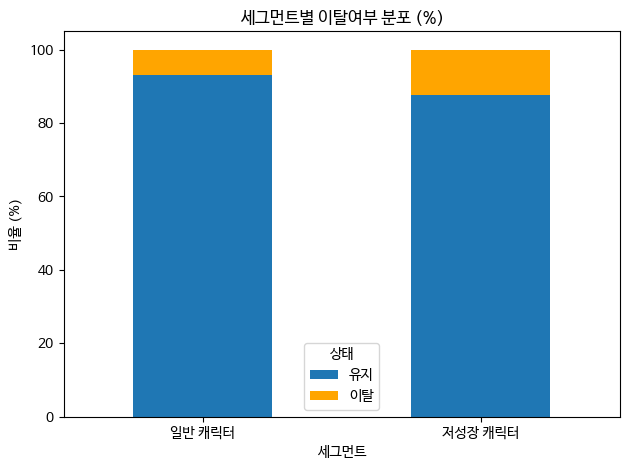

In [14]:
# 가설 3: 레벨 대비 저성장 캐릭터 이탈 분석

# 세그먼트 분류 함수
def assign_segment(row):
    level = row['character_level']
    authentic_sum = row['authentic_sum']

    if 270 <= level < 275:
        threshold = 18
    elif 275 <= level < 280:
        threshold = 28
    elif 280 <= level < 285:
        threshold = 38
    elif 285 <= level < 290:
        threshold = 48
    elif level >= 290:
        threshold = 68
    else:
        return '대상 외'

    if authentic_sum >= threshold:
        return '일반 캐릭터'
    else:
        return '저성장 캐릭터'

# 세그먼트 컬럼 생성
df['segment'] = df.apply(assign_segment, axis=1)

# '대상 외'는 제외
df_segment = df[df['segment'] != '대상 외'].copy()

# 세그먼트별 이탈 분포 시각화
event_dist = df_segment.groupby(['segment', 'event']).size().unstack().fillna(0)
event_dist_percent = event_dist.div(event_dist.sum(axis=1), axis=0) * 100

event_dist_percent.plot(kind='bar', stacked=True, color=['#1f77b4', '#ffa500'])  # 유지: 파랑, 이탈: 주황
plt.title('세그먼트별 이탈여부 분포 (%)')
plt.ylabel('비율 (%)')
plt.xlabel('세그먼트')
plt.xticks(rotation=0)
plt.legend(title='상태', labels=['유지', '이탈'])
plt.tight_layout()
plt.savefig("segment_status_ratio_g3.png", dpi=300)
plt.show()

# Kaplan-Meier 이탈곡선
from lifelines import KaplanMeierFitter
plt.figure(figsize=(8,6))
kmf = KaplanMeierFitter()

color_map_segment = {'일반 캐릭터': '#1f77b4', '저성장 캐릭터': '#ffa500'}

for label in ['일반 캐릭터', '저성장 캐릭터']:
    group = df_segment[df_segment['segment'] == label]
    kmf.fit(group['duration'], group['event'], label=label)
    times = kmf.survival_function_.index
    drop_rates = 1 - kmf.survival_function_[label]
    plt.step(times, drop_rates, where="post", label=label, color=color_map_segment[label])

plt.title('예측 이탈곡선: 세그먼트별')
plt.xlabel('기간 (주)')
plt.ylabel('이탈 확률')
plt.ylim(0, 0.15)
plt.grid(True)
plt.legend(title='세그먼트')
plt.tight_layout()
plt.savefig("segment_km_curve_g3.png", dpi=300)
plt.show()